<a href="https://colab.research.google.com/github/KAJITA61724/hello-world/blob/master/%E6%82%A3%E8%80%85%E6%BA%80%E8%B6%B3%E5%BA%A62020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

必要なものをインストール

In [1]:
!pip install janome
import pandas as pd
import numpy as np
import ast
import collections
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re
import janome
import warnings
warnings.filterwarnings('ignore')

     |████████████████████████████████| 19.7MB 1.8MB/s 


データの読み込み

In [2]:
qr = pd.read_csv("/content/RawData【ＱＲコード】2020年度患者調査（入院）.csv")
sheet = pd.read_csv("/content/RawData【用紙】2020年度患者調査（入院）.csv")

In [3]:
qr

,タイムスタンプ,１）入院病棟,２）入院病室,３）性別,４）年齢,５）当院への入院回数,６）普段、『情報を手に入れる手段』として主に何を利用されていますか。,７）外来の待合呼び出しサービスを行っている、当院の『ＬＩＮＥ・MeDaCa』登録について教えてください。,８）『入院にあたっての説明』でわかりやすかったことの番号にチェックしてください。 ※複数選択可,９）『退院にあたっての説明』でわかりやすかったことにチェックしてください。 ※複数選択可,１０）『病棟の設備』について改善して欲しいことにチェックしてください。 ※複数選択可,１１）『入院環境』について改善して欲しいことにチェックしてください ※複数選択可,１２）『入院中の食事』で改善して欲しいことにチェックしてください ※複数選択可,１３）入院にあたっての次の対応は、どのように感じられましたか [１．手術・入院前ＰＣＲ検査],１３）入院にあたっての次の対応は、どのように感じられましたか [２．外泊や外出の禁止],１４）当院が非常措置として行っている『面会を原則禁止』について教えてください。,１５）『面会を原則禁止』によって、感じていることをすべて選択してください。（複数回答可）,１６－１）「入院制限がされていた時期（３月～５月）」に手術や入院の予約がありましたか,１６－２）「入院制限がされていた時期（３月～５月）」に、病院から手術や入院予約の延期の依頼がありましたか,１６－３）「②延期依頼があった」と答えた方に伺います。その後どうされましたか？,１６－４）「①延期依頼はなかった」と答えた方に伺います。その後どうされましたか？,１７－１）『大切なお知らせ』を、ご覧いただきましたか。,１７－２）『大切なお知らせ』を、どの程度ご覧いただきましたか。,１７－３）『大切なお知らせ』をご覧いただいた方は記載の内容のわかりやすさについて評価してください。（10点満点）,１７－４）１７－３）の設問に対する点数の理由をお聞かせください。,１８）医師の診断や治療方針について医師の説明への納得度は何点ですか（１０点満点）,１９）医師の診療や処置への適切さは何点ですか（１０点満点）,２０）医師への質問のしやすさは何点ですか（１０点満点）,２１）薬剤師の入院中のお薬説明、対応は何点ですか（１０点満点）,２２）看護師への相談のしやすさは何点ですか（１０点満点）,２３）スタッフコールの対応は何点ですか（１０点満点）,２４）スタッフは、検査・治療・諸手続きなどの際にあなたの氏名を確認しましたか（１０点満点）,２５）医師、看護師等の医療従事者は、あなたの診察や処置をする前に手指衛生を行っていますか（１０点満点）,２６）慶應義塾大学病院の家族・友人・知人へのおすすめ度は何点ですか（１０点満点）,２７）２６）でつけた点数の理由をお聞かせください,２８）『アンケートの形式』は下記のどの方法が一番回答しやすいですか,２９）その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。
0,2020/10/1 15:45,⑮ ９Ｂ（１号館９階）,①個室,②女性,⑦60代,①初めて,②パソコン,④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）,①入院手続き,②病状の説明,⑧なし,⑥なし,温かい食事と飲み物が良いです,①賛成,①賛成,①新型コロナ禍中なので良いと思う,⑤面会者がいなくて安静が保て療養に専念できる,①あった,①延期依頼があった,②手術・入院の予約を延期した,NaN,①見た,②1週間に1度くらい見ていた,8.0,NaN,10,10,10,10,10,10,10,10,10,手術後の看護師さんの対応が良かったので安心して過ごせた,③病院内で病院のタブレットを用いて、自身で回答する方法,NaN
1,2020/10/1 15:48,⑪ ８Ｂ（１号館８階）,②多床室,①男性,③20代,③３回～５回,③スマートフォン,④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）,"①入院手続き, ②病棟への経路, ③病棟の設備, ④病室の設備, ⑤入院生活","②病状の説明, ③退院後の生活, ④今後の治療方針, ⑤退院時の会計",⑦インターネット環境,②病室の居心地,⑥なし,①賛成,①賛成,①新型コロナ禍中なので良いと思う,④着替えや必要な物について、受渡しに困っている,②なかった,NaN,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,10,10,10,10,10,10,10,10,10,大学病院であるから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN
2,2020/10/1 15:49,⑪ ８Ｂ（１号館８階）,②多床室,①男性,③20代,③３回～５回,③スマートフォン,④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）,"①入院手続き, ②病棟への経路, ③病棟の設備, ④病室の設備, ⑤入院生活","②病状の説明, ③退院後の生活, ④今後の治療方針, ⑤退院時の会計",⑦インターネット環境,②病室の居心地,⑥なし,①賛成,①賛成,①新型コロナ禍中なので良いと思う,④着替えや必要な物について、受渡しに困っている,②なかった,NaN,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,10,10,10,10,10,10,10,10,10,大学病院であるから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN
3,2020/10/1 15:54,⑤ ６Ｃ（１号館６階）,②多床室,②女性,⑤40代,②２回目,③スマートフォン,③ＭｅＤａＣａに登録している,NaN,"③退院後の生活, ⑤退院時の会計","③ベッド, ④寝具",⑤空調,⑥なし,①賛成,①賛成,②面会可能な方法を考えるべきだと思う,"①面会者がいなくて、不安・寂しい・心配・退屈, ②患者さんの入院中の様子を確認できず家族が心...",②なかった,NaN,NaN,NaN,①見た,②1週間に1度くらい見ていた,5.0,NaN,10,10,10,10,10,10,10,10,5,分娩のための入院だったため産んだこ子供の入院手続きなど、術後の体で自分で行かなければならず大...,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,お医者様や看護師の方々の丁寧な対応には満足していますが、その他の会計や入院受付などの窓口の方...
4,2020/10/1 16:37,⑤ ６Ｃ（１号館６階）,②多床室,②女性,④30代,①初めて,③スマートフォン,③ＭｅＤａＣａに登録している,"①入院手続き, ⑤入院生活","①退院の決定, ③退院後の生活",⑧なし,⑥なし,⑥なし,①賛成,①賛成,①新型コロナ禍中なので良いと思う,⑥新型コロナ禍中なのでやむを得ないと納得している,②なかった,NaN,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,10,10,10,10,10,10,10,10,10,食事が美味しかったため,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,特になし
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,2020/10/25 16:58,㉔ ３－６（３号館６階）,①個室,②女性,⑤40代,①初めて,③スマートフォン,③ＭｅＤａＣａに登録している,①入院手続き,"②病状の説明, ③退院後の生活",⑧なし,①病室内での音,④食べ物の温度,①賛成,①賛成,①新型コロナ禍中なので良いと思う,"①面会者がいなくて、不安・寂しい・心配・退屈, ②患者さんの入院中の様子を確認できず家族が心...",②なかった,NaN,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,5.0,良くも悪くもないため,10,10,10,5,10,10,10,10,5,担当医師以外にも複数名に手術傷跡を見せなければならず、回診に来た初見の医師に痛みを訴えても処...,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,入院中は大変お世話になりました。どうもありがとうございました。どうぞ身体大切に、これからも私...
250,2020/10/25 19:13,⑮ ９Ｂ（１号館９階）,②多床室,②女性,⑧70代,①初めて,②パソコン,④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）,"①入院手続き, ②病棟への経路, ③病棟の設備","①退院の決定, ②病状の説明, ⑤退院時の会計",⑧なし,⑤空調,②味付け,②仕方がないと納得している,②仕方がないと納得している,①新型コロナ禍中なので良いと思う,"⑤面会者がいなくて安静が保て療養に専念できる, ⑥新型コロナ禍中なのでやむを得ないと納得している",②なかった,NaN,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,8.0,安心する,8,10,8,8,10,10,10,10,9,検査や説明など丁寧 病棟の皆さんが優しい,②

In [4]:
sheet

,タイムスタンプ,１）入院病棟,２）入院病室,３）性別,４）年齢,５）当院への入院回数,６）普段、『情報を手に入れる手段』として主に何を利用されていますか。,７）外来の待合呼び出しサービスを行っている、当院の『ＬＩＮＥ・MeDaCa』登録について教えてください。,８）『入院にあたっての説明』でわかりやすかったことの番号にチェックしてください。 ※複数選択可,９）『退院にあたっての説明』でわかりやすかったことにチェックしてください。 ※複数選択可,１０）『病棟の設備』について改善して欲しいことにチェックしてください。 ※複数選択可,１１）『入院環境』について改善して欲しいことにチェックしてください ※複数選択可,１２）『入院中の食事』で改善して欲しいことにチェックしてください ※複数選択可,１３）入院にあたっての次の対応は、どのように感じられましたか [１．手術・入院前ＰＣＲ検査],１３）入院にあたっての次の対応は、どのように感じられましたか [２．外泊や外出の禁止],１４）当院が非常措置として行っている『面会を原則禁止』について教えてください。,１５）『面会を原則禁止』によって、感じていることをすべて選択してください。（複数回答可）,１６－１）「入院制限がされていた時期（３月～５月）」に手術や入院の予約がありましたか,１６－２）「入院制限がされていた時期（３月～５月）」に、病院から手術や入院予約の延期の依頼がありましたか,１６－３）「②延期依頼があった」と答えた方に伺います。その後どうされましたか？,１６－４）「①延期依頼はなかった」と答えた方に伺います。その後どうされましたか？,１７－１）『大切なお知らせ』を、ご覧いただきましたか。,１７－２）『大切なお知らせ』を、どの程度ご覧いただきましたか。,１７－３）『大切なお知らせ』をご覧いただいた方は記載の内容のわかりやすさについて評価してください。（10点満点）,１７－４）１７－３）の設問に対する点数の理由をお聞かせください。,１８）医師の診断や治療方針について医師の説明への納得度は何点ですか（１０点満点）,１９）医師の診療や処置への適切さは何点ですか（１０点満点）,２０）医師への質問のしやすさは何点ですか（１０点満点）,２１）薬剤師の入院中のお薬説明、対応は何点ですか（１０点満点）,２２）看護師への相談のしやすさは何点ですか（１０点満点）,２３）スタッフコールの対応は何点ですか（１０点満点）,２４）スタッフは、検査・治療・諸手続きなどの際にあなたの氏名を確認しましたか（１０点満点）,２５）医師、看護師等の医療従事者は、あなたの診察や処置をする前に手指衛生を行っていますか（１０点満点）,２６）慶應義塾大学病院の家族・友人・知人へのおすすめ度は何点ですか（１０点満点）,２７）２６）でつけた点数の理由をお聞かせください,２８）『アンケートの形式』は下記のどの方法が一番回答しやすいですか,２９）その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。
0,20001,1号館 6A-1,1,2.0,2.0,5.0,1,NaN,NaN,3,7,6,"2,3",NaN,NaN,NaN,"1,2",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20002,1号館 6A-1,1,2.0,2.0,4.0,2,3,"1,5",5,7,6,6,1,1,1,6,1.0,1.0,2,NaN,1.0,2.0,7.0,・わかりやすいと思いますが、この病院の通院患者さんはネットを見ない高齢者も多いと思います。,10.0,10.0,10.0,10.0,8.0,8.0,10.0,10.0,6.0,うちがお世話になっている科・小児病棟入院は、お友だちにおすすめしたいのですが、他の大人病棟に...,1,NaN
2,20003,1号館 6A-1,2,2.0,1.0,2.0,3,4,"1,3,4,5","1,2,3,4","3,7,9",2,7,1,1,1,"1,4,6,7",1.0,1.0,2,NaN,1.0,3.0,6.0,現状がわかりにくかった。,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.0,診療・手術の安心感。スタッフの方々の対応。入院に関しては、お湯(ポット)や乾燥機についてのみ不満。,1,NaN
3,20004,1号館 6A-2,2,1.0,1.0,3.0,3,4,1,4,8,6,6,1,1,1,6,2.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,治療内容に満足しているため。,1,ありがとうございました。
4,20005,1号館 7C,2,2.0,8.0,1.0,1,1,5,"2,3",3,5,NaN,1,1,1,1,1.0,2.0,1,1,2.0,2.0,NaN,NaN,9.0,9.0,9.0,10.0,9.0,7.0,10.0,9.0,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,260494,1号館 6A-2,2,1.0,1.0,3.0,4,4,"1,2,3,4,5","1,2,3,4",8,6,6,1,2,1,6,2.0,2.0,NaN,NaN,1.0,2.0,10.0,NaN,10.0,10.0,10.0,5.0,10.0,10.0,10.0,10.0,10.0,NaN,2,南エレベーター近くの乳児室、個室で大変ありがたいのですが、ベッド、枕、イス等が離れて配置され...
494,260495,1号館 6A-1,2,1.0,3.0,2.0,NaN,NaN,"1,4",NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
495,260496,1号館 10A,2,2.0,8.0,2.0,1,4,1,3,8,"2,3","2,3,5,7,ご飯が多かった","1,2","1,2",2,5,2.0,NaN,NaN,1,1.0,3.0,5.0,枚数を大事な事だけにして減らしてほしい,8.0,7.0,8.0,7.0,8.0,NaN,10.0,10.0,NaN,NaN,1,NaN
496,260497,3号館 3-6,NaN,NaN,7.0,3.0,2,4,NaN,NaN,7,NaN,NaN,2,2,2,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN,NaN,1,NaN


データをくっつける

In [5]:
marge = pd.concat([qr, sheet], ignore_index=True)

タイムスタンプの行を除去（用紙の方はないので、マージしたデータでは使わない）

In [6]:
data = marge.drop(columns='タイムスタンプ')

統合したシートの回答形式も揃える（点数や年齢などの数値系の回答以外は欠損を０で補完）

In [7]:
print(data["１）入院病棟"])

0      ⑮ ９Ｂ（１号館９階）
1      ⑪ ８Ｂ（１号館８階）
2      ⑪ ８Ｂ（１号館８階）
3      ⑤ ６Ｃ（１号館６階）
4      ⑤ ６Ｃ（１号館６階）
          ...     
747       1号館　6A-2
748       1号館　6A-1
749        1号館　10A
750        3号館　3-6
751        1号館　10B
Name: １）入院病棟, Length: 752, dtype: object


In [8]:
#記号の除去して、病棟名を統一したい
position_list =[ele.replace("3号館\u30006→5","6-5")for ele in data["１）入院病棟"]]
position_list = [ele.replace("1号館\u300010B","10B") for ele in position_list]
position_list =[ele.replace("1号館\u30008D","8D")for ele in position_list]
position_list =[ele.replace("3号館\u30006→5","6-5")for ele in position_list]
position_list =[ele.replace("1号館\u30008C","8C")for ele in position_list]
position_list =[ele.replace("1号館\u300010A","10A")for ele in position_list]
position_list =[ele.replace("1号館\u30009B","9B")for ele in position_list]
position_list =[ele.replace("3号館\u30003-6","3-6")for ele in position_list]
position_list =[ele.replace("1号館\u30008B","8B")for ele in position_list]
position_list =[ele.replace("1号館\u30009C","9C")for ele in position_list]
position_list =[ele.replace("1号館\u30007B","7B")for ele in position_list]
position_list =[ele.replace("1号館\u30008A","8A")for ele in position_list]
position_list =[ele.replace("2号館\u30005S","5S")for ele in position_list]
position_list =[ele.replace("1号館\u30007C","7C")for ele in position_list]
position_list =[ele.replace("1号館\u30004B","4B")for ele in position_list]
position_list =[ele.replace("1号館\u30009A","9A")for ele in position_list]
position_list =[ele.replace("1号館\u30009D","9D")for ele in position_list]
position_list =[ele.replace("3号館\u30003-5","3-5")for ele in position_list]
position_list =[ele.replace("1号館\u30006A-2","6A-2")for ele in position_list]
position_list =[ele.replace("1号館\u30007D","7D")for ele in position_list]
position_list =[ele.replace("1号館\u30006A-1","6A-1")for ele in position_list]
position_list =[ele.replace("1号館\u30006C","6C")for ele in position_list]
position_list =[ele.replace("1号館\u300010D","10D")for ele in position_list]
position_list =[ele.replace("1号館\u300010C","10C")for ele in position_list]
position_list =[ele.replace("1号館\u30007A","7A")for ele in position_list]

position_list =[ele.replace("⑨ ７Ｄ（１号館７階）","7D")for ele in position_list]
position_list =[ele.replace("⑯ ９Ｃ（１号館９階）","9C")for ele in position_list]
position_list =[ele.replace("⑪ ８Ｂ（１号館８階）","8B")for ele in position_list]
position_list =[ele.replace("⑬ ８Ｄ（１号館８階）","8D")for ele in position_list]
position_list =[ele.replace("㉓ ３－５（３号館５階）","3-5")for ele in position_list]
position_list =[ele.replace("㉔ ３－６（３号館６階）","3-6")for ele in position_list]
position_list =[ele.replace("⑭ ９Ａ（１号館９階）","9A")for ele in position_list]
position_list =[ele.replace("㉒ ５Ｓ（２号館５階）","5S")for ele in position_list]
position_list =[ele.replace("⑰ ９Ｄ（１号館９階）","9D")for ele in position_list]
position_list =[ele.replace("③ ６Ａ－２（１号館６階）","6A-2")for ele in position_list]
position_list =[ele.replace("⑳ １０Ｃ（１号館１０階）","10C")for ele in position_list]
position_list =[ele.replace("⑦ ７Ｂ（１号館７階）","7B")for ele in position_list]
position_list =[ele.replace("⑧ ７Ｃ（１号館７階）","7C")for ele in position_list]
position_list =[ele.replace("㉑ １０Ｄ（１号館１０階）","10D")for ele in position_list]
position_list =[ele.replace("⑤ ６Ｃ（１号館６階）","6C")for ele in position_list]
position_list =[ele.replace("⑥ ７Ａ（１号館７階）","7A")for ele in position_list]
position_list =[ele.replace("⑲ １０Ｂ（１号館１０階）","10B")for ele in position_list]
position_list =[ele.replace("⑱ １０Ａ（１号館１０階）","10A")for ele in position_list]
position_list =[ele.replace("⑮ ９Ｂ（１号館９階）","9B")for ele in position_list]
position_list =[ele.replace("⑩ ８Ａ（１号館８階）","8A")for ele in position_list]
position_list =[ele.replace("② ６Ａ－１（１号館６階）","6A-1")for ele in position_list]

In [9]:
c= collections.Counter(position_list)
print(c)

Counter({'10B': 64, '8D': 55, '10A': 53, '6C': 46, '9B': 42, '7A': 42, '7C': 40, '8B': 39, '9C': 38, '3-6': 38, '8A': 37, '8C': 37, '7D': 30, '6A-1': 30, '3-5': 29, '7B': 26, '9A': 26, '5S': 26, '9D': 23, '10D': 12, '10C': 12, '6A-2': 5, '6-5': 1, '4B': 1})


In [10]:
data["１）入院病棟"] = position_list

In [11]:
data

,１）入院病棟,２）入院病室,３）性別,４）年齢,５）当院への入院回数,６）普段、『情報を手に入れる手段』として主に何を利用されていますか。,７）外来の待合呼び出しサービスを行っている、当院の『ＬＩＮＥ・MeDaCa』登録について教えてください。,８）『入院にあたっての説明』でわかりやすかったことの番号にチェックしてください。 ※複数選択可,９）『退院にあたっての説明』でわかりやすかったことにチェックしてください。 ※複数選択可,１０）『病棟の設備』について改善して欲しいことにチェックしてください。 ※複数選択可,１１）『入院環境』について改善して欲しいことにチェックしてください ※複数選択可,１２）『入院中の食事』で改善して欲しいことにチェックしてください ※複数選択可,１３）入院にあたっての次の対応は、どのように感じられましたか [１．手術・入院前ＰＣＲ検査],１３）入院にあたっての次の対応は、どのように感じられましたか [２．外泊や外出の禁止],１４）当院が非常措置として行っている『面会を原則禁止』について教えてください。,１５）『面会を原則禁止』によって、感じていることをすべて選択してください。（複数回答可）,１６－１）「入院制限がされていた時期（３月～５月）」に手術や入院の予約がありましたか,１６－２）「入院制限がされていた時期（３月～５月）」に、病院から手術や入院予約の延期の依頼がありましたか,１６－３）「②延期依頼があった」と答えた方に伺います。その後どうされましたか？,１６－４）「①延期依頼はなかった」と答えた方に伺います。その後どうされましたか？,１７－１）『大切なお知らせ』を、ご覧いただきましたか。,１７－２）『大切なお知らせ』を、どの程度ご覧いただきましたか。,１７－３）『大切なお知らせ』をご覧いただいた方は記載の内容のわかりやすさについて評価してください。（10点満点）,１７－４）１７－３）の設問に対する点数の理由をお聞かせください。,１８）医師の診断や治療方針について医師の説明への納得度は何点ですか（１０点満点）,１９）医師の診療や処置への適切さは何点ですか（１０点満点）,２０）医師への質問のしやすさは何点ですか（１０点満点）,２１）薬剤師の入院中のお薬説明、対応は何点ですか（１０点満点）,２２）看護師への相談のしやすさは何点ですか（１０点満点）,２３）スタッフコールの対応は何点ですか（１０点満点）,２４）スタッフは、検査・治療・諸手続きなどの際にあなたの氏名を確認しましたか（１０点満点）,２５）医師、看護師等の医療従事者は、あなたの診察や処置をする前に手指衛生を行っていますか（１０点満点）,２６）慶應義塾大学病院の家族・友人・知人へのおすすめ度は何点ですか（１０点満点）,２７）２６）でつけた点数の理由をお聞かせください,２８）『アンケートの形式』は下記のどの方法が一番回答しやすいですか,２９）その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。
0,9B,①個室,②女性,⑦60代,①初めて,②パソコン,④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）,①入院手続き,②病状の説明,⑧なし,⑥なし,温かい食事と飲み物が良いです,①賛成,①賛成,①新型コロナ禍中なので良いと思う,⑤面会者がいなくて安静が保て療養に専念できる,①あった,①延期依頼があった,②手術・入院の予約を延期した,NaN,①見た,②1週間に1度くらい見ていた,8.0,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,手術後の看護師さんの対応が良かったので安心して過ごせた,③病院内で病院のタブレットを用いて、自身で回答する方法,NaN
1,8B,②多床室,①男性,③20代,③３回～５回,③スマートフォン,④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）,"①入院手続き, ②病棟への経路, ③病棟の設備, ④病室の設備, ⑤入院生活","②病状の説明, ③退院後の生活, ④今後の治療方針, ⑤退院時の会計",⑦インターネット環境,②病室の居心地,⑥なし,①賛成,①賛成,①新型コロナ禍中なので良いと思う,④着替えや必要な物について、受渡しに困っている,②なかった,NaN,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,大学病院であるから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN
2,8B,②多床室,①男性,③20代,③３回～５回,③スマートフォン,④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）,"①入院手続き, ②病棟への経路, ③病棟の設備, ④病室の設備, ⑤入院生活","②病状の説明, ③退院後の生活, ④今後の治療方針, ⑤退院時の会計",⑦インターネット環境,②病室の居心地,⑥なし,①賛成,①賛成,①新型コロナ禍中なので良いと思う,④着替えや必要な物について、受渡しに困っている,②なかった,NaN,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,大学病院であるから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN
3,6C,②多床室,②女性,⑤40代,②２回目,③スマートフォン,③ＭｅＤａＣａに登録している,NaN,"③退院後の生活, ⑤退院時の会計","③ベッド, ④寝具",⑤空調,⑥なし,①賛成,①賛成,②面会可能な方法を考えるべきだと思う,"①面会者がいなくて、不安・寂しい・心配・退屈, ②患者さんの入院中の様子を確認できず家族が心...",②なかった,NaN,NaN,NaN,①見た,②1週間に1度くらい見ていた,5.0,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,分娩のための入院だったため産んだこ子供の入院手続きなど、術後の体で自分で行かなければならず大...,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,お医者様や看護師の方々の丁寧な対応には満足していますが、その他の会計や入院受付などの窓口の方...
4,6C,②多床室,②女性,④30代,①初めて,③スマートフォン,③ＭｅＤａＣａに登録している,"①入院手続き, ⑤入院生活","①退院の決定, ③退院後の生活",⑧なし,⑥なし,⑥なし,①賛成,①賛成,①新型コロナ禍中なので良いと思う,⑥新型コロナ禍中なのでやむを得ないと納得している,②なかった,NaN,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,食事が美味しかったため,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,特になし
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,6A-2,2,1,1,3,4,4,"1,2,3,4,5","1,2,3,4",8,6,6,1,2,1,6,2,2,NaN,NaN,1,2,10.0,NaN,10.0,10.0,10.0,5.0,10.0,10.0,10.0,10.0,10.0,NaN,2,南エレベーター近くの乳児室、個室で大変ありがたいのですが、ベッド、枕、イス等が離れて配置され...
748,6A-1,2,1,3,2,NaN,NaN,"1,4",NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
749,10A,2,2,8,2,1,4,1,3,8,"2,3","2,3,5,7,ご飯が多かった","1,2","1,2",2,5,2,NaN,NaN,1,1,3,5.0,枚数を大事な事だけにして減らしてほしい,8.0,7.0,8.0,7.0,8.0,NaN,10.0,10.0,NaN,NaN,1,NaN
750,3-6,NaN,NaN,7,3,2,4,NaN,NaN,7,NaN,NaN,2,2,2,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN,NaN,1,NaN


In [12]:
# 複数回答データを','で分割して、１つのリストにまとめる
ans = [data['１）入院病棟'][i].split(',') for i in range(len(data))]

# リストのflattening
ans_ = []
for s in ans:
    ans_.extend(s)

# 重複を除きユニークな回答選択肢を取得
ans_ = np.unique(ans_)

ans_

array(['10A', '10B', '10C', '10D', '3-5', '3-6', '4B', '5S', '6-5',
       '6A-1', '6A-2', '6C', '7A', '7B', '7C', '7D', '8A', '8B', '8C',
       '8D', '9A', '9B', '9C', '9D'], dtype='<U4')

In [13]:
[ans_[0] in data['１）入院病棟'][i] for i in range(data.shape[0])]
dummy = []
for j in range(len(ans_)):
    dummy.append([ans_[j] in data['１）入院病棟'][i] for i in range(data.shape[0])])

dummy = pd.DataFrame(dummy, index=ans_).T

In [14]:
dummy

,10A,10B,10C,10D,3-5,3-6,4B,5S,6-5,6A-1,6A-2,6C,7A,7B,7C,7D,8A,8B,8C,8D,9A,9B,9C,9D
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
748,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
749,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
750,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
data = pd.concat([data, dummy*1], axis=1)
data =data.drop(columns="１）入院病棟")

In [16]:
print(data["２）入院病室"].dtype)

object


In [17]:
s = pd.Series(data["２）入院病室"], dtype='str')
print(s)

0       ①個室
1      ②多床室
2      ②多床室
3      ②多床室
4      ②多床室
       ... 
747       2
748       2
749       2
750     nan
751       2
Name: ２）入院病室, Length: 752, dtype: object


In [18]:
#記号の除去して、病棟名を統一したい
position_list =[ele.replace("②多床室","2")for ele in s]
position_list = [ele.replace("①個室","1") for ele in position_list]
position_list = [ele.replace("nan","0") for ele in position_list]
position_list = [ele.replace("1,2","0") for ele in position_list]


In [19]:
c= collections.Counter(position_list)
print(c)

Counter({'2': 502, '1': 205, '0': 45})


In [20]:
data["bed"] = position_list

In [21]:
data =data.drop(columns="２）入院病室")

In [22]:
data

,３）性別,４）年齢,５）当院への入院回数,６）普段、『情報を手に入れる手段』として主に何を利用されていますか。,７）外来の待合呼び出しサービスを行っている、当院の『ＬＩＮＥ・MeDaCa』登録について教えてください。,８）『入院にあたっての説明』でわかりやすかったことの番号にチェックしてください。 ※複数選択可,９）『退院にあたっての説明』でわかりやすかったことにチェックしてください。 ※複数選択可,１０）『病棟の設備』について改善して欲しいことにチェックしてください。 ※複数選択可,１１）『入院環境』について改善して欲しいことにチェックしてください ※複数選択可,１２）『入院中の食事』で改善して欲しいことにチェックしてください ※複数選択可,１３）入院にあたっての次の対応は、どのように感じられましたか [１．手術・入院前ＰＣＲ検査],１３）入院にあたっての次の対応は、どのように感じられましたか [２．外泊や外出の禁止],１４）当院が非常措置として行っている『面会を原則禁止』について教えてください。,１５）『面会を原則禁止』によって、感じていることをすべて選択してください。（複数回答可）,１６－１）「入院制限がされていた時期（３月～５月）」に手術や入院の予約がありましたか,１６－２）「入院制限がされていた時期（３月～５月）」に、病院から手術や入院予約の延期の依頼がありましたか,１６－３）「②延期依頼があった」と答えた方に伺います。その後どうされましたか？,１６－４）「①延期依頼はなかった」と答えた方に伺います。その後どうされましたか？,１７－１）『大切なお知らせ』を、ご覧いただきましたか。,１７－２）『大切なお知らせ』を、どの程度ご覧いただきましたか。,１７－３）『大切なお知らせ』をご覧いただいた方は記載の内容のわかりやすさについて評価してください。（10点満点）,１７－４）１７－３）の設問に対する点数の理由をお聞かせください。,１８）医師の診断や治療方針について医師の説明への納得度は何点ですか（１０点満点）,１９）医師の診療や処置への適切さは何点ですか（１０点満点）,２０）医師への質問のしやすさは何点ですか（１０点満点）,２１）薬剤師の入院中のお薬説明、対応は何点ですか（１０点満点）,２２）看護師への相談のしやすさは何点ですか（１０点満点）,２３）スタッフコールの対応は何点ですか（１０点満点）,２４）スタッフは、検査・治療・諸手続きなどの際にあなたの氏名を確認しましたか（１０点満点）,２５）医師、看護師等の医療従事者は、あなたの診察や処置をする前に手指衛生を行っていますか（１０点満点）,２６）慶應義塾大学病院の家族・友人・知人へのおすすめ度は何点ですか（１０点満点）,２７）２６）でつけた点数の理由をお聞かせください,２８）『アンケートの形式』は下記のどの方法が一番回答しやすいですか,２９）その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。,10A,10B,10C,10D,3-5,3-6,4B,5S,6-5,6A-1,6A-2,6C,7A,7B,7C,7D,8A,8B,8C,8D,9A,9B,9C,9D,bed
0,②女性,⑦60代,①初めて,②パソコン,④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）,①入院手続き,②病状の説明,⑧なし,⑥なし,温かい食事と飲み物が良いです,①賛成,①賛成,①新型コロナ禍中なので良いと思う,⑤面会者がいなくて安静が保て療養に専念できる,①あった,①延期依頼があった,②手術・入院の予約を延期した,NaN,①見た,②1週間に1度くらい見ていた,8.0,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,手術後の看護師さんの対応が良かったので安心して過ごせた,③病院内で病院のタブレットを用いて、自身で回答する方法,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,①男性,③20代,③３回～５回,③スマートフォン,④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）,"①入院手続き, ②病棟への経路, ③病棟の設備, ④病室の設備, ⑤入院生活","②病状の説明, ③退院後の生活, ④今後の治療方針, ⑤退院時の会計",⑦インターネット環境,②病室の居心地,⑥なし,①賛成,①賛成,①新型コロナ禍中なので良いと思う,④着替えや必要な物について、受渡しに困っている,②なかった,NaN,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,大学病院であるから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2
2,①男性,③20代,③３回～５回,③スマートフォン,④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）,"①入院手続き, ②病棟への経路, ③病棟の設備, ④病室の設備, ⑤入院生活","②病状の説明, ③退院後の生活, ④今後の治療方針, ⑤退院時の会計",⑦インターネット環境,②病室の居心地,⑥なし,①賛成,①賛成,①新型コロナ禍中なので良いと思う,④着替えや必要な物について、受渡しに困っている,②なかった,NaN,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,大学病院であるから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2
3,②女性,⑤40代,②２回目,③スマートフォン,③ＭｅＤａＣａに登録している,NaN,"③退院後の生活, ⑤退院時の会計","③ベッド, ④寝具",⑤空調,⑥なし,①賛成,①賛成,②面会可能な方法を考えるべきだと思う,"①面会者がいなくて、不安・寂しい・心配・退屈, ②患者さんの入院中の様子を確認できず家族が心...",②なかった,NaN,NaN,NaN,①見た,②1週間に1度くらい見ていた,5.0,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,分娩のための入院だったため産んだこ子供の入院手続きなど、術後の体で自分で行かなければならず大...,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,お医者様や看護師の方々の丁寧な対応には満足していますが、その他の会計や入院受付などの窓口の方...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2
4,②女性,④30代,①初めて,③スマートフォン,③ＭｅＤａＣａに登録している,"①入院手続き, ⑤入院生活","①退院の決定, ③退院後の生活",⑧なし,⑥なし,⑥なし,①賛成,①賛成,①新型コロナ禍中なので良いと思う,⑥新型コロナ禍中なのでやむを得ないと納得している,②なかった,NaN,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,食事が美味しかったため,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,特になし,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,1,1,3,4,4,"1,2,3,4,5","1,2,3,4",8,6,6,1,2,1,6,2,2,NaN,NaN,1,2,10.0,NaN,10.0,10.0,10.0,5.0,10.0,10.0,10.0,10.0,10.0,NaN,2,南エレベーター近くの乳児室、個室で大変ありがたいのですが、ベッド、枕、イス等が離れて配置され...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2
748,1,3,2,NaN,NaN,"1,4",NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
749,2,8,2,1,4,1,3,8,"2,3","2,3,

In [23]:
c= collections.Counter(data["３）性別"])
print(c)

Counter({1.0: 245, 2.0: 211, '②女性': 142, '①男性': 112, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1})


In [24]:
s1 = pd.Series(data["３）性別"], dtype='str')
print(s1)

0      ②女性
1      ①男性
2      ①男性
3      ②女性
4      ②女性
      ... 
747    1.0
748    1.0
749    2.0
750    nan
751    2.0
Name: ３）性別, Length: 752, dtype: object


In [25]:
#記号の除去して、病棟名を統一したい
position_list2 =[ele.replace("②女性","2.0")for ele in s1]
position_list2 = [ele.replace("①男性","1.0") for ele in position_list2]
position_list2 = [ele.replace("nan","0") for ele in position_list2]

In [26]:
print(collections.Counter(position_list2))

Counter({'1.0': 357, '2.0': 353, '0': 42})


In [27]:
data["sex"] = position_list2
data =data.drop(columns="３）性別")

In [28]:
data

,４）年齢,５）当院への入院回数,６）普段、『情報を手に入れる手段』として主に何を利用されていますか。,７）外来の待合呼び出しサービスを行っている、当院の『ＬＩＮＥ・MeDaCa』登録について教えてください。,８）『入院にあたっての説明』でわかりやすかったことの番号にチェックしてください。 ※複数選択可,９）『退院にあたっての説明』でわかりやすかったことにチェックしてください。 ※複数選択可,１０）『病棟の設備』について改善して欲しいことにチェックしてください。 ※複数選択可,１１）『入院環境』について改善して欲しいことにチェックしてください ※複数選択可,１２）『入院中の食事』で改善して欲しいことにチェックしてください ※複数選択可,１３）入院にあたっての次の対応は、どのように感じられましたか [１．手術・入院前ＰＣＲ検査],１３）入院にあたっての次の対応は、どのように感じられましたか [２．外泊や外出の禁止],１４）当院が非常措置として行っている『面会を原則禁止』について教えてください。,１５）『面会を原則禁止』によって、感じていることをすべて選択してください。（複数回答可）,１６－１）「入院制限がされていた時期（３月～５月）」に手術や入院の予約がありましたか,１６－２）「入院制限がされていた時期（３月～５月）」に、病院から手術や入院予約の延期の依頼がありましたか,１６－３）「②延期依頼があった」と答えた方に伺います。その後どうされましたか？,１６－４）「①延期依頼はなかった」と答えた方に伺います。その後どうされましたか？,１７－１）『大切なお知らせ』を、ご覧いただきましたか。,１７－２）『大切なお知らせ』を、どの程度ご覧いただきましたか。,１７－３）『大切なお知らせ』をご覧いただいた方は記載の内容のわかりやすさについて評価してください。（10点満点）,１７－４）１７－３）の設問に対する点数の理由をお聞かせください。,１８）医師の診断や治療方針について医師の説明への納得度は何点ですか（１０点満点）,１９）医師の診療や処置への適切さは何点ですか（１０点満点）,２０）医師への質問のしやすさは何点ですか（１０点満点）,２１）薬剤師の入院中のお薬説明、対応は何点ですか（１０点満点）,２２）看護師への相談のしやすさは何点ですか（１０点満点）,２３）スタッフコールの対応は何点ですか（１０点満点）,２４）スタッフは、検査・治療・諸手続きなどの際にあなたの氏名を確認しましたか（１０点満点）,２５）医師、看護師等の医療従事者は、あなたの診察や処置をする前に手指衛生を行っていますか（１０点満点）,２６）慶應義塾大学病院の家族・友人・知人へのおすすめ度は何点ですか（１０点満点）,２７）２６）でつけた点数の理由をお聞かせください,２８）『アンケートの形式』は下記のどの方法が一番回答しやすいですか,２９）その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。,10A,10B,10C,10D,3-5,3-6,4B,5S,6-5,6A-1,6A-2,6C,7A,7B,7C,7D,8A,8B,8C,8D,9A,9B,9C,9D,bed,sex
0,⑦60代,①初めて,②パソコン,④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）,①入院手続き,②病状の説明,⑧なし,⑥なし,温かい食事と飲み物が良いです,①賛成,①賛成,①新型コロナ禍中なので良いと思う,⑤面会者がいなくて安静が保て療養に専念できる,①あった,①延期依頼があった,②手術・入院の予約を延期した,NaN,①見た,②1週間に1度くらい見ていた,8.0,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,手術後の看護師さんの対応が良かったので安心して過ごせた,③病院内で病院のタブレットを用いて、自身で回答する方法,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2.0
1,③20代,③３回～５回,③スマートフォン,④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）,"①入院手続き, ②病棟への経路, ③病棟の設備, ④病室の設備, ⑤入院生活","②病状の説明, ③退院後の生活, ④今後の治療方針, ⑤退院時の会計",⑦インターネット環境,②病室の居心地,⑥なし,①賛成,①賛成,①新型コロナ禍中なので良いと思う,④着替えや必要な物について、受渡しに困っている,②なかった,NaN,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,大学病院であるから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,1.0
2,③20代,③３回～５回,③スマートフォン,④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）,"①入院手続き, ②病棟への経路, ③病棟の設備, ④病室の設備, ⑤入院生活","②病状の説明, ③退院後の生活, ④今後の治療方針, ⑤退院時の会計",⑦インターネット環境,②病室の居心地,⑥なし,①賛成,①賛成,①新型コロナ禍中なので良いと思う,④着替えや必要な物について、受渡しに困っている,②なかった,NaN,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,大学病院であるから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,1.0
3,⑤40代,②２回目,③スマートフォン,③ＭｅＤａＣａに登録している,NaN,"③退院後の生活, ⑤退院時の会計","③ベッド, ④寝具",⑤空調,⑥なし,①賛成,①賛成,②面会可能な方法を考えるべきだと思う,"①面会者がいなくて、不安・寂しい・心配・退屈, ②患者さんの入院中の様子を確認できず家族が心...",②なかった,NaN,NaN,NaN,①見た,②1週間に1度くらい見ていた,5.0,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,分娩のための入院だったため産んだこ子供の入院手続きなど、術後の体で自分で行かなければならず大...,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,お医者様や看護師の方々の丁寧な対応には満足していますが、その他の会計や入院受付などの窓口の方...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,2.0
4,④30代,①初めて,③スマートフォン,③ＭｅＤａＣａに登録している,"①入院手続き, ⑤入院生活","①退院の決定, ③退院後の生活",⑧なし,⑥なし,⑥なし,①賛成,①賛成,①新型コロナ禍中なので良いと思う,⑥新型コロナ禍中なのでやむを得ないと納得している,②なかった,NaN,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,食事が美味しかったため,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,特になし,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,1,3,4,4,"1,2,3,4,5","1,2,3,4",8,6,6,1,2,1,6,2,2,NaN,NaN,1,2,10.0,NaN,10.0,10.0,10.0,5.0,10.0,10.0,10.0,10.0,10.0,NaN,2,南エレベーター近くの乳児室、個室で大変ありがたいのですが、ベッド、枕、イス等が離れて配置され...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1.0
748,3,2,NaN,NaN,"1,4",NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1.0
749,8,2,1,4,1,3,8,"2,3","2,3

In [29]:
c= collections.Counter(data["４）年齢"])
print(c)

Counter({8.0: 162, 7.0: 112, 9.0: 77, '⑦60代': 51, 6.0: 47, '⑥50代': 44, '④30代': 43, '⑤40代': 39, 5.0: 31, '③20代': 30, '⑧70代': 27, 4.0: 24, '①10才未満': 11, 1.0: 10, 3.0: 10, 2.0: 7, '②10代': 6, 10.0: 6, '⑨80代': 3, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1})


In [30]:
s = pd.Series(data["４）年齢"], dtype='str')
print(s)

0      ⑦60代
1      ③20代
2      ③20代
3      ⑤40代
4      ④30代
       ... 
747     1.0
748     3.0
749     8.0
750     7.0
751     7.0
Name: ４）年齢, Length: 752, dtype: object


In [31]:
#記号の除去して、病棟名を統一したい
position_list =[ele.replace("⑦60代","7.0")for ele in s]
position_list = [ele.replace("⑥50代","6.0") for ele in position_list]
position_list = [ele.replace("④30代","4.0") for ele in position_list]
position_list = [ele.replace("⑤40代","5.0") for ele in position_list]
position_list = [ele.replace("③20代","3.0") for ele in position_list]
position_list = [ele.replace("⑧70代","8.0") for ele in position_list]
position_list = [ele.replace("①10才未満","1.0") for ele in position_list]
position_list = [ele.replace("②10代","2.0") for ele in position_list]
position_list = [ele.replace("⑨80代","9.0") for ele in position_list]

In [32]:
c= collections.Counter(position_list)
print(c)

Counter({'8.0': 189, '7.0': 163, '6.0': 91, '9.0': 80, '5.0': 70, '4.0': 67, '3.0': 40, '1.0': 21, '2.0': 13, 'nan': 12, '10.0': 6})


In [33]:
data["age"] = position_list
data =data.drop(columns="４）年齢")

In [34]:
data

,５）当院への入院回数,６）普段、『情報を手に入れる手段』として主に何を利用されていますか。,７）外来の待合呼び出しサービスを行っている、当院の『ＬＩＮＥ・MeDaCa』登録について教えてください。,８）『入院にあたっての説明』でわかりやすかったことの番号にチェックしてください。 ※複数選択可,９）『退院にあたっての説明』でわかりやすかったことにチェックしてください。 ※複数選択可,１０）『病棟の設備』について改善して欲しいことにチェックしてください。 ※複数選択可,１１）『入院環境』について改善して欲しいことにチェックしてください ※複数選択可,１２）『入院中の食事』で改善して欲しいことにチェックしてください ※複数選択可,１３）入院にあたっての次の対応は、どのように感じられましたか [１．手術・入院前ＰＣＲ検査],１３）入院にあたっての次の対応は、どのように感じられましたか [２．外泊や外出の禁止],１４）当院が非常措置として行っている『面会を原則禁止』について教えてください。,１５）『面会を原則禁止』によって、感じていることをすべて選択してください。（複数回答可）,１６－１）「入院制限がされていた時期（３月～５月）」に手術や入院の予約がありましたか,１６－２）「入院制限がされていた時期（３月～５月）」に、病院から手術や入院予約の延期の依頼がありましたか,１６－３）「②延期依頼があった」と答えた方に伺います。その後どうされましたか？,１６－４）「①延期依頼はなかった」と答えた方に伺います。その後どうされましたか？,１７－１）『大切なお知らせ』を、ご覧いただきましたか。,１７－２）『大切なお知らせ』を、どの程度ご覧いただきましたか。,１７－３）『大切なお知らせ』をご覧いただいた方は記載の内容のわかりやすさについて評価してください。（10点満点）,１７－４）１７－３）の設問に対する点数の理由をお聞かせください。,１８）医師の診断や治療方針について医師の説明への納得度は何点ですか（１０点満点）,１９）医師の診療や処置への適切さは何点ですか（１０点満点）,２０）医師への質問のしやすさは何点ですか（１０点満点）,２１）薬剤師の入院中のお薬説明、対応は何点ですか（１０点満点）,２２）看護師への相談のしやすさは何点ですか（１０点満点）,２３）スタッフコールの対応は何点ですか（１０点満点）,２４）スタッフは、検査・治療・諸手続きなどの際にあなたの氏名を確認しましたか（１０点満点）,２５）医師、看護師等の医療従事者は、あなたの診察や処置をする前に手指衛生を行っていますか（１０点満点）,２６）慶應義塾大学病院の家族・友人・知人へのおすすめ度は何点ですか（１０点満点）,２７）２６）でつけた点数の理由をお聞かせください,２８）『アンケートの形式』は下記のどの方法が一番回答しやすいですか,２９）その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。,10A,10B,10C,10D,3-5,3-6,4B,5S,6-5,6A-1,6A-2,6C,7A,7B,7C,7D,8A,8B,8C,8D,9A,9B,9C,9D,bed,sex,age
0,①初めて,②パソコン,④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）,①入院手続き,②病状の説明,⑧なし,⑥なし,温かい食事と飲み物が良いです,①賛成,①賛成,①新型コロナ禍中なので良いと思う,⑤面会者がいなくて安静が保て療養に専念できる,①あった,①延期依頼があった,②手術・入院の予約を延期した,NaN,①見た,②1週間に1度くらい見ていた,8.0,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,手術後の看護師さんの対応が良かったので安心して過ごせた,③病院内で病院のタブレットを用いて、自身で回答する方法,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2.0,7.0
1,③３回～５回,③スマートフォン,④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）,"①入院手続き, ②病棟への経路, ③病棟の設備, ④病室の設備, ⑤入院生活","②病状の説明, ③退院後の生活, ④今後の治療方針, ⑤退院時の会計",⑦インターネット環境,②病室の居心地,⑥なし,①賛成,①賛成,①新型コロナ禍中なので良いと思う,④着替えや必要な物について、受渡しに困っている,②なかった,NaN,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,大学病院であるから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,1.0,3.0
2,③３回～５回,③スマートフォン,④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）,"①入院手続き, ②病棟への経路, ③病棟の設備, ④病室の設備, ⑤入院生活","②病状の説明, ③退院後の生活, ④今後の治療方針, ⑤退院時の会計",⑦インターネット環境,②病室の居心地,⑥なし,①賛成,①賛成,①新型コロナ禍中なので良いと思う,④着替えや必要な物について、受渡しに困っている,②なかった,NaN,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,大学病院であるから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,1.0,3.0
3,②２回目,③スマートフォン,③ＭｅＤａＣａに登録している,NaN,"③退院後の生活, ⑤退院時の会計","③ベッド, ④寝具",⑤空調,⑥なし,①賛成,①賛成,②面会可能な方法を考えるべきだと思う,"①面会者がいなくて、不安・寂しい・心配・退屈, ②患者さんの入院中の様子を確認できず家族が心...",②なかった,NaN,NaN,NaN,①見た,②1週間に1度くらい見ていた,5.0,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,分娩のための入院だったため産んだこ子供の入院手続きなど、術後の体で自分で行かなければならず大...,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,お医者様や看護師の方々の丁寧な対応には満足していますが、その他の会計や入院受付などの窓口の方...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,2.0,5.0
4,①初めて,③スマートフォン,③ＭｅＤａＣａに登録している,"①入院手続き, ⑤入院生活","①退院の決定, ③退院後の生活",⑧なし,⑥なし,⑥なし,①賛成,①賛成,①新型コロナ禍中なので良いと思う,⑥新型コロナ禍中なのでやむを得ないと納得している,②なかった,NaN,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,食事が美味しかったため,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,特になし,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,3,4,4,"1,2,3,4,5","1,2,3,4",8,6,6,1,2,1,6,2,2,NaN,NaN,1,2,10.0,NaN,10.0,10.0,10.0,5.0,10.0,10.0,10.0,10.0,10.0,NaN,2,南エレベーター近くの乳児室、個室で大変ありがたいのですが、ベッド、枕、イス等が離れて配置され...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1.0,1.0
748,2,NaN,NaN,"1,4",NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1.0,3.0
749,2,1,4,1,3,8,"2,3","2,3,5,7

In [35]:
c= collections.Counter(data["５）当院への入院回数"])
print(c)

Counter({1.0: 160, 3.0: 137, '①初めて': 117, 2.0: 101, '③３回～５回': 62, '②２回目': 47, 4.0: 33, 5.0: 23, '④６回～９回': 18, '⑤１０回以上': 10, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1})


In [36]:
s = pd.Series(data["５）当院への入院回数"], dtype='str')
print(s)

0        ①初めて
1      ③３回～５回
2      ③３回～５回
3        ②２回目
4        ①初めて
        ...  
747       3.0
748       2.0
749       2.0
750       3.0
751       4.0
Name: ５）当院への入院回数, Length: 752, dtype: object


In [37]:
#記号の除去して、病棟名を統一したい
position_list = [ele.replace("④６回～９回","4.0") for ele in s]
position_list = [ele.replace("⑤１０回以上","5.0") for ele in position_list]
position_list = [ele.replace("③３回～５回","3.0") for ele in position_list]
position_list = [ele.replace("①初めて","1.0") for ele in position_list]
position_list = [ele.replace("②２回目","2.0") for ele in position_list]

In [38]:
c= collections.Counter(position_list)
print(c)

Counter({'1.0': 277, '3.0': 199, '2.0': 148, '4.0': 51, 'nan': 44, '5.0': 33})


In [39]:
data["time"] = position_list
data =data.drop(columns="５）当院への入院回数")

In [40]:
data

,６）普段、『情報を手に入れる手段』として主に何を利用されていますか。,７）外来の待合呼び出しサービスを行っている、当院の『ＬＩＮＥ・MeDaCa』登録について教えてください。,８）『入院にあたっての説明』でわかりやすかったことの番号にチェックしてください。 ※複数選択可,９）『退院にあたっての説明』でわかりやすかったことにチェックしてください。 ※複数選択可,１０）『病棟の設備』について改善して欲しいことにチェックしてください。 ※複数選択可,１１）『入院環境』について改善して欲しいことにチェックしてください ※複数選択可,１２）『入院中の食事』で改善して欲しいことにチェックしてください ※複数選択可,１３）入院にあたっての次の対応は、どのように感じられましたか [１．手術・入院前ＰＣＲ検査],１３）入院にあたっての次の対応は、どのように感じられましたか [２．外泊や外出の禁止],１４）当院が非常措置として行っている『面会を原則禁止』について教えてください。,１５）『面会を原則禁止』によって、感じていることをすべて選択してください。（複数回答可）,１６－１）「入院制限がされていた時期（３月～５月）」に手術や入院の予約がありましたか,１６－２）「入院制限がされていた時期（３月～５月）」に、病院から手術や入院予約の延期の依頼がありましたか,１６－３）「②延期依頼があった」と答えた方に伺います。その後どうされましたか？,１６－４）「①延期依頼はなかった」と答えた方に伺います。その後どうされましたか？,１７－１）『大切なお知らせ』を、ご覧いただきましたか。,１７－２）『大切なお知らせ』を、どの程度ご覧いただきましたか。,１７－３）『大切なお知らせ』をご覧いただいた方は記載の内容のわかりやすさについて評価してください。（10点満点）,１７－４）１７－３）の設問に対する点数の理由をお聞かせください。,１８）医師の診断や治療方針について医師の説明への納得度は何点ですか（１０点満点）,１９）医師の診療や処置への適切さは何点ですか（１０点満点）,２０）医師への質問のしやすさは何点ですか（１０点満点）,２１）薬剤師の入院中のお薬説明、対応は何点ですか（１０点満点）,２２）看護師への相談のしやすさは何点ですか（１０点満点）,２３）スタッフコールの対応は何点ですか（１０点満点）,２４）スタッフは、検査・治療・諸手続きなどの際にあなたの氏名を確認しましたか（１０点満点）,２５）医師、看護師等の医療従事者は、あなたの診察や処置をする前に手指衛生を行っていますか（１０点満点）,２６）慶應義塾大学病院の家族・友人・知人へのおすすめ度は何点ですか（１０点満点）,２７）２６）でつけた点数の理由をお聞かせください,２８）『アンケートの形式』は下記のどの方法が一番回答しやすいですか,２９）その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。,10A,10B,10C,10D,3-5,3-6,4B,5S,6-5,6A-1,6A-2,6C,7A,7B,7C,7D,8A,8B,8C,8D,9A,9B,9C,9D,bed,sex,age,time
0,②パソコン,④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）,①入院手続き,②病状の説明,⑧なし,⑥なし,温かい食事と飲み物が良いです,①賛成,①賛成,①新型コロナ禍中なので良いと思う,⑤面会者がいなくて安静が保て療養に専念できる,①あった,①延期依頼があった,②手術・入院の予約を延期した,NaN,①見た,②1週間に1度くらい見ていた,8.0,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,手術後の看護師さんの対応が良かったので安心して過ごせた,③病院内で病院のタブレットを用いて、自身で回答する方法,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2.0,7.0,1.0
1,③スマートフォン,④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）,"①入院手続き, ②病棟への経路, ③病棟の設備, ④病室の設備, ⑤入院生活","②病状の説明, ③退院後の生活, ④今後の治療方針, ⑤退院時の会計",⑦インターネット環境,②病室の居心地,⑥なし,①賛成,①賛成,①新型コロナ禍中なので良いと思う,④着替えや必要な物について、受渡しに困っている,②なかった,NaN,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,大学病院であるから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,1.0,3.0,3.0
2,③スマートフォン,④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）,"①入院手続き, ②病棟への経路, ③病棟の設備, ④病室の設備, ⑤入院生活","②病状の説明, ③退院後の生活, ④今後の治療方針, ⑤退院時の会計",⑦インターネット環境,②病室の居心地,⑥なし,①賛成,①賛成,①新型コロナ禍中なので良いと思う,④着替えや必要な物について、受渡しに困っている,②なかった,NaN,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,大学病院であるから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,1.0,3.0,3.0
3,③スマートフォン,③ＭｅＤａＣａに登録している,NaN,"③退院後の生活, ⑤退院時の会計","③ベッド, ④寝具",⑤空調,⑥なし,①賛成,①賛成,②面会可能な方法を考えるべきだと思う,"①面会者がいなくて、不安・寂しい・心配・退屈, ②患者さんの入院中の様子を確認できず家族が心...",②なかった,NaN,NaN,NaN,①見た,②1週間に1度くらい見ていた,5.0,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,分娩のための入院だったため産んだこ子供の入院手続きなど、術後の体で自分で行かなければならず大...,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,お医者様や看護師の方々の丁寧な対応には満足していますが、その他の会計や入院受付などの窓口の方...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,2.0,5.0,2.0
4,③スマートフォン,③ＭｅＤａＣａに登録している,"①入院手続き, ⑤入院生活","①退院の決定, ③退院後の生活",⑧なし,⑥なし,⑥なし,①賛成,①賛成,①新型コロナ禍中なので良いと思う,⑥新型コロナ禍中なのでやむを得ないと納得している,②なかった,NaN,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,食事が美味しかったため,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,特になし,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,2.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,4,4,"1,2,3,4,5","1,2,3,4",8,6,6,1,2,1,6,2,2,NaN,NaN,1,2,10.0,NaN,10.0,10.0,10.0,5.0,10.0,10.0,10.0,10.0,10.0,NaN,2,南エレベーター近くの乳児室、個室で大変ありがたいのですが、ベッド、枕、イス等が離れて配置され...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1.0,1.0,3.0
748,NaN,NaN,"1,4",NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1.0,3.0,2.0
749,1,4,1,3,8,"2,3","2,3,5,7,ご飯が多かった","1,

In [41]:
c= collections.Counter(data["６）普段、『情報を手に入れる手段』として主に何を利用されていますか。"])
print(c)

Counter({'③スマートフォン': 185, '3': 136, '1': 103, '2': 75, '②パソコン': 40, '5': 35, '4': 35, nan: 25, '①テレビ': 18, '1,3': 18, '1,2,3': 13, '2,3': 12, '④人づてに聞く': 7, '1,4': 7, '1,5': 6, '3,4': 4, '1,2': 4, '2,4': 4, '1,2,5': 4, '1,4,5': 3, '1,2,3,5': 3, '1,3,5': 2, '1,3,4': 2, '2,3,4': 2, '1,2,4': 2, 'ラジオ': 1, '新聞、雑誌、NET': 1, 'かかりつけ医の紹介': 1, '紹介状': 1, '1,2,4,5': 1, '4,5': 1, '2,5': 1})


In [42]:
s = pd.Series(data["６）普段、『情報を手に入れる手段』として主に何を利用されていますか。"], dtype='str')
print(s)

0         ②パソコン
1      ③スマートフォン
2      ③スマートフォン
3      ③スマートフォン
4      ③スマートフォン
         ...   
747           4
748         nan
749           1
750           2
751           3
Name: ６）普段、『情報を手に入れる手段』として主に何を利用されていますか。, Length: 752, dtype: object


In [43]:
#記号の除去して、病棟名を統一したい
position_list = [ele.replace("④人づてに聞く","4") for ele in s]
position_list = [ele.replace("ラジオ","0") for ele in position_list]
position_list = [ele.replace("新聞、雑誌、NET","0") for ele in position_list]
position_list = [ele.replace("かかりつけ医の紹介","0") for ele in position_list]
position_list = [ele.replace("紹介状","0") for ele in position_list]
position_list = [ele.replace("③スマートフォン","3") for ele in position_list]
position_list = [ele.replace("①テレビ","1") for ele in position_list]
position_list = [ele.replace("②パソコン","2") for ele in position_list]
position_list = [ele.replace("nan","0") for ele in position_list]

In [44]:
c= collections.Counter(position_list)
print(c)

Counter({'3': 321, '1': 121, '2': 115, '4': 42, '5': 35, '0': 29, '1,3': 18, '1,2,3': 13, '2,3': 12, '1,4': 7, '1,5': 6, '3,4': 4, '1,2': 4, '2,4': 4, '1,2,5': 4, '1,4,5': 3, '1,2,3,5': 3, '1,3,5': 2, '1,3,4': 2, '2,3,4': 2, '1,2,4': 2, '1,2,4,5': 1, '4,5': 1, '2,5': 1})


In [45]:
data["６）普段、『情報を手に入れる手段』として主に何を利用されていますか。"] = position_list

In [46]:
# 複数回答データを','で分割して、１つのリストにまとめる
ans = [data['６）普段、『情報を手に入れる手段』として主に何を利用されていますか。'][i].split(',') for i in range(len(data))]

# リストのflattening
ans_ = []
for s in ans:
    ans_.extend(s)

# 重複を除きユニークな回答選択肢を取得
ans_ = np.unique(ans_)

ans_

array(['0', '1', '2', '3', '4', '5'], dtype='<U1')

In [47]:
[ans_[0] in data['６）普段、『情報を手に入れる手段』として主に何を利用されていますか。'][i] for i in range(data.shape[0])]
dummy = []
for j in range(len(ans_)):
    dummy.append([ans_[j] in data['６）普段、『情報を手に入れる手段』として主に何を利用されていますか。'][i] for i in range(data.shape[0])])

dummy = pd.DataFrame(dummy, index=ans_).T

In [48]:
dummy

,0,1,2,3,4,5
0,False,False,True,False,False,False
1,False,False,False,True,False,False
2,False,False,False,True,False,False
3,False,False,False,True,False,False
4,False,False,False,True,False,False
...,...,...,...,...,...,...
747,False,False,False,False,True,False
748,True,False,False,False,False,False
749,False,True,False,False,False,False
750,False,False,True,False,False,False


In [49]:
dummy = dummy.add_prefix('Q6_')

In [50]:
data = pd.concat([data, dummy*1], axis=1)

In [51]:
data =data.drop(columns="６）普段、『情報を手に入れる手段』として主に何を利用されていますか。")

In [52]:
c= collections.Counter(data["７）外来の待合呼び出しサービスを行っている、当院の『ＬＩＮＥ・MeDaCa』登録について教えてください。"])
print(c)

Counter({'4': 367, '④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）': 136, '②ＬＩＮＥに登録している': 48, '2': 41, '③ＭｅＤａＣａに登録している': 40, nan: 34, '5': 20, '3': 19, '①両方とも登録している': 18, '1': 15, '⑤登録したくない': 12, '2,4': 1, '4,5': 1})


In [53]:
s = pd.Series(data["７）外来の待合呼び出しサービスを行っている、当院の『ＬＩＮＥ・MeDaCa』登録について教えてください。"], dtype='str')
print(s)

0      ④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）
1      ④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）
2      ④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）
3                          ③ＭｅＤａＣａに登録している
4                          ③ＭｅＤａＣａに登録している
                      ...                
747                                     4
748                                   nan
749                                     4
750                                     4
751                                     4
Name: ７）外来の待合呼び出しサービスを行っている、当院の『ＬＩＮＥ・MeDaCa』登録について教えてください。, Length: 752, dtype: object


In [54]:
#記号の除去して、病棟名を統一したい
position_list = [ele.replace("④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）","4") for ele in s]
position_list = [ele.replace("⑤登録したくない","5") for ele in position_list]
position_list = [ele.replace("4,5","5") for ele in position_list]
position_list = [ele.replace("③ＭｅＤａＣａに登録している","3") for ele in position_list]
position_list = [ele.replace("①両方とも登録している","1") for ele in position_list]
position_list = [ele.replace("②ＬＩＮＥに登録している","2") for ele in position_list]
position_list = [ele.replace("2,4","2") for ele in position_list]
position_list = [ele.replace("nan","0") for ele in position_list]

In [55]:
c= collections.Counter(position_list)
print(c)

Counter({'4': 503, '2': 90, '3': 59, '0': 34, '1': 33, '5': 33})


In [56]:
data["７）外来の待合呼び出しサービスを行っている、当院の『ＬＩＮＥ・MeDaCa』登録について教えてください。"] = position_list

In [57]:
# 複数回答データを','で分割して、１つのリストにまとめる
ans = [data['７）外来の待合呼び出しサービスを行っている、当院の『ＬＩＮＥ・MeDaCa』登録について教えてください。'][i].split(',') for i in range(len(data))]

# リストのflattening
ans_ = []
for s in ans:
    ans_.extend(s)

# 重複を除きユニークな回答選択肢を取得
ans_ = np.unique(ans_)

ans_

array(['0', '1', '2', '3', '4', '5'], dtype='<U1')

In [58]:
[ans_[0] in data['７）外来の待合呼び出しサービスを行っている、当院の『ＬＩＮＥ・MeDaCa』登録について教えてください。'][i] for i in range(data.shape[0])]
dummy = []
for j in range(len(ans_)):
    dummy.append([ans_[j] in data['７）外来の待合呼び出しサービスを行っている、当院の『ＬＩＮＥ・MeDaCa』登録について教えてください。'][i] for i in range(data.shape[0])])

dummy = pd.DataFrame(dummy, index=ans_).T

In [59]:
dummy

,0,1,2,3,4,5
0,False,False,False,False,True,False
1,False,False,False,False,True,False
2,False,False,False,False,True,False
3,False,False,False,True,False,False
4,False,False,False,True,False,False
...,...,...,...,...,...,...
747,False,False,False,False,True,False
748,True,False,False,False,False,False
749,False,False,False,False,True,False
750,False,False,False,False,True,False


In [60]:
dummy = dummy.add_prefix('Q7_')

In [61]:
data = pd.concat([data, dummy*1], axis=1)
data =data.drop(columns="７）外来の待合呼び出しサービスを行っている、当院の『ＬＩＮＥ・MeDaCa』登録について教えてください。")

In [62]:
data

,８）『入院にあたっての説明』でわかりやすかったことの番号にチェックしてください。 ※複数選択可,９）『退院にあたっての説明』でわかりやすかったことにチェックしてください。 ※複数選択可,１０）『病棟の設備』について改善して欲しいことにチェックしてください。 ※複数選択可,１１）『入院環境』について改善して欲しいことにチェックしてください ※複数選択可,１２）『入院中の食事』で改善して欲しいことにチェックしてください ※複数選択可,１３）入院にあたっての次の対応は、どのように感じられましたか [１．手術・入院前ＰＣＲ検査],１３）入院にあたっての次の対応は、どのように感じられましたか [２．外泊や外出の禁止],１４）当院が非常措置として行っている『面会を原則禁止』について教えてください。,１５）『面会を原則禁止』によって、感じていることをすべて選択してください。（複数回答可）,１６－１）「入院制限がされていた時期（３月～５月）」に手術や入院の予約がありましたか,１６－２）「入院制限がされていた時期（３月～５月）」に、病院から手術や入院予約の延期の依頼がありましたか,１６－３）「②延期依頼があった」と答えた方に伺います。その後どうされましたか？,１６－４）「①延期依頼はなかった」と答えた方に伺います。その後どうされましたか？,１７－１）『大切なお知らせ』を、ご覧いただきましたか。,１７－２）『大切なお知らせ』を、どの程度ご覧いただきましたか。,１７－３）『大切なお知らせ』をご覧いただいた方は記載の内容のわかりやすさについて評価してください。（10点満点）,１７－４）１７－３）の設問に対する点数の理由をお聞かせください。,１８）医師の診断や治療方針について医師の説明への納得度は何点ですか（１０点満点）,１９）医師の診療や処置への適切さは何点ですか（１０点満点）,２０）医師への質問のしやすさは何点ですか（１０点満点）,２１）薬剤師の入院中のお薬説明、対応は何点ですか（１０点満点）,２２）看護師への相談のしやすさは何点ですか（１０点満点）,２３）スタッフコールの対応は何点ですか（１０点満点）,２４）スタッフは、検査・治療・諸手続きなどの際にあなたの氏名を確認しましたか（１０点満点）,２５）医師、看護師等の医療従事者は、あなたの診察や処置をする前に手指衛生を行っていますか（１０点満点）,２６）慶應義塾大学病院の家族・友人・知人へのおすすめ度は何点ですか（１０点満点）,２７）２６）でつけた点数の理由をお聞かせください,２８）『アンケートの形式』は下記のどの方法が一番回答しやすいですか,２９）その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。,10A,10B,10C,10D,3-5,3-6,4B,5S,6-5,6A-1,6A-2,6C,7A,7B,7C,7D,8A,8B,8C,8D,9A,9B,9C,9D,bed,sex,age,time,Q6_0,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q7_0,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5
0,①入院手続き,②病状の説明,⑧なし,⑥なし,温かい食事と飲み物が良いです,①賛成,①賛成,①新型コロナ禍中なので良いと思う,⑤面会者がいなくて安静が保て療養に専念できる,①あった,①延期依頼があった,②手術・入院の予約を延期した,NaN,①見た,②1週間に1度くらい見ていた,8.0,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,手術後の看護師さんの対応が良かったので安心して過ごせた,③病院内で病院のタブレットを用いて、自身で回答する方法,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2.0,7.0,1.0,0,0,1,0,0,0,0,0,0,0,1,0
1,"①入院手続き, ②病棟への経路, ③病棟の設備, ④病室の設備, ⑤入院生活","②病状の説明, ③退院後の生活, ④今後の治療方針, ⑤退院時の会計",⑦インターネット環境,②病室の居心地,⑥なし,①賛成,①賛成,①新型コロナ禍中なので良いと思う,④着替えや必要な物について、受渡しに困っている,②なかった,NaN,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,大学病院であるから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,1.0,3.0,3.0,0,0,0,1,0,0,0,0,0,0,1,0
2,"①入院手続き, ②病棟への経路, ③病棟の設備, ④病室の設備, ⑤入院生活","②病状の説明, ③退院後の生活, ④今後の治療方針, ⑤退院時の会計",⑦インターネット環境,②病室の居心地,⑥なし,①賛成,①賛成,①新型コロナ禍中なので良いと思う,④着替えや必要な物について、受渡しに困っている,②なかった,NaN,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,大学病院であるから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,1.0,3.0,3.0,0,0,0,1,0,0,0,0,0,0,1,0
3,NaN,"③退院後の生活, ⑤退院時の会計","③ベッド, ④寝具",⑤空調,⑥なし,①賛成,①賛成,②面会可能な方法を考えるべきだと思う,"①面会者がいなくて、不安・寂しい・心配・退屈, ②患者さんの入院中の様子を確認できず家族が心...",②なかった,NaN,NaN,NaN,①見た,②1週間に1度くらい見ていた,5.0,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,分娩のための入院だったため産んだこ子供の入院手続きなど、術後の体で自分で行かなければならず大...,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,お医者様や看護師の方々の丁寧な対応には満足していますが、その他の会計や入院受付などの窓口の方...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,2.0,5.0,2.0,0,0,0,1,0,0,0,0,0,1,0,0
4,"①入院手続き, ⑤入院生活","①退院の決定, ③退院後の生活",⑧なし,⑥なし,⑥なし,①賛成,①賛成,①新型コロナ禍中なので良いと思う,⑥新型コロナ禍中なのでやむを得ないと納得している,②なかった,NaN,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,食事が美味しかったため,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,特になし,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,2.0,4.0,1.0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,"1,2,3,4,5","1,2,3,4",8,6,6,1,2,1,6,2,2,NaN,NaN,1,2,10.0,NaN,10.0,10.0,10.0,5.0,10.0,10.0,10.0,10.0,10.0,NaN,2,南エレベーター近くの乳児室、個室で大変ありがたいのですが、ベッド、枕、イス等が離れて配置され...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1.0,1.0,3.0,0,0,0,0,1,0,0,0,0,0,1,0
748,"1,4",NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1.0,3.0,2.0,1,0,0,0,0,0,1,0,0,0,0,0
749,1,3,8,"2,3","2,3,5,7,ご飯が多かった","1,2","1,2",2,5,

In [63]:
c= collections.Counter(data["８）『入院にあたっての説明』でわかりやすかったことの番号にチェックしてください。　※複数選択可"])
print(c)

Counter({'1': 75, '1,2,3,4,5': 53, '①入院手続き': 41, '①入院手続き, ②病棟への経路, ③病棟の設備, ④病室の設備, ⑤入院生活': 39, '6': 34, nan: 32, '1,5': 30, '1,4': 21, '①入院手続き, ⑤入院生活': 20, '5': 20, '1,3,4,5': 19, '1,4,5': 18, '7': 17, '1,2': 17, '⑥なし': 16, '①入院手続き, ③病棟の設備, ④病室の設備, ⑤入院生活': 16, '①入院手続き, ④病室の設備, ⑤入院生活': 15, '4,5': 15, '4': 14, '3': 14, '3,4': 14, '1,3,4': 13, '2': 13, '1,2,3,4': 11, '②病棟への経路, ③病棟の設備, ④病室の設備': 10, '①入院手続き, ②病棟への経路, ③病棟の設備, ④病室の設備': 9, '④病室の設備, ⑤入院生活': 8, '①入院手続き, ④病室の設備': 8, '1,2,4': 8, '③病棟の設備, ④病室の設備, ⑤入院生活': 7, '3,4,5': 7, '⑤入院生活': 6, '①入院手続き, ②病棟への経路, ③病棟の設備': 6, '①入院手続き, ②病棟への経路, ⑤入院生活': 6, '1,2,3': 6, '2,5': 6, '①入院手続き, ②病棟への経路, ④病室の設備, ⑤入院生活': 5, '①入院手続き, ②病棟への経路': 5, '②病棟への経路': 5, '3,5': 5, '1,2,4,5': 5, '②病棟への経路, ③病棟の設備, ④病室の設備, ⑤入院生活': 4, '③病棟の設備, ④病室の設備': 4, '③病棟の設備': 4, '①入院手続き, ③病棟の設備, ④病室の設備': 4, '1,3': 4, '2,4': 4, '④病室の設備': 3, '1,7': 3, '2,3,4': 3, '1,2,3,5': 3, '1,2,5': 3, '①入院手続き, ②病棟への経路, ④病室の設備': 2, '⑥なし, もはやあまり見ていないです。。': 2, '2,4,5': 2, '2,3,4,5': 2, '②病棟への経路, ④病室の設備,

In [64]:
s = pd.Series(data["８）『入院にあたっての説明』でわかりやすかったことの番号にチェックしてください。　※複数選択可"], dtype='str')
print(s)

0                                      ①入院手続き
1      ①入院手続き, ②病棟への経路, ③病棟の設備, ④病室の設備, ⑤入院生活
2      ①入院手続き, ②病棟への経路, ③病棟の設備, ④病室の設備, ⑤入院生活
3                                         nan
4                               ①入院手続き, ⑤入院生活
                        ...                  
747                                 1,2,3,4,5
748                                       1,4
749                                         1
750                                       nan
751                                       2,4
Name: ８）『入院にあたっての説明』でわかりやすかったことの番号にチェックしてください。　※複数選択可, Length: 752, dtype: object


In [65]:
#記号の除去して、病棟名を統一したい
position_list = [ele.replace("④病室の設備","4") for ele in s]
position_list = [ele.replace("⑤入院生活","5") for ele in position_list]
position_list = [ele.replace("⑥なし","6") for ele in position_list]
position_list = [ele.replace("③病棟の設備","3") for ele in position_list]
position_list = [ele.replace("①入院手続き","1") for ele in position_list]
position_list = [ele.replace("②病棟への経路","2") for ele in position_list]
position_list = [ele.replace("費用の見積もりが欲しかった。","0") for ele in position_list]
position_list = [ele.replace("再入院の為、説明省きがあるため、不明。①～⑤の説明に対して？→質問のニュアンスが不明。","0") for ele in position_list]
position_list = [ele.replace("もはやあまり見ていないです。。","0") for ele in position_list]
position_list = [ele.replace("nan","0") for ele in position_list]
position_list = [ele.replace(" ","") for ele in position_list]

In [66]:
c= collections.Counter(position_list)
print(c)

Counter({'1': 116, '1,2,3,4,5': 92, '1,5': 50, '6': 50, '1,3,4,5': 35, '1,4,5': 33, '0': 32, '1,4': 29, '5': 26, '4,5': 23, '1,2': 22, '1,2,3,4': 20, '3,4': 18, '3': 18, '2': 18, '1,3,4': 17, '4': 17, '7': 17, '3,4,5': 14, '2,3,4': 13, '1,2,3': 12, '1,2,4,5': 10, '1,2,4': 10, '1,2,5': 9, '2,3,4,5': 6, '3,5': 6, '2,5': 6, '2,4': 5, '1,3': 5, '1,2,3,5': 4, '2,4,5': 3, '1,7': 3, '2,3': 2, '6,0': 2, '1,0': 1, '3,4,5,0': 1, '1,2,4,7': 1, '2,3,5': 1, '5,7': 1, '1,2,4,6': 1, '2,4,7': 1, '1,3,5': 1, '1,2,3,4,5,7': 1})


In [67]:
data["８）『入院にあたっての説明』でわかりやすかったことの番号にチェックしてください。　※複数選択可"] = position_list

In [68]:
# 複数回答データを','で分割して、１つのリストにまとめる
ans = [data['８）『入院にあたっての説明』でわかりやすかったことの番号にチェックしてください。　※複数選択可'][i].split(',') for i in range(len(data))]

# リストのflattening
ans_ = []
for s in ans:
    ans_.extend(s)

# 重複を除きユニークな回答選択肢を取得
ans_ = np.unique(ans_)

ans_

array(['0', '1', '2', '3', '4', '5', '6', '7'], dtype='<U1')

In [69]:
[ans_[0] in data['８）『入院にあたっての説明』でわかりやすかったことの番号にチェックしてください。　※複数選択可'][i] for i in range(data.shape[0])]
dummy = []
for j in range(len(ans_)):
    dummy.append([ans_[j] in data['８）『入院にあたっての説明』でわかりやすかったことの番号にチェックしてください。　※複数選択可'][i] for i in range(data.shape[0])])

dummy = pd.DataFrame(dummy, index=ans_).T

In [70]:
dummy

,0,1,2,3,4,5,6,7
0,False,True,False,False,False,False,False,False
1,False,True,True,True,True,True,False,False
2,False,True,True,True,True,True,False,False
3,True,False,False,False,False,False,False,False
4,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...
747,False,True,True,True,True,True,False,False
748,False,True,False,False,True,False,False,False
749,False,True,False,False,False,False,False,False
750,True,False,False,False,False,False,False,False


In [71]:
dummy = dummy.add_prefix('Q8_')

In [72]:
data = pd.concat([data, dummy*1], axis=1)
data =data.drop(columns="８）『入院にあたっての説明』でわかりやすかったことの番号にチェックしてください。　※複数選択可")

In [73]:
data

,９）『退院にあたっての説明』でわかりやすかったことにチェックしてください。 ※複数選択可,１０）『病棟の設備』について改善して欲しいことにチェックしてください。 ※複数選択可,１１）『入院環境』について改善して欲しいことにチェックしてください ※複数選択可,１２）『入院中の食事』で改善して欲しいことにチェックしてください ※複数選択可,１３）入院にあたっての次の対応は、どのように感じられましたか [１．手術・入院前ＰＣＲ検査],１３）入院にあたっての次の対応は、どのように感じられましたか [２．外泊や外出の禁止],１４）当院が非常措置として行っている『面会を原則禁止』について教えてください。,１５）『面会を原則禁止』によって、感じていることをすべて選択してください。（複数回答可）,１６－１）「入院制限がされていた時期（３月～５月）」に手術や入院の予約がありましたか,１６－２）「入院制限がされていた時期（３月～５月）」に、病院から手術や入院予約の延期の依頼がありましたか,１６－３）「②延期依頼があった」と答えた方に伺います。その後どうされましたか？,１６－４）「①延期依頼はなかった」と答えた方に伺います。その後どうされましたか？,１７－１）『大切なお知らせ』を、ご覧いただきましたか。,１７－２）『大切なお知らせ』を、どの程度ご覧いただきましたか。,１７－３）『大切なお知らせ』をご覧いただいた方は記載の内容のわかりやすさについて評価してください。（10点満点）,１７－４）１７－３）の設問に対する点数の理由をお聞かせください。,１８）医師の診断や治療方針について医師の説明への納得度は何点ですか（１０点満点）,１９）医師の診療や処置への適切さは何点ですか（１０点満点）,２０）医師への質問のしやすさは何点ですか（１０点満点）,２１）薬剤師の入院中のお薬説明、対応は何点ですか（１０点満点）,２２）看護師への相談のしやすさは何点ですか（１０点満点）,２３）スタッフコールの対応は何点ですか（１０点満点）,２４）スタッフは、検査・治療・諸手続きなどの際にあなたの氏名を確認しましたか（１０点満点）,２５）医師、看護師等の医療従事者は、あなたの診察や処置をする前に手指衛生を行っていますか（１０点満点）,２６）慶應義塾大学病院の家族・友人・知人へのおすすめ度は何点ですか（１０点満点）,２７）２６）でつけた点数の理由をお聞かせください,２８）『アンケートの形式』は下記のどの方法が一番回答しやすいですか,２９）その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。,10A,10B,10C,10D,3-5,3-6,4B,5S,6-5,6A-1,6A-2,6C,7A,7B,7C,7D,8A,8B,8C,8D,9A,9B,9C,9D,bed,sex,age,time,Q6_0,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q7_0,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q8_0,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7
0,②病状の説明,⑧なし,⑥なし,温かい食事と飲み物が良いです,①賛成,①賛成,①新型コロナ禍中なので良いと思う,⑤面会者がいなくて安静が保て療養に専念できる,①あった,①延期依頼があった,②手術・入院の予約を延期した,NaN,①見た,②1週間に1度くらい見ていた,8.0,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,手術後の看護師さんの対応が良かったので安心して過ごせた,③病院内で病院のタブレットを用いて、自身で回答する方法,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2.0,7.0,1.0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1,"②病状の説明, ③退院後の生活, ④今後の治療方針, ⑤退院時の会計",⑦インターネット環境,②病室の居心地,⑥なし,①賛成,①賛成,①新型コロナ禍中なので良いと思う,④着替えや必要な物について、受渡しに困っている,②なかった,NaN,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,大学病院であるから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,1.0,3.0,3.0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,1,1,0,0
2,"②病状の説明, ③退院後の生活, ④今後の治療方針, ⑤退院時の会計",⑦インターネット環境,②病室の居心地,⑥なし,①賛成,①賛成,①新型コロナ禍中なので良いと思う,④着替えや必要な物について、受渡しに困っている,②なかった,NaN,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,大学病院であるから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,1.0,3.0,3.0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,1,1,0,0
3,"③退院後の生活, ⑤退院時の会計","③ベッド, ④寝具",⑤空調,⑥なし,①賛成,①賛成,②面会可能な方法を考えるべきだと思う,"①面会者がいなくて、不安・寂しい・心配・退屈, ②患者さんの入院中の様子を確認できず家族が心...",②なかった,NaN,NaN,NaN,①見た,②1週間に1度くらい見ていた,5.0,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,分娩のための入院だったため産んだこ子供の入院手続きなど、術後の体で自分で行かなければならず大...,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,お医者様や看護師の方々の丁寧な対応には満足していますが、その他の会計や入院受付などの窓口の方...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,2.0,5.0,2.0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,"①退院の決定, ③退院後の生活",⑧なし,⑥なし,⑥なし,①賛成,①賛成,①新型コロナ禍中なので良いと思う,⑥新型コロナ禍中なのでやむを得ないと納得している,②なかった,NaN,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,食事が美味しかったため,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,特になし,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,2.0,4.0,1.0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,"1,2,3,4",8,6,6,1,2,1,6,2,2,NaN,NaN,1,2,10.0,NaN,10.0,10.0,10.0,5.0,10.0,10.0,10.0,10.0,10.0,NaN,2,南エレベーター近くの乳児室、個室で大変ありがたいのですが、ベッド、枕、イス等が離れて配置され...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1.0,1.0,3.0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1,1,1,0,0
748,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1.0,3.0,2.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
749,3,8,"2,3","2,3,5,7,ご飯が多かった","1,2","1,2",2

In [74]:
data

,９）『退院にあたっての説明』でわかりやすかったことにチェックしてください。 ※複数選択可,１０）『病棟の設備』について改善して欲しいことにチェックしてください。 ※複数選択可,１１）『入院環境』について改善して欲しいことにチェックしてください ※複数選択可,１２）『入院中の食事』で改善して欲しいことにチェックしてください ※複数選択可,１３）入院にあたっての次の対応は、どのように感じられましたか [１．手術・入院前ＰＣＲ検査],１３）入院にあたっての次の対応は、どのように感じられましたか [２．外泊や外出の禁止],１４）当院が非常措置として行っている『面会を原則禁止』について教えてください。,１５）『面会を原則禁止』によって、感じていることをすべて選択してください。（複数回答可）,１６－１）「入院制限がされていた時期（３月～５月）」に手術や入院の予約がありましたか,１６－２）「入院制限がされていた時期（３月～５月）」に、病院から手術や入院予約の延期の依頼がありましたか,１６－３）「②延期依頼があった」と答えた方に伺います。その後どうされましたか？,１６－４）「①延期依頼はなかった」と答えた方に伺います。その後どうされましたか？,１７－１）『大切なお知らせ』を、ご覧いただきましたか。,１７－２）『大切なお知らせ』を、どの程度ご覧いただきましたか。,１７－３）『大切なお知らせ』をご覧いただいた方は記載の内容のわかりやすさについて評価してください。（10点満点）,１７－４）１７－３）の設問に対する点数の理由をお聞かせください。,１８）医師の診断や治療方針について医師の説明への納得度は何点ですか（１０点満点）,１９）医師の診療や処置への適切さは何点ですか（１０点満点）,２０）医師への質問のしやすさは何点ですか（１０点満点）,２１）薬剤師の入院中のお薬説明、対応は何点ですか（１０点満点）,２２）看護師への相談のしやすさは何点ですか（１０点満点）,２３）スタッフコールの対応は何点ですか（１０点満点）,２４）スタッフは、検査・治療・諸手続きなどの際にあなたの氏名を確認しましたか（１０点満点）,２５）医師、看護師等の医療従事者は、あなたの診察や処置をする前に手指衛生を行っていますか（１０点満点）,２６）慶應義塾大学病院の家族・友人・知人へのおすすめ度は何点ですか（１０点満点）,２７）２６）でつけた点数の理由をお聞かせください,２８）『アンケートの形式』は下記のどの方法が一番回答しやすいですか,２９）その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。,10A,10B,10C,10D,3-5,3-6,4B,5S,6-5,6A-1,6A-2,6C,7A,7B,7C,7D,8A,8B,8C,8D,9A,9B,9C,9D,bed,sex,age,time,Q6_0,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q7_0,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q8_0,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7
0,②病状の説明,⑧なし,⑥なし,温かい食事と飲み物が良いです,①賛成,①賛成,①新型コロナ禍中なので良いと思う,⑤面会者がいなくて安静が保て療養に専念できる,①あった,①延期依頼があった,②手術・入院の予約を延期した,NaN,①見た,②1週間に1度くらい見ていた,8.0,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,手術後の看護師さんの対応が良かったので安心して過ごせた,③病院内で病院のタブレットを用いて、自身で回答する方法,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2.0,7.0,1.0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1,"②病状の説明, ③退院後の生活, ④今後の治療方針, ⑤退院時の会計",⑦インターネット環境,②病室の居心地,⑥なし,①賛成,①賛成,①新型コロナ禍中なので良いと思う,④着替えや必要な物について、受渡しに困っている,②なかった,NaN,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,大学病院であるから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,1.0,3.0,3.0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,1,1,0,0
2,"②病状の説明, ③退院後の生活, ④今後の治療方針, ⑤退院時の会計",⑦インターネット環境,②病室の居心地,⑥なし,①賛成,①賛成,①新型コロナ禍中なので良いと思う,④着替えや必要な物について、受渡しに困っている,②なかった,NaN,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,大学病院であるから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,1.0,3.0,3.0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,1,1,0,0
3,"③退院後の生活, ⑤退院時の会計","③ベッド, ④寝具",⑤空調,⑥なし,①賛成,①賛成,②面会可能な方法を考えるべきだと思う,"①面会者がいなくて、不安・寂しい・心配・退屈, ②患者さんの入院中の様子を確認できず家族が心...",②なかった,NaN,NaN,NaN,①見た,②1週間に1度くらい見ていた,5.0,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,分娩のための入院だったため産んだこ子供の入院手続きなど、術後の体で自分で行かなければならず大...,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,お医者様や看護師の方々の丁寧な対応には満足していますが、その他の会計や入院受付などの窓口の方...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,2.0,5.0,2.0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,"①退院の決定, ③退院後の生活",⑧なし,⑥なし,⑥なし,①賛成,①賛成,①新型コロナ禍中なので良いと思う,⑥新型コロナ禍中なのでやむを得ないと納得している,②なかった,NaN,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,食事が美味しかったため,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,特になし,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,2.0,4.0,1.0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,"1,2,3,4",8,6,6,1,2,1,6,2,2,NaN,NaN,1,2,10.0,NaN,10.0,10.0,10.0,5.0,10.0,10.0,10.0,10.0,10.0,NaN,2,南エレベーター近くの乳児室、個室で大変ありがたいのですが、ベッド、枕、イス等が離れて配置され...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1.0,1.0,3.0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1,1,1,0,0
748,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1.0,3.0,2.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
749,3,8,"2,3","2,3,5,7,ご飯が多かった","1,2","1,2",2

In [75]:
c= collections.Counter(data["９）『退院にあたっての説明』でわかりやすかったことにチェックしてください。　※複数選択可"])
print(c)

Counter({nan: 63, '1,2,3,4,5': 43, '①退院の決定, ②病状の説明, ③退院後の生活, ④今後の治療方針, ⑤退院時の会計': 41, '1': 40, '1,2,3,4': 34, '2': 32, '1,2': 29, '3': 26, '①退院の決定, ②病状の説明, ③退院後の生活, ④今後の治療方針': 23, '⑦退院説明を受けていない': 22, '①退院の決定': 21, '2,3,4': 21, '2,3': 20, '1,2,3': 19, '4': 16, '1,2,4': 16, '③退院後の生活': 14, '6': 14, '2,4': 14, '⑥なし': 12, '5': 12, '7': 12, '①退院の決定, ③退院後の生活': 10, '②病状の説明, ④今後の治療方針': 10, '8': 10, '1,3': 10, '②病状の説明': 9, '②病状の説明, ③退院後の生活': 8, '1,4': 8, '1,3,4': 8, '①退院の決定, ②病状の説明, ④今後の治療方針, ⑤退院時の会計': 7, '③退院後の生活, ⑤退院時の会計': 6, '②病状の説明, ⑤退院時の会計': 6, '①退院の決定, ②病状の説明, ③退院後の生活, ⑤退院時の会計': 6, '①退院の決定, ③退院後の生活, ④今後の治療方針': 6, '⑤退院時の会計': 6, '①退院の決定, ②病状の説明, ④今後の治療方針': 5, '③退院後の生活, ④今後の治療方針': 5, '①退院の決定, ⑤退院時の会計': 5, '1,3,4,5': 5, '3,4': 5, '2,3,4,5': 5, '①退院の決定, ②病状の説明, ③退院後の生活': 4, '1,3,5': 4, '1,5': 4, '3,5': 4, '①退院の決定, ②病状の説明, ③退院後の生活, ④今後の治療方針, ⑦退院説明を受けていない': 3, '①退院の決定, ②病状の説明': 3, '1,2,3,5': 3, '1,2,5': 3, '②病状の説明, ③退院後の生活, ④今後の治療方針, ⑤退院時の会計': 2, '④今後の治療方針': 2, '①退院の決定, ④今後の治療方針, ⑤退院時の会計': 2, '①退院

In [76]:
s = pd.Series(data["９）『退院にあたっての説明』でわかりやすかったことにチェックしてください。　※複数選択可"], dtype='str')
print(s)

0                                  ②病状の説明
1      ②病状の説明, ③退院後の生活, ④今後の治療方針, ⑤退院時の会計
2      ②病状の説明, ③退院後の生活, ④今後の治療方針, ⑤退院時の会計
3                        ③退院後の生活, ⑤退院時の会計
4                         ①退院の決定, ③退院後の生活
                      ...                
747                               1,2,3,4
748                                   nan
749                                     3
750                                   nan
751                                     2
Name: ９）『退院にあたっての説明』でわかりやすかったことにチェックしてください。　※複数選択可, Length: 752, dtype: object


In [77]:
#記号の除去して、病棟名を統一したい
position_list = [ele.replace("④今後の治療方針","4") for ele in s]
position_list = [ele.replace("⑤退院時の会計","5") for ele in position_list]
position_list = [ele.replace("⑥なし","6") for ele in position_list]
position_list = [ele.replace("③退院後の生活","3") for ele in position_list]
position_list = [ele.replace("①退院の決定","1") for ele in position_list]
position_list = [ele.replace("②病状の説明","2") for ele in position_list]
position_list = [ele.replace("⑦退院説明を受けていない","7") for ele in position_list]
position_list = [ele.replace("退院の説明を詳しく受けなかった。","7") for ele in position_list]
position_list = [ele.replace("退院オリエンテーションは、10/5実施予定","7") for ele in position_list]
position_list = [ele.replace("慣れてるのでわたしの回答はあまり役立たないかと。。","0") for ele in position_list]
position_list = [ele.replace("①～⑤の説明に対して？→質問のニュアンスが不明。","0") for ele in position_list]
position_list = [ele.replace("nan","0") for ele in position_list]
position_list = [ele.replace(" ","") for ele in position_list]

In [78]:
c= collections.Counter(position_list)
print(c)

Counter({'1,2,3,4,5': 84, '0': 63, '1': 61, '1,2,3,4': 57, '2': 41, '3': 40, '7': 35, '1,2': 32, '2,3': 28, '6': 26, '2,4': 24, '1,2,3': 23, '2,3,4': 23, '1,2,4': 21, '1,3': 20, '4': 18, '5': 18, '1,3,4': 14, '3,5': 10, '3,4': 10, '8': 10, '1,2,3,5': 9, '1,2,4,5': 9, '1,5': 9, '1,4': 9, '2,5': 8, '2,3,4,5': 7, '1,3,4,5': 6, '1,2,5': 5, '1,3,5': 5, '2,3,5': 4, '1,4,5': 3, '1,2,3,4,7': 3, '1,2,3,4,5,7': 2, '6,0': 2, '3,4,5': 2, '1,3,5,0': 1, '1,6': 1, '2,6': 1, '1,2,3,5,8': 1, '4,5,7': 1, '1,7': 1, '2,4,5': 1, '4,5': 1, '1,2,3,4,8': 1, '1,3,8': 1, '2,4,8': 1})


In [79]:
data["９）『退院にあたっての説明』でわかりやすかったことにチェックしてください。　※複数選択可"] = position_list

In [80]:
# 複数回答データを','で分割して、１つのリストにまとめる
ans = [data['９）『退院にあたっての説明』でわかりやすかったことにチェックしてください。　※複数選択可'][i].split(',') for i in range(len(data))]

# リストのflattening
ans_ = []
for s in ans:
    ans_.extend(s)

# 重複を除きユニークな回答選択肢を取得
ans_ = np.unique(ans_)

ans_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8'], dtype='<U1')

In [81]:
[ans_[0] in data['９）『退院にあたっての説明』でわかりやすかったことにチェックしてください。　※複数選択可'][i] for i in range(data.shape[0])]
dummy = []
for j in range(len(ans_)):
    dummy.append([ans_[j] in data['９）『退院にあたっての説明』でわかりやすかったことにチェックしてください。　※複数選択可'][i] for i in range(data.shape[0])])

dummy = pd.DataFrame(dummy, index=ans_).T

In [82]:
dummy

,0,1,2,3,4,5,6,7,8
0,False,False,True,False,False,False,False,False,False
1,False,False,True,True,True,True,False,False,False
2,False,False,True,True,True,True,False,False,False
3,False,False,False,True,False,True,False,False,False
4,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
747,False,True,True,True,True,False,False,False,False
748,True,False,False,False,False,False,False,False,False
749,False,False,False,True,False,False,False,False,False
750,True,False,False,False,False,False,False,False,False


In [83]:
dummy = dummy.add_prefix('Q9_')

In [84]:
data = pd.concat([data, dummy*1], axis=1)
data =data.drop(columns="９）『退院にあたっての説明』でわかりやすかったことにチェックしてください。　※複数選択可")

In [85]:
data

,１０）『病棟の設備』について改善して欲しいことにチェックしてください。 ※複数選択可,１１）『入院環境』について改善して欲しいことにチェックしてください ※複数選択可,１２）『入院中の食事』で改善して欲しいことにチェックしてください ※複数選択可,１３）入院にあたっての次の対応は、どのように感じられましたか [１．手術・入院前ＰＣＲ検査],１３）入院にあたっての次の対応は、どのように感じられましたか [２．外泊や外出の禁止],１４）当院が非常措置として行っている『面会を原則禁止』について教えてください。,１５）『面会を原則禁止』によって、感じていることをすべて選択してください。（複数回答可）,１６－１）「入院制限がされていた時期（３月～５月）」に手術や入院の予約がありましたか,１６－２）「入院制限がされていた時期（３月～５月）」に、病院から手術や入院予約の延期の依頼がありましたか,１６－３）「②延期依頼があった」と答えた方に伺います。その後どうされましたか？,１６－４）「①延期依頼はなかった」と答えた方に伺います。その後どうされましたか？,１７－１）『大切なお知らせ』を、ご覧いただきましたか。,１７－２）『大切なお知らせ』を、どの程度ご覧いただきましたか。,１７－３）『大切なお知らせ』をご覧いただいた方は記載の内容のわかりやすさについて評価してください。（10点満点）,１７－４）１７－３）の設問に対する点数の理由をお聞かせください。,１８）医師の診断や治療方針について医師の説明への納得度は何点ですか（１０点満点）,１９）医師の診療や処置への適切さは何点ですか（１０点満点）,２０）医師への質問のしやすさは何点ですか（１０点満点）,２１）薬剤師の入院中のお薬説明、対応は何点ですか（１０点満点）,２２）看護師への相談のしやすさは何点ですか（１０点満点）,２３）スタッフコールの対応は何点ですか（１０点満点）,２４）スタッフは、検査・治療・諸手続きなどの際にあなたの氏名を確認しましたか（１０点満点）,２５）医師、看護師等の医療従事者は、あなたの診察や処置をする前に手指衛生を行っていますか（１０点満点）,２６）慶應義塾大学病院の家族・友人・知人へのおすすめ度は何点ですか（１０点満点）,２７）２６）でつけた点数の理由をお聞かせください,２８）『アンケートの形式』は下記のどの方法が一番回答しやすいですか,２９）その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。,10A,10B,10C,10D,3-5,3-6,4B,5S,6-5,6A-1,6A-2,6C,7A,...,8B,8C,8D,9A,9B,9C,9D,bed,sex,age,time,Q6_0,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q7_0,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q8_0,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q9_0,Q9_1,Q9_2,Q9_3,Q9_4,Q9_5,Q9_6,Q9_7,Q9_8
0,⑧なし,⑥なし,温かい食事と飲み物が良いです,①賛成,①賛成,①新型コロナ禍中なので良いと思う,⑤面会者がいなくて安静が保て療養に専念できる,①あった,①延期依頼があった,②手術・入院の予約を延期した,NaN,①見た,②1週間に1度くらい見ていた,8.0,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,手術後の看護師さんの対応が良かったので安心して過ごせた,③病院内で病院のタブレットを用いて、自身で回答する方法,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,2.0,7.0,1.0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,⑦インターネット環境,②病室の居心地,⑥なし,①賛成,①賛成,①新型コロナ禍中なので良いと思う,④着替えや必要な物について、受渡しに困っている,②なかった,NaN,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,大学病院であるから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,2,1.0,3.0,3.0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0
2,⑦インターネット環境,②病室の居心地,⑥なし,①賛成,①賛成,①新型コロナ禍中なので良いと思う,④着替えや必要な物について、受渡しに困っている,②なかった,NaN,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,大学病院であるから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,2,1.0,3.0,3.0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0
3,"③ベッド, ④寝具",⑤空調,⑥なし,①賛成,①賛成,②面会可能な方法を考えるべきだと思う,"①面会者がいなくて、不安・寂しい・心配・退屈, ②患者さんの入院中の様子を確認できず家族が心...",②なかった,NaN,NaN,NaN,①見た,②1週間に1度くらい見ていた,5.0,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,分娩のための入院だったため産んだこ子供の入院手続きなど、術後の体で自分で行かなければならず大...,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,お医者様や看護師の方々の丁寧な対応には満足していますが、その他の会計や入院受付などの窓口の方...,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,2,2.0,5.0,2.0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,⑧なし,⑥なし,⑥なし,①賛成,①賛成,①新型コロナ禍中なので良いと思う,⑥新型コロナ禍中なのでやむを得ないと納得している,②なかった,NaN,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,食事が美味しかったため,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,特になし,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,2,2.0,4.0,1.0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,8,6,6,1,2,1,6,2,2,NaN,NaN,1,2,10.0,NaN,10.0,10.0,10.0,5.0,10.0,10.0,10.0,10.0,10.0,NaN,2,南エレベーター近くの乳児室、個室で大変ありがたいのですが、ベッド、枕、イス等が離れて配置され...,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,2,1.0,1.0,3.0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1,1,1,0,0,0,1,1,1,1,0,0,0,0
748,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2,1.0,3.0,2.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
749,8,"2,3","2,3,5,7,ご飯が多かった","1,2","1,2",2,5,2,NaN,NaN,1,1,3,5.0,枚

In [86]:
c= collections.Counter(data["１０）『病棟の設備』について改善して欲しいことにチェックしてください。　※複数選択可"])
print(c)

Counter({'8': 212, '⑧なし': 78, '7': 71, '⑦インターネット環境': 67, nan: 50, '9': 28, '3': 15, '③ベッド': 12, '2': 12, '4': 10, '1': 9, '6': 8, '5': 8, '④寝具': 7, '③ベッド, ⑦インターネット環境': 7, '③ベッド, ④寝具': 6, '⑤テレビ, ⑦インターネット環境': 6, '①トイレ': 6, '②シャワー': 6, '5,9': 6, '④寝具, ⑦インターネット環境': 4, '8,9': 4, '3,4': 4, '3,7': 4, '7,9': 4, '①トイレ, ⑦インターネット環境': 3, '⑥冷蔵庫': 3, '①トイレ, ⑤テレビ': 3, '給湯室がほしい（お湯、電子レンジ）': 3, '2,9': 3, '2,7': 3, '1,2,7': 3, '1,2,3': 3, '4,7': 3, '1,7': 3, '5,6': 3, '⑥冷蔵庫, ⑦インターネット環境': 2, '①トイレ, ②シャワー': 2, '⑥冷蔵庫, 付き添い者用のベッド': 2, '⑦インターネット環境, ネットやや遅めでした。。あとは随分綺麗になったので不安はないのですが、、以前よくお茶を入れるため熱湯を借りていたので、それがあると助かります。': 2, '①トイレ, ③ベッド, ⑤テレビ, ⑦インターネット環境': 2, '①トイレ, ②シャワー, ③ベッド, ④寝具, ⑥冷蔵庫, ⑦インターネット環境': 2, '3,7,9': 2, '6,7': 2, '3,9': 2, '1,2': 2, '2,4,7': 2, '4,9': 2, '4,5': 2, '2,5': 2, '5,7': 2, '②シャワー, ⑦インターネット環境': 1, '①トイレ, ⑦インターネット環境, ３Ｍ以下でよいのでＷＩＦＩ環境、日割りなし月1500円で経営的にＰＡＹできる。シャワールームの脱衣所に換気扇がないので病棟によっては椅子で換気をしている、実際シャワールームの天井が既にカビがあったりするので新館建築では要注意。トイレの入ってますの札は皆が同じ部分を触らないように改善が必要（簡易でできること多数）、シャワーの足ふきマットは洗面室現

In [87]:
s = pd.Series(data["１０）『病棟の設備』について改善して欲しいことにチェックしてください。　※複数選択可"], dtype='str')
print(s)

0             ⑧なし
1      ⑦インターネット環境
2      ⑦インターネット環境
3       ③ベッド, ④寝具
4             ⑧なし
          ...    
747             8
748           nan
749             8
750             7
751           1,7
Name: １０）『病棟の設備』について改善して欲しいことにチェックしてください。　※複数選択可, Length: 752, dtype: object


In [88]:
#記号の除去して、病棟名を統一したい
position_list = [ele.replace("④寝具","4") for ele in s]
position_list = [ele.replace("⑤テレビ","5") for ele in position_list]
position_list = [ele.replace("⑥冷蔵庫","6") for ele in position_list]
position_list = [ele.replace("③ベッド","3") for ele in position_list]
position_list = [ele.replace("①トイレ","1") for ele in position_list]
position_list = [ele.replace("②シャワー","2") for ele in position_list]
position_list = [ele.replace("⑦インターネット環境","7") for ele in position_list]
position_list = [ele.replace("⑧なし","8") for ele in position_list]
position_list = [ele.replace("ネットやや遅めでした。。あとは随分綺麗になったので不安はないのですが、、以前よくお茶を入れるため熱湯を借りていたので、それがあると助かります。","0") for ele in position_list]
position_list = [ele.replace("給湯室がほしい（お湯、電子レンジ）","0") for ele in position_list]
position_list = [ele.replace("付き添い者用のベッド","0") for ele in position_list]
position_list = [ele.replace("３Ｍ以下でよいのでＷＩＦＩ環境、日割りなし月1500円で経営的にＰＡＹできる。シャワールームの脱衣所に換気扇がないので病棟によっては椅子で換気をしている、実際シャワールームの天井が既にカビがあったりするので新館建築では要注意。トイレの入ってますの札は皆が同じ部分を触らないように改善が必要（簡易でできること多数）、シャワーの足ふきマットは洗面室現場にまとめておいておけば1枚ずつもってくる看護師の負担がない。","0") for ele in position_list]
position_list = [ele.replace("椅子（ソファー）","0") for ele in position_list]
position_list = [ele.replace("飲料用給湯設備、ブロックアイス等を保存できる冷凍庫もあるとよい。","0") for ele in position_list]
position_list = [ele.replace("退出時、カーテンはちゃんと閉めてほしい。","0") for ele in position_list]
position_list = [ele.replace("トイレのドアの内側の鍵に、開閉マークをつけて欲しい。かけたかかけていないかがわからない。また、外側から、使用中であることがもっとわかりやすいとよい。扉の前までこないとわからないので。シャワー室、脱衣所の床が濡れていて不快なので、対策して欲しい。","0") for ele in position_list]
position_list = [ele.replace("トイレ内の手を洗う所がもう少し広いと手を洗いやすかったです。","0") for ele in position_list]
position_list = [ele.replace("髪を乾かすエリア","0") for ele in position_list]
position_list = [ele.replace("全館空調、こまめな調整が出来ない","0") for ele in position_list]
position_list = [ele.replace("病室の出入口の扉の開閉音。閉まる音が大きく夜起こされることが多い","0") for ele in position_list]
position_list = [ele.replace("トイレを使用中であるかをマグネットで表示しているが、使用が終わっても使用中のため利用できるか不明なことがあった。","0") for ele in position_list]
position_list = [ele.replace("トイレや病室に鏡が有ればと思いました","0") for ele in position_list]
position_list = [ele.replace("ベッドのリクライニングが手動だったので電動にして欲しい","0") for ele in position_list]
position_list = [ele.replace("タオルかけ、脱衣スペースが欲しい","0") for ele in position_list]
position_list = [ele.replace("現状でしかたない。","0") for ele in position_list]
position_list = [ele.replace("フリーの水を設置してほしい","0") for ele in position_list]
position_list = [ele.replace("枕が固いのと音が気になること","0") for ele in position_list]
position_list = [ele.replace("早くファミマが出来てほしい。ナチュラルローソンだけの生活はしんどい","0") for ele in position_list]
position_list = [ele.replace("テレビの位置","0") for ele in position_list]
position_list = [ele.replace("コンセントの位置","0") for ele in position_list]
position_list = [ele.replace("nan","0") for ele in position_list]
position_list = [ele.replace(" ","") for ele in position_list]


In [89]:
c= collections.Counter(position_list)
print(c)

Counter({'8': 290, '7': 138, '0': 60, '9': 28, '3': 27, '2': 18, '4': 17, '1': 15, '3,7': 11, '6': 11, '3,4': 10, '5': 9, '5,7': 8, '4,7': 7, '1,7': 6, '5,9': 6, '7,0': 5, '2,7': 4, '6,7': 4, '1,2': 4, '8,9': 4, '7,9': 4, '4,5': 3, '1,5': 3, '2,9': 3, '1,2,7': 3, '1,2,3': 3, '5,6': 3, '1,7,0': 2, '5,6,7': 2, '6,0': 2, '1,3,5,7': 2, '1,2,3,4,6,7': 2, '3,7,9': 2, '3,9': 2, '2,4,7': 2, '4,9': 2, '2,5': 2, '3,4,0': 1, '6,8': 1, '1,2,7,0': 1, '2,4,5,6,7': 1, '8,0': 1, '1,0': 1, '1,5,7': 1, '3,0': 1, '2,0': 1, '7,8': 1, '3,4,6': 1, '4,0': 1, '3,4,5,6': 1, '2,4': 1, '3,4,7': 1, '4,7,9': 1, '1,9': 1, '2,3': 1, '1,2,3,4,5,6': 1, '2,3,9': 1, '5,6,9': 1, '2,8': 1, '1,4': 1, '4,6,7': 1, '4,6': 1, '6,9': 1, '3,5,7': 1, '4,8': 1})


In [90]:
data["１０）『病棟の設備』について改善して欲しいことにチェックしてください。　※複数選択可"] = position_list

In [91]:
# 複数回答データを','で分割して、１つのリストにまとめる
ans = [data['１０）『病棟の設備』について改善して欲しいことにチェックしてください。　※複数選択可'][i].split(',') for i in range(len(data))]

# リストのflattening
ans_ = []
for s in ans:
    ans_.extend(s)

# 重複を除きユニークな回答選択肢を取得
ans_ = np.unique(ans_)

ans_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

In [92]:
[ans_[0] in data['１０）『病棟の設備』について改善して欲しいことにチェックしてください。　※複数選択可'][i] for i in range(data.shape[0])]
dummy = []
for j in range(len(ans_)):
    dummy.append([ans_[j] in data['１０）『病棟の設備』について改善して欲しいことにチェックしてください。　※複数選択可'][i] for i in range(data.shape[0])])

dummy = pd.DataFrame(dummy, index=ans_).T

In [93]:
dummy

,0,1,2,3,4,5,6,7,8,9
0,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,True,False,False
3,False,False,False,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
747,False,False,False,False,False,False,False,False,True,False
748,True,False,False,False,False,False,False,False,False,False
749,False,False,False,False,False,False,False,False,True,False
750,False,False,False,False,False,False,False,True,False,False


In [94]:
dummy = dummy.add_prefix('Q10_')

In [95]:
data = pd.concat([data, dummy*1], axis=1)
data =data.drop(columns="１０）『病棟の設備』について改善して欲しいことにチェックしてください。　※複数選択可")

In [96]:
data

,１１）『入院環境』について改善して欲しいことにチェックしてください ※複数選択可,１２）『入院中の食事』で改善して欲しいことにチェックしてください ※複数選択可,１３）入院にあたっての次の対応は、どのように感じられましたか [１．手術・入院前ＰＣＲ検査],１３）入院にあたっての次の対応は、どのように感じられましたか [２．外泊や外出の禁止],１４）当院が非常措置として行っている『面会を原則禁止』について教えてください。,１５）『面会を原則禁止』によって、感じていることをすべて選択してください。（複数回答可）,１６－１）「入院制限がされていた時期（３月～５月）」に手術や入院の予約がありましたか,１６－２）「入院制限がされていた時期（３月～５月）」に、病院から手術や入院予約の延期の依頼がありましたか,１６－３）「②延期依頼があった」と答えた方に伺います。その後どうされましたか？,１６－４）「①延期依頼はなかった」と答えた方に伺います。その後どうされましたか？,１７－１）『大切なお知らせ』を、ご覧いただきましたか。,１７－２）『大切なお知らせ』を、どの程度ご覧いただきましたか。,１７－３）『大切なお知らせ』をご覧いただいた方は記載の内容のわかりやすさについて評価してください。（10点満点）,１７－４）１７－３）の設問に対する点数の理由をお聞かせください。,１８）医師の診断や治療方針について医師の説明への納得度は何点ですか（１０点満点）,１９）医師の診療や処置への適切さは何点ですか（１０点満点）,２０）医師への質問のしやすさは何点ですか（１０点満点）,２１）薬剤師の入院中のお薬説明、対応は何点ですか（１０点満点）,２２）看護師への相談のしやすさは何点ですか（１０点満点）,２３）スタッフコールの対応は何点ですか（１０点満点）,２４）スタッフは、検査・治療・諸手続きなどの際にあなたの氏名を確認しましたか（１０点満点）,２５）医師、看護師等の医療従事者は、あなたの診察や処置をする前に手指衛生を行っていますか（１０点満点）,２６）慶應義塾大学病院の家族・友人・知人へのおすすめ度は何点ですか（１０点満点）,２７）２６）でつけた点数の理由をお聞かせください,２８）『アンケートの形式』は下記のどの方法が一番回答しやすいですか,２９）その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。,10A,10B,10C,10D,3-5,3-6,4B,5S,6-5,6A-1,6A-2,6C,7A,7B,...,time,Q6_0,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q7_0,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q8_0,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q9_0,Q9_1,Q9_2,Q9_3,Q9_4,Q9_5,Q9_6,Q9_7,Q9_8,Q10_0,Q10_1,Q10_2,Q10_3,Q10_4,Q10_5,Q10_6,Q10_7,Q10_8,Q10_9
0,⑥なし,温かい食事と飲み物が良いです,①賛成,①賛成,①新型コロナ禍中なので良いと思う,⑤面会者がいなくて安静が保て療養に専念できる,①あった,①延期依頼があった,②手術・入院の予約を延期した,NaN,①見た,②1週間に1度くらい見ていた,8.0,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,手術後の看護師さんの対応が良かったので安心して過ごせた,③病院内で病院のタブレットを用いて、自身で回答する方法,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,②病室の居心地,⑥なし,①賛成,①賛成,①新型コロナ禍中なので良いと思う,④着替えや必要な物について、受渡しに困っている,②なかった,NaN,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,大学病院であるから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,②病室の居心地,⑥なし,①賛成,①賛成,①新型コロナ禍中なので良いと思う,④着替えや必要な物について、受渡しに困っている,②なかった,NaN,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,大学病院であるから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,⑤空調,⑥なし,①賛成,①賛成,②面会可能な方法を考えるべきだと思う,"①面会者がいなくて、不安・寂しい・心配・退屈, ②患者さんの入院中の様子を確認できず家族が心...",②なかった,NaN,NaN,NaN,①見た,②1週間に1度くらい見ていた,5.0,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,分娩のための入院だったため産んだこ子供の入院手続きなど、術後の体で自分で行かなければならず大...,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,お医者様や看護師の方々の丁寧な対応には満足していますが、その他の会計や入院受付などの窓口の方...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,2.0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0
4,⑥なし,⑥なし,①賛成,①賛成,①新型コロナ禍中なので良いと思う,⑥新型コロナ禍中なのでやむを得ないと納得している,②なかった,NaN,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,食事が美味しかったため,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,特になし,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,1.0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,6,6,1,2,1,6,2,2,NaN,NaN,1,2,10.0,NaN,10.0,10.0,10.0,5.0,10.0,10.0,10.0,10.0,10.0,NaN,2,南エレベーター近くの乳児室、個室で大変ありがたいのですが、ベッド、枕、イス等が離れて配置され...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,3.0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
748,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,2.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
749,"2,3","2,3,5,7,ご飯が多かった","1,2","1,2",2,5,2,NaN,NaN,1,1,3,5.0,枚数を大事な事だけにして減らしてほしい,8.0,7.0,8.0,7.0,8.0,NaN,10.0,10.0,NaN,NaN,1,NaN,1,0,0,0,0,

In [97]:
c= collections.Counter(data["１１）『入院環境』について改善して欲しいことにチェックしてください　※複数選択可"])
print(c)

Counter({'6': 244, '⑥なし': 128, nan: 71, '1': 46, '①病室内での音': 29, '5': 28, '7': 21, '④レンタル用品の品揃え': 18, '⑤空調': 17, '①病室内での音, ⑤空調': 12, '3': 12, '4': 10, '②病室の居心地': 9, '2': 9, '1,7': 9, '③ラウンジの使用': 6, '1,2': 6, '6,7': 6, '1,4': 5, '3,4': 5, '1,5': 4, '①病室内での音, ②病室の居心地': 3, '⑤空調, 乾燥していたのと、室温が暑くて寝辛かった': 3, '5,7': 3, '1,3': 3, '②病室の居心地, ⑤空調': 2, '③ラウンジの使用, ラウンジでのお喋りの声がデカすぎる。電話してる人はマスクつけて電話してほしい。': 2, '②病室の居心地, ③ラウンジの使用': 2, '2,5': 2, '4,7': 2, '4,5': 2, '2,4,5': 2, '③ラウンジの使用, ④レンタル用品の品揃え': 1, '①病室内での音, ②病室の居心地, ⑤空調, 精神内科など大変な患者さんは人権的に問題なければ大部屋扱いの方は寄せたほうがいい。コロナ対策に加湿、加湿器対策をしないのが不思議。空調に混ぜ込むでも清掃員に毎日洗浄交換させたほうがよい。乾燥しすぎはよくないとおもう。自動販売機のドリンクは、もうすこしバラエティに富んでもよいのではと思う。': 1, '③ラウンジの使用, ④レンタル用品の品揃え, ⑤空調': 1, '①病室内での音, ④レンタル用品の品揃え': 1, 'ナースステーションのエラー/呼出し音': 1, '①病室内での音, ③ラウンジの使用': 1, 'TVイアフォンで使えないタイプがあるので、入院説明時に事前に説明して欲しかった。': 1, '③ラウンジの使用, ④レンタル用品の品揃え, ⑤空調, 病室の乾燥がひどいので、加湿器とか、ウォーターサーバーが欲しい。': 1, 'ぜひ、ネットを整備してほしい。': 1, '①病室内での音, ②病室の居心地, ⑤空調, 患者の携帯マナー、共同生活のマナー': 1, 'イビキがうるさい。病室チェンジ出来ないのか？': 1, '③ラウンジの使用, ラウン

In [98]:
s = pd.Series(data["１１）『入院環境』について改善して欲しいことにチェックしてください　※複数選択可"], dtype='str')
print(s)

0          ⑥なし
1      ②病室の居心地
2      ②病室の居心地
3          ⑤空調
4          ⑥なし
        ...   
747          6
748        nan
749        2,3
750        nan
751          2
Name: １１）『入院環境』について改善して欲しいことにチェックしてください　※複数選択可, Length: 752, dtype: object


In [99]:
#記号の除去して、病棟名を統一したい
position_list = [ele.replace("④レンタル用品の品揃え","4") for ele in s]
position_list = [ele.replace("⑤空調","5") for ele in position_list]
position_list = [ele.replace("⑥なし","6") for ele in position_list]
position_list = [ele.replace("③ラウンジの使用","3") for ele in position_list]
position_list = [ele.replace("①病室内での音","1") for ele in position_list]
position_list = [ele.replace("②病室の居心地","2") for ele in position_list]
position_list = [ele.replace("⑦インターネット環境","7") for ele in position_list]
position_list = [ele.replace("⑧なし","8") for ele in position_list]
position_list = [ele.replace("乾燥していたのと、室温が暑くて寝辛かった","0") for ele in position_list]
position_list = [ele.replace("ラウンジでのお喋りの声がデカすぎる。電話してる人はマスクつけて電話してほしい。","0") for ele in position_list]
position_list = [ele.replace("精神内科など大変な患者さんは人権的に問題なければ大部屋扱いの方は寄せたほうがいい。コロナ対策に加湿、加湿器対策をしないのが不思議。空調に混ぜ込むでも清掃員に毎日洗浄交換させたほうがよい。乾燥しすぎはよくないとおもう。自動販売機のドリンクは、もうすこしバラエティに富んでもよいのではと思う。","0") for ele in position_list]
position_list = [ele.replace("ナースステーションのエラー/呼出し音","0") for ele in position_list]
position_list = [ele.replace("TVイアフォンで使えないタイプがあるので、入院説明時に事前に説明して欲しかった。","0") for ele in position_list]

position_list = [ele.replace("病室の乾燥がひどいので、加湿器とか、ウォーターサーバーが欲しい。","0") for ele in position_list]
position_list = [ele.replace("ぜひ、ネットを整備してほしい。","0") for ele in position_list]
position_list = [ele.replace("患者の携帯マナー、共同生活のマナー","0") for ele in position_list]
position_list = [ele.replace("イビキがうるさい。病室チェンジ出来ないのか？","0") for ele in position_list]
position_list = [ele.replace("ラウンジで待機している家族が密になっていた。","0") for ele in position_list]
position_list = [ele.replace("冷蔵庫の音","0") for ele in position_list]
position_list = [ele.replace("トイレ","0") for ele in position_list]
position_list = [ele.replace("普段よりくしゃみ、咳が多く出た（埃？）","0") for ele in position_list]
position_list = [ele.replace("看護師さんが見回りに来る際光が顔にあたって目が覚めてしまうことがあった。","0") for ele in position_list]
position_list = [ele.replace("ルール(消灯や共同生活)について入院時に徹底した方がいい。","0") for ele in position_list]
position_list = [ele.replace("私物洋服の高さ","0") for ele in position_list]
position_list = [ele.replace("原則、日中はドアとカーテンはオープンにする。看護師さんの作業がしやすい。短時間の電話も可能にする。","0") for ele in position_list]
position_list = [ele.replace("病棟内の音","1") for ele in position_list]
position_list = [ele.replace("ランドリー料金","0") for ele in position_list]
position_list = [ele.replace("nan","0") for ele in position_list]
position_list = [ele.replace(" ","") for ele in position_list]


In [100]:
c= collections.Counter(position_list)
print(c)

Counter({'6': 372, '0': 80, '1': 76, '5': 45, '4': 28, '7': 21, '2': 18, '3': 18, '1,5': 16, '1,2': 9, '1,7': 9, '3,4': 6, '1,4': 6, '6,7': 6, '2,5': 4, '1,3': 4, '5,0': 4, '3,0': 3, '2,3': 3, '4,5': 3, '5,7': 3, '1,2,5,0': 2, '1,4,5': 2, '4,7': 2, '2,4,5': 2, '3,4,5': 1, '3,4,5,0': 1, '1,0': 1, '2,3,5,0': 1, '2,5,7': 1, '1,5,7': 1, '2,7': 1, '5,6': 1, '1,4,7': 1, '1,2,7': 1})


In [101]:
data["１１）『入院環境』について改善して欲しいことにチェックしてください　※複数選択可"] = position_list

In [102]:
# 複数回答データを','で分割して、１つのリストにまとめる
ans = [data['１１）『入院環境』について改善して欲しいことにチェックしてください　※複数選択可'][i].split(',') for i in range(len(data))]

# リストのflattening
ans_ = []
for s in ans:
    ans_.extend(s)

# 重複を除きユニークな回答選択肢を取得
ans_ = np.unique(ans_)

ans_

array(['0', '1', '2', '3', '4', '5', '6', '7'], dtype='<U1')

In [103]:
[ans_[0] in data['１１）『入院環境』について改善して欲しいことにチェックしてください　※複数選択可'][i] for i in range(data.shape[0])]
dummy = []
for j in range(len(ans_)):
    dummy.append([ans_[j] in data['１１）『入院環境』について改善して欲しいことにチェックしてください　※複数選択可'][i] for i in range(data.shape[0])])

dummy = pd.DataFrame(dummy, index=ans_).T

In [104]:
dummy

,0,1,2,3,4,5,6,7
0,False,False,False,False,False,False,True,False
1,False,False,True,False,False,False,False,False
2,False,False,True,False,False,False,False,False
3,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...
747,False,False,False,False,False,False,True,False
748,True,False,False,False,False,False,False,False
749,False,False,True,True,False,False,False,False
750,True,False,False,False,False,False,False,False


In [105]:
dummy = dummy.add_prefix('Q11_')

In [106]:
data = pd.concat([data, dummy*1], axis=1)
data =data.drop(columns="１１）『入院環境』について改善して欲しいことにチェックしてください　※複数選択可")

In [107]:
c= collections.Counter(data["１２）『入院中の食事』で改善して欲しいことにチェックしてください　※複数選択可"])
print(c)

Counter({'6': 178, '⑥なし': 96, '2': 50, '7': 40, '5': 38, '2,5': 37, '⑤献立の内容': 34, nan: 31, '②味付け': 29, '3': 21, '②味付け, ⑤献立の内容': 19, '5,7': 12, '③食事の量': 10, '4': 10, '2,3': 8, '2,3,5': 8, '6,7': 8, '③食事の量, ⑤献立の内容': 7, '④食べ物の温度': 7, '1': 7, '①食事時間': 6, '②味付け, ③食事の量, ⑤献立の内容': 6, '3,5': 5, '4,5': 5, '2,4,5': 5, '2,7': 5, '①食事時間, ⑤献立の内容': 3, '①食事時間, ②味付け, ⑤献立の内容': 3, '1,2': 3, '①食事時間, ②味付け': 2, '④食べ物の温度, ⑤献立の内容': 2, '①食事時間, ④食べ物の温度': 2, '①食事時間, ③食事の量, ⑤献立の内容': 2, '3,7': 2, '2,4': 2, '2,3,4,5': 2, '1,3': 2, '1,7': 2, '1,2,5': 2, '温かい食事と飲み物が良いです': 1, '味付けは70点、味付けが他院より薄目？小口の醤油やソースが欲しいと思うことが稀にあった。中期入院がわかっている場合等は事前にヨーグルトをつけれる、朝はパンに出来る、昼は麺指定などできるのだから【先にそれを教えてほしい】→書類でもＯＫ。自分で片づけてよい患者には【あの下膳台に置いてください】といったほうが看護師の負担が減り、患者も体を動かすので良いのではと思う。': 1, '②味付け, ⑤献立の内容, お湯が欲しい': 1, '①食事時間, ②味付け, ③食事の量': 1, '①食事時間, 朝食から昼食までの時間が短い': 1, '汁系は、毎食付けていただきたい。': 1, '③食事の量, ⑤献立の内容, 白米以外のものも食べたかった。': 1, '①食事時間, ⑥なし': 1, '②味付け, ③食事の量': 1, '⑤献立の内容, 器と盛り付けが食欲を無くす。もっと洋食を多くして欲しい': 1, '病状にもよるので、不味くても仕方ない。': 1, '⑤献立の内容, 今後の食事の参考にす

In [108]:
s = pd.Series(data["１２）『入院中の食事』で改善して欲しいことにチェックしてください　※複数選択可"], dtype='str')
print(s)

0       温かい食事と飲み物が良いです
1                  ⑥なし
2                  ⑥なし
3                  ⑥なし
4                  ⑥なし
            ...       
747                  6
748                  2
749    2,3,5,7,ご飯が多かった
750                nan
751              1,2,5
Name: １２）『入院中の食事』で改善して欲しいことにチェックしてください　※複数選択可, Length: 752, dtype: object


In [109]:
#記号の除去して、病棟名を統一したい
position_list = [ele.replace("④食べ物の温度","4") for ele in s]
position_list = [ele.replace("⑤献立の内容","5") for ele in position_list]
position_list = [ele.replace("⑥なし","6") for ele in position_list]
position_list = [ele.replace("③食事の量","3") for ele in position_list]
position_list = [ele.replace("①食事時間","1") for ele in position_list]
position_list = [ele.replace("②味付け","2") for ele in position_list]
position_list = [ele.replace("温かい食事と飲み物が良いです","4") for ele in position_list]
position_list = [ele.replace("お湯が欲しい","0") for ele in position_list]
position_list = [ele.replace("味付けは70点、味付けが他院より薄目？小口の醤油やソースが欲しいと思うことが稀にあった。中期入院がわかっている場合等は事前にヨーグルトをつけれる、朝はパンに出来る、昼は麺指定などできるのだから【先にそれを教えてほしい】→書類でもＯＫ。自分で片づけてよい患者には【あの下膳台に置いてください】といったほうが看護師の負担が減り、患者も体を動かすので良いのではと思う。","0") for ele in position_list]
position_list = [ele.replace("汁系は、毎食付けていただきたい。","5") for ele in position_list]
position_list = [ele.replace("白米以外のものも食べたかった。","0") for ele in position_list]
position_list = [ele.replace("器と盛り付けが食欲を無くす。もっと洋食を多くして欲しい","0") for ele in position_list]
position_list = [ele.replace("病状にもよるので、不味くても仕方ない。","0") for ele in position_list]

position_list = [ele.replace("今後の食事の参考にするために、メニュー表が欲しい。","0") for ele in position_list]
position_list = [ele.replace("麺、パン、補食等、アレンジできる選択肢を示してほしい。後になって、食欲や吐気に応じて色々選べると聞いたので。","0") for ele in position_list]
position_list = [ele.replace("白米の量が多い。のにオカズが少ない","5") for ele in position_list]
position_list = [ele.replace("病院食としては美味しい、暖かい、適量で申し分なし","6") for ele in position_list]
position_list = [ele.replace("お皿","0") for ele in position_list]
position_list = [ele.replace("お粥の際に塩やゆかり等、振りかけるものを付けて欲しい","2") for ele in position_list]
position_list = [ele.replace("肉類、魚介類の生臭み","0") for ele in position_list]
position_list = [ele.replace("子供に合った味付け見た目","0") for ele in position_list]
position_list = [ele.replace("朝食、たまにはパンも食べたかった","5") for ele in position_list]
position_list = [ele.replace("たいみそやゆかりなど時代錯誤。","0") for ele in position_list]
position_list = [ele.replace("容器が悪い。ただでさえ食欲が無いのに食欲がなくなる一方。","0") for ele in position_list]
position_list = [ele.replace("日によって同じ物でも量が違う","0") for ele in position_list]
position_list = [ele.replace("ご飯が多かった","3") for ele in position_list]
position_list = [ele.replace("nan","0") for ele in position_list]
position_list = [ele.replace(" ","") for ele in position_list]
position_list = [ele.replace("朝食から昼食までの時間が短い","1") for ele in position_list]


In [110]:
c= collections.Counter(position_list)
print(c)

Counter({'6': 275, '2': 79, '5': 74, '2,5': 56, '7': 40, '0': 36, '3': 31, '4': 18, '2,3,5': 15, '1': 13, '3,5': 12, '5,7': 12, '2,3': 9, '6,7': 8, '4,5': 7, '2,4,5': 6, '1,2': 5, '1,2,5': 5, '2,7': 5, '1,5': 4, '5,0': 3, '1,3,5': 3, '2,4': 3, '2,5,0': 2, '1,6': 2, '1,4': 2, '3,7': 2, '2,3,4,5': 2, '1,3': 2, '1,7': 2, '1,2,3': 1, '1,1': 1, '3,5,0': 1, '1,2,3,4,5': 1, '6,2': 1, '2,0': 1, '3,0': 1, '2,3,4': 1, '4,6': 1, '4,7': 1, '3,4,5,7': 1, '2,3,5,7': 1, '2,3,7': 1, '1,2,3,5': 1, '1,2,4': 1, '2,5,7': 1, '1,2,4,5': 1, '1,4,5': 1, '2,3,5,7,3': 1})


In [111]:
data["１２）『入院中の食事』で改善して欲しいことにチェックしてください　※複数選択可"] = position_list

In [112]:
# 複数回答データを','で分割して、１つのリストにまとめる
ans = [data['１２）『入院中の食事』で改善して欲しいことにチェックしてください　※複数選択可'][i].split(',') for i in range(len(data))]

# リストのflattening
ans_ = []
for s in ans:
    ans_.extend(s)

# 重複を除きユニークな回答選択肢を取得
ans_ = np.unique(ans_)

ans_

array(['0', '1', '2', '3', '4', '5', '6', '7'], dtype='<U1')

In [113]:
[ans_[0] in data['１２）『入院中の食事』で改善して欲しいことにチェックしてください　※複数選択可'][i] for i in range(data.shape[0])]
dummy = []
for j in range(len(ans_)):
    dummy.append([ans_[j] in data['１２）『入院中の食事』で改善して欲しいことにチェックしてください　※複数選択可'][i] for i in range(data.shape[0])])

dummy = pd.DataFrame(dummy, index=ans_).T

In [114]:
dummy

,0,1,2,3,4,5,6,7
0,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...
747,False,False,False,False,False,False,True,False
748,False,False,True,False,False,False,False,False
749,False,False,True,True,False,True,False,True
750,True,False,False,False,False,False,False,False


In [115]:
dummy = dummy.add_prefix('Q12_')

In [116]:
data = pd.concat([data, dummy*1], axis=1)
data =data.drop(columns="１２）『入院中の食事』で改善して欲しいことにチェックしてください　※複数選択可")

In [117]:
c= collections.Counter(data["１３）入院にあたっての次の対応は、どのように感じられましたか [１．手術・入院前ＰＣＲ検査]"])
print(c)

Counter({'1': 362, '①賛成': 184, '2': 95, '②仕方がないと納得している': 63, nan: 31, '3': 8, '③どちらとも言えない': 4, '④不要だと思う': 3, '4': 1, '1,2': 1})


In [118]:
s = pd.Series(data["１３）入院にあたっての次の対応は、どのように感じられましたか [１．手術・入院前ＰＣＲ検査]"], dtype='str')
print(s)

0      ①賛成
1      ①賛成
2      ①賛成
3      ①賛成
4      ①賛成
      ... 
747      1
748    nan
749    1,2
750      2
751      2
Name: １３）入院にあたっての次の対応は、どのように感じられましたか [１．手術・入院前ＰＣＲ検査], Length: 752, dtype: object


In [119]:
#記号の除去して、病棟名を統一したい
position_list = [ele.replace("①賛成","1") for ele in s]
position_list = [ele.replace("②仕方がないと納得している","2") for ele in position_list]
position_list = [ele.replace("③どちらとも言えない","3") for ele in position_list]
position_list = [ele.replace("④不要だと思う","4") for ele in position_list]
position_list = [ele.replace("1,2","2") for ele in position_list]
position_list = [ele.replace("nan","0") for ele in position_list]


In [120]:
c= collections.Counter(position_list)
print(c)

Counter({'1': 546, '2': 159, '0': 31, '3': 12, '4': 4})


In [121]:
data["Q13-1"] = position_list
data =data.drop(columns="１３）入院にあたっての次の対応は、どのように感じられましたか [１．手術・入院前ＰＣＲ検査]")

In [122]:
data

,１３）入院にあたっての次の対応は、どのように感じられましたか [２．外泊や外出の禁止],１４）当院が非常措置として行っている『面会を原則禁止』について教えてください。,１５）『面会を原則禁止』によって、感じていることをすべて選択してください。（複数回答可）,１６－１）「入院制限がされていた時期（３月～５月）」に手術や入院の予約がありましたか,１６－２）「入院制限がされていた時期（３月～５月）」に、病院から手術や入院予約の延期の依頼がありましたか,１６－３）「②延期依頼があった」と答えた方に伺います。その後どうされましたか？,１６－４）「①延期依頼はなかった」と答えた方に伺います。その後どうされましたか？,１７－１）『大切なお知らせ』を、ご覧いただきましたか。,１７－２）『大切なお知らせ』を、どの程度ご覧いただきましたか。,１７－３）『大切なお知らせ』をご覧いただいた方は記載の内容のわかりやすさについて評価してください。（10点満点）,１７－４）１７－３）の設問に対する点数の理由をお聞かせください。,１８）医師の診断や治療方針について医師の説明への納得度は何点ですか（１０点満点）,１９）医師の診療や処置への適切さは何点ですか（１０点満点）,２０）医師への質問のしやすさは何点ですか（１０点満点）,２１）薬剤師の入院中のお薬説明、対応は何点ですか（１０点満点）,２２）看護師への相談のしやすさは何点ですか（１０点満点）,２３）スタッフコールの対応は何点ですか（１０点満点）,２４）スタッフは、検査・治療・諸手続きなどの際にあなたの氏名を確認しましたか（１０点満点）,２５）医師、看護師等の医療従事者は、あなたの診察や処置をする前に手指衛生を行っていますか（１０点満点）,２６）慶應義塾大学病院の家族・友人・知人へのおすすめ度は何点ですか（１０点満点）,２７）２６）でつけた点数の理由をお聞かせください,２８）『アンケートの形式』は下記のどの方法が一番回答しやすいですか,２９）その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。,10A,10B,10C,10D,3-5,3-6,4B,5S,6-5,6A-1,6A-2,6C,7A,7B,7C,7D,8A,...,Q8_4,Q8_5,Q8_6,Q8_7,Q9_0,Q9_1,Q9_2,Q9_3,Q9_4,Q9_5,Q9_6,Q9_7,Q9_8,Q10_0,Q10_1,Q10_2,Q10_3,Q10_4,Q10_5,Q10_6,Q10_7,Q10_8,Q10_9,Q11_0,Q11_1,Q11_2,Q11_3,Q11_4,Q11_5,Q11_6,Q11_7,Q12_0,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q12_7,Q13-1
0,①賛成,①新型コロナ禍中なので良いと思う,⑤面会者がいなくて安静が保て療養に専念できる,①あった,①延期依頼があった,②手術・入院の予約を延期した,NaN,①見た,②1週間に1度くらい見ていた,8.0,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,手術後の看護師さんの対応が良かったので安心して過ごせた,③病院内で病院のタブレットを用いて、自身で回答する方法,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
1,①賛成,①新型コロナ禍中なので良いと思う,④着替えや必要な物について、受渡しに困っている,②なかった,NaN,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,大学病院であるから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,①賛成,①新型コロナ禍中なので良いと思う,④着替えや必要な物について、受渡しに困っている,②なかった,NaN,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,大学病院であるから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,①賛成,②面会可能な方法を考えるべきだと思う,"①面会者がいなくて、不安・寂しい・心配・退屈, ②患者さんの入院中の様子を確認できず家族が心...",②なかった,NaN,NaN,NaN,①見た,②1週間に1度くらい見ていた,5.0,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,分娩のための入院だったため産んだこ子供の入院手続きなど、術後の体で自分で行かなければならず大...,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,お医者様や看護師の方々の丁寧な対応には満足していますが、その他の会計や入院受付などの窓口の方...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
4,①賛成,①新型コロナ禍中なので良いと思う,⑥新型コロナ禍中なのでやむを得ないと納得している,②なかった,NaN,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,食事が美味しかったため,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,特になし,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,2,1,6,2,2,NaN,NaN,1,2,10.0,NaN,10.0,10.0,10.0,5.0,10.0,10.0,10.0,10.0,10.0,NaN,2,南エレベーター近くの乳児室、個室で大変ありがたいのですが、ベッド、枕、イス等が離れて配置され...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
749,"1,2",2,5,2,NaN,NaN,1,1,3,5.0,枚数を大事な事だけにして減らしてほしい,8.0,7.0,8.0,7.0,8.0,NaN,10.0,10.0,NaN,NaN,1,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,1,2
750,2,2,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN,NaN,1,NaN,0,0,0

In [123]:
c= collections.Counter(data["１３）入院にあたっての次の対応は、どのように感じられましたか [２．外泊や外出の禁止]"])
print(c)

Counter({'1': 242, '2': 161, '①賛成': 134, '②仕方がないと納得している': 102, nan: 59, '3': 25, '③どちらとも言えない': 15, '4': 10, '④不要だと思う': 3, '1,2': 1})


In [124]:
s = pd.Series(data["１３）入院にあたっての次の対応は、どのように感じられましたか [２．外泊や外出の禁止]"], dtype='str')
print(s)

0      ①賛成
1      ①賛成
2      ①賛成
3      ①賛成
4      ①賛成
      ... 
747      2
748    nan
749    1,2
750      2
751      2
Name: １３）入院にあたっての次の対応は、どのように感じられましたか [２．外泊や外出の禁止], Length: 752, dtype: object


In [125]:
#記号の除去して、病棟名を統一したい
position_list = [ele.replace("①賛成","1") for ele in s]
position_list = [ele.replace("②仕方がないと納得している","2") for ele in position_list]
position_list = [ele.replace("③どちらとも言えない","3") for ele in position_list]
position_list = [ele.replace("④不要だと思う","4") for ele in position_list]
position_list = [ele.replace("1,2","2") for ele in position_list]
position_list = [ele.replace("nan","0") for ele in position_list]


In [126]:
c= collections.Counter(position_list)
print(c)

Counter({'1': 376, '2': 264, '0': 59, '3': 40, '4': 13})


In [127]:
data["Q13-2"] = position_list
data =data.drop(columns="１３）入院にあたっての次の対応は、どのように感じられましたか [２．外泊や外出の禁止]")

In [128]:
data

,１４）当院が非常措置として行っている『面会を原則禁止』について教えてください。,１５）『面会を原則禁止』によって、感じていることをすべて選択してください。（複数回答可）,１６－１）「入院制限がされていた時期（３月～５月）」に手術や入院の予約がありましたか,１６－２）「入院制限がされていた時期（３月～５月）」に、病院から手術や入院予約の延期の依頼がありましたか,１６－３）「②延期依頼があった」と答えた方に伺います。その後どうされましたか？,１６－４）「①延期依頼はなかった」と答えた方に伺います。その後どうされましたか？,１７－１）『大切なお知らせ』を、ご覧いただきましたか。,１７－２）『大切なお知らせ』を、どの程度ご覧いただきましたか。,１７－３）『大切なお知らせ』をご覧いただいた方は記載の内容のわかりやすさについて評価してください。（10点満点）,１７－４）１７－３）の設問に対する点数の理由をお聞かせください。,１８）医師の診断や治療方針について医師の説明への納得度は何点ですか（１０点満点）,１９）医師の診療や処置への適切さは何点ですか（１０点満点）,２０）医師への質問のしやすさは何点ですか（１０点満点）,２１）薬剤師の入院中のお薬説明、対応は何点ですか（１０点満点）,２２）看護師への相談のしやすさは何点ですか（１０点満点）,２３）スタッフコールの対応は何点ですか（１０点満点）,２４）スタッフは、検査・治療・諸手続きなどの際にあなたの氏名を確認しましたか（１０点満点）,２５）医師、看護師等の医療従事者は、あなたの診察や処置をする前に手指衛生を行っていますか（１０点満点）,２６）慶應義塾大学病院の家族・友人・知人へのおすすめ度は何点ですか（１０点満点）,２７）２６）でつけた点数の理由をお聞かせください,２８）『アンケートの形式』は下記のどの方法が一番回答しやすいですか,２９）その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。,10A,10B,10C,10D,3-5,3-6,4B,5S,6-5,6A-1,6A-2,6C,7A,7B,7C,7D,8A,8B,...,Q8_5,Q8_6,Q8_7,Q9_0,Q9_1,Q9_2,Q9_3,Q9_4,Q9_5,Q9_6,Q9_7,Q9_8,Q10_0,Q10_1,Q10_2,Q10_3,Q10_4,Q10_5,Q10_6,Q10_7,Q10_8,Q10_9,Q11_0,Q11_1,Q11_2,Q11_3,Q11_4,Q11_5,Q11_6,Q11_7,Q12_0,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q12_7,Q13-1,Q13-2
0,①新型コロナ禍中なので良いと思う,⑤面会者がいなくて安静が保て療養に専念できる,①あった,①延期依頼があった,②手術・入院の予約を延期した,NaN,①見た,②1週間に1度くらい見ていた,8.0,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,手術後の看護師さんの対応が良かったので安心して過ごせた,③病院内で病院のタブレットを用いて、自身で回答する方法,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1
1,①新型コロナ禍中なので良いと思う,④着替えや必要な物について、受渡しに困っている,②なかった,NaN,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,大学病院であるから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
2,①新型コロナ禍中なので良いと思う,④着替えや必要な物について、受渡しに困っている,②なかった,NaN,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,大学病院であるから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
3,②面会可能な方法を考えるべきだと思う,"①面会者がいなくて、不安・寂しい・心配・退屈, ②患者さんの入院中の様子を確認できず家族が心...",②なかった,NaN,NaN,NaN,①見た,②1週間に1度くらい見ていた,5.0,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,分娩のための入院だったため産んだこ子供の入院手続きなど、術後の体で自分で行かなければならず大...,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,お医者様や看護師の方々の丁寧な対応には満足していますが、その他の会計や入院受付などの窓口の方...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1
4,①新型コロナ禍中なので良いと思う,⑥新型コロナ禍中なのでやむを得ないと納得している,②なかった,NaN,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,食事が美味しかったため,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,特になし,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,1,6,2,2,NaN,NaN,1,2,10.0,NaN,10.0,10.0,10.0,5.0,10.0,10.0,10.0,10.0,10.0,NaN,2,南エレベーター近くの乳児室、個室で大変ありがたいのですが、ベッド、枕、イス等が離れて配置され...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,2
748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
749,2,5,2,NaN,NaN,1,1,3,5.0,枚数を大事な事だけにして減らしてほしい,8.0,7.0,8.0,7.0,8.0,NaN,10.0,10.0,NaN,NaN,1,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,1,2,2
750,2,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN,NaN,1,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0

In [129]:
c= collections.Counter(data["１４）当院が非常措置として行っている『面会を原則禁止』について教えてください。"])
print(c)

Counter({'1': 384, '①新型コロナ禍中なので良いと思う': 209, '2': 82, '②面会可能な方法を考えるべきだと思う': 40, nan: 26, '3': 4, '2,3': 2, '長期入院患者には短時間で許可してあげて欲しい': 1, 'アクリル板で面会室を２分して患者側は加圧。無料電話を設置する': 1, 'オンラインで面会できるようにwifi 設備を整えるべき': 1, '努力をしてない。面会室をアクリル板で二分して、患者側を加圧する。面会時間を長くして分散する。': 1, '実際はラウンジで長時間あってる人たちは多い、ラウンジの場所的にスタッフの監視下にはないので、面会制限の意味がなく、危険だと考える。': 1})


In [130]:
s = pd.Series(data["１４）当院が非常措置として行っている『面会を原則禁止』について教えてください。"], dtype='str')
print(s)

0        ①新型コロナ禍中なので良いと思う
1        ①新型コロナ禍中なので良いと思う
2        ①新型コロナ禍中なので良いと思う
3      ②面会可能な方法を考えるべきだと思う
4        ①新型コロナ禍中なので良いと思う
              ...        
747                     1
748                   nan
749                     2
750                     2
751                     1
Name: １４）当院が非常措置として行っている『面会を原則禁止』について教えてください。, Length: 752, dtype: object


In [131]:
#記号の除去して、病棟名を統一したい
position_list = [ele.replace("①新型コロナ禍中なので良いと思う","1") for ele in s]
position_list = [ele.replace("②面会可能な方法を考えるべきだと思う","2") for ele in position_list]
position_list = [ele.replace("オンラインで面会できるようにwifi 設備を整えるべき","2") for ele in position_list]
position_list = [ele.replace("アクリル板で面会室を２分して患者側は加圧。無料電話を設置する","2") for ele in position_list]
position_list = [ele.replace("長期入院患者には短時間で許可してあげて欲しい","2") for ele in position_list]
position_list = [ele.replace("努力をしてない。面会室をアクリル板で二分して、患者側を加圧する。面会時間を長くして分散する。","2") for ele in position_list]
position_list = [ele.replace("実際はラウンジで長時間あってる人たちは多い、ラウンジの場所的にスタッフの監視下にはないので、面会制限の意味がなく、危険だと考える。","0") for ele in position_list]
position_list = [ele.replace("nan","0") for ele in position_list]


In [132]:
c= collections.Counter(position_list)
print(c)

Counter({'1': 593, '2': 126, '0': 27, '3': 4, '2,3': 2})


In [133]:
data["１４）当院が非常措置として行っている『面会を原則禁止』について教えてください。"] = position_list

In [134]:
# 複数回答データを','で分割して、１つのリストにまとめる
ans = [data['１４）当院が非常措置として行っている『面会を原則禁止』について教えてください。'][i].split(',') for i in range(len(data))]

# リストのflattening
ans_ = []
for s in ans:
    ans_.extend(s)

# 重複を除きユニークな回答選択肢を取得
ans_ = np.unique(ans_)

ans_

array(['0', '1', '2', '3'], dtype='<U1')

In [135]:
[ans_[0] in data['１４）当院が非常措置として行っている『面会を原則禁止』について教えてください。'][i] for i in range(data.shape[0])]
dummy = []
for j in range(len(ans_)):
    dummy.append([ans_[j] in data['１４）当院が非常措置として行っている『面会を原則禁止』について教えてください。'][i] for i in range(data.shape[0])])

dummy = pd.DataFrame(dummy, index=ans_).T

In [136]:
dummy

,0,1,2,3
0,False,True,False,False
1,False,True,False,False
2,False,True,False,False
3,False,False,True,False
4,False,True,False,False
...,...,...,...,...
747,False,True,False,False
748,True,False,False,False
749,False,False,True,False
750,False,False,True,False


In [137]:
dummy = dummy.add_prefix('Q14_')

In [138]:
data = pd.concat([data, dummy*1], axis=1)
data =data.drop(columns="１４）当院が非常措置として行っている『面会を原則禁止』について教えてください。")

In [139]:
c= collections.Counter(data["１５）『面会を原則禁止』によって、感じていることをすべて選択してください。（複数回答可）"])
print(c)

Counter({'6': 162, '⑥新型コロナ禍中なのでやむを得ないと納得している': 79, '5,6': 56, '⑤面会者がいなくて安静が保て療養に専念できる, ⑥新型コロナ禍中なのでやむを得ないと納得している': 35, '5': 35, nan: 32, '①面会者がいなくて、不安・寂しい・心配・退屈, ⑥新型コロナ禍中なのでやむを得ないと納得している': 22, '②患者さんの入院中の様子を確認できず家族が心配している, ⑥新型コロナ禍中なのでやむを得ないと納得している': 22, '1,6': 22, '2,6': 20, '1': 18, '2': 17, '1,2': 14, '①面会者がいなくて、不安・寂しい・心配・退屈': 12, '1,2,6': 10, '4,6': 10, '⑤面会者がいなくて安静が保て療養に専念できる': 9, '①面会者がいなくて、不安・寂しい・心配・退屈, ②患者さんの入院中の様子を確認できず家族が心配している, ⑥新型コロナ禍中なのでやむを得ないと納得している': 9, '6,7': 9, '2,5,6': 7, '7': 7, '4': 6, '①面会者がいなくて、不安・寂しい・心配・退屈, ②患者さんの入院中の様子を確認できず家族が心配している': 5, '②患者さんの入院中の様子を確認できず家族が心配している, ⑤面会者がいなくて安静が保て療養に専念できる': 5, '5,6,7': 5, '3': 5, '④着替えや必要な物について、受渡しに困っている': 4, '④着替えや必要な物について、受渡しに困っている, ⑥新型コロナ禍中なのでやむを得ないと納得している': 4, '②患者さんの入院中の様子を確認できず家族が心配している, ⑤面会者がいなくて安静が保て療養に専念できる, ⑥新型コロナ禍中なのでやむを得ないと納得している': 4, '①面会者がいなくて、不安・寂しい・心配・退屈, ③電話やメール、伝言などでは用件が伝わりにくく困っている, ⑥新型コロナ禍中なのでやむを得ないと納得している': 4, '4,5,6': 4, '1,5,6': 4, '2,4,6': 4, '2,5': 4, '2,7': 4, '①面会者がいなくて、不安・寂しい・心配・退屈, ④着替えや必要な物について、受渡しに困

In [140]:
s = pd.Series(data["１５）『面会を原則禁止』によって、感じていることをすべて選択してください。（複数回答可）"], dtype='str')
print(s)

0                                 ⑤面会者がいなくて安静が保て療養に専念できる
1                                ④着替えや必要な物について、受渡しに困っている
2                                ④着替えや必要な物について、受渡しに困っている
3      ①面会者がいなくて、不安・寂しい・心配・退屈, ②患者さんの入院中の様子を確認できず家族が心...
4                               ⑥新型コロナ禍中なのでやむを得ないと納得している
                             ...                        
747                                                    6
748                                                  nan
749                                                    5
750                                                  nan
751                                                  1,4
Name: １５）『面会を原則禁止』によって、感じていることをすべて選択してください。（複数回答可）, Length: 752, dtype: object


In [141]:
#記号の除去して、病棟名を統一したい
position_list = [ele.replace("①面会者がいなくて、不安・寂しい・心配・退屈","1") for ele in s]
position_list = [ele.replace("②患者さんの入院中の様子を確認できず家族が心配している","2") for ele in position_list]
position_list = [ele.replace("③電話やメール、伝言などでは用件が伝わりにくく困っている","3") for ele in position_list]
position_list = [ele.replace("④着替えや必要な物について、受渡しに困っている","4") for ele in position_list]
position_list = [ele.replace("⑤面会者がいなくて安静が保て療養に専念できる","5") for ele in position_list]
position_list = [ele.replace("⑥新型コロナ禍中なのでやむを得ないと納得している","6") for ele in position_list]
position_list = [ele.replace("短期間の入院であれば、病室内が静かなのでとてもいいです。","5") for ele in position_list]
position_list = [ele.replace("制悪性で対処したほうがよいので仕方なし。","6") for ele in position_list]
position_list = [ele.replace("面会ではなく、付き添いは自費PCR、院外外出不可を条件に認めるべき","0") for ele in position_list]
position_list = [ele.replace("柔軟に対応して頂いている","5") for ele in position_list]
position_list = [ele.replace("コロナウィルス感染防止対策上、仕方ないと思うが社会復帰に向けた対応の中で、患者自身のメンタル(ポジティブ思考)も早期回復に影響すると思うが、面会制限で、意欲低下に繋がることもある。そのような環境下での早期社会復帰に向けた意識付けに影響すると思った","0") for ele in position_list]
position_list = [ele.replace("小児病棟の特別措置に感謝している","5") for ele in position_list]
position_list = [ele.replace("面会者からの感染の危険がなくて安心","5") for ele in position_list]
position_list = [ele.replace("今まで個室を選択して家族と長時間話が出来たが、寂しいので今は４人部屋を選択している。","6") for ele in position_list]
position_list = [ele.replace("大部屋だったので、同室の方も面会者から感染するリスクが少ないと感じられて安心だった","5") for ele in position_list]
position_list = [ele.replace("看護師さんたちが着替えや必要や物の、受渡しをサポートしていただき楽でした","5") for ele in position_list]
position_list = [ele.replace("病棟に来る面会をNGにしていても、院内を患者が自由に移動できる状態では、動き回れる患者の場合意味がないのではないか。（スターバックスやコンビニ前ラウンジでの面会は自由にできてしまっている）","0") for ele in position_list]
position_list = [ele.replace("普段は個室を利用していたが、大部屋にした。みんなと情報交換が出来て楽しい。","5") for ele in position_list]
position_list = [ele.replace("nan","0") for ele in position_list]
position_list = [ele.replace(" ","") for ele in position_list]


In [142]:
c= collections.Counter(position_list)
print(c)

Counter({'6': 241, '5,6': 91, '5': 47, '1,6': 44, '2,6': 42, '0': 34, '1': 30, '2': 20, '1,2': 19, '1,2,6': 19, '4,6': 14, '2,5,6': 11, '4': 10, '2,5': 9, '6,7': 9, '1,5,6': 7, '7': 7, '1,4': 6, '3': 6, '4,5,6': 5, '5,6,7': 5, '1,3,6': 4, '2,4,6': 4, '2,7': 4, '1,2,3': 3, '5,5': 3, '1,5': 3, '1,2,5,6': 3, '2,4': 3, '5,7': 3, '1,3': 3, '1,7': 3, '2,3,6': 2, '2,3,5,6': 2, '2,3': 2, '1,2,3,6': 2, '1,2,4,6': 2, '1,2,3,4': 2, '4,5': 2, '2,3,4,6': 2, '1,3,4': 2, '1,2,5': 2, '1,2,6,7': 2, '1,2,4': 2, '3,6': 2, '4,6,6': 1, '6,5': 1, '1,2,4,6,0': 1, '1,4,6,7': 1, '1,6,7': 1, '1,3,5,6': 1, '1,3,7': 1, '1,3,5,7': 1, '2,5,6,7': 1, '1,4,5': 1, '1,3,4,6': 1, '1,2,4,7': 1, '3,4': 1, '2,4,5': 1})


In [143]:
data["１５）『面会を原則禁止』によって、感じていることをすべて選択してください。（複数回答可）"] = position_list

In [144]:
# 複数回答データを','で分割して、１つのリストにまとめる
ans = [data['１５）『面会を原則禁止』によって、感じていることをすべて選択してください。（複数回答可）'][i].split(',') for i in range(len(data))]

# リストのflattening
ans_ = []
for s in ans:
    ans_.extend(s)

# 重複を除きユニークな回答選択肢を取得
ans_ = np.unique(ans_)

ans_

array(['0', '1', '2', '3', '4', '5', '6', '7'], dtype='<U1')

In [145]:
[ans_[0] in data['１５）『面会を原則禁止』によって、感じていることをすべて選択してください。（複数回答可）'][i] for i in range(data.shape[0])]
dummy = []
for j in range(len(ans_)):
    dummy.append([ans_[j] in data['１５）『面会を原則禁止』によって、感じていることをすべて選択してください。（複数回答可）'][i] for i in range(data.shape[0])])

dummy = pd.DataFrame(dummy, index=ans_).T

In [146]:
dummy

,0,1,2,3,4,5,6,7
0,False,False,False,False,False,True,False,False
1,False,False,False,False,True,False,False,False
2,False,False,False,False,True,False,False,False
3,False,True,True,False,False,False,False,False
4,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...
747,False,False,False,False,False,False,True,False
748,True,False,False,False,False,False,False,False
749,False,False,False,False,False,True,False,False
750,True,False,False,False,False,False,False,False


In [147]:
dummy = dummy.add_prefix('Q15_')

In [148]:
data = pd.concat([data, dummy*1], axis=1)
data =data.drop(columns="１５）『面会を原則禁止』によって、感じていることをすべて選択してください。（複数回答可）")

In [149]:
c= collections.Counter(data["１６－１）「入院制限がされていた時期（３月～５月）」に手術や入院の予約がありましたか"])
print(c)

Counter({2.0: 268, '②なかった': 219, 1.0: 131, '①あった': 35, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1})


In [150]:
s = pd.Series(data["１６－１）「入院制限がされていた時期（３月～５月）」に手術や入院の予約がありましたか"], dtype='str')
print(s)

0       ①あった
1      ②なかった
2      ②なかった
3      ②なかった
4      ②なかった
       ...  
747      2.0
748      nan
749      2.0
750      1.0
751      2.0
Name: １６－１）「入院制限がされていた時期（３月～５月）」に手術や入院の予約がありましたか, Length: 752, dtype: object


In [151]:
#記号の除去して、病棟名を統一したい
position_list = [ele.replace("①あった","1.0") for ele in s]
position_list = [ele.replace("②なかった","2.0") for ele in position_list]
position_list = [ele.replace("nan","0") for ele in position_list]


In [152]:
c= collections.Counter(position_list)
print(c)

Counter({'2.0': 487, '1.0': 166, '0': 99})


In [153]:
data["Q16-1"] = position_list
data =data.drop(columns="１６－１）「入院制限がされていた時期（３月～５月）」に手術や入院の予約がありましたか")


In [154]:
c= collections.Counter(data["１６－２）「入院制限がされていた時期（３月～５月）」に、病院から手術や入院予約の延期の依頼がありましたか"])
print(c)

Counter({2.0: 250, nan: 219, 1.0: 54, '①延期依頼があった': 25, '②延期依頼はなかった': 10, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1,

In [155]:
s = pd.Series(data["１６－２）「入院制限がされていた時期（３月～５月）」に、病院から手術や入院予約の延期の依頼がありましたか"], dtype='str')
print(s)

0      ①延期依頼があった
1            nan
2            nan
3            nan
4            nan
         ...    
747          2.0
748          nan
749          nan
750          2.0
751          2.0
Name: １６－２）「入院制限がされていた時期（３月～５月）」に、病院から手術や入院予約の延期の依頼がありましたか, Length: 752, dtype: object


In [156]:
#記号の除去して、病棟名を統一したい
position_list = [ele.replace("①延期依頼があった","1.0") for ele in s]
position_list = [ele.replace("②延期依頼はなかった","2.0") for ele in position_list]
position_list = [ele.replace("nan","0") for ele in position_list]


In [157]:
c= collections.Counter(position_list)
print(c)

Counter({'0': 413, '2.0': 260, '1.0': 79})


In [158]:
data["Q16-2"] = position_list
data =data.drop(columns="１６－２）「入院制限がされていた時期（３月～５月）」に、病院から手術や入院予約の延期の依頼がありましたか")


In [159]:
c= collections.Counter(data["１６－３）「②延期依頼があった」と答えた方に伺います。その後どうされましたか？"])
print(c)

Counter({nan: 646, '2': 39, '1': 36, '②手術・入院の予約を延期した': 22, '4': 4, '6月にオペしました。': 2, '①予約通り当院で手術あるいは入院を行った': 1, '3': 1, '1,4': 1})


In [160]:
s = pd.Series(data["１６－３）「②延期依頼があった」と答えた方に伺います。その後どうされましたか？"], dtype='str')
print(s)

0      ②手術・入院の予約を延期した
1                 nan
2                 nan
3                 nan
4                 nan
            ...      
747               nan
748               nan
749               nan
750               nan
751               nan
Name: １６－３）「②延期依頼があった」と答えた方に伺います。その後どうされましたか？, Length: 752, dtype: object


In [161]:
#記号の除去して、病棟名を統一したい
position_list = [ele.replace("①予約通り当院で手術あるいは入院を行った","1") for ele in s]
position_list = [ele.replace("②手術・入院の予約を延期した","2") for ele in position_list]
position_list = [ele.replace("6月にオペしました。","nan") for ele in position_list]
position_list = [ele.replace("nan","0") for ele in position_list]
position_list = [ele.replace("1,4","0") for ele in position_list]


In [162]:
c= collections.Counter(position_list)
print(c)

Counter({'0': 649, '2': 61, '1': 37, '4': 4, '3': 1})


In [163]:
data["Q16-3"] = position_list
data =data.drop(columns="１６－３）「②延期依頼があった」と答えた方に伺います。その後どうされましたか？")


In [164]:
c= collections.Counter(data["１６－４）「①延期依頼はなかった」と答えた方に伺います。その後どうされましたか？"])
print(c)

Counter({nan: 557, '1': 156, '4': 19, '①予約通り当院で手術あるいは入院を行った': 9, '2': 7, '3': 2, '②延期依頼はなかったが、患者さんから予約の延期を依頼した': 1, '1,2': 1})


In [165]:
s = pd.Series(data["１６－４）「①延期依頼はなかった」と答えた方に伺います。その後どうされましたか？"], dtype='str')
print(s)

0      nan
1      nan
2      nan
3      nan
4      nan
      ... 
747    nan
748    nan
749      1
750    nan
751    nan
Name: １６－４）「①延期依頼はなかった」と答えた方に伺います。その後どうされましたか？, Length: 752, dtype: object


In [166]:
#記号の除去して、病棟名を統一したい
position_list = [ele.replace("①予約通り当院で手術あるいは入院を行った","1") for ele in s]
position_list = [ele.replace("②延期依頼はなかったが、患者さんから予約の延期を依頼した","2") for ele in position_list]
position_list = [ele.replace("1,2","2") for ele in position_list]
position_list = [ele.replace("nan","0") for ele in position_list]


In [167]:
c= collections.Counter(position_list)
print(c)

Counter({'0': 557, '1': 165, '4': 19, '2': 9, '3': 2})


In [168]:
data["Q16-4"] = position_list
data =data.drop(columns="１６－４）「①延期依頼はなかった」と答えた方に伺います。その後どうされましたか？")


In [169]:
data

,１７－１）『大切なお知らせ』を、ご覧いただきましたか。,１７－２）『大切なお知らせ』を、どの程度ご覧いただきましたか。,１７－３）『大切なお知らせ』をご覧いただいた方は記載の内容のわかりやすさについて評価してください。（10点満点）,１７－４）１７－３）の設問に対する点数の理由をお聞かせください。,１８）医師の診断や治療方針について医師の説明への納得度は何点ですか（１０点満点）,１９）医師の診療や処置への適切さは何点ですか（１０点満点）,２０）医師への質問のしやすさは何点ですか（１０点満点）,２１）薬剤師の入院中のお薬説明、対応は何点ですか（１０点満点）,２２）看護師への相談のしやすさは何点ですか（１０点満点）,２３）スタッフコールの対応は何点ですか（１０点満点）,２４）スタッフは、検査・治療・諸手続きなどの際にあなたの氏名を確認しましたか（１０点満点）,２５）医師、看護師等の医療従事者は、あなたの診察や処置をする前に手指衛生を行っていますか（１０点満点）,２６）慶應義塾大学病院の家族・友人・知人へのおすすめ度は何点ですか（１０点満点）,２７）２６）でつけた点数の理由をお聞かせください,２８）『アンケートの形式』は下記のどの方法が一番回答しやすいですか,２９）その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。,10A,10B,10C,10D,3-5,3-6,4B,5S,6-5,6A-1,6A-2,6C,7A,7B,7C,7D,8A,8B,8C,8D,9A,9B,9C,9D,...,Q10_4,Q10_5,Q10_6,Q10_7,Q10_8,Q10_9,Q11_0,Q11_1,Q11_2,Q11_3,Q11_4,Q11_5,Q11_6,Q11_7,Q12_0,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q12_7,Q13-1,Q13-2,Q14_0,Q14_1,Q14_2,Q14_3,Q15_0,Q15_1,Q15_2,Q15_3,Q15_4,Q15_5,Q15_6,Q15_7,Q16-1,Q16-2,Q16-3,Q16-4
0,①見た,②1週間に1度くらい見ていた,8.0,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,手術後の看護師さんの対応が良かったので安心して過ごせた,③病院内で病院のタブレットを用いて、自身で回答する方法,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1.0,1.0,2,0
1,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,大学病院であるから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,2.0,0,0,0
2,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,大学病院であるから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,2.0,0,0,0
3,①見た,②1週間に1度くらい見ていた,5.0,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,分娩のための入院だったため産んだこ子供の入院手続きなど、術後の体で自分で行かなければならず大...,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,お医者様や看護師の方々の丁寧な対応には満足していますが、その他の会計や入院受付などの窓口の方...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,2.0,0,0,0
4,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,食事が美味しかったため,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,特になし,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,1,2,10.0,NaN,10.0,10.0,10.0,5.0,10.0,10.0,10.0,10.0,10.0,NaN,2,南エレベーター近くの乳児室、個室で大変ありがたいのですが、ベッド、枕、イス等が離れて配置され...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,2,0,1,0,0,0,0,0,0,0,0,1,0,2.0,2.0,0,0
748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
749,1,3,5.0,枚数を大事な事だけにして減らしてほしい,8.0,7.0,8.0,7.0,8.0,NaN,10.0,10.0,NaN,NaN,1,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,1,2,2,0,0,1,0,0,0,0,0,0,1,0,0,2.0,0,0,1
750,NaN,NaN,NaN,NaN,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN,NaN,1,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,0,0,1,0,1,0,0,0,0,0,0,0,1.0,2.0,0,0


In [170]:
c= collections.Counter(data["１７－１）『大切なお知らせ』を、ご覧いただきましたか。"])
print(c)

Counter({2.0: 212, '②見なかった（普段からホームページまたはパソコンを利用しない方も含む）': 140, 1.0: 139, '①見た': 114, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan

In [171]:
s = pd.Series(data["１７－１）『大切なお知らせ』を、ご覧いただきましたか。"], dtype='str')
print(s)

0                                      ①見た
1      ②見なかった（普段からホームページまたはパソコンを利用しない方も含む）
2      ②見なかった（普段からホームページまたはパソコンを利用しない方も含む）
3                                      ①見た
4      ②見なかった（普段からホームページまたはパソコンを利用しない方も含む）
                      ...                 
747                                    1.0
748                                    nan
749                                    1.0
750                                    nan
751                                    1.0
Name: １７－１）『大切なお知らせ』を、ご覧いただきましたか。, Length: 752, dtype: object


In [172]:
#記号の除去して、病棟名を統一したい
position_list = [ele.replace("①見た","1.0") for ele in s]
position_list = [ele.replace("②見なかった（普段からホームページまたはパソコンを利用しない方も含む）","2.0") for ele in position_list]
position_list = [ele.replace("nan","0") for ele in position_list]


In [173]:
c= collections.Counter(position_list)
print(c)

Counter({'2.0': 352, '1.0': 253, '0': 147})


In [174]:
data["Q17-1"] = position_list
data =data.drop(columns="１７－１）『大切なお知らせ』を、ご覧いただきましたか。")


In [175]:
data

,１７－２）『大切なお知らせ』を、どの程度ご覧いただきましたか。,１７－３）『大切なお知らせ』をご覧いただいた方は記載の内容のわかりやすさについて評価してください。（10点満点）,１７－４）１７－３）の設問に対する点数の理由をお聞かせください。,１８）医師の診断や治療方針について医師の説明への納得度は何点ですか（１０点満点）,１９）医師の診療や処置への適切さは何点ですか（１０点満点）,２０）医師への質問のしやすさは何点ですか（１０点満点）,２１）薬剤師の入院中のお薬説明、対応は何点ですか（１０点満点）,２２）看護師への相談のしやすさは何点ですか（１０点満点）,２３）スタッフコールの対応は何点ですか（１０点満点）,２４）スタッフは、検査・治療・諸手続きなどの際にあなたの氏名を確認しましたか（１０点満点）,２５）医師、看護師等の医療従事者は、あなたの診察や処置をする前に手指衛生を行っていますか（１０点満点）,２６）慶應義塾大学病院の家族・友人・知人へのおすすめ度は何点ですか（１０点満点）,２７）２６）でつけた点数の理由をお聞かせください,２８）『アンケートの形式』は下記のどの方法が一番回答しやすいですか,２９）その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。,10A,10B,10C,10D,3-5,3-6,4B,5S,6-5,6A-1,6A-2,6C,7A,7B,7C,7D,8A,8B,8C,8D,9A,9B,9C,9D,bed,...,Q10_5,Q10_6,Q10_7,Q10_8,Q10_9,Q11_0,Q11_1,Q11_2,Q11_3,Q11_4,Q11_5,Q11_6,Q11_7,Q12_0,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q12_7,Q13-1,Q13-2,Q14_0,Q14_1,Q14_2,Q14_3,Q15_0,Q15_1,Q15_2,Q15_3,Q15_4,Q15_5,Q15_6,Q15_7,Q16-1,Q16-2,Q16-3,Q16-4,Q17-1
0,②1週間に1度くらい見ていた,8.0,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,手術後の看護師さんの対応が良かったので安心して過ごせた,③病院内で病院のタブレットを用いて、自身で回答する方法,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1.0,1.0,2,0,1.0
1,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,大学病院であるから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,2.0,0,0,0,2.0
2,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,大学病院であるから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,2.0,0,0,0,2.0
3,②1週間に1度くらい見ていた,5.0,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,分娩のための入院だったため産んだこ子供の入院手続きなど、術後の体で自分で行かなければならず大...,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,お医者様や看護師の方々の丁寧な対応には満足していますが、その他の会計や入院受付などの窓口の方...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,2.0,0,0,0,1.0
4,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,食事が美味しかったため,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,特になし,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,2.0,0,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,2,10.0,NaN,10.0,10.0,10.0,5.0,10.0,10.0,10.0,10.0,10.0,NaN,2,南エレベーター近くの乳児室、個室で大変ありがたいのですが、ベッド、枕、イス等が離れて配置され...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,2,0,1,0,0,0,0,0,0,0,0,1,0,2.0,2.0,0,0,1.0
748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
749,3,5.0,枚数を大事な事だけにして減らしてほしい,8.0,7.0,8.0,7.0,8.0,NaN,10.0,10.0,NaN,NaN,1,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,...,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,1,2,2,0,0,1,0,0,0,0,0,0,1,0,0,2.0,0,0,1,1.0
750,NaN,NaN,NaN,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN,NaN,1,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,0,0,1,0,1,0,0,0,0,0,0,0,1.0,2.0,0,0,0


In [176]:
c= collections.Counter(data["１７－２）『大切なお知らせ』を、どの程度ご覧いただきましたか。"])
print(c)

Counter({nan: 140, 3.0: 96, '③予約日が近づいたら見た（予約日当日を含む）': 90, 2.0: 29, '②1週間に1度くらい見ていた': 18, 1.0: 13, '①毎日見ていた': 6, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 

In [177]:
s = pd.Series(data["１７－２）『大切なお知らせ』を、どの程度ご覧いただきましたか。"], dtype='str')
print(s)

0      ②1週間に1度くらい見ていた
1                 nan
2                 nan
3      ②1週間に1度くらい見ていた
4                 nan
            ...      
747               2.0
748               nan
749               3.0
750               nan
751               3.0
Name: １７－２）『大切なお知らせ』を、どの程度ご覧いただきましたか。, Length: 752, dtype: object


In [178]:
#記号の除去して、病棟名を統一したい
position_list = [ele.replace("①毎日見ていた","1.0") for ele in s]
position_list = [ele.replace("②1週間に1度くらい見ていた","2.0") for ele in position_list]
position_list = [ele.replace("③予約日が近づいたら見た（予約日当日を含む）","3.0") for ele in position_list]
position_list = [ele.replace("nan","0") for ele in position_list]


In [179]:
c= collections.Counter(position_list)
print(c)

Counter({'0': 500, '3.0': 186, '2.0': 47, '1.0': 19})


In [180]:
data["Q17-2"] = position_list
data =data.drop(columns="１７－２）『大切なお知らせ』を、どの程度ご覧いただきましたか。")

In [181]:
c= collections.Counter(data["１７－３）『大切なお知らせ』をご覧いただいた方は記載の内容のわかりやすさについて評価してください。（10点満点）"])
print(c)

Counter({10.0: 65, 8.0: 57, 5.0: 38, 7.0: 28, 9.0: 21, 6.0: 16, 3.0: 4, 2.0: 2, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 

In [182]:
s = pd.Series(data["１７－３）『大切なお知らせ』をご覧いただいた方は記載の内容のわかりやすさについて評価してください。（10点満点）"], dtype='str')
print(s)

0       8.0
1       nan
2       nan
3       5.0
4       nan
       ... 
747    10.0
748     nan
749     5.0
750     nan
751     nan
Name: １７－３）『大切なお知らせ』をご覧いただいた方は記載の内容のわかりやすさについて評価してください。（10点満点）, Length: 752, dtype: object


In [183]:
c= collections.Counter(s)
print(c)

Counter({'nan': 520, '10.0': 65, '8.0': 57, '5.0': 38, '7.0': 28, '9.0': 21, '6.0': 16, '3.0': 4, '2.0': 2, '4.0': 1})


In [184]:
data["Q17-3"] = s
data =data.drop(columns="１７－３）『大切なお知らせ』をご覧いただいた方は記載の内容のわかりやすさについて評価してください。（10点満点）")

In [185]:
c= collections.Counter(data["２８）『アンケートの形式』は下記のどの方法が一番回答しやすいですか"])
print(c)

Counter({'1': 318, '②個人のＰＣやスマートフォンから、インターネット上で回答する方法': 233, nan: 106, '2': 41, '3': 23, '③病院内で病院のタブレットを用いて、自身で回答する方法': 12, '①紙を配布して、自身（あるいはご家族など）で記入して回答する方法': 9, '1,2': 8, '1,2,3': 1, '1,3': 1})


In [186]:
s = pd.Series(data["２８）『アンケートの形式』は下記のどの方法が一番回答しやすいですか"], dtype='str')
print(s)

0           ③病院内で病院のタブレットを用いて、自身で回答する方法
1      ②個人のＰＣやスマートフォンから、インターネット上で回答する方法
2      ②個人のＰＣやスマートフォンから、インターネット上で回答する方法
3      ②個人のＰＣやスマートフォンから、インターネット上で回答する方法
4      ②個人のＰＣやスマートフォンから、インターネット上で回答する方法
                     ...               
747                                   2
748                                 nan
749                                   1
750                                   1
751                                   1
Name: ２８）『アンケートの形式』は下記のどの方法が一番回答しやすいですか, Length: 752, dtype: object


In [187]:
#記号の除去して、病棟名を統一したい
position_list = [ele.replace("①紙を配布して、自身（あるいはご家族など）で記入して回答する方法","1") for ele in s]
position_list = [ele.replace("②個人のＰＣやスマートフォンから、インターネット上で回答する方法","2") for ele in position_list]
position_list = [ele.replace("③病院内で病院のタブレットを用いて、自身で回答する方法","3") for ele in position_list]
position_list = [ele.replace("nan","0") for ele in position_list]


In [188]:
c= collections.Counter(position_list)
print(c)

Counter({'1': 327, '2': 274, '0': 106, '3': 35, '1,2': 8, '1,2,3': 1, '1,3': 1})


In [189]:
data["２８）『アンケートの形式』は下記のどの方法が一番回答しやすいですか"] = position_list

In [190]:
# 複数回答データを','で分割して、１つのリストにまとめる
ans = [data['２８）『アンケートの形式』は下記のどの方法が一番回答しやすいですか'][i].split(',') for i in range(len(data))]

# リストのflattening
ans_ = []
for s in ans:
    ans_.extend(s)

# 重複を除きユニークな回答選択肢を取得
ans_ = np.unique(ans_)

ans_

array(['0', '1', '2', '3'], dtype='<U1')

In [191]:
[ans_[0] in data['２８）『アンケートの形式』は下記のどの方法が一番回答しやすいですか'][i] for i in range(data.shape[0])]
dummy = []
for j in range(len(ans_)):
    dummy.append([ans_[j] in data['２８）『アンケートの形式』は下記のどの方法が一番回答しやすいですか'][i] for i in range(data.shape[0])])

dummy = pd.DataFrame(dummy, index=ans_).T

In [192]:
dummy

,0,1,2,3
0,False,False,False,True
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False
...,...,...,...,...
747,False,False,True,False
748,True,False,False,False
749,False,True,False,False
750,False,True,False,False


In [193]:
dummy = dummy.add_prefix('Q28_')

In [194]:
data = pd.concat([data, dummy*1], axis=1)
data =data.drop(columns="２８）『アンケートの形式』は下記のどの方法が一番回答しやすいですか")

In [195]:

data.rename(columns={'１８）医師の診断や治療方針について医師の説明への納得度は何点ですか（１０点満点）': 'Q18'}, inplace=True)
data.rename(columns={'１９）医師の診療や処置への適切さは何点ですか（１０点満点）': 'Q19'}, inplace=True)
data.rename(columns={'２０）医師への質問のしやすさは何点ですか（１０点満点）': 'Q20'}, inplace=True)
data.rename(columns={'２１）薬剤師の入院中のお薬説明、対応は何点ですか（１０点満点）': 'Q21'}, inplace=True)
data.rename(columns={'２２）看護師への相談のしやすさは何点ですか（１０点満点）': 'Q22'}, inplace=True)
data.rename(columns={'２３）スタッフコールの対応は何点ですか（１０点満点）': 'Q23'}, inplace=True)
data.rename(columns={'２４）スタッフは、検査・治療・諸手続きなどの際にあなたの氏名を確認しましたか（１０点満点）': 'Q24'}, inplace=True)
data.rename(columns={'２５）医師、看護師等の医療従事者は、あなたの診察や処置をする前に手指衛生を行っていますか（１０点満点）': 'Q25'}, inplace=True)
data.rename(columns={'２６）慶應義塾大学病院の家族・友人・知人へのおすすめ度は何点ですか（１０点満点）': 'Q26'}, inplace=True)


In [196]:
data

,１７－４）１７－３）の設問に対する点数の理由をお聞かせください。,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,２７）２６）でつけた点数の理由をお聞かせください,２９）その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。,10A,10B,10C,10D,3-5,3-6,4B,5S,6-5,6A-1,6A-2,6C,7A,7B,7C,7D,8A,8B,8C,8D,9A,9B,9C,9D,bed,sex,age,time,...,Q11_1,Q11_2,Q11_3,Q11_4,Q11_5,Q11_6,Q11_7,Q12_0,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q12_7,Q13-1,Q13-2,Q14_0,Q14_1,Q14_2,Q14_3,Q15_0,Q15_1,Q15_2,Q15_3,Q15_4,Q15_5,Q15_6,Q15_7,Q16-1,Q16-2,Q16-3,Q16-4,Q17-1,Q17-2,Q17-3,Q28_0,Q28_1,Q28_2,Q28_3
0,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,手術後の看護師さんの対応が良かったので安心して過ごせた,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2.0,7.0,1.0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1.0,1.0,2,0,1.0,2.0,8.0,0,0,0,1
1,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,大学病院であるから,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,1.0,3.0,3.0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,2.0,0,0,0,2.0,0,nan,0,0,1,0
2,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,大学病院であるから,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,1.0,3.0,3.0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,2.0,0,0,0,2.0,0,nan,0,0,1,0
3,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,分娩のための入院だったため産んだこ子供の入院手続きなど、術後の体で自分で行かなければならず大...,お医者様や看護師の方々の丁寧な対応には満足していますが、その他の会計や入院受付などの窓口の方...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,2.0,5.0,2.0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,2.0,0,0,0,1.0,2.0,5.0,0,0,1,0
4,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,食事が美味しかったため,特になし,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,2.0,4.0,1.0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,2.0,0,0,0,2.0,0,nan,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,NaN,10.0,10.0,10.0,5.0,10.0,10.0,10.0,10.0,10.0,NaN,南エレベーター近くの乳児室、個室で大変ありがたいのですが、ベッド、枕、イス等が離れて配置され...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1.0,1.0,3.0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,2,0,1,0,0,0,0,0,0,0,0,1,0,2.0,2.0,0,0,1.0,2.0,10.0,0,0,1,0
748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1.0,3.0,2.0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,1,0,0,0
749,枚数を大事な事だけにして減らしてほしい,8.0,7.0,8.0,7.0,8.0,NaN,10.0,10.0,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2.0,8.0,2.0,...,0,1,1,0,0,0,0,0,0,1,1,0,1,0,1,2,2,0,0,1,0,0,0,0,0,0,1,0,0,2.0,0,0,1,1.0,3.0,5.0,0,1,0,0
750,NaN,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN,NaN,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.0,3.0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,0,0,1,0,1,0,0,0,0,0,0,0,1.0,2.0,0,0,0,0,nan,0,1,0,0


欠損値やデータ型の確認

In [197]:
def null調べ(df):
    for i in df.columns:
        print("■■■  " + i )
        print("NULL数:" + str(df[i].isnull().sum() )+
                 "　　　　NULL率:" + str((df[i].isnull().sum()/len(df)).round(3)) +
                 "    データの種類数:" + str(df[i].value_counts().count()))

In [198]:
null調べ(data)

■■■  １７－４）１７－３）の設問に対する点数の理由をお聞かせください。
NULL数:581　　　　NULL率:0.773    データの種類数:154
■■■  Q18
NULL数:29　　　　NULL率:0.039    データの種類数:11
■■■  Q19
NULL数:41　　　　NULL率:0.055    データの種類数:11
■■■  Q20
NULL数:29　　　　NULL率:0.039    データの種類数:12
■■■  Q21
NULL数:67　　　　NULL率:0.089    データの種類数:10
■■■  Q22
NULL数:28　　　　NULL率:0.037    データの種類数:13
■■■  Q23
NULL数:70　　　　NULL率:0.093    データの種類数:12
■■■  Q24
NULL数:32　　　　NULL率:0.043    データの種類数:8
■■■  Q25
NULL数:66　　　　NULL率:0.088    データの種類数:8
■■■  Q26
NULL数:108　　　　NULL率:0.144    データの種類数:13
■■■  ２７）２６）でつけた点数の理由をお聞かせください
NULL数:167　　　　NULL率:0.222    データの種類数:538
■■■  ２９）その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。
NULL数:324　　　　NULL率:0.431    データの種類数:350
■■■  10A
NULL数:0　　　　NULL率:0.0    データの種類数:2
■■■  10B
NULL数:0　　　　NULL率:0.0    データの種類数:2
■■■  10C
NULL数:0　　　　NULL率:0.0    データの種類数:2
■■■  10D
NULL数:0　　　　NULL率:0.0    データの種類数:2
■■■  3-5
NULL数:0　　　　NULL率:0.0    データの種類数:2
■■■  3-6
NULL数:0　　　　NULL率:0.0    データの種類数:2
■■■  4B
NULL数:0　　　　NULL率:0.0    データの種類数:2
■■■  5S
NULL数:0　　　　NULL率:0.0    データの種類数:2
■■■ 

In [199]:
data.dtypes

１７－４）１７－３）の設問に対する点数の理由をお聞かせください。     object
Q18                                 float64
Q19                                 float64
Q20                                 float64
Q21                                 float64
                                     ...   
Q17-3                                object
Q28_0                                 int64
Q28_1                                 int64
Q28_2                                 int64
Q28_3                                 int64
Length: 120, dtype: object

昨年と同様の質問項目を回帰やCARTにかけたいので、昨年と同様の質問項目をそれらの解析ができるデータ型に変更する。

In [200]:

data["bed"] = data["bed"].astype(float)
data["sex"] = data["sex"].astype(float)
data["age"] = data["age"].astype(float)
data["time"] = data["time"].astype(float)

In [201]:
bed_full_data = data

In [202]:
bed_full_data

,１７－４）１７－３）の設問に対する点数の理由をお聞かせください。,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,２７）２６）でつけた点数の理由をお聞かせください,２９）その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。,10A,10B,10C,10D,3-5,3-6,4B,5S,6-5,6A-1,6A-2,6C,7A,7B,7C,7D,8A,8B,8C,8D,9A,9B,9C,9D,bed,sex,age,time,...,Q11_1,Q11_2,Q11_3,Q11_4,Q11_5,Q11_6,Q11_7,Q12_0,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q12_7,Q13-1,Q13-2,Q14_0,Q14_1,Q14_2,Q14_3,Q15_0,Q15_1,Q15_2,Q15_3,Q15_4,Q15_5,Q15_6,Q15_7,Q16-1,Q16-2,Q16-3,Q16-4,Q17-1,Q17-2,Q17-3,Q28_0,Q28_1,Q28_2,Q28_3
0,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,手術後の看護師さんの対応が良かったので安心して過ごせた,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.0,2.0,7.0,1.0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1.0,1.0,2,0,1.0,2.0,8.0,0,0,0,1
1,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,大学病院であるから,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2.0,1.0,3.0,3.0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,2.0,0,0,0,2.0,0,nan,0,0,1,0
2,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,大学病院であるから,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2.0,1.0,3.0,3.0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,2.0,0,0,0,2.0,0,nan,0,0,1,0
3,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,分娩のための入院だったため産んだこ子供の入院手続きなど、術後の体で自分で行かなければならず大...,お医者様や看護師の方々の丁寧な対応には満足していますが、その他の会計や入院受付などの窓口の方...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2.0,2.0,5.0,2.0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,2.0,0,0,0,1.0,2.0,5.0,0,0,1,0
4,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,食事が美味しかったため,特になし,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2.0,2.0,4.0,1.0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,2.0,0,0,0,2.0,0,nan,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,NaN,10.0,10.0,10.0,5.0,10.0,10.0,10.0,10.0,10.0,NaN,南エレベーター近くの乳児室、個室で大変ありがたいのですが、ベッド、枕、イス等が離れて配置され...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,1.0,1.0,3.0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,2,0,1,0,0,0,0,0,0,0,0,1,0,2.0,2.0,0,0,1.0,2.0,10.0,0,0,1,0
748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,1.0,3.0,2.0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,1,0,0,0
749,枚数を大事な事だけにして減らしてほしい,8.0,7.0,8.0,7.0,8.0,NaN,10.0,10.0,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,2.0,8.0,2.0,...,0,1,1,0,0,0,0,0,0,1,1,0,1,0,1,2,2,0,0,1,0,0,0,0,0,0,1,0,0,2.0,0,0,1,1.0,3.0,5.0,0,1,0,0
750,NaN,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN,NaN,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,7.0,3.0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,0,0,1,0,1,0,0,0,0,0,0,0,1.0,2.0,0,0,0,0,nan,0,1,0,0


昨年と同じ質問Q１〜Q5、Q16~Q22について昨年と同じく平均値代入補完→相関→回帰→決定木

昨年と同じ質問項目に限定したデータフレームを作成（いらない質問項目をdropで省く）

In [203]:
nyuuin =data.drop(columns="１７－４）１７－３）の設問に対する点数の理由をお聞かせください。")            
nyuuin =nyuuin.drop(columns="２７）２６）でつけた点数の理由をお聞かせください")                     
nyuuin =nyuuin.drop(columns="２９）その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。")            
 
bed_num_data = nyuuin

In [204]:
bed_text = data[['Q17-3','１７－４）１７－３）の設問に対する点数の理由をお聞かせください。','Q26','２７）２６）でつけた点数の理由をお聞かせください','２９）その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。']].copy()

In [205]:
bed_text

,Q17-3,１７－４）１７－３）の設問に対する点数の理由をお聞かせください。,Q26,２７）２６）でつけた点数の理由をお聞かせください,２９）その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。
0,8.0,NaN,10.0,手術後の看護師さんの対応が良かったので安心して過ごせた,NaN
1,nan,NaN,10.0,大学病院であるから,NaN
2,nan,NaN,10.0,大学病院であるから,NaN
3,5.0,NaN,5.0,分娩のための入院だったため産んだこ子供の入院手続きなど、術後の体で自分で行かなければならず大...,お医者様や看護師の方々の丁寧な対応には満足していますが、その他の会計や入院受付などの窓口の方...
4,nan,NaN,10.0,食事が美味しかったため,特になし
...,...,...,...,...,...
747,10.0,NaN,10.0,NaN,南エレベーター近くの乳児室、個室で大変ありがたいのですが、ベッド、枕、イス等が離れて配置され...
748,nan,NaN,NaN,NaN,NaN
749,5.0,枚数を大事な事だけにして減らしてほしい,NaN,NaN,NaN
750,nan,NaN,NaN,NaN,NaN


In [206]:
bed_num_data

,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,10A,10B,10C,10D,3-5,3-6,4B,5S,6-5,6A-1,6A-2,6C,7A,7B,7C,7D,8A,8B,8C,8D,9A,9B,9C,9D,bed,sex,age,time,Q6_0,Q6_1,Q6_2,...,Q11_1,Q11_2,Q11_3,Q11_4,Q11_5,Q11_6,Q11_7,Q12_0,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q12_7,Q13-1,Q13-2,Q14_0,Q14_1,Q14_2,Q14_3,Q15_0,Q15_1,Q15_2,Q15_3,Q15_4,Q15_5,Q15_6,Q15_7,Q16-1,Q16-2,Q16-3,Q16-4,Q17-1,Q17-2,Q17-3,Q28_0,Q28_1,Q28_2,Q28_3
0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.0,2.0,7.0,1.0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1.0,1.0,2,0,1.0,2.0,8.0,0,0,0,1
1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2.0,1.0,3.0,3.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,2.0,0,0,0,2.0,0,nan,0,0,1,0
2,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2.0,1.0,3.0,3.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,2.0,0,0,0,2.0,0,nan,0,0,1,0
3,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2.0,2.0,5.0,2.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,2.0,0,0,0,1.0,2.0,5.0,0,0,1,0
4,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2.0,2.0,4.0,1.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,2.0,0,0,0,2.0,0,nan,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,10.0,10.0,10.0,5.0,10.0,10.0,10.0,10.0,10.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,1.0,1.0,3.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,2,0,1,0,0,0,0,0,0,0,0,1,0,2.0,2.0,0,0,1.0,2.0,10.0,0,0,1,0
748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,1.0,3.0,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,1,0,0,0
749,8.0,7.0,8.0,7.0,8.0,NaN,10.0,10.0,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,2.0,8.0,2.0,0,1,0,...,0,1,1,0,0,0,0,0,0,1,1,0,1,0,1,2,2,0,0,1,0,0,0,0,0,0,1,0,0,2.0,0,0,1,1.0,3.0,5.0,0,1,0,0
750,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,7.0,3.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,0,0,1,0,1,0,0,0,0,0,0,0,1.0,2.0,0,0,0,0,nan,0,1,0,0


In [207]:
bed_num_data.dtypes

Q18      float64
Q19      float64
Q20      float64
Q21      float64
Q22      float64
          ...   
Q17-3     object
Q28_0      int64
Q28_1      int64
Q28_2      int64
Q28_3      int64
Length: 117, dtype: object

In [208]:
null調べ(bed_num_data)

■■■  Q18
NULL数:29　　　　NULL率:0.039    データの種類数:11
■■■  Q19
NULL数:41　　　　NULL率:0.055    データの種類数:11
■■■  Q20
NULL数:29　　　　NULL率:0.039    データの種類数:12
■■■  Q21
NULL数:67　　　　NULL率:0.089    データの種類数:10
■■■  Q22
NULL数:28　　　　NULL率:0.037    データの種類数:13
■■■  Q23
NULL数:70　　　　NULL率:0.093    データの種類数:12
■■■  Q24
NULL数:32　　　　NULL率:0.043    データの種類数:8
■■■  Q25
NULL数:66　　　　NULL率:0.088    データの種類数:8
■■■  Q26
NULL数:108　　　　NULL率:0.144    データの種類数:13
■■■  10A
NULL数:0　　　　NULL率:0.0    データの種類数:2
■■■  10B
NULL数:0　　　　NULL率:0.0    データの種類数:2
■■■  10C
NULL数:0　　　　NULL率:0.0    データの種類数:2
■■■  10D
NULL数:0　　　　NULL率:0.0    データの種類数:2
■■■  3-5
NULL数:0　　　　NULL率:0.0    データの種類数:2
■■■  3-6
NULL数:0　　　　NULL率:0.0    データの種類数:2
■■■  4B
NULL数:0　　　　NULL率:0.0    データの種類数:2
■■■  5S
NULL数:0　　　　NULL率:0.0    データの種類数:2
■■■  6-5
NULL数:0　　　　NULL率:0.0    データの種類数:2
■■■  6A-1
NULL数:0　　　　NULL率:0.0    データの種類数:2
■■■  6A-2
NULL数:0　　　　NULL率:0.0    データの種類数:2
■■■  6C
NULL数:0　　　　NULL率:0.0    データの種類数:2
■■■  7A
NULL数:0　　　　NULL率:0.0    データの種類数:2
■■■  7B
NULL数:0　　　　NU

下記の項目に平均を代入していく

In [209]:
bed_num_data["age"] = bed_num_data["age"].fillna(bed_num_data["age"].mean())
bed_num_data["time"] = bed_num_data["time"].fillna(bed_num_data["time"].mean())
bed_num_data["Q18"] = bed_num_data["Q18"].fillna(bed_num_data["Q18"].mean())
bed_num_data["Q19"] = bed_num_data["Q19"].fillna(bed_num_data["Q19"].mean())
bed_num_data["Q20"] = bed_num_data["Q20"].fillna(bed_num_data["Q20"].mean())
bed_num_data["Q21"] = bed_num_data["Q21"].fillna(bed_num_data["Q21"].mean())
bed_num_data["Q22"] = bed_num_data["Q22"].fillna(bed_num_data["Q22"].mean())
bed_num_data["Q23"] = bed_num_data["Q23"].fillna(bed_num_data["Q23"].mean())
bed_num_data["Q24"] = bed_num_data["Q24"].fillna(bed_num_data["Q24"].mean())
bed_num_data["Q25"] = bed_num_data["Q25"].fillna(bed_num_data["Q25"].mean())
bed_num_data["Q26"] = bed_num_data["Q26"].fillna(bed_num_data["Q26"].mean())


In [210]:
bed_num_data["Q17-3"] = bed_num_data["Q17-3"].fillna(0)

In [211]:
from sklearn import tree

決定樹はRの方がやりやすいのでデータフレームをアウトプットしておく

In [212]:
bed_num_data.to_csv("bed_num2020.csv",encoding="utf_8_sig")
bed_text.to_csv("bed_text2020.csv",encoding="utf_8_sig")

相関係数を出す

In [213]:
df_corr = bed_num_data.corr()
print(df_corr)

            Q18       Q19       Q20  ...     Q28_1     Q28_2     Q28_3
Q18    1.000000  0.742212  0.718903  ...  0.049695 -0.026654  0.020670
Q19    0.742212  1.000000  0.699725  ...  0.082789 -0.100529 -0.006692
Q20    0.718903  0.699725  1.000000  ...  0.033829 -0.039839  0.016895
Q21    0.348166  0.361370  0.354903  ...  0.060808 -0.074958 -0.029859
Q22    0.445214  0.503475  0.552533  ...  0.079183 -0.062516 -0.064829
...         ...       ...       ...  ...       ...       ...       ...
Q15_7  0.040684  0.077993  0.044032  ...  0.102772 -0.107405  0.002249
Q28_0 -0.025771  0.046213  0.018400  ... -0.365029 -0.314661 -0.092148
Q28_1  0.049695  0.082789  0.033829  ...  1.000000 -0.650324 -0.180267
Q28_2 -0.026654 -0.100529 -0.039839  ... -0.650324  1.000000 -0.164017
Q28_3  0.020670 -0.006692  0.016895  ... -0.180267 -0.164017  1.000000

[108 rows x 108 columns]


In [214]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1MB 4.2MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-cp36-none-any.whl size=4120276 sha256=2feb3cd444f49b02be8d700ead09d0f0258465b90d1e66fc7485bc200971fe41
  Stored in directory: /root/.cache/pip/wheels/b7/d9/a2/f907d50b32a2d2008ce5d691d30fb6569c2c93eefcfde55202
Successfully built japanize-matplotlib


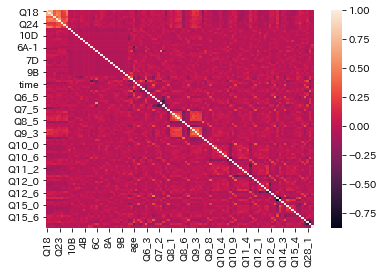

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
 
sns.heatmap(df_corr)

見やすいように図にして出力

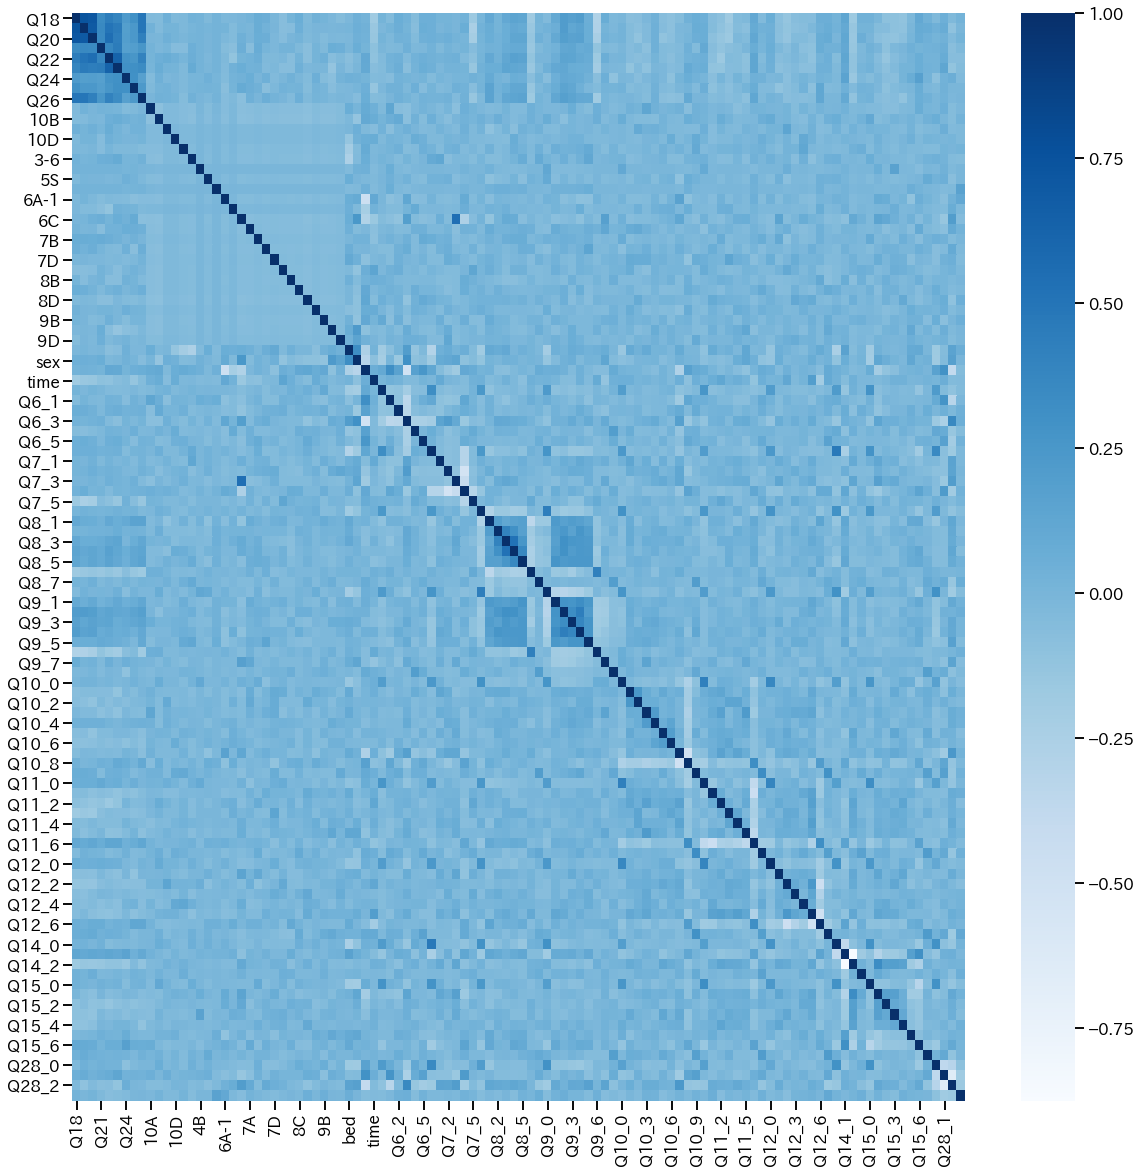

In [216]:
sns.set_context("talk")
fig = plt.subplots(figsize=(20,20))
 
sns.heatmap(df_corr,cmap='Blues')

外来のデータクレンジング

In [217]:
qr = pd.read_csv("/content/RawData【ＱＲコード】2020年度患者調査（外来）.csv")
sheet = pd.read_csv("/content/RawData【用紙】2020年度患者調査（外来）.csv")
medaca = pd.read_csv("/content/RawData【MeDaCa】2020年度患者調査（外来）.csv")
line = pd.read_csv("/content/RawData【LINE】2020年度患者調査（外来）.csv")

In [218]:
qr

,タイムスタンプ,１）本日の受診診療科（五十音順）,２）患者さんの性別,３）患者さんの年齢,４）患者さんの通院歴,５）2020年2月～2020年9月の間に外来予約があった方は、予約があった月を教えてください。,６）普段、『情報を手に入れる手段』として主に何を利用されていますか。,７）外来の待合呼び出しサービスを行っている、当院の『ＬＩＮＥ・MeDaCa』登録について教えてください。,８）『当院への問い合わせ』はどのようにされましたか（複数回答可）,９－１）『予約があった』患者さんは、当院への受診についてどうされましたか,９－２）『④予約日に受診しなかった』を選んだ方は、どうされましたか,９－３）『①予約を変更した』を選んだ方は、どのように変更されましたか,１０－１）『大切なお知らせ』を、ご覧いただきましたか。,１０－２）『大切なお知らせ』を、どの程度ご覧いただきましたか。,１０－３）新型コロナ禍中期に、当院ホームページの『大切なお知らせ』をご覧いただいていた方は記載内容のわかりやすさについて評価してください。（10点満点）,１０－４）１０－３）の設問に対する点数の理由をお聞かせください。,１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [①混雑の分散・平均化：診察枠の曜日・時間帯を変更する],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [②長時間の滞在を避ける：予約時間の３０分以上前に来院しない],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [③朝の採血の集中緩和：午後の採血や診察日より事前の採血をする],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [④保険証確認：ブロック受付で確認（保険証の記載内容に変更ない方）],１２）『Ｗｅｂフォームでの外来予約変更』について教えてください。,１３）『電話による文書申し込み』について教えてください。,１４－１）『患者さん専用ダイヤルを設置』について教えてください。,１４ー２）『患者さん専用ダイヤル』を利用してみてどうでしたか。該当するものすべて選択してください。（複数回答可）,１５－１）『電話診療・電話処方』について教えてください。,１５ー２）『電話診療・電話処方』を利用してみてどうでしたか。該当するものすべて選択してください。（複数回答可）,１６）医師の診療や処置への信頼感は何点ですか（１０点満点）,１７）医師への質問のしやすさは何点ですか（１０点満点）,１８）本日の医師に今後も診察を望む希望度は何点ですか（１０点満点）※本日受診されなかった方は、主な診療科の医師を想定してお答えください。,１９）看護師への相談のしやすさは何点ですか（１０点満点）※接点のない方は回答不要です。,２０）スタッフは、検査・治療・諸手続きなどの際にあなたの氏名を確認しましたか（１０点満点）,２１）医師、看護師等の医療従事者は、あなたの診察や処置をする前に手指衛生を行っていますか？（１０点満点）※わからない場合は回答不要です。,２２）慶應義塾大学病院を家族・友人・知人へのおすすめ度は何点ですか（１０点満点）,２３）２２）でつけた点数の理由をお聞かせください,２４）『アンケートの形式』は下記のどの方法が一番回答しやすいですか,その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。,Unnamed: 36,Unnamed: 37
0,2020/10/8 8:15,眼科,①男性,⑤40代,③１年～３年,"⑤５月, ⑨９月",③スマートフォン,④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）,③ホームページを見て確認した,②予約日に来院して受診した,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,5.0,70,協力できる,どちらでもない,協力できる,どちらでもない,①知らなかった,①知らなかった,①知らなかった,NaN,①知らなかった,NaN,9,6,9,9.0,9,9.0,8,70,①紙を配布して、自身（あるいはご家族など）で記入して回答する方法,NaN,NaN,NaN
1,2020/10/8 8:36,産科,②女性,④30代,③１年～３年,⑤５月,③スマートフォン,③ＭｅＤａＣａに登録している,"①問合せしなかった, ③ホームページを見て確認した",②予約日に来院して受診した,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,10.0,特に分かりにくいところはなかった,協力できる,協力できる,どちらでもない,協力できる,①知らなかった,①知らなかった,①知らなかった,NaN,①知らなかった,NaN,10,10,10,10.0,10,10.0,10,特に困ったことがないから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,NaN,NaN
2,2020/10/8 8:39,整形外科,①男性,⑦60代,③１年～３年,"②２月, ③３月, ④４月, ⑤５月, ⑥６月, ⑦７月, ⑧８月, ⑨９月",③スマートフォン,②ＬＩＮＥに登録している,⑥直接当院に来院し確認した,②予約日に来院して受診した,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,6.0,確認しないとわからないから,協力できる,協力できる,協力できる,協力できる,③利用した,③利用した,②知っていたが利用していない,NaN,③利用した,⑥大変助かった,8,8,8,7.0,8,9.0,8,安心感がある,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,特になし,NaN,NaN
3,2020/10/8 8:44,泌尿器科,①男性,⑧70代,④４年～１０年,"③３月, ⑥６月, ⑧８月, ⑨９月",②パソコン,④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）,①問合せしなかった,②予約日に来院して受診した,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,5.0,NaN,協力できる,協力できる,どちらでもない,協力できる,①知らなかった,①知らなかった,①知らなかった,NaN,①知らなかった,NaN,10,10,10,10.0,10,10.0,10,すべて親切、信頼できます,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,信頼度 大です。ありがとうございます,NaN,NaN
4,2020/10/8 8:47,歯科・口腔外科,①男性,⑦60代,②１年未満,⑧８月,①テレビ,④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）,④患者さん専用ダイヤルにかけて問い合わせた,②予約日に来院して受診した,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,協力できる,どちらでもない,協力できる,協力できる,②知っていたが利用していない,①知らなかった,③利用した,②知りたいことを答えてくれた,①知らなかった,NaN,10,10,10,9.0,8,NaN,10,信頼しているので。,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,2020/10/23 22:44,婦人科,②女性,⑥50代,②１年未満,④４月,③スマートフォン,④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）,④患者さん専用ダイヤルにかけて問い合わせた,④予約日に受診しなかった。（予約変更をした方も含む）,①予約を変更した,⑥医師からの電話で変更した,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,協力できる,協力できる,協力できる,協力できる,①知らなかった,①知らなかった,①知らなかった,NaN,①知らなかった,NaN,10,10,10,NaN,10,NaN,10,信頼してるから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,電話が通じない,NaN,NaN
802,2020/10/24 22:08,婦人科,②女性,⑤40代,③１年～３年,⑤５月,③スマートフォン,③ＭｅＤａＣａに登録している,"⑤Ｗｅｂフォームで問い合わせた, 担当医から電話があり助かりました",④予約日に受診しなかった。（予約変更をした方も含む）,①予約を変更した,④Webフォームから申し込んだ,①見た,③予約日が近づいたら見た（予約日当日を含む）,10.0,丁寧に書かれていた,協力できる,協力できる,協力できる,協力できる,②知っていたが利用していない,②知っていたが利用していない,②知っていたが利用していない,NaN,②知っていたが利用していない,NaN,10,10,10,10.0,10,1

In [219]:
sheet

,タイムスタンプ,１）本日の受診診療科（五十音順）,２）患者さんの性別,３）患者さんの年齢,４）患者さんの通院歴,５）2020年2月～2020年9月の間に外来予約があった方は、予約があった月を教えてください。,６）普段、『情報を手に入れる手段』として主に何を利用されていますか。,７）外来の待合呼び出しサービスを行っている、当院の『ＬＩＮＥ・MeDaCa』登録について教えてください。,８）『当院への問い合わせ』はどのようにされましたか(複数回答可）,９－１）『予約があった』患者さんは、当院への受診についてどうされましたか,９－２）『④予約日に受診しなかった』を選んだ方は、どうされましたか,９－３）『①予約を変更した』を選んだ方は、どのように変更されましたか,１０－１）『大切なお知らせ』を、ご覧いただきましたか。,１０－２）『大切なお知らせ』を、どの程度ご覧いただきましたか。,１０－３）新型コロナ禍中期に、当院ホームページの『大切なお知らせ』をご覧いただいていた方は記載内容のわかりやすさについて評価してください。（10点満点）,１０－４）１０－３）の設問に対する点数の理由をお聞かせください。,１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [①混雑の分散・平均化：診察枠の曜日・時間帯を変更する],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [②長時間の滞在を避ける：予約時間の３０分以上前に来院しない],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [③朝の採血の集中緩和：午後の採血や診察日より事前の採血をする],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [④保険証確認：ブロック受付で確認（保険証の記載内容に変更ない方）],１２）『Ｗｅｂフォームでの外来予約変更』について教えてください。,１３）『電話による文書申し込み』について教えてください。,１４－１）『患者さん専用ダイヤルを設置』について教えてください。,１４ー２）『患者さん専用ダイヤル』を利用してみてどうでしたか。該当するものすべて選択してください。(複数回答可）,１５－１）『電話診療・電話処方』について教えてください。,１５ー２）『電話診療・電話処方』を利用してみてどうでしたか。該当するものすべて選択してください。(複数回答可）,１６）医師の診療や処置への信頼感は何点ですか（１０点満点）,１７）医師への質問のしやすさは何点ですか（１０点満点）,１８）本日の医師に今後も診察を望む希望度は何点ですか（１０点満点）※本日受診されなかった方は、主な診療科の医師を想定してお答えください。,１９）看護師への相談のしやすさは何点ですか（１０点満点）※接点のない方は回答不要です。,２０）スタッフは、検査・治療・諸手続きなどの際にあなたの氏名を確認しましたか（１０点満点）,２１）医師、看護師等の医療従事者は、あなたの診察や処置をする前に手指衛生を行っていますか？（１０点満点）※わからない場合は回答不要です。,２２）慶應義塾大学病院を家族・友人・知人へのおすすめ度は何点ですか（１０点満点）,２３）２２）でつけた点数の理由をお聞かせください,２４）『アンケートの形式』は下記のどの方法が一番回答しやすいですか,その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。,Unnamed: 36
0,90001,放射線治療科,1.0,8.0,4.0,"2,5,8","1,2,3",4,3,2,NaN,NaN,1.0,3.0,7,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7,2,8,10.0,9~8,NaN,10.0,10.0,10.0,9.0,ほぼ満足しているから。,1,NaN,NaN
1,90002,複数科,2.0,6.0,4.0,"2,3,4,5,6,7,8,9","1,2,3",2,1,2,NaN,NaN,1.0,3.0,4~5,NaN,1.0,3.0,1.0,1.0,2.0,1.0,1.0,7,3,"1,5,6",NaN,10,10.0,10.0,10.0,10.0,8.0,病院を選ぶのはその患者（個人）なので私は素人ですから他人にはすすめない。（含家族）,3,①クラークさんの私語が気になる。②クラークさん笑顔（明るい？対応が少ない方が多く？無愛想。③...,NaN
2,90003,放射線治療科,NaN,7.0,3.0,"2,4,6,8",1,4,1,4,1,1,2.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7,2,NaN,7.0,6,10.0,9.0,10.0,NaN,7.0,とても信頼できる医師と少し不安なドクターがいる。,1,おおかたよいのですが、ドクターによっては治療の説明がたりてない方がいらっしゃる。,NaN
3,90004,血液内科,2.0,5.0,5.0,5,3,4,1,4,1,6,2.0,NaN,NaN,NaN,1.0,1.0,3.0,1.0,1.0,1.0,1.0,7,1,8,9.0,9,9.0,6.0,8.0,8.0,8.0,病院がキレイになった。高齢者の患者が多く、待ち時間が長いので２点マイナス。先生には信頼してい...,1,血液内科2A-11で診察室が１番奥。呼出番号が見える、近くのベンチは密状態。（すき間なく座っ...,NaN
4,90005,血液内科,2.0,9.0,5.0,"2,3,4,5,6,7,8,9","1,4",4,1,2,NaN,NaN,2.0,NaN,NaN,NaN,3.0,1.0,3.0,1.0,1.0,1.0,1.0,NaN,1,NaN,8.0,8,10.0,6.0,10.0,8.0,6.0,NaN,"1,2,3",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,140172,形成外科,1.0,7.0,4.0,"4,6,8","2,3",5,1,2,NaN,NaN,1.0,3.0,NaN,NaN,1.0,1.0,1.0,2.0,2.0,2.0,1.0,NaN,1,NaN,7.0,7,7.0,7.0,NaN,NaN,6.0,待ち時間が？,1,NaN,NaN
172,160173,精神神経科,1.0,7.0,5.0,8,2,4,4,2,NaN,NaN,2.0,NaN,NaN,NaN,1.0,2.0,1.0,1.0,2.0,1.0,1.0,NaN,1,NaN,9.0,9,9.0,5.0,9.0,NaN,8.0,2ヶ月毎の診察のため院内のレイアウトが変わりすぎ。びっくり。,1,NaN,NaN
173,160174,眼科,1.0,6.0,5.0,7,1,4,7,NaN,NaN,3,NaN,NaN,0,年々悪くなっている。,3.0,3.0,3.0,3.0,1.0,1.0,1.0,6,1,9,10.0,10,10.0,6.0,8.0,6.0,6.0,来たければ来れば良い。今なら杏林を選ぶ。,1,眼科の問題と言うより、病院が何かおかしい。ガードマン、入口、薬局、予約変更、薬（3割 毎回訂...,NaN
174,160175,眼科,2.0,7.0,3.0,1,1,5,1,1,NaN,NaN,2.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7,1,8,9.0,10,10.0,9.0,10.0,10.0,10.0,最善を尽くして下さるという信頼感があるから。医療レベルが高い。,1,待合室が混雑する中で、ex.W19、W20前のソファなど、比較的空いている場所に座るが、モニ...,NaN


In [220]:
line

,タイムスタンプ,１）本日の受診診療科（五十音順）,２）患者さんの性別,３）患者さんの年齢,４）患者さんの通院歴,５）2020年2月～2020年9月の間に外来予約があった方は、予約があった月を教えてください。,６）普段、『情報を手に入れる手段』として主に何を利用されていますか。,７）外来の待合呼び出しサービスを行っている、当院の『ＬＩＮＥ・MeDaCa』登録について教えてください。,８）『当院への問い合わせ』はどのようにされましたか（複数回答可）,９－１）『予約があった』患者さんは、当院への受診についてどうされましたか,９－２）『④予約日に受診しなかった』を選んだ方は、どうされましたか,９－３）『①予約を変更した』を選んだ方は、どのように変更されましたか,１０－１）『大切なお知らせ』を、ご覧いただきましたか。,１０－２）『大切なお知らせ』を、どの程度ご覧いただきましたか。,１０－３）新型コロナ禍中期に、当院ホームページの『大切なお知らせ』をご覧いただいていた方は記載内容のわかりやすさについて評価してください。（10点満点）,１０－４）１０－３）の設問に対する点数の理由をお聞かせください。,１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [①混雑の分散・平均化：診察枠の曜日・時間帯を変更する],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [②長時間の滞在を避ける：予約時間の３０分以上前に来院しない],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [③朝の採血の集中緩和：午後の採血や診察日より事前の採血をする],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [④保険証確認：ブロック受付で確認（保険証の記載内容に変更ない方）],１２）『Ｗｅｂフォームでの外来予約変更』について教えてください。,１３）『電話による文書申し込み』について教えてください。,１４－１）『患者さん専用ダイヤルを設置』について教えてください。,１４ー２）『患者さん専用ダイヤル』を利用してみてどうでしたか。該当するものすべて選択してください。（複数回答可）,１５－１）『電話診療・電話処方』について教えてください。,１５ー２）『電話診療・電話処方』を利用してみてどうでしたか。該当するものすべて選択してください。（複数回答可）,１６）医師の診療や処置への信頼感は何点ですか（１０点満点）,１７）医師への質問のしやすさは何点ですか（１０点満点）,１８）本日の医師に今後も診察を望む希望度は何点ですか（１０点満点）※本日受診されなかった方は、主な診療科の医師を想定してお答えください。,１９）看護師への相談のしやすさは何点ですか（１０点満点）※接点のない方は回答不要です。,２０）スタッフは、検査・治療・諸手続きなどの際にあなたの氏名を確認しましたか（１０点満点）,２１）医師、看護師等の医療従事者は、あなたの診察や処置をする前に手指衛生を行っていますか？（１０点満点）※わからない場合は回答不要です。,２２）慶應義塾大学病院を家族・友人・知人へのおすすめ度は何点ですか（１０点満点）,２３）２２）でつけた点数の理由をお聞かせください,２４）『アンケートの形式』は下記のどの方法が一番回答しやすいですか,その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。,Unnamed: 36
0,2020/10/7 13:25,精神・神経科,①男性,④30代,④４年～１０年,③３月,②パソコン,②ＬＩＮＥに登録している,NaN,NaN,NaN,NaN,①見た,②1週間に1度くらい見ていた,5.0,４月の時は分かりにくかった,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,9.0,8.0,6.0,6.0,6.0,10.0,スタッフや医師が親切,①紙を配布して、自身（あるいはご家族など）で記入して回答する方法,NaN,NaN
1,2020/10/7 13:25,婦人科,②女性,⑤40代,②１年未満,⑨９月,②パソコン,①両方とも登録している,NaN,NaN,NaN,NaN,①見た,②1週間に1度くらい見ていた,7.0,必要な情報が簡潔に記載されていた,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⑧利用してない,8.0,7.0,10.0,8.0,10.0,8.0,10.0,さまざまなことがシステム化されていて便利。清潔。医師への信頼度。,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,NaN
2,2020/10/7 13:25,婦人科,②女性,⑤40代,③１年～３年,⑦７月,③スマートフォン,①両方とも登録している,NaN,NaN,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,8.0,わかりにくい点は特になかったから,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⑧利用してない,5.0,2.0,5.0,5.0,9.0,7.0,5.0,病気の種類によるし担当医によると思います,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,NaN
3,2020/10/7 13:26,リウマチ・膠原病内科,②女性,⑤40代,①初診,①予約がなかった,③スマートフォン,②ＬＩＮＥに登録している,③ホームページを見て確認した,①予約がなかった,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,NaN,NaN,NaN,NaN,①知らなかった,①知らなかった,①知らなかった,NaN,①知らなかった,NaN,6.0,6.0,6.0,4.0,7.0,8.0,6.0,多忙のためか他病院に比べて流れ作業、かなりの密の中での待ち時間の長さ,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,NaN
4,2020/10/7 13:26,神経内科,②女性,④30代,③１年～３年,⑨９月,③スマートフォン,①両方とも登録している,③ホームページを見て確認した,④予約日に受診しなかった。（予約変更をした方も含む）,①予約を変更した,④Webフォームから申し込んだ,①見た,③予約日が近づいたら見た（予約日当日を含む）,10.0,読んで不安が解消された。,NaN,NaN,NaN,NaN,①知らなかった,①知らなかった,①知らなかった,NaN,NaN,⑤今後も引き続きやってほしい,10.0,10.0,10.0,10.0,10.0,10.0,10.0,患者さんへの対応が丁寧。,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2829,2020/10/25 17:40,眼科,②女性,⑦60代,④４年～１０年,"⑥６月, ⑦７月",③スマートフォン,②ＬＩＮＥに登録している,"④患者さん専用ダイヤルにかけて問い合わせた, 外来から折り返しの電話を頂きました。",②予約日に来院して受診した,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,5.0,「通院中・再来の方」から「予約のある患者さん」で行くのかチェックしたように思います。大切なお...,協力できる,どちらでもない,どちらでもない,協力できる,①知らなかった,①知らなかった,③利用した,③親切だった,②知っていたが利用していない,NaN,10.0,1.0,8.0,NaN,10.0,NaN,10.0,医師も看護師さんも親切で誠意が感じられます。今まで処置していただいた医師の技術も最高だと思います。,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,いつもありがとうございます。\n入院もしていますが、他の病院より看護師さんの質がとても良いで...,NaN
2830,2020/10/25 19:25,リウマチ・膠原病内科,②女性,⑤40代,③１年～３年,"⑥６月, ⑦７月, ⑧８月",③スマートフォン,②ＬＩＮＥに登録している,"③ホームページを見て確認した, ④患者さん専用ダイヤルにかけて問い合わせた",④予約日に受診しなかった。（予約変更をした方も含む）,①予約を変更した,②患者さん専用ダイヤルへ電話した,①見た,③予約日が近づいたら見た（予約日当日を含む）,8.0,特に気になる点はなかったです,どちらでもない,協力できる,協力できる,協力できる,②知っていたが利用していない,①知らなかった,③利用した,②知りたいことを答えてくれた,②知っていたが利用していない,NaN,9.0,8.0,9.0,NaN,10.0,NaN,9.0,忙しい中、きちんと説明をしてくれるので、安心します,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,NaN
2831,2020/10/25 22:33

In [221]:
medaca

,タイムスタンプ,１）本日の受診診療科（五十音順）,２）患者さんの性別,３）患者さんの年齢,４）患者さんの通院歴,５）2020年2月～2020年9月の間に外来予約があった方は、予約があった月を教えてください。,６）普段、『情報を手に入れる手段』として主に何を利用されていますか。,７）外来の待合呼び出しサービスを行っている、当院の『ＬＩＮＥ・MeDaCa』登録について教えてください。,８）『当院への問い合わせ』はどのようにされましたか（複数回答可）,９－１）『予約があった』患者さんは、当院への受診についてどうされましたか,９－２）『④予約日に受診しなかった』を選んだ方は、どうされましたか,９－３）『①予約を変更した』を選んだ方は、どのように変更されましたか,１０－１）『大切なお知らせ』を、ご覧いただきましたか。,１０－２）『大切なお知らせ』を、どの程度ご覧いただきましたか。,１０－３）新型コロナ禍中期に、当院ホームページの『大切なお知らせ』をご覧いただいていた方は記載内容のわかりやすさについて評価してください。（10点満点）,１０－４）１０－３）の設問に対する点数の理由をお聞かせください。,１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [①混雑の分散・平均化：診察枠の曜日・時間帯を変更する],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [②長時間の滞在を避ける：予約時間の３０分以上前に来院しない],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [③朝の採血の集中緩和：午後の採血や診察日より事前の採血をする],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [④保険証確認：ブロック受付で確認（保険証の記載内容に変更ない方）],１２）『Ｗｅｂフォームでの外来予約変更』について教えてください。,１３）『電話による文書申し込み』について教えてください。,１４－１）『患者さん専用ダイヤルを設置』について教えてください。,１４ー２）『患者さん専用ダイヤル』を利用してみてどうでしたか。該当するものすべて選択してください。（複数回答可）,１５－１）『電話診療・電話処方』について教えてください。,１５ー２）『電話診療・電話処方』を利用してみてどうでしたか。該当するものすべて選択してください。（複数回答可）,１６）医師の診療や処置への信頼感は何点ですか（１０点満点）,１７）医師への質問のしやすさは何点ですか（１０点満点）,１８）本日の医師に今後も診察を望む希望度は何点ですか（１０点満点）※本日受診されなかった方は、主な診療科の医師を想定してお答えください。,１９）看護師への相談のしやすさは何点ですか（１０点満点）※接点のない方は回答不要です。,２０）スタッフは、検査・治療・諸手続きなどの際にあなたの氏名を確認しましたか（１０点満点）,２１）医師、看護師等の医療従事者は、あなたの診察や処置をする前に手指衛生を行っていますか？（１０点満点）※わからない場合は回答不要です。,２２）慶應義塾大学病院を家族・友人・知人へのおすすめ度は何点ですか（１０点満点）,２３）２２）でつけた点数の理由をお聞かせください,２４）『アンケートの形式』は下記のどの方法が一番回答しやすいですか,その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。,Unnamed: 36
0,2020/10/8 10:49,婦人科,②女性,⑤40代,②１年未満,①予約がなかった,③スマートフォン,③ＭｅＤａＣａに登録している,①問合せしなかった,①予約がなかった,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,協力できる,協力できる,どちらでもない,協力できる,①知らなかった,①知らなかった,①知らなかった,NaN,①知らなかった,NaN,10,10,10,NaN,10,NaN,10,信頼出来るから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,NaN
1,2020/10/8 10:49,一般・消化器外科,①男性,⑥50代,④４年～１０年,①予約がなかった,③スマートフォン,③ＭｅＤａＣａに登録している,①問合せしなかった,①予約がなかった,NaN,NaN,①見た,②1週間に1度くらい見ていた,10.0,病院から情報提供されていた,協力できる,協力できる,協力できる,協力できる,①知らなかった,①知らなかった,①知らなかった,NaN,①知らなかった,NaN,10,10,10,10.0,10,10.0,10,信頼出来る良い病院だと思います,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,NaN
2,2020/10/8 10:51,漢方,②女性,⑤40代,⑤１０年以上,⑧８月,③スマートフォン,③ＭｅＤａＣａに登録している,③ホームページを見て確認した,④予約日に受診しなかった。（予約変更をした方も含む）,①予約を変更した,①外来予約センターへ電話した,①見た,③予約日が近づいたら見た（予約日当日を含む）,0.0,情報量、情報のアップデートアップが少ない,協力できない,協力できる,協力できる,協力できる,①知らなかった,①知らなかった,①知らなかった,NaN,③利用した,②予定が立たなくて困った,10,10,10,NaN,10,NaN,0,料金が高い。看護師が少ないのか忙しくて放置される,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,NaN
3,2020/10/8 10:52,脳神経外科,②女性,④30代,④４年～１０年,"④４月, ⑦７月, ⑨９月",②パソコン,①両方とも登録している,①問合せしなかった,②予約日に来院して受診した,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,協力できる,協力できる,協力できる,協力できる,①知らなかった,②知っていたが利用していない,①知らなかった,NaN,①知らなかった,NaN,5,5,5,5.0,10,9.0,5,医師との相性なので、病院は関係ない,③病院内で病院のタブレットを用いて、自身で回答する方法,NaN,NaN
4,2020/10/8 10:52,一般・消化器外科,②女性,⑥50代,③１年～３年,"②２月, ⑦７月, ⑧８月, ⑨９月",②パソコン,①両方とも登録している,③ホームページを見て確認した,③電話診療により受診した（予約日・予約日以外どちらでも可）,NaN,NaN,①見た,②1週間に1度くらい見ていた,10.0,ラインで回答致しました,協力できる,協力できる,協力できる,協力できる,②知っていたが利用していない,②知っていたが利用していない,③利用した,"①不安が解消され安心感を得られた, ②知りたいことを答えてくれた, ③親切だった, ④わかり...",③利用した,"①安心感が得られた, ⑥大変助かった, ⑦直接医師に診てもらう方がよい",10,10,10,10.0,10,NaN,10,ラインで回答致しました,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,ラインで回答致しました,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,2020/10/24 8:41,一般・消化器外科,①男性,⑤40代,④４年～１０年,⑤５月,③スマートフォン,③ＭｅＤａＣａに登録している,①問合せしなかった,④予約日に受診しなかった。（予約変更をした方も含む）,①予約を変更した,⑥医師からの電話で変更した,①見た,③予約日が近づいたら見た（予約日当日を含む）,5.0,普通,どちらでもない,協力できる,どちらでもない,協力できる,①知らなかった,①知らなかった,①知らなかった,NaN,①知らなかった,NaN,5,5,5,5.0,10,NaN,5,どちらとも言えない,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,NaN
899,2020/10/24 9:44,産科,②女性,④30代,②１年未満,"⑥６月, ⑦７月, ⑧８月, ⑨９月",③スマートフォン,③ＭｅＤａＣａに登録している,③ホームページを見て確認した,②予約日に来院して受診した,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,10.0,ホームページの内容で理解できた。,協力できない,どちらでもない,協力できる,協力できる,①知らなかった,①知らなかった,①知らなかった,NaN,②知っていたが利用していない,NaN,10,10,10,10.0,10,5.0,10,正しい治療なのため,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,NaN
900,2020/10/25 13:52,産科,②

データをくっつける

In [222]:
sheet['meet'] = 1
sheet['Q8'] = sheet['８）『当院への問い合わせ』はどのようにされましたか(複数回答可）'] 
sheet['Q14-2'] = sheet['１４ー２）『患者さん専用ダイヤル』を利用してみてどうでしたか。該当するものすべて選択してください。(複数回答可）'] 
sheet['Q15-2'] = sheet['１５ー２）『電話診療・電話処方』を利用してみてどうでしたか。該当するものすべて選択してください。(複数回答可）'] 
sheet = sheet.drop(columns='８）『当院への問い合わせ』はどのようにされましたか(複数回答可）')
sheet = sheet.drop(columns='１４ー２）『患者さん専用ダイヤル』を利用してみてどうでしたか。該当するものすべて選択してください。(複数回答可）')
sheet = sheet.drop(columns='１５ー２）『電話診療・電話処方』を利用してみてどうでしたか。該当するものすべて選択してください。(複数回答可）')

qr['meet'] = 1
qr['Q8'] = qr['８）『当院への問い合わせ』はどのようにされましたか（複数回答可）'] 
qr['Q14-2'] = qr['１４ー２）『患者さん専用ダイヤル』を利用してみてどうでしたか。該当するものすべて選択してください。（複数回答可）'] 
qr['Q15-2'] = qr['１５ー２）『電話診療・電話処方』を利用してみてどうでしたか。該当するものすべて選択してください。（複数回答可）'] 
qr = qr.drop(columns='８）『当院への問い合わせ』はどのようにされましたか（複数回答可）')
qr = qr.drop(columns='１４ー２）『患者さん専用ダイヤル』を利用してみてどうでしたか。該当するものすべて選択してください。（複数回答可）')
qr = qr.drop(columns='１５ー２）『電話診療・電話処方』を利用してみてどうでしたか。該当するものすべて選択してください。（複数回答可）')

line["meet"] = 0
line['Q8'] = line['８）『当院への問い合わせ』はどのようにされましたか（複数回答可）'] 
line['Q14-2'] = line['１４ー２）『患者さん専用ダイヤル』を利用してみてどうでしたか。該当するものすべて選択してください。（複数回答可）'] 
line['Q15-2'] = line['１５ー２）『電話診療・電話処方』を利用してみてどうでしたか。該当するものすべて選択してください。（複数回答可）'] 
line = line.drop(columns='８）『当院への問い合わせ』はどのようにされましたか（複数回答可）')
line = line.drop(columns='１４ー２）『患者さん専用ダイヤル』を利用してみてどうでしたか。該当するものすべて選択してください。（複数回答可）')
line = line.drop(columns='１５ー２）『電話診療・電話処方』を利用してみてどうでしたか。該当するものすべて選択してください。（複数回答可）')


medaca["meet"] = 0
medaca['Q8'] = medaca['８）『当院への問い合わせ』はどのようにされましたか（複数回答可）'] 
medaca['Q14-2'] = medaca['１４ー２）『患者さん専用ダイヤル』を利用してみてどうでしたか。該当するものすべて選択してください。（複数回答可）'] 
medaca['Q15-2'] = medaca['１５ー２）『電話診療・電話処方』を利用してみてどうでしたか。該当するものすべて選択してください。（複数回答可）'] 
medaca = medaca.drop(columns='８）『当院への問い合わせ』はどのようにされましたか（複数回答可）')
medaca = medaca.drop(columns='１４ー２）『患者さん専用ダイヤル』を利用してみてどうでしたか。該当するものすべて選択してください。（複数回答可）')
medaca = medaca.drop(columns='１５ー２）『電話診療・電話処方』を利用してみてどうでしたか。該当するものすべて選択してください。（複数回答可）')


In [223]:
marge = pd.concat([qr, line,medaca,sheet], ignore_index=True)

In [224]:
 marge

,タイムスタンプ,１）本日の受診診療科（五十音順）,２）患者さんの性別,３）患者さんの年齢,４）患者さんの通院歴,５）2020年2月～2020年9月の間に外来予約があった方は、予約があった月を教えてください。,６）普段、『情報を手に入れる手段』として主に何を利用されていますか。,７）外来の待合呼び出しサービスを行っている、当院の『ＬＩＮＥ・MeDaCa』登録について教えてください。,９－１）『予約があった』患者さんは、当院への受診についてどうされましたか,９－２）『④予約日に受診しなかった』を選んだ方は、どうされましたか,９－３）『①予約を変更した』を選んだ方は、どのように変更されましたか,１０－１）『大切なお知らせ』を、ご覧いただきましたか。,１０－２）『大切なお知らせ』を、どの程度ご覧いただきましたか。,１０－３）新型コロナ禍中期に、当院ホームページの『大切なお知らせ』をご覧いただいていた方は記載内容のわかりやすさについて評価してください。（10点満点）,１０－４）１０－３）の設問に対する点数の理由をお聞かせください。,１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [①混雑の分散・平均化：診察枠の曜日・時間帯を変更する],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [②長時間の滞在を避ける：予約時間の３０分以上前に来院しない],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [③朝の採血の集中緩和：午後の採血や診察日より事前の採血をする],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [④保険証確認：ブロック受付で確認（保険証の記載内容に変更ない方）],１２）『Ｗｅｂフォームでの外来予約変更』について教えてください。,１３）『電話による文書申し込み』について教えてください。,１４－１）『患者さん専用ダイヤルを設置』について教えてください。,１５－１）『電話診療・電話処方』について教えてください。,１６）医師の診療や処置への信頼感は何点ですか（１０点満点）,１７）医師への質問のしやすさは何点ですか（１０点満点）,１８）本日の医師に今後も診察を望む希望度は何点ですか（１０点満点）※本日受診されなかった方は、主な診療科の医師を想定してお答えください。,１９）看護師への相談のしやすさは何点ですか（１０点満点）※接点のない方は回答不要です。,２０）スタッフは、検査・治療・諸手続きなどの際にあなたの氏名を確認しましたか（１０点満点）,２１）医師、看護師等の医療従事者は、あなたの診察や処置をする前に手指衛生を行っていますか？（１０点満点）※わからない場合は回答不要です。,２２）慶應義塾大学病院を家族・友人・知人へのおすすめ度は何点ですか（１０点満点）,２３）２２）でつけた点数の理由をお聞かせください,２４）『アンケートの形式』は下記のどの方法が一番回答しやすいですか,その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。,Unnamed: 36,Unnamed: 37,meet,Q8,Q14-2,Q15-2
0,2020/10/8 8:15,眼科,①男性,⑤40代,③１年～３年,"⑤５月, ⑨９月",③スマートフォン,④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）,②予約日に来院して受診した,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,5,70,協力できる,どちらでもない,協力できる,どちらでもない,①知らなかった,①知らなかった,①知らなかった,①知らなかった,9.0,6,9.0,9.0,9.0,9.0,8.0,70,①紙を配布して、自身（あるいはご家族など）で記入して回答する方法,NaN,NaN,NaN,1,③ホームページを見て確認した,NaN,NaN
1,2020/10/8 8:36,産科,②女性,④30代,③１年～３年,⑤５月,③スマートフォン,③ＭｅＤａＣａに登録している,②予約日に来院して受診した,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,10,特に分かりにくいところはなかった,協力できる,協力できる,どちらでもない,協力できる,①知らなかった,①知らなかった,①知らなかった,①知らなかった,10.0,10,10.0,10.0,10.0,10.0,10.0,特に困ったことがないから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,NaN,NaN,1,"①問合せしなかった, ③ホームページを見て確認した",NaN,NaN
2,2020/10/8 8:39,整形外科,①男性,⑦60代,③１年～３年,"②２月, ③３月, ④４月, ⑤５月, ⑥６月, ⑦７月, ⑧８月, ⑨９月",③スマートフォン,②ＬＩＮＥに登録している,②予約日に来院して受診した,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,6,確認しないとわからないから,協力できる,協力できる,協力できる,協力できる,③利用した,③利用した,②知っていたが利用していない,③利用した,8.0,8,8.0,7.0,8.0,9.0,8.0,安心感がある,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,特になし,NaN,NaN,1,⑥直接当院に来院し確認した,NaN,⑥大変助かった
3,2020/10/8 8:44,泌尿器科,①男性,⑧70代,④４年～１０年,"③３月, ⑥６月, ⑧８月, ⑨９月",②パソコン,④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）,②予約日に来院して受診した,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,5,NaN,協力できる,協力できる,どちらでもない,協力できる,①知らなかった,①知らなかった,①知らなかった,①知らなかった,10.0,10,10.0,10.0,10.0,10.0,10.0,すべて親切、信頼できます,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,信頼度 大です。ありがとうございます,NaN,NaN,1,①問合せしなかった,NaN,NaN
4,2020/10/8 8:47,歯科・口腔外科,①男性,⑦60代,②１年未満,⑧８月,①テレビ,④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）,②予約日に来院して受診した,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,協力できる,どちらでもない,協力できる,協力できる,②知っていたが利用していない,①知らなかった,③利用した,①知らなかった,10.0,10,10.0,9.0,8.0,NaN,10.0,信頼しているので。,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,NaN,NaN,1,④患者さん専用ダイヤルにかけて問い合わせた,②知りたいことを答えてくれた,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4714,140172,形成外科,1,7,4,"4,6,8","2,3",5,2,NaN,NaN,1,3,NaN,NaN,1,1,1,2,2,2,1,1,7.0,7,7.0,7.0,NaN,NaN,6.0,待ち時間が？,1,NaN,NaN,NaN,1,1,NaN,NaN
4715,160173,精神神経科,1,7,5,8,2,4,2,NaN,NaN,2,NaN,NaN,NaN,1,2,1,1,2,1,1,1,9.0,9,9.0,5.0,9.0,NaN,8.0,2ヶ月毎の診察のため院内のレイアウトが変わりすぎ。びっくり。,1,NaN,NaN,NaN,1,4,NaN,NaN
4716,160174,眼科,1,6,5,7,1,4,NaN,NaN,3,NaN,NaN,0,年々悪くなっている。,3,3,3,3,1,1,1,1,10.0,10,10.0,6.0,8.0,6.0,6.0,来たければ来れば良い。今なら杏林を選ぶ。,1,眼科の問題と言うより、病院が何かおかしい。ガードマン、入口、薬局、予約変更、薬（3割 毎回訂...,NaN,NaN,1,7,6,9
4717,160175,眼科,2,7,3,1,1,5,1,NaN,NaN,2,NaN,NaN,NaN,1,1,1,1,1,1,1,1,9.0,10,10.0,9.0,10.0,10.0,10.0,最善を尽くして下さるという信頼感があるから。医療レベルが高い。,1,待合室が混雑する中で、ex.W19、W20前のソファなど、比較的空いている場所に座るが、モニ...,NaN,NaN,1,1,7,8


タイムスタンプの行を除去（用紙の方はないので、マージしたデータでは使わない）

In [225]:
data = marge.drop(columns='タイムスタンプ')
data = data.drop(columns='Unnamed: 36')
data = data.drop(columns='Unnamed: 37')



統合したシートの回答形式も揃える（点数や年齢などの数値系の回答以外は欠損を０で補完）

In [226]:
print(data["１）本日の受診診療科（五十音順）"])

0            眼科
1            産科
2          整形外科
3          泌尿器科
4       歯科・口腔外科
         ...   
4714       形成外科
4715      精神神経科
4716         眼科
4717         眼科
4718      一・消外科
Name: １）本日の受診診療科（五十音順）, Length: 4719, dtype: object


In [227]:
c= collections.Counter(data["１）本日の受診診療科（五十音順）"])
print(c)

Counter({'婦人科': 601, '消化器内科': 416, '腎臓・内分泌・代謝内科': 369, '整形外科': 323, 'リウマチ・膠原病内科': 311, '一般・消化器外科': 250, '循環器内科': 219, '皮膚科': 170, '耳鼻咽喉科': 162, '泌尿器科': 155, '産科': 154, '呼吸器内科': 149, '神経内科': 139, '血液内科': 127, '眼科': 122, '歯科・口腔外科': 96, '小児科': 93, '脳神経外科': 63, '精神・神経科': 56, '呼吸器外科': 54, '麻酔科': 54, '心臓血管外科': 45, '形成外科': 37, '腎・内・代科': 37, '総合診療科': 31, '放射線治療科': 29, '腫瘍センター': 24, '漢方': 20, 'リハビリテーション科': 18, '小児外科': 17, '漢方医学センター': 14, nan: 13, '精神神経科': 10, 'メモリークリニック': 9, 'スポーツ医学総合センター': 8, '放射線診断科': 7, '漢方外来': 6, '乳腺外科': 5, '漢方クリニック': 4, '皮膚科, 婦人科': 4, '消化器内科, 婦人科': 4, '消化器内科, 腎臓・内分泌・代謝内科': 4, '小児科, 小児外科': 3, '一般・消化器外科, 腎臓・内分泌・代謝内科': 3, '一般・消化器外科, 消化器内科': 3, '呼吸器外科, 呼吸器内科': 3, '呼吸器内科, リウマチ・膠原病内科': 3, '感染症外来': 3, '救急科': 3, '血管外科': 3, '一・消外科': 3, '東洋医学センター': 2, '感染症': 2, '眼科, 腎臓・内分泌・代謝内科, 脳神経外科': 2, '形成外科, 耳鼻咽喉科': 2, '一般・消化器外科, 眼科, 腎臓・内分泌・代謝内科': 2, '循環器内科, 婦人科': 2, '一般・消化器外科, 神経内科': 2, '腎臓・内分泌・代謝内科, 皮膚科': 2, '呼吸器内科, 循環器内科': 2, '整形外科, 泌尿器科': 2, '呼吸器内科, 腎臓・内分泌・代謝内科': 2, '皮膚科, リウマチ・膠原病内科': 2, '耳

In [228]:
#ここで名寄せしたいけど外来の種類が多すぎて、どれくらいに名寄せしたらいい感じに実際を反映できるのでしょうか；

In [229]:
c= collections.Counter(position_list)
print(c)

Counter({'1': 327, '2': 274, '0': 106, '3': 35, '1,2': 8, '1,2,3': 1, '1,3': 1})


In [230]:
#data["１）本日の受診診療科（五十音順）"] = position_list

In [231]:
data

,１）本日の受診診療科（五十音順）,２）患者さんの性別,３）患者さんの年齢,４）患者さんの通院歴,５）2020年2月～2020年9月の間に外来予約があった方は、予約があった月を教えてください。,６）普段、『情報を手に入れる手段』として主に何を利用されていますか。,７）外来の待合呼び出しサービスを行っている、当院の『ＬＩＮＥ・MeDaCa』登録について教えてください。,９－１）『予約があった』患者さんは、当院への受診についてどうされましたか,９－２）『④予約日に受診しなかった』を選んだ方は、どうされましたか,９－３）『①予約を変更した』を選んだ方は、どのように変更されましたか,１０－１）『大切なお知らせ』を、ご覧いただきましたか。,１０－２）『大切なお知らせ』を、どの程度ご覧いただきましたか。,１０－３）新型コロナ禍中期に、当院ホームページの『大切なお知らせ』をご覧いただいていた方は記載内容のわかりやすさについて評価してください。（10点満点）,１０－４）１０－３）の設問に対する点数の理由をお聞かせください。,１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [①混雑の分散・平均化：診察枠の曜日・時間帯を変更する],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [②長時間の滞在を避ける：予約時間の３０分以上前に来院しない],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [③朝の採血の集中緩和：午後の採血や診察日より事前の採血をする],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [④保険証確認：ブロック受付で確認（保険証の記載内容に変更ない方）],１２）『Ｗｅｂフォームでの外来予約変更』について教えてください。,１３）『電話による文書申し込み』について教えてください。,１４－１）『患者さん専用ダイヤルを設置』について教えてください。,１５－１）『電話診療・電話処方』について教えてください。,１６）医師の診療や処置への信頼感は何点ですか（１０点満点）,１７）医師への質問のしやすさは何点ですか（１０点満点）,１８）本日の医師に今後も診察を望む希望度は何点ですか（１０点満点）※本日受診されなかった方は、主な診療科の医師を想定してお答えください。,１９）看護師への相談のしやすさは何点ですか（１０点満点）※接点のない方は回答不要です。,２０）スタッフは、検査・治療・諸手続きなどの際にあなたの氏名を確認しましたか（１０点満点）,２１）医師、看護師等の医療従事者は、あなたの診察や処置をする前に手指衛生を行っていますか？（１０点満点）※わからない場合は回答不要です。,２２）慶應義塾大学病院を家族・友人・知人へのおすすめ度は何点ですか（１０点満点）,２３）２２）でつけた点数の理由をお聞かせください,２４）『アンケートの形式』は下記のどの方法が一番回答しやすいですか,その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。,meet,Q8,Q14-2,Q15-2
0,眼科,①男性,⑤40代,③１年～３年,"⑤５月, ⑨９月",③スマートフォン,④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）,②予約日に来院して受診した,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,5,70,協力できる,どちらでもない,協力できる,どちらでもない,①知らなかった,①知らなかった,①知らなかった,①知らなかった,9.0,6,9.0,9.0,9.0,9.0,8.0,70,①紙を配布して、自身（あるいはご家族など）で記入して回答する方法,NaN,1,③ホームページを見て確認した,NaN,NaN
1,産科,②女性,④30代,③１年～３年,⑤５月,③スマートフォン,③ＭｅＤａＣａに登録している,②予約日に来院して受診した,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,10,特に分かりにくいところはなかった,協力できる,協力できる,どちらでもない,協力できる,①知らなかった,①知らなかった,①知らなかった,①知らなかった,10.0,10,10.0,10.0,10.0,10.0,10.0,特に困ったことがないから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,1,"①問合せしなかった, ③ホームページを見て確認した",NaN,NaN
2,整形外科,①男性,⑦60代,③１年～３年,"②２月, ③３月, ④４月, ⑤５月, ⑥６月, ⑦７月, ⑧８月, ⑨９月",③スマートフォン,②ＬＩＮＥに登録している,②予約日に来院して受診した,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,6,確認しないとわからないから,協力できる,協力できる,協力できる,協力できる,③利用した,③利用した,②知っていたが利用していない,③利用した,8.0,8,8.0,7.0,8.0,9.0,8.0,安心感がある,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,特になし,1,⑥直接当院に来院し確認した,NaN,⑥大変助かった
3,泌尿器科,①男性,⑧70代,④４年～１０年,"③３月, ⑥６月, ⑧８月, ⑨９月",②パソコン,④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）,②予約日に来院して受診した,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,5,NaN,協力できる,協力できる,どちらでもない,協力できる,①知らなかった,①知らなかった,①知らなかった,①知らなかった,10.0,10,10.0,10.0,10.0,10.0,10.0,すべて親切、信頼できます,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,信頼度 大です。ありがとうございます,1,①問合せしなかった,NaN,NaN
4,歯科・口腔外科,①男性,⑦60代,②１年未満,⑧８月,①テレビ,④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）,②予約日に来院して受診した,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,協力できる,どちらでもない,協力できる,協力できる,②知っていたが利用していない,①知らなかった,③利用した,①知らなかった,10.0,10,10.0,9.0,8.0,NaN,10.0,信頼しているので。,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,1,④患者さん専用ダイヤルにかけて問い合わせた,②知りたいことを答えてくれた,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4714,形成外科,1,7,4,"4,6,8","2,3",5,2,NaN,NaN,1,3,NaN,NaN,1,1,1,2,2,2,1,1,7.0,7,7.0,7.0,NaN,NaN,6.0,待ち時間が？,1,NaN,1,1,NaN,NaN
4715,精神神経科,1,7,5,8,2,4,2,NaN,NaN,2,NaN,NaN,NaN,1,2,1,1,2,1,1,1,9.0,9,9.0,5.0,9.0,NaN,8.0,2ヶ月毎の診察のため院内のレイアウトが変わりすぎ。びっくり。,1,NaN,1,4,NaN,NaN
4716,眼科,1,6,5,7,1,4,NaN,NaN,3,NaN,NaN,0,年々悪くなっている。,3,3,3,3,1,1,1,1,10.0,10,10.0,6.0,8.0,6.0,6.0,来たければ来れば良い。今なら杏林を選ぶ。,1,眼科の問題と言うより、病院が何かおかしい。ガードマン、入口、薬局、予約変更、薬（3割 毎回訂...,1,7,6,9
4717,眼科,2,7,3,1,1,5,1,NaN,NaN,2,NaN,NaN,NaN,1,1,1,1,1,1,1,1,9.0,10,10.0,9.0,10.0,10.0,10.0,最善を尽くして下さるという信頼感があるから。医療レベルが高い。,1,待合室が混雑する中で、ex.W19、W20前のソファなど、比較的空いている場所に座るが、モニ...,1,1,7,8


In [232]:
c= collections.Counter(data["２）患者さんの性別"])
print(c)

Counter({'②女性': 2745, '①男性': 1798, 2.0: 75, 1.0: 66, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1})


In [233]:
s1 = pd.Series(data["２）患者さんの性別"], dtype='str')
print(s1)

0       ①男性
1       ②女性
2       ①男性
3       ①男性
4       ①男性
       ... 
4714    1.0
4715    1.0
4716    1.0
4717    2.0
4718    2.0
Name: ２）患者さんの性別, Length: 4719, dtype: object


In [234]:
#記号の除去して、病棟名を統一したい
position_list2 =[ele.replace("②女性","2.0")for ele in s1]
position_list2 = [ele.replace("①男性","1.0") for ele in position_list2]

In [235]:
print(collections.Counter(position_list2))

Counter({'2.0': 2820, '1.0': 1864, 'nan': 35})


In [236]:
data["sex"] = position_list2
data = data.drop(columns='２）患者さんの性別')

In [237]:
data

,１）本日の受診診療科（五十音順）,３）患者さんの年齢,４）患者さんの通院歴,５）2020年2月～2020年9月の間に外来予約があった方は、予約があった月を教えてください。,６）普段、『情報を手に入れる手段』として主に何を利用されていますか。,７）外来の待合呼び出しサービスを行っている、当院の『ＬＩＮＥ・MeDaCa』登録について教えてください。,９－１）『予約があった』患者さんは、当院への受診についてどうされましたか,９－２）『④予約日に受診しなかった』を選んだ方は、どうされましたか,９－３）『①予約を変更した』を選んだ方は、どのように変更されましたか,１０－１）『大切なお知らせ』を、ご覧いただきましたか。,１０－２）『大切なお知らせ』を、どの程度ご覧いただきましたか。,１０－３）新型コロナ禍中期に、当院ホームページの『大切なお知らせ』をご覧いただいていた方は記載内容のわかりやすさについて評価してください。（10点満点）,１０－４）１０－３）の設問に対する点数の理由をお聞かせください。,１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [①混雑の分散・平均化：診察枠の曜日・時間帯を変更する],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [②長時間の滞在を避ける：予約時間の３０分以上前に来院しない],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [③朝の採血の集中緩和：午後の採血や診察日より事前の採血をする],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [④保険証確認：ブロック受付で確認（保険証の記載内容に変更ない方）],１２）『Ｗｅｂフォームでの外来予約変更』について教えてください。,１３）『電話による文書申し込み』について教えてください。,１４－１）『患者さん専用ダイヤルを設置』について教えてください。,１５－１）『電話診療・電話処方』について教えてください。,１６）医師の診療や処置への信頼感は何点ですか（１０点満点）,１７）医師への質問のしやすさは何点ですか（１０点満点）,１８）本日の医師に今後も診察を望む希望度は何点ですか（１０点満点）※本日受診されなかった方は、主な診療科の医師を想定してお答えください。,１９）看護師への相談のしやすさは何点ですか（１０点満点）※接点のない方は回答不要です。,２０）スタッフは、検査・治療・諸手続きなどの際にあなたの氏名を確認しましたか（１０点満点）,２１）医師、看護師等の医療従事者は、あなたの診察や処置をする前に手指衛生を行っていますか？（１０点満点）※わからない場合は回答不要です。,２２）慶應義塾大学病院を家族・友人・知人へのおすすめ度は何点ですか（１０点満点）,２３）２２）でつけた点数の理由をお聞かせください,２４）『アンケートの形式』は下記のどの方法が一番回答しやすいですか,その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。,meet,Q8,Q14-2,Q15-2,sex
0,眼科,⑤40代,③１年～３年,"⑤５月, ⑨９月",③スマートフォン,④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）,②予約日に来院して受診した,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,5,70,協力できる,どちらでもない,協力できる,どちらでもない,①知らなかった,①知らなかった,①知らなかった,①知らなかった,9.0,6,9.0,9.0,9.0,9.0,8.0,70,①紙を配布して、自身（あるいはご家族など）で記入して回答する方法,NaN,1,③ホームページを見て確認した,NaN,NaN,1.0
1,産科,④30代,③１年～３年,⑤５月,③スマートフォン,③ＭｅＤａＣａに登録している,②予約日に来院して受診した,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,10,特に分かりにくいところはなかった,協力できる,協力できる,どちらでもない,協力できる,①知らなかった,①知らなかった,①知らなかった,①知らなかった,10.0,10,10.0,10.0,10.0,10.0,10.0,特に困ったことがないから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,1,"①問合せしなかった, ③ホームページを見て確認した",NaN,NaN,2.0
2,整形外科,⑦60代,③１年～３年,"②２月, ③３月, ④４月, ⑤５月, ⑥６月, ⑦７月, ⑧８月, ⑨９月",③スマートフォン,②ＬＩＮＥに登録している,②予約日に来院して受診した,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,6,確認しないとわからないから,協力できる,協力できる,協力できる,協力できる,③利用した,③利用した,②知っていたが利用していない,③利用した,8.0,8,8.0,7.0,8.0,9.0,8.0,安心感がある,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,特になし,1,⑥直接当院に来院し確認した,NaN,⑥大変助かった,1.0
3,泌尿器科,⑧70代,④４年～１０年,"③３月, ⑥６月, ⑧８月, ⑨９月",②パソコン,④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）,②予約日に来院して受診した,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,5,NaN,協力できる,協力できる,どちらでもない,協力できる,①知らなかった,①知らなかった,①知らなかった,①知らなかった,10.0,10,10.0,10.0,10.0,10.0,10.0,すべて親切、信頼できます,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,信頼度 大です。ありがとうございます,1,①問合せしなかった,NaN,NaN,1.0
4,歯科・口腔外科,⑦60代,②１年未満,⑧８月,①テレビ,④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）,②予約日に来院して受診した,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,協力できる,どちらでもない,協力できる,協力できる,②知っていたが利用していない,①知らなかった,③利用した,①知らなかった,10.0,10,10.0,9.0,8.0,NaN,10.0,信頼しているので。,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,1,④患者さん専用ダイヤルにかけて問い合わせた,②知りたいことを答えてくれた,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4714,形成外科,7,4,"4,6,8","2,3",5,2,NaN,NaN,1,3,NaN,NaN,1,1,1,2,2,2,1,1,7.0,7,7.0,7.0,NaN,NaN,6.0,待ち時間が？,1,NaN,1,1,NaN,NaN,1.0
4715,精神神経科,7,5,8,2,4,2,NaN,NaN,2,NaN,NaN,NaN,1,2,1,1,2,1,1,1,9.0,9,9.0,5.0,9.0,NaN,8.0,2ヶ月毎の診察のため院内のレイアウトが変わりすぎ。びっくり。,1,NaN,1,4,NaN,NaN,1.0
4716,眼科,6,5,7,1,4,NaN,NaN,3,NaN,NaN,0,年々悪くなっている。,3,3,3,3,1,1,1,1,10.0,10,10.0,6.0,8.0,6.0,6.0,来たければ来れば良い。今なら杏林を選ぶ。,1,眼科の問題と言うより、病院が何かおかしい。ガードマン、入口、薬局、予約変更、薬（3割 毎回訂...,1,7,6,9,1.0
4717,眼科,7,3,1,1,5,1,NaN,NaN,2,NaN,NaN,NaN,1,1,1,1,1,1,1,1,9.0,10,10.0,9.0,10.0,10.0,10.0,最善を尽くして下さるという信頼感があるから。医療レベルが高い。,1,待合室が混雑する中で、ex.W19、W20前のソファなど、比較的空いている場所に座るが、モニ...,1,1,7,8,2.0


In [238]:
c= collections.Counter(data["３）患者さんの年齢"])
print(c)

Counter({'⑥50代': 1252, '⑦60代': 994, '⑤40代': 866, '⑧70代': 499, '④30代': 466, '③20代': 145, '⑨80代': 107, '②10代': 107, '①10才未満': 79, 8.0: 60, 7.0: 39, 9.0: 35, '⑩90才以上': 28, 6.0: 20, 5.0: 5, 10.0: 4, 3.0: 3, nan: 1, nan: 1, 2.0: 1, 4.0: 1, nan: 1, 1.0: 1, nan: 1, nan: 1, nan: 1, nan: 1})


In [239]:
s = pd.Series(data["３）患者さんの年齢"], dtype='str')
print(s)

0       ⑤40代
1       ④30代
2       ⑦60代
3       ⑧70代
4       ⑦60代
        ... 
4714     7.0
4715     7.0
4716     6.0
4717     7.0
4718     8.0
Name: ３）患者さんの年齢, Length: 4719, dtype: object


In [240]:
#記号の除去して、病棟名を統一したい
position_list =[ele.replace("⑦60代","7.0")for ele in s]
position_list = [ele.replace("⑥50代","6.0") for ele in position_list]
position_list = [ele.replace("④30代","4.0") for ele in position_list]
position_list = [ele.replace("⑤40代","5.0") for ele in position_list]
position_list = [ele.replace("③20代","3.0") for ele in position_list]
position_list = [ele.replace("⑧70代","8.0") for ele in position_list]
position_list = [ele.replace("①10才未満","1.0") for ele in position_list]
position_list = [ele.replace("②10代","2.0") for ele in position_list]
position_list = [ele.replace("⑨80代","9.0") for ele in position_list]
position_list = [ele.replace("⑩90才以上","10.0") for ele in position_list]

In [241]:
c= collections.Counter(position_list)
print(c)

Counter({'6.0': 1272, '7.0': 1033, '5.0': 871, '8.0': 559, '4.0': 467, '3.0': 148, '9.0': 142, '2.0': 108, '1.0': 80, '10.0': 32, 'nan': 7})


In [242]:
data["age"] = position_list
data = data.drop(columns='３）患者さんの年齢')

In [243]:
data

,１）本日の受診診療科（五十音順）,４）患者さんの通院歴,５）2020年2月～2020年9月の間に外来予約があった方は、予約があった月を教えてください。,６）普段、『情報を手に入れる手段』として主に何を利用されていますか。,７）外来の待合呼び出しサービスを行っている、当院の『ＬＩＮＥ・MeDaCa』登録について教えてください。,９－１）『予約があった』患者さんは、当院への受診についてどうされましたか,９－２）『④予約日に受診しなかった』を選んだ方は、どうされましたか,９－３）『①予約を変更した』を選んだ方は、どのように変更されましたか,１０－１）『大切なお知らせ』を、ご覧いただきましたか。,１０－２）『大切なお知らせ』を、どの程度ご覧いただきましたか。,１０－３）新型コロナ禍中期に、当院ホームページの『大切なお知らせ』をご覧いただいていた方は記載内容のわかりやすさについて評価してください。（10点満点）,１０－４）１０－３）の設問に対する点数の理由をお聞かせください。,１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [①混雑の分散・平均化：診察枠の曜日・時間帯を変更する],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [②長時間の滞在を避ける：予約時間の３０分以上前に来院しない],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [③朝の採血の集中緩和：午後の採血や診察日より事前の採血をする],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [④保険証確認：ブロック受付で確認（保険証の記載内容に変更ない方）],１２）『Ｗｅｂフォームでの外来予約変更』について教えてください。,１３）『電話による文書申し込み』について教えてください。,１４－１）『患者さん専用ダイヤルを設置』について教えてください。,１５－１）『電話診療・電話処方』について教えてください。,１６）医師の診療や処置への信頼感は何点ですか（１０点満点）,１７）医師への質問のしやすさは何点ですか（１０点満点）,１８）本日の医師に今後も診察を望む希望度は何点ですか（１０点満点）※本日受診されなかった方は、主な診療科の医師を想定してお答えください。,１９）看護師への相談のしやすさは何点ですか（１０点満点）※接点のない方は回答不要です。,２０）スタッフは、検査・治療・諸手続きなどの際にあなたの氏名を確認しましたか（１０点満点）,２１）医師、看護師等の医療従事者は、あなたの診察や処置をする前に手指衛生を行っていますか？（１０点満点）※わからない場合は回答不要です。,２２）慶應義塾大学病院を家族・友人・知人へのおすすめ度は何点ですか（１０点満点）,２３）２２）でつけた点数の理由をお聞かせください,２４）『アンケートの形式』は下記のどの方法が一番回答しやすいですか,その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。,meet,Q8,Q14-2,Q15-2,sex,age
0,眼科,③１年～３年,"⑤５月, ⑨９月",③スマートフォン,④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）,②予約日に来院して受診した,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,5,70,協力できる,どちらでもない,協力できる,どちらでもない,①知らなかった,①知らなかった,①知らなかった,①知らなかった,9.0,6,9.0,9.0,9.0,9.0,8.0,70,①紙を配布して、自身（あるいはご家族など）で記入して回答する方法,NaN,1,③ホームページを見て確認した,NaN,NaN,1.0,5.0
1,産科,③１年～３年,⑤５月,③スマートフォン,③ＭｅＤａＣａに登録している,②予約日に来院して受診した,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,10,特に分かりにくいところはなかった,協力できる,協力できる,どちらでもない,協力できる,①知らなかった,①知らなかった,①知らなかった,①知らなかった,10.0,10,10.0,10.0,10.0,10.0,10.0,特に困ったことがないから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,1,"①問合せしなかった, ③ホームページを見て確認した",NaN,NaN,2.0,4.0
2,整形外科,③１年～３年,"②２月, ③３月, ④４月, ⑤５月, ⑥６月, ⑦７月, ⑧８月, ⑨９月",③スマートフォン,②ＬＩＮＥに登録している,②予約日に来院して受診した,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,6,確認しないとわからないから,協力できる,協力できる,協力できる,協力できる,③利用した,③利用した,②知っていたが利用していない,③利用した,8.0,8,8.0,7.0,8.0,9.0,8.0,安心感がある,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,特になし,1,⑥直接当院に来院し確認した,NaN,⑥大変助かった,1.0,7.0
3,泌尿器科,④４年～１０年,"③３月, ⑥６月, ⑧８月, ⑨９月",②パソコン,④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）,②予約日に来院して受診した,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,5,NaN,協力できる,協力できる,どちらでもない,協力できる,①知らなかった,①知らなかった,①知らなかった,①知らなかった,10.0,10,10.0,10.0,10.0,10.0,10.0,すべて親切、信頼できます,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,信頼度 大です。ありがとうございます,1,①問合せしなかった,NaN,NaN,1.0,8.0
4,歯科・口腔外科,②１年未満,⑧８月,①テレビ,④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）,②予約日に来院して受診した,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,協力できる,どちらでもない,協力できる,協力できる,②知っていたが利用していない,①知らなかった,③利用した,①知らなかった,10.0,10,10.0,9.0,8.0,NaN,10.0,信頼しているので。,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,1,④患者さん専用ダイヤルにかけて問い合わせた,②知りたいことを答えてくれた,NaN,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4714,形成外科,4,"4,6,8","2,3",5,2,NaN,NaN,1,3,NaN,NaN,1,1,1,2,2,2,1,1,7.0,7,7.0,7.0,NaN,NaN,6.0,待ち時間が？,1,NaN,1,1,NaN,NaN,1.0,7.0
4715,精神神経科,5,8,2,4,2,NaN,NaN,2,NaN,NaN,NaN,1,2,1,1,2,1,1,1,9.0,9,9.0,5.0,9.0,NaN,8.0,2ヶ月毎の診察のため院内のレイアウトが変わりすぎ。びっくり。,1,NaN,1,4,NaN,NaN,1.0,7.0
4716,眼科,5,7,1,4,NaN,NaN,3,NaN,NaN,0,年々悪くなっている。,3,3,3,3,1,1,1,1,10.0,10,10.0,6.0,8.0,6.0,6.0,来たければ来れば良い。今なら杏林を選ぶ。,1,眼科の問題と言うより、病院が何かおかしい。ガードマン、入口、薬局、予約変更、薬（3割 毎回訂...,1,7,6,9,1.0,6.0
4717,眼科,3,1,1,5,1,NaN,NaN,2,NaN,NaN,NaN,1,1,1,1,1,1,1,1,9.0,10,10.0,9.0,10.0,10.0,10.0,最善を尽くして下さるという信頼感があるから。医療レベルが高い。,1,待合室が混雑する中で、ex.W19、W20前のソファなど、比較的空いている場所に座るが、モニ...,1,1,7,8,2.0,7.0


In [244]:
c= collections.Counter(data["４）患者さんの通院歴"])
print(c)

Counter({'⑤１０年以上': 1371, '④４年～１０年': 1293, '③１年～３年': 1156, '②１年未満': 645, 5.0: 79, '①初診': 78, 4.0: 38, 3.0: 25, 2.0: 9, 1.0: 5, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1})


In [245]:
s = pd.Series(data["４）患者さんの通院歴"], dtype='str')
print(s)

0        ③１年～３年
1        ③１年～３年
2        ③１年～３年
3       ④４年～１０年
4         ②１年未満
         ...   
4714        4.0
4715        5.0
4716        5.0
4717        3.0
4718        5.0
Name: ４）患者さんの通院歴, Length: 4719, dtype: object


In [246]:
#記号の除去して、病棟名を統一したい
position_list = [ele.replace("④４年～１０年","4.0") for ele in s]
position_list = [ele.replace("⑤１０年以上","5.0") for ele in position_list]
position_list = [ele.replace("③１年～３年","3.0") for ele in position_list]
position_list = [ele.replace("①初診","1.0") for ele in position_list]
position_list = [ele.replace("②１年未満","2.0") for ele in position_list]

In [247]:
c= collections.Counter(position_list)
print(c)

Counter({'5.0': 1450, '4.0': 1331, '3.0': 1181, '2.0': 654, '1.0': 83, 'nan': 20})


In [248]:
data["history"] = position_list
data = data.drop(columns='４）患者さんの通院歴')

In [249]:
data

,１）本日の受診診療科（五十音順）,５）2020年2月～2020年9月の間に外来予約があった方は、予約があった月を教えてください。,６）普段、『情報を手に入れる手段』として主に何を利用されていますか。,７）外来の待合呼び出しサービスを行っている、当院の『ＬＩＮＥ・MeDaCa』登録について教えてください。,９－１）『予約があった』患者さんは、当院への受診についてどうされましたか,９－２）『④予約日に受診しなかった』を選んだ方は、どうされましたか,９－３）『①予約を変更した』を選んだ方は、どのように変更されましたか,１０－１）『大切なお知らせ』を、ご覧いただきましたか。,１０－２）『大切なお知らせ』を、どの程度ご覧いただきましたか。,１０－３）新型コロナ禍中期に、当院ホームページの『大切なお知らせ』をご覧いただいていた方は記載内容のわかりやすさについて評価してください。（10点満点）,１０－４）１０－３）の設問に対する点数の理由をお聞かせください。,１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [①混雑の分散・平均化：診察枠の曜日・時間帯を変更する],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [②長時間の滞在を避ける：予約時間の３０分以上前に来院しない],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [③朝の採血の集中緩和：午後の採血や診察日より事前の採血をする],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [④保険証確認：ブロック受付で確認（保険証の記載内容に変更ない方）],１２）『Ｗｅｂフォームでの外来予約変更』について教えてください。,１３）『電話による文書申し込み』について教えてください。,１４－１）『患者さん専用ダイヤルを設置』について教えてください。,１５－１）『電話診療・電話処方』について教えてください。,１６）医師の診療や処置への信頼感は何点ですか（１０点満点）,１７）医師への質問のしやすさは何点ですか（１０点満点）,１８）本日の医師に今後も診察を望む希望度は何点ですか（１０点満点）※本日受診されなかった方は、主な診療科の医師を想定してお答えください。,１９）看護師への相談のしやすさは何点ですか（１０点満点）※接点のない方は回答不要です。,２０）スタッフは、検査・治療・諸手続きなどの際にあなたの氏名を確認しましたか（１０点満点）,２１）医師、看護師等の医療従事者は、あなたの診察や処置をする前に手指衛生を行っていますか？（１０点満点）※わからない場合は回答不要です。,２２）慶應義塾大学病院を家族・友人・知人へのおすすめ度は何点ですか（１０点満点）,２３）２２）でつけた点数の理由をお聞かせください,２４）『アンケートの形式』は下記のどの方法が一番回答しやすいですか,その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。,meet,Q8,Q14-2,Q15-2,sex,age,history
0,眼科,"⑤５月, ⑨９月",③スマートフォン,④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）,②予約日に来院して受診した,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,5,70,協力できる,どちらでもない,協力できる,どちらでもない,①知らなかった,①知らなかった,①知らなかった,①知らなかった,9.0,6,9.0,9.0,9.0,9.0,8.0,70,①紙を配布して、自身（あるいはご家族など）で記入して回答する方法,NaN,1,③ホームページを見て確認した,NaN,NaN,1.0,5.0,3.0
1,産科,⑤５月,③スマートフォン,③ＭｅＤａＣａに登録している,②予約日に来院して受診した,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,10,特に分かりにくいところはなかった,協力できる,協力できる,どちらでもない,協力できる,①知らなかった,①知らなかった,①知らなかった,①知らなかった,10.0,10,10.0,10.0,10.0,10.0,10.0,特に困ったことがないから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,1,"①問合せしなかった, ③ホームページを見て確認した",NaN,NaN,2.0,4.0,3.0
2,整形外科,"②２月, ③３月, ④４月, ⑤５月, ⑥６月, ⑦７月, ⑧８月, ⑨９月",③スマートフォン,②ＬＩＮＥに登録している,②予約日に来院して受診した,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,6,確認しないとわからないから,協力できる,協力できる,協力できる,協力できる,③利用した,③利用した,②知っていたが利用していない,③利用した,8.0,8,8.0,7.0,8.0,9.0,8.0,安心感がある,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,特になし,1,⑥直接当院に来院し確認した,NaN,⑥大変助かった,1.0,7.0,3.0
3,泌尿器科,"③３月, ⑥６月, ⑧８月, ⑨９月",②パソコン,④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）,②予約日に来院して受診した,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,5,NaN,協力できる,協力できる,どちらでもない,協力できる,①知らなかった,①知らなかった,①知らなかった,①知らなかった,10.0,10,10.0,10.0,10.0,10.0,10.0,すべて親切、信頼できます,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,信頼度 大です。ありがとうございます,1,①問合せしなかった,NaN,NaN,1.0,8.0,4.0
4,歯科・口腔外科,⑧８月,①テレビ,④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）,②予約日に来院して受診した,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,協力できる,どちらでもない,協力できる,協力できる,②知っていたが利用していない,①知らなかった,③利用した,①知らなかった,10.0,10,10.0,9.0,8.0,NaN,10.0,信頼しているので。,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,1,④患者さん専用ダイヤルにかけて問い合わせた,②知りたいことを答えてくれた,NaN,1.0,7.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4714,形成外科,"4,6,8","2,3",5,2,NaN,NaN,1,3,NaN,NaN,1,1,1,2,2,2,1,1,7.0,7,7.0,7.0,NaN,NaN,6.0,待ち時間が？,1,NaN,1,1,NaN,NaN,1.0,7.0,4.0
4715,精神神経科,8,2,4,2,NaN,NaN,2,NaN,NaN,NaN,1,2,1,1,2,1,1,1,9.0,9,9.0,5.0,9.0,NaN,8.0,2ヶ月毎の診察のため院内のレイアウトが変わりすぎ。びっくり。,1,NaN,1,4,NaN,NaN,1.0,7.0,5.0
4716,眼科,7,1,4,NaN,NaN,3,NaN,NaN,0,年々悪くなっている。,3,3,3,3,1,1,1,1,10.0,10,10.0,6.0,8.0,6.0,6.0,来たければ来れば良い。今なら杏林を選ぶ。,1,眼科の問題と言うより、病院が何かおかしい。ガードマン、入口、薬局、予約変更、薬（3割 毎回訂...,1,7,6,9,1.0,6.0,5.0
4717,眼科,1,1,5,1,NaN,NaN,2,NaN,NaN,NaN,1,1,1,1,1,1,1,1,9.0,10,10.0,9.0,10.0,10.0,10.0,最善を尽くして下さるという信頼感があるから。医療レベルが高い。,1,待合室が混雑する中で、ex.W19、W20前のソファなど、比較的空いている場所に座るが、モニ...,1,1,7,8,2.0,7.0,3.0


In [250]:
c= collections.Counter(data["５）2020年2月～2020年9月の間に外来予約があった方は、予約があった月を教えてください。"])
print(c)

Counter({'②２月, ③３月, ④４月, ⑤５月, ⑥６月, ⑦７月, ⑧８月, ⑨９月': 434, '⑦７月': 352, '⑨９月': 351, '⑧８月': 318, '⑥６月': 190, '④４月, ⑦７月': 178, '①予約がなかった': 153, '③３月, ⑥６月, ⑨９月': 134, '④４月': 114, '⑦７月, ⑧８月, ⑨９月': 93, '③３月': 89, '⑤５月': 84, '⑧８月, ⑨９月': 82, '②２月, ⑤５月, ⑧８月': 67, '③３月, ⑦７月': 61, '⑥６月, ⑦７月, ⑧８月, ⑨９月': 59, '③３月, ⑤５月, ⑦７月, ⑨９月': 53, '②２月, ④４月, ⑥６月, ⑧８月': 47, '⑥６月, ⑨９月': 44, '②２月': 43, '③３月, ⑥６月': 40, '⑤５月, ⑧８月': 37, '②２月, ③３月, ⑥６月, ⑦７月, ⑧８月, ⑨９月': 36, '③３月, ⑨９月': 36, '③３月, ④４月, ⑤５月, ⑥６月, ⑦７月, ⑧８月, ⑨９月': 29, '②２月, ⑦７月': 27, '⑦７月, ⑨９月': 27, '②２月, ③３月, ④４月, ⑥６月, ⑦７月, ⑧８月, ⑨９月': 26, '②２月, ⑧８月': 26, '②２月, ③３月, ⑤５月, ⑥６月, ⑦７月, ⑧８月, ⑨９月': 25, '④４月, ⑧８月': 24, '④４月, ⑦７月, ⑨９月': 23, '③３月, ⑧８月': 22, '②２月, ⑥６月': 22, '②２月, ③３月, ④４月, ⑤５月, ⑥６月, ⑦７月, ⑧８月': 22, '⑤５月, ⑨９月': 21, '⑦７月, ⑧８月': 21, '⑥６月, ⑧８月': 20, '③３月, ⑥６月, ⑧８月, ⑨９月': 19, '⑤５月, ⑥６月, ⑦７月, ⑧８月, ⑨９月': 19, '③３月, ⑥６月, ⑧８月': 19, '②２月, ③３月, ④４月, ⑤５月, ⑥６月, ⑦７月, ⑨９月': 19, '7': 18, '⑥６月, ⑦７月': 17, '②２月, ④４月, ⑦７月': 17, '④４月, ⑥６月, ⑧８月': 16, '③３月, ⑤５月, ⑧８月': 16, '②２月, ⑨

In [251]:
s = pd.Series(data["５）2020年2月～2020年9月の間に外来予約があった方は、予約があった月を教えてください。"], dtype='str')
print(s)

0                                     ⑤５月, ⑨９月
1                                          ⑤５月
2       ②２月, ③３月, ④４月, ⑤５月, ⑥６月, ⑦７月, ⑧８月, ⑨９月
3                           ③３月, ⑥６月, ⑧８月, ⑨９月
4                                          ⑧８月
                         ...                  
4714                                     4,6,8
4715                                         8
4716                                         7
4717                                         1
4718                                     2,5,6
Name: ５）2020年2月～2020年9月の間に外来予約があった方は、予約があった月を教えてください。, Length: 4719, dtype: object


In [252]:
#記号の除去して、病棟名を統一したい
position_list = [ele.replace("①予約がなかった","1") for ele in s]
position_list = [ele.replace("②２月","2") for ele in position_list]
position_list = [ele.replace("③３月","3") for ele in position_list]
position_list = [ele.replace("④４月","4") for ele in position_list]
position_list = [ele.replace("⑤５月","5") for ele in position_list]
position_list = [ele.replace("⑥６月","6") for ele in position_list]
position_list = [ele.replace("⑦７月","7") for ele in position_list]
position_list = [ele.replace("⑧８月","8") for ele in position_list]
position_list = [ele.replace("⑨９月","9") for ele in position_list]
position_list = [ele.replace(" ","") for ele in position_list]


In [253]:
c= collections.Counter(position_list)
print(c)

Counter({'2,3,4,5,6,7,8,9': 450, '7': 370, '9': 364, '8': 326, '6': 194, '4,7': 188, '1': 160, '3,6,9': 134, '4': 116, '7,8,9': 96, '3': 93, '5': 89, '8,9': 85, '2,5,8': 70, '3,7': 63, '6,7,8,9': 60, '3,5,7,9': 54, '2,4,6,8': 51, '6,9': 46, '2': 43, '3,6': 42, '5,8': 38, '2,3,6,7,8,9': 37, '3,9': 37, '3,4,5,6,7,8,9': 32, '2,7': 27, '2,3,4,6,7,8,9': 27, '7,9': 27, '2,8': 27, '2,3,5,6,7,8,9': 25, '2,6': 24, '2,3,4,5,6,7,8': 24, '4,8': 24, '4,7,9': 24, '5,9': 23, '3,8': 22, '7,8': 22, '6,8': 21, '3,6,8,9': 20, '5,6,7,8,9': 20, '3,6,8': 20, '4,6,8': 19, '2,3,4,5,6,7,9': 19, '2,4,7': 18, '5,7': 18, '6,7': 17, '3,5,8': 16, '2,9': 16, '2,5,7': 15, '2,6,9': 15, '2,5,7,9': 14, '3,6,7,8,9': 14, '2,4,5,6,7,8,9': 14, '3,7,9': 14, '2,5,8,9': 13, '2,7,9': 13, '2,3,5,7,9': 13, '4,6,9': 13, '2,8,9': 12, '2,3,7': 12, '4,6': 12, '2,4,7,9': 12, '4,5,6,7,8,9': 11, '2,4,6,8,9': 11, '2,3,4,5,6,8,9': 11, '2,3,4,7,8,9': 11, '3,6,7,9': 11, '2,4,7,8,9': 10, '2,3,4,6,8': 10, '3,5,6,7,8,9': 10, '3,4,7': 10, '4,9'

In [254]:
data["Q5"] = position_list


In [255]:
# 複数回答データを','で分割して、１つのリストにまとめる
ans = [data['Q5'][i].split(',') for i in range(len(data))]

# リストのflattening
ans_ = []
for s in ans:
    ans_.extend(s)

# 重複を除きユニークな回答選択肢を取得
ans_ = np.unique(ans_)

ans_

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', 'nan'], dtype='<U3')

In [256]:
[ans_[0] in data['Q5'][i] for i in range(data.shape[0])]
dummy = []
for j in range(len(ans_)):
    dummy.append([ans_[j] in data['Q5'][i] for i in range(data.shape[0])])

dummy = pd.DataFrame(dummy, index=ans_).T

In [257]:
dummy

,1,2,3,4,5,6,7,8,9,nan
0,False,False,False,False,True,False,False,False,True,False
1,False,False,False,False,True,False,False,False,False,False
2,False,True,True,True,True,True,True,True,True,False
3,False,False,True,False,False,True,False,True,True,False
4,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
4714,False,False,False,True,False,True,False,True,False,False
4715,False,False,False,False,False,False,False,True,False,False
4716,False,False,False,False,False,False,True,False,False,False
4717,True,False,False,False,False,False,False,False,False,False


In [258]:
dummy = dummy.add_prefix('Q5_')

In [259]:
data = pd.concat([data, dummy*1], axis=1)
data = data.drop(columns='５）2020年2月～2020年9月の間に外来予約があった方は、予約があった月を教えてください。')
data = data.drop(columns='Q5')

In [260]:
data

,１）本日の受診診療科（五十音順）,６）普段、『情報を手に入れる手段』として主に何を利用されていますか。,７）外来の待合呼び出しサービスを行っている、当院の『ＬＩＮＥ・MeDaCa』登録について教えてください。,９－１）『予約があった』患者さんは、当院への受診についてどうされましたか,９－２）『④予約日に受診しなかった』を選んだ方は、どうされましたか,９－３）『①予約を変更した』を選んだ方は、どのように変更されましたか,１０－１）『大切なお知らせ』を、ご覧いただきましたか。,１０－２）『大切なお知らせ』を、どの程度ご覧いただきましたか。,１０－３）新型コロナ禍中期に、当院ホームページの『大切なお知らせ』をご覧いただいていた方は記載内容のわかりやすさについて評価してください。（10点満点）,１０－４）１０－３）の設問に対する点数の理由をお聞かせください。,１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [①混雑の分散・平均化：診察枠の曜日・時間帯を変更する],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [②長時間の滞在を避ける：予約時間の３０分以上前に来院しない],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [③朝の採血の集中緩和：午後の採血や診察日より事前の採血をする],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [④保険証確認：ブロック受付で確認（保険証の記載内容に変更ない方）],１２）『Ｗｅｂフォームでの外来予約変更』について教えてください。,１３）『電話による文書申し込み』について教えてください。,１４－１）『患者さん専用ダイヤルを設置』について教えてください。,１５－１）『電話診療・電話処方』について教えてください。,１６）医師の診療や処置への信頼感は何点ですか（１０点満点）,１７）医師への質問のしやすさは何点ですか（１０点満点）,１８）本日の医師に今後も診察を望む希望度は何点ですか（１０点満点）※本日受診されなかった方は、主な診療科の医師を想定してお答えください。,１９）看護師への相談のしやすさは何点ですか（１０点満点）※接点のない方は回答不要です。,２０）スタッフは、検査・治療・諸手続きなどの際にあなたの氏名を確認しましたか（１０点満点）,２１）医師、看護師等の医療従事者は、あなたの診察や処置をする前に手指衛生を行っていますか？（１０点満点）※わからない場合は回答不要です。,２２）慶應義塾大学病院を家族・友人・知人へのおすすめ度は何点ですか（１０点満点）,２３）２２）でつけた点数の理由をお聞かせください,２４）『アンケートの形式』は下記のどの方法が一番回答しやすいですか,その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。,meet,Q8,Q14-2,Q15-2,sex,age,history,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q5_6,Q5_7,Q5_8,Q5_9,Q5_nan
0,眼科,③スマートフォン,④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）,②予約日に来院して受診した,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,5,70,協力できる,どちらでもない,協力できる,どちらでもない,①知らなかった,①知らなかった,①知らなかった,①知らなかった,9.0,6,9.0,9.0,9.0,9.0,8.0,70,①紙を配布して、自身（あるいはご家族など）で記入して回答する方法,NaN,1,③ホームページを見て確認した,NaN,NaN,1.0,5.0,3.0,0,0,0,0,1,0,0,0,1,0
1,産科,③スマートフォン,③ＭｅＤａＣａに登録している,②予約日に来院して受診した,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,10,特に分かりにくいところはなかった,協力できる,協力できる,どちらでもない,協力できる,①知らなかった,①知らなかった,①知らなかった,①知らなかった,10.0,10,10.0,10.0,10.0,10.0,10.0,特に困ったことがないから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,1,"①問合せしなかった, ③ホームページを見て確認した",NaN,NaN,2.0,4.0,3.0,0,0,0,0,1,0,0,0,0,0
2,整形外科,③スマートフォン,②ＬＩＮＥに登録している,②予約日に来院して受診した,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,6,確認しないとわからないから,協力できる,協力できる,協力できる,協力できる,③利用した,③利用した,②知っていたが利用していない,③利用した,8.0,8,8.0,7.0,8.0,9.0,8.0,安心感がある,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,特になし,1,⑥直接当院に来院し確認した,NaN,⑥大変助かった,1.0,7.0,3.0,0,1,1,1,1,1,1,1,1,0
3,泌尿器科,②パソコン,④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）,②予約日に来院して受診した,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,5,NaN,協力できる,協力できる,どちらでもない,協力できる,①知らなかった,①知らなかった,①知らなかった,①知らなかった,10.0,10,10.0,10.0,10.0,10.0,10.0,すべて親切、信頼できます,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,信頼度 大です。ありがとうございます,1,①問合せしなかった,NaN,NaN,1.0,8.0,4.0,0,0,1,0,0,1,0,1,1,0
4,歯科・口腔外科,①テレビ,④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）,②予約日に来院して受診した,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,協力できる,どちらでもない,協力できる,協力できる,②知っていたが利用していない,①知らなかった,③利用した,①知らなかった,10.0,10,10.0,9.0,8.0,NaN,10.0,信頼しているので。,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,1,④患者さん専用ダイヤルにかけて問い合わせた,②知りたいことを答えてくれた,NaN,1.0,7.0,2.0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4714,形成外科,"2,3",5,2,NaN,NaN,1,3,NaN,NaN,1,1,1,2,2,2,1,1,7.0,7,7.0,7.0,NaN,NaN,6.0,待ち時間が？,1,NaN,1,1,NaN,NaN,1.0,7.0,4.0,0,0,0,1,0,1,0,1,0,0
4715,精神神経科,2,4,2,NaN,NaN,2,NaN,NaN,NaN,1,2,1,1,2,1,1,1,9.0,9,9.0,5.0,9.0,NaN,8.0,2ヶ月毎の診察のため院内のレイアウトが変わりすぎ。びっくり。,1,NaN,1,4,NaN,NaN,1.0,7.0,5.0,0,0,0,0,0,0,0,1,0,0
4716,眼科,1,4,NaN,NaN,3,NaN,NaN,0,年々悪くなっている。,3,3,3,3,1,1,1,1,10.0,10,10.0,6.0,8.0,6.0,6.0,来たければ来れば良い。今なら杏林を選ぶ。,1,眼科の問題と言うより、病院が何かおかしい。ガードマン、入口、薬局、予約変更、薬（3割 毎回訂...,1,7,6,9,1.0,6.0,5.0,0,0,0,0,0,0,1,0,0,0
4717,眼科,1,5,1,NaN,NaN,2,NaN,NaN,NaN,1,1,1,1,1,1,1,1,9.0,10,10.0,9.0,10.0,10.0,10.0,最善を尽くして下さるという信頼感があるから。医療レベルが高い。,1,待合室が混雑する中で、ex.W19、W20前のソファなど、比較的空いている場所に座るが、モニ...,1,1,7,8,2.0,7.0,3.0,1,0,0,0,0,0,0,0,0,0


In [261]:
c= collections.Counter(data["６）普段、『情報を手に入れる手段』として主に何を利用されていますか。"])
print(c)

Counter({'③スマートフォン': 2911, '②パソコン': 779, '①テレビ': 729, '④人づてに聞く': 62, '1': 57, '新聞': 30, '2': 30, '3': 21, '1,2': 15, '4': 10, '5': 9, 'ラジオ': 6, nan: 6, '1,2,3': 5, '1,5': 5, '1,3': 5, '2,3': 4, '新聞\u3000ラジオ': 3, 'タブレット': 3, 'iPad': 3, '1,4': 2, 'ほん': 1, '病院からの紹介': 1, '職場': 1, 'インターネット': 1, 'スマホとパソコンの両方': 1, '電話等': 1, '看護師さんの紹介': 1, 'ニュース番組': 1, '新聞\u3000雑誌': 1, '他の病院': 1, '外来診療した時': 1, '情報により入手手段が異なる': 1, 'テレビ・パソコン・スマホ': 1, '朝日新聞': 1, '本': 1, '時々場面によって、TV，PC，iPhone ほか': 1, 'Drの指示指定': 1, '1,2,4': 1, '1,2,3,5': 1, '1,2,5': 1, '4,5': 1, '1,3,5': 1, '1,4,5': 1, '2,5': 1})


In [262]:
s = pd.Series(data["６）普段、『情報を手に入れる手段』として主に何を利用されていますか。"], dtype='str')
print(s)

0       ③スマートフォン
1       ③スマートフォン
2       ③スマートフォン
3          ②パソコン
4           ①テレビ
          ...   
4714         2,3
4715           2
4716           1
4717           1
4718           1
Name: ６）普段、『情報を手に入れる手段』として主に何を利用されていますか。, Length: 4719, dtype: object


In [263]:
#記号の除去して、病棟名を統一したい
position_list = [ele.replace("④人づてに聞く","4") for ele in s]
position_list = [ele.replace("ラジオ","0") for ele in position_list]
position_list = [ele.replace("新聞、雑誌、NET","0") for ele in position_list]
position_list = [ele.replace("かかりつけ医の紹介","0") for ele in position_list]
position_list = [ele.replace("紹介状","0") for ele in position_list]
position_list = [ele.replace("③スマートフォン","3") for ele in position_list]
position_list = [ele.replace("朝日新聞","0") for ele in position_list]
position_list = [ele.replace("\u30000","/") for ele in position_list]
position_list = [ele.replace("\u3000","/") for ele in position_list]
position_list = [ele.replace("新聞/雑誌","0") for ele in position_list]
position_list = [ele.replace("①テレビ","1") for ele in position_list]
position_list = [ele.replace("②パソコン","2") for ele in position_list]


position_list = [ele.replace("新聞","0") for ele in position_list]
position_list = [ele.replace("タブレット","0") for ele in position_list]
position_list = [ele.replace("iPad","0") for ele in position_list]
position_list = [ele.replace("ほん","0") for ele in position_list]
position_list = [ele.replace("病院からの紹介","0") for ele in position_list]
position_list = [ele.replace("職場","0") for ele in position_list]
position_list = [ele.replace("インターネット","0") for ele in position_list]
position_list = [ele.replace("スマホとパソコンの両方","0") for ele in position_list]
position_list = [ele.replace("電話等","4") for ele in position_list]
position_list = [ele.replace("看護師さんの紹介","4") for ele in position_list]
position_list = [ele.replace("ニュース番組","1") for ele in position_list]
position_list = [ele.replace("他の病院","0") for ele in position_list]
position_list = [ele.replace("外来診療した時","0") for ele in position_list]
position_list = [ele.replace("情報により入手手段が異なる","0") for ele in position_list]
position_list = [ele.replace("テレビ・パソコン・スマホ","0") for ele in position_list]
position_list = [ele.replace("本","0") for ele in position_list]
position_list = [ele.replace("時々場面によって、TV，PC，iPhone ほか","0") for ele in position_list]
position_list = [ele.replace("Drの指示指定","0") for ele in position_list]
position_list = [ele.replace("nan","0") for ele in position_list]
position_list = [ele.replace("0/","0") for ele in position_list]

In [264]:
c= collections.Counter(position_list)
print(c)

Counter({'3': 2932, '2': 809, '1': 787, '4': 74, '0': 65, '1,2': 15, '5': 9, '1,2,3': 5, '1,5': 5, '1,3': 5, '2,3': 4, '1,4': 2, '1,2,4': 1, '1,2,3,5': 1, '1,2,5': 1, '4,5': 1, '1,3,5': 1, '1,4,5': 1, '2,5': 1})


In [265]:
data["Q6"] = position_list
data = data.drop(columns='６）普段、『情報を手に入れる手段』として主に何を利用されていますか。')


In [266]:
# 複数回答データを','で分割して、１つのリストにまとめる
ans = [data['Q6'][i].split(',') for i in range(len(data))]

# リストのflattening
ans_ = []
for s in ans:
    ans_.extend(s)

# 重複を除きユニークな回答選択肢を取得
ans_ = np.unique(ans_)

ans_

array(['0', '1', '2', '3', '4', '5'], dtype='<U1')

In [267]:
[ans_[0] in data['Q6'][i] for i in range(data.shape[0])]
dummy = []
for j in range(len(ans_)):
    dummy.append([ans_[j] in data['Q6'][i] for i in range(data.shape[0])])

dummy = pd.DataFrame(dummy, index=ans_).T

In [268]:
dummy = dummy.add_prefix('Q6_')

In [269]:
data = pd.concat([data, dummy*1], axis=1)
data =data.drop(columns="Q6")

In [270]:
data

,１）本日の受診診療科（五十音順）,７）外来の待合呼び出しサービスを行っている、当院の『ＬＩＮＥ・MeDaCa』登録について教えてください。,９－１）『予約があった』患者さんは、当院への受診についてどうされましたか,９－２）『④予約日に受診しなかった』を選んだ方は、どうされましたか,９－３）『①予約を変更した』を選んだ方は、どのように変更されましたか,１０－１）『大切なお知らせ』を、ご覧いただきましたか。,１０－２）『大切なお知らせ』を、どの程度ご覧いただきましたか。,１０－３）新型コロナ禍中期に、当院ホームページの『大切なお知らせ』をご覧いただいていた方は記載内容のわかりやすさについて評価してください。（10点満点）,１０－４）１０－３）の設問に対する点数の理由をお聞かせください。,１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [①混雑の分散・平均化：診察枠の曜日・時間帯を変更する],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [②長時間の滞在を避ける：予約時間の３０分以上前に来院しない],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [③朝の採血の集中緩和：午後の採血や診察日より事前の採血をする],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [④保険証確認：ブロック受付で確認（保険証の記載内容に変更ない方）],１２）『Ｗｅｂフォームでの外来予約変更』について教えてください。,１３）『電話による文書申し込み』について教えてください。,１４－１）『患者さん専用ダイヤルを設置』について教えてください。,１５－１）『電話診療・電話処方』について教えてください。,１６）医師の診療や処置への信頼感は何点ですか（１０点満点）,１７）医師への質問のしやすさは何点ですか（１０点満点）,１８）本日の医師に今後も診察を望む希望度は何点ですか（１０点満点）※本日受診されなかった方は、主な診療科の医師を想定してお答えください。,１９）看護師への相談のしやすさは何点ですか（１０点満点）※接点のない方は回答不要です。,２０）スタッフは、検査・治療・諸手続きなどの際にあなたの氏名を確認しましたか（１０点満点）,２１）医師、看護師等の医療従事者は、あなたの診察や処置をする前に手指衛生を行っていますか？（１０点満点）※わからない場合は回答不要です。,２２）慶應義塾大学病院を家族・友人・知人へのおすすめ度は何点ですか（１０点満点）,２３）２２）でつけた点数の理由をお聞かせください,２４）『アンケートの形式』は下記のどの方法が一番回答しやすいですか,その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。,meet,Q8,Q14-2,Q15-2,sex,age,history,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q5_6,Q5_7,Q5_8,Q5_9,Q5_nan,Q6_0,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5
0,眼科,④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）,②予約日に来院して受診した,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,5,70,協力できる,どちらでもない,協力できる,どちらでもない,①知らなかった,①知らなかった,①知らなかった,①知らなかった,9.0,6,9.0,9.0,9.0,9.0,8.0,70,①紙を配布して、自身（あるいはご家族など）で記入して回答する方法,NaN,1,③ホームページを見て確認した,NaN,NaN,1.0,5.0,3.0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
1,産科,③ＭｅＤａＣａに登録している,②予約日に来院して受診した,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,10,特に分かりにくいところはなかった,協力できる,協力できる,どちらでもない,協力できる,①知らなかった,①知らなかった,①知らなかった,①知らなかった,10.0,10,10.0,10.0,10.0,10.0,10.0,特に困ったことがないから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,1,"①問合せしなかった, ③ホームページを見て確認した",NaN,NaN,2.0,4.0,3.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,整形外科,②ＬＩＮＥに登録している,②予約日に来院して受診した,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,6,確認しないとわからないから,協力できる,協力できる,協力できる,協力できる,③利用した,③利用した,②知っていたが利用していない,③利用した,8.0,8,8.0,7.0,8.0,9.0,8.0,安心感がある,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,特になし,1,⑥直接当院に来院し確認した,NaN,⑥大変助かった,1.0,7.0,3.0,0,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0
3,泌尿器科,④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）,②予約日に来院して受診した,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,5,NaN,協力できる,協力できる,どちらでもない,協力できる,①知らなかった,①知らなかった,①知らなかった,①知らなかった,10.0,10,10.0,10.0,10.0,10.0,10.0,すべて親切、信頼できます,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,信頼度 大です。ありがとうございます,1,①問合せしなかった,NaN,NaN,1.0,8.0,4.0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0
4,歯科・口腔外科,④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）,②予約日に来院して受診した,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,協力できる,どちらでもない,協力できる,協力できる,②知っていたが利用していない,①知らなかった,③利用した,①知らなかった,10.0,10,10.0,9.0,8.0,NaN,10.0,信頼しているので。,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,1,④患者さん専用ダイヤルにかけて問い合わせた,②知りたいことを答えてくれた,NaN,1.0,7.0,2.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4714,形成外科,5,2,NaN,NaN,1,3,NaN,NaN,1,1,1,2,2,2,1,1,7.0,7,7.0,7.0,NaN,NaN,6.0,待ち時間が？,1,NaN,1,1,NaN,NaN,1.0,7.0,4.0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0
4715,精神神経科,4,2,NaN,NaN,2,NaN,NaN,NaN,1,2,1,1,2,1,1,1,9.0,9,9.0,5.0,9.0,NaN,8.0,2ヶ月毎の診察のため院内のレイアウトが変わりすぎ。びっくり。,1,NaN,1,4,NaN,NaN,1.0,7.0,5.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4716,眼科,4,NaN,NaN,3,NaN,NaN,0,年々悪くなっている。,3,3,3,3,1,1,1,1,10.0,10,10.0,6.0,8.0,6.0,6.0,来たければ来れば良い。今なら杏林を選ぶ。,1,眼科の問題と言うより、病院が何かおかしい。ガードマン、入口、薬局、予約変更、薬（3割 毎回訂...,1,7,6,9,1.0,6.0,5.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4717,眼科,5,1,NaN,NaN,2,NaN,NaN,NaN,1,1,1,1,1,1,1,1,9.0,10,10.0,9.0,10.0,10.0,10.0,最善を尽くして下さるという信頼感があるから。医療レベルが高い。,1,待合室が混雑する中で、ex.W19、W20前のソファなど、比較的空いている場所に座るが、モニ...,1,1,7,8,2.0,7.0,3.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [271]:
c= collections.Counter(data["７）外来の待合呼び出しサービスを行っている、当院の『ＬＩＮＥ・MeDaCa』登録について教えてください。"])
print(c)

Counter({'②ＬＩＮＥに登録している': 2276, '①両方とも登録している': 920, '③ＭｅＤａＣａに登録している': 727, '④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）': 557, '4': 132, '⑤登録したくない': 63, '5': 17, nan: 11, '2': 8, '1': 5, '3': 2, '4,5': 1})


In [272]:
s = pd.Series(data["７）外来の待合呼び出しサービスを行っている、当院の『ＬＩＮＥ・MeDaCa』登録について教えてください。"], dtype='str')
print(s)

0       ④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）
1                           ③ＭｅＤａＣａに登録している
2                             ②ＬＩＮＥに登録している
3       ④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）
4       ④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）
                       ...                
4714                                     5
4715                                     4
4716                                     4
4717                                     5
4718                                     4
Name: ７）外来の待合呼び出しサービスを行っている、当院の『ＬＩＮＥ・MeDaCa』登録について教えてください。, Length: 4719, dtype: object


In [273]:
#記号の除去して、病棟名を統一したい
position_list = [ele.replace("④両方とも登録していない（ＬＩＮＥ・ＭｅＤａＣａを知らない方も含む）","4") for ele in s]
position_list = [ele.replace("⑤登録したくない","5") for ele in position_list]
position_list = [ele.replace("4,5","5") for ele in position_list]
position_list = [ele.replace("③ＭｅＤａＣａに登録している","3") for ele in position_list]
position_list = [ele.replace("①両方とも登録している","1") for ele in position_list]
position_list = [ele.replace("②ＬＩＮＥに登録している","2") for ele in position_list]
position_list = [ele.replace("2,4","2") for ele in position_list]
position_list = [ele.replace("nan","0") for ele in position_list]

In [274]:
c= collections.Counter(position_list)
print(c)

Counter({'2': 2284, '1': 925, '3': 729, '4': 689, '5': 81, '0': 11})


In [275]:
data["Q7"] = position_list
data = data.drop(columns="７）外来の待合呼び出しサービスを行っている、当院の『ＬＩＮＥ・MeDaCa』登録について教えてください。")

In [276]:
# 複数回答データを','で分割して、１つのリストにまとめる
ans = [data['Q7'][i].split(',') for i in range(len(data))]

# リストのflattening
ans_ = []
for s in ans:
    ans_.extend(s)

# 重複を除きユニークな回答選択肢を取得
ans_ = np.unique(ans_)

ans_

array(['0', '1', '2', '3', '4', '5'], dtype='<U1')

In [277]:
[ans_[0] in data['Q7'][i] for i in range(data.shape[0])]
dummy = []
for j in range(len(ans_)):
    dummy.append([ans_[j] in data['Q7'][i] for i in range(data.shape[0])])

dummy = pd.DataFrame(dummy, index=ans_).T

In [278]:
dummy = dummy.add_prefix('Q7_')

In [279]:
data = pd.concat([data, dummy*1], axis=1)
data =data.drop(columns="Q7")

In [280]:
data

,１）本日の受診診療科（五十音順）,９－１）『予約があった』患者さんは、当院への受診についてどうされましたか,９－２）『④予約日に受診しなかった』を選んだ方は、どうされましたか,９－３）『①予約を変更した』を選んだ方は、どのように変更されましたか,１０－１）『大切なお知らせ』を、ご覧いただきましたか。,１０－２）『大切なお知らせ』を、どの程度ご覧いただきましたか。,１０－３）新型コロナ禍中期に、当院ホームページの『大切なお知らせ』をご覧いただいていた方は記載内容のわかりやすさについて評価してください。（10点満点）,１０－４）１０－３）の設問に対する点数の理由をお聞かせください。,１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [①混雑の分散・平均化：診察枠の曜日・時間帯を変更する],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [②長時間の滞在を避ける：予約時間の３０分以上前に来院しない],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [③朝の採血の集中緩和：午後の採血や診察日より事前の採血をする],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [④保険証確認：ブロック受付で確認（保険証の記載内容に変更ない方）],１２）『Ｗｅｂフォームでの外来予約変更』について教えてください。,１３）『電話による文書申し込み』について教えてください。,１４－１）『患者さん専用ダイヤルを設置』について教えてください。,１５－１）『電話診療・電話処方』について教えてください。,１６）医師の診療や処置への信頼感は何点ですか（１０点満点）,１７）医師への質問のしやすさは何点ですか（１０点満点）,１８）本日の医師に今後も診察を望む希望度は何点ですか（１０点満点）※本日受診されなかった方は、主な診療科の医師を想定してお答えください。,１９）看護師への相談のしやすさは何点ですか（１０点満点）※接点のない方は回答不要です。,２０）スタッフは、検査・治療・諸手続きなどの際にあなたの氏名を確認しましたか（１０点満点）,２１）医師、看護師等の医療従事者は、あなたの診察や処置をする前に手指衛生を行っていますか？（１０点満点）※わからない場合は回答不要です。,２２）慶應義塾大学病院を家族・友人・知人へのおすすめ度は何点ですか（１０点満点）,２３）２２）でつけた点数の理由をお聞かせください,２４）『アンケートの形式』は下記のどの方法が一番回答しやすいですか,その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。,meet,Q8,Q14-2,Q15-2,sex,age,history,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q5_6,Q5_7,Q5_8,Q5_9,Q5_nan,Q6_0,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q7_0,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5
0,眼科,②予約日に来院して受診した,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,5,70,協力できる,どちらでもない,協力できる,どちらでもない,①知らなかった,①知らなかった,①知らなかった,①知らなかった,9.0,6,9.0,9.0,9.0,9.0,8.0,70,①紙を配布して、自身（あるいはご家族など）で記入して回答する方法,NaN,1,③ホームページを見て確認した,NaN,NaN,1.0,5.0,3.0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1,産科,②予約日に来院して受診した,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,10,特に分かりにくいところはなかった,協力できる,協力できる,どちらでもない,協力できる,①知らなかった,①知らなかった,①知らなかった,①知らなかった,10.0,10,10.0,10.0,10.0,10.0,10.0,特に困ったことがないから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,1,"①問合せしなかった, ③ホームページを見て確認した",NaN,NaN,2.0,4.0,3.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,整形外科,②予約日に来院して受診した,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,6,確認しないとわからないから,協力できる,協力できる,協力できる,協力できる,③利用した,③利用した,②知っていたが利用していない,③利用した,8.0,8,8.0,7.0,8.0,9.0,8.0,安心感がある,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,特になし,1,⑥直接当院に来院し確認した,NaN,⑥大変助かった,1.0,7.0,3.0,0,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0
3,泌尿器科,②予約日に来院して受診した,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,5,NaN,協力できる,協力できる,どちらでもない,協力できる,①知らなかった,①知らなかった,①知らなかった,①知らなかった,10.0,10,10.0,10.0,10.0,10.0,10.0,すべて親切、信頼できます,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,信頼度 大です。ありがとうございます,1,①問合せしなかった,NaN,NaN,1.0,8.0,4.0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0
4,歯科・口腔外科,②予約日に来院して受診した,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,協力できる,どちらでもない,協力できる,協力できる,②知っていたが利用していない,①知らなかった,③利用した,①知らなかった,10.0,10,10.0,9.0,8.0,NaN,10.0,信頼しているので。,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,1,④患者さん専用ダイヤルにかけて問い合わせた,②知りたいことを答えてくれた,NaN,1.0,7.0,2.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4714,形成外科,2,NaN,NaN,1,3,NaN,NaN,1,1,1,2,2,2,1,1,7.0,7,7.0,7.0,NaN,NaN,6.0,待ち時間が？,1,NaN,1,1,NaN,NaN,1.0,7.0,4.0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1
4715,精神神経科,2,NaN,NaN,2,NaN,NaN,NaN,1,2,1,1,2,1,1,1,9.0,9,9.0,5.0,9.0,NaN,8.0,2ヶ月毎の診察のため院内のレイアウトが変わりすぎ。びっくり。,1,NaN,1,4,NaN,NaN,1.0,7.0,5.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4716,眼科,NaN,NaN,3,NaN,NaN,0,年々悪くなっている。,3,3,3,3,1,1,1,1,10.0,10,10.0,6.0,8.0,6.0,6.0,来たければ来れば良い。今なら杏林を選ぶ。,1,眼科の問題と言うより、病院が何かおかしい。ガードマン、入口、薬局、予約変更、薬（3割 毎回訂...,1,7,6,9,1.0,6.0,5.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4717,眼科,1,NaN,NaN,2,NaN,NaN,NaN,1,1,1,1,1,1,1,1,9.0,10,10.0,9.0,10.0,10.0,10.0,最善を尽くして下さるという信頼感があるから。医療レベルが高い。,1,待合室が混雑する中で、ex.W19、W20前のソファなど、比較的空いている場所に座るが、モニ...,1,1,7,8,2.0,7.0,3.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [281]:
c= collections.Counter(data["Q8"])
print(c)

Counter({'①問合せしなかった': 1812, '③ホームページを見て確認した': 1004, '④患者さん専用ダイヤルにかけて問い合わせた': 479, '③ホームページを見て確認した, ④患者さん専用ダイヤルにかけて問い合わせた': 227, '①問合せしなかった, ③ホームページを見て確認した': 167, '⑥直接当院に来院し確認した': 135, '⑤Ｗｅｂフォームで問い合わせた': 79, '③ホームページを見て確認した, ⑤Ｗｅｂフォームで問い合わせた': 67, '1': 65, '③ホームページを見て確認した, ⑥直接当院に来院し確認した': 51, '②当院に受診している友人・知人に、知りたい情報を聞いた': 41, '③ホームページを見て確認した, ④患者さん専用ダイヤルにかけて問い合わせた, ⑤Ｗｅｂフォームで問い合わせた': 40, '②当院に受診している友人・知人に、知りたい情報を聞いた, ③ホームページを見て確認した': 24, '④患者さん専用ダイヤルにかけて問い合わせた, ⑤Ｗｅｂフォームで問い合わせた': 23, '3': 21, '6': 19, '4': 17, '7': 15, '①問合せしなかった, ⑥直接当院に来院し確認した': 14, '③ホームページを見て確認した, ④患者さん専用ダイヤルにかけて問い合わせた, ⑥直接当院に来院し確認した': 13, '④患者さん専用ダイヤルにかけて問い合わせた, ⑥直接当院に来院し確認した': 10, nan: 9, '3,4': 8, '②当院に受診している友人・知人に、知りたい情報を聞いた, ③ホームページを見て確認した, ④患者さん専用ダイヤルにかけて問い合わせた': 6, '②当院に受診している友人・知人に、知りたい情報を聞いた, ③ホームページを見て確認した, ⑥直接当院に来院し確認した': 5, '②当院に受診している友人・知人に、知りたい情報を聞いた, ⑥直接当院に来院し確認した': 5, '①問合せしなかった, 入院していた。': 5, '2': 5, '電話': 4, '②当院に受診している友人・知人に、知りたい情報を聞いた, ④患者さん専用ダイヤルにかけて問い合わせた': 4, '①問合せしなかった, ②当院に受診している友人・知人に、知りたい情報を聞い

In [282]:
s = pd.Series(data["Q8"], dtype='str')
print(s)

0                  ③ホームページを見て確認した
1       ①問合せしなかった, ③ホームページを見て確認した
2                   ⑥直接当院に来院し確認した
3                       ①問合せしなかった
4           ④患者さん専用ダイヤルにかけて問い合わせた
                  ...            
4714                            1
4715                            4
4716                            7
4717                            1
4718                            7
Name: Q8, Length: 4719, dtype: object


In [283]:
#記号の除去して、病棟名を統一したい
position_list = [ele.replace("④患者さん専用ダイヤルにかけて問い合わせた","4") for ele in s]
position_list = [ele.replace("⑤Ｗｅｂフォームで問い合わせた","5") for ele in position_list]
position_list = [ele.replace("⑥直接当院に来院し確認した","6") for ele in position_list]
position_list = [ele.replace("③ホームページを見て確認した","3") for ele in position_list]
position_list = [ele.replace("①問合せしなかった","1") for ele in position_list]
position_list = [ele.replace(' ','') for ele in position_list]
position_list = [ele.replace("②当院に受診している友人・知人に、知りたい情報を聞いた","2") for ele in position_list]
position_list = [ele.replace("該当時期に予約があったので慶應から直接電話があり、電話診療に変わりました。地元で薬を処方してもらい、通院することなく投薬治療を継続しました。","7") for ele in position_list]
position_list = [ele.replace("1月下旬にもうコロナが出ている情報を知っていたが、2月中旬にもしかしたらコロナウィルスが自分の会社でもコロナぽい人がいたので主治医(現在いない。ご挨拶も出来なかった)に相談した事有。想定でもし病院が出たら電話パンクするから問い合わせしても駄目だよね。と過去台風の時など経験から問い合わせしなかった。","0") for ele in position_list]
position_list = [ele.replace("専用ダイヤルがぜんぜん繋がらなかったので、通常の代表ダイヤルにかけてしまった","4") for ele in position_list]
position_list = [ele.replace("それそれの受診科受付から電話があり、その時にいろいろと聞きし、後日担当の先生からも電話いただいて、対応してもらった","7") for ele in position_list]
position_list = [ele.replace("予約変更したかったが電話がつながらずWebでの対応がストップしていて、消化器内科は以めました。","0") for ele in position_list]
position_list = [ele.replace("非通知の不在着信が何度もあり留守番電話で病院からの電話と分かったが非通知のため折り返せず予約センターも常に電話中のため大代表番号から担当医師へつないでもらい、コロナ期間中の対応について説明を受けた","4") for ele in position_list]
position_list = [ele.replace("初診やセカンドオピニオンの問い合わせをしたが、診察が受けられなかった。","0") for ele in position_list]
position_list = [ele.replace("5月に予約が入っていたが、担当医師から電話をいただき、診察が延期になった。","7") for ele in position_list]
position_list = [ele.replace("神経内科、外来担当医から電話をもらった。そのご、こちらから呼吸器内科に電話を入れて処方してを頼んだ。","7") for ele in position_list]
position_list = [ele.replace("予約が入っていたが、気になるし病院の担当者の方から予約変更の電話がきた。あいにく出れなかったが、留守電に変更内容を入れてあったので、その指示に従った。","7") for ele in position_list]
position_list = [ele.replace("問い合わせしようと思っていたら一般消化器外科の医師より連絡を受けた","7") for ele in position_list]
position_list = [ele.replace("連絡がつながらなかったので、放置していた。３ヶ月後、病院から連絡があり、予約の変更が確約出来た。","7") for ele in position_list]
position_list = [ele.replace("予約変更をしたかったが電話が繋がらず仕方なく予約日に登院した。","0") for ele in position_list]
position_list = [ele.replace("通院している科の看護師さんから電話連絡いただきました。","7") for ele in position_list]
position_list = [ele.replace("電話が繋がらないからと医師に言われたので問い合わせしなかった。","1") for ele in position_list]
position_list = [ele.replace("消化器外科で4月予約があったが、先生から変更の連絡を頂きました","7") for ele in position_list]
position_list = [ele.replace("体調が悪く、薬の件で問合せしたが、50回かけても電話がつながらなかった。","0") for ele in position_list]
position_list = [ele.replace("担当先生から直接電話をいただき現在の健康状態を口頭で確認の上、受診予約は三ヶ月後に変更し、今回分の受診は無しで院外処方箋を送付していただいた","7") for ele in position_list]
position_list = [ele.replace("snsで非公開電話番号を知りそこへ問い合わせた後ホームページへ","0") for ele in position_list]
position_list = [ele.replace("web掲載番号に電話をしたが出なかったので諦めて行った","0") for ele in position_list]
position_list = [ele.replace("電話がつながらなかったのでハガキを送付して予約日を変更した。","7") for ele in position_list]

position_list = [ele.replace("入院していた","0") for ele in position_list]
position_list = [ele.replace("先生からの電話","7") for ele in position_list]
position_list = [ele.replace("病院から連絡があった。","7") for ele in position_list]
position_list = [ele.replace("病院から電話があった","7") for ele in position_list]
position_list = [ele.replace("Twitterなど","0") for ele in position_list]
position_list = [ele.replace("予約していた為、直接担当医から連絡があった。","7") for ele in position_list]
position_list = [ele.replace("先生より連絡があった。","7") for ele in position_list]
position_list = [ele.replace("担当の先生より電話をもらい変更しました","7") for ele in position_list]
position_list = [ele.replace("知り合いの医師から","7") for ele in position_list]
position_list = [ele.replace("担当医から電話があり助かりました","7") for ele in position_list]
position_list = [ele.replace("主治医から連絡がきた","7") for ele in position_list]
position_list = [ele.replace("担当医から連絡がありました","7") for ele in position_list]
position_list = [ele.replace("先生がお電話下さった","7") for ele in position_list]
position_list = [ele.replace("担当医師から電話がかかってきた際に問い合わせた","7") for ele in position_list]



position_list = [ele.replace("先生からお電話いただきました","7") for ele in position_list]
position_list = [ele.replace("担当医先生から連絡があった","7") for ele in position_list]
position_list = [ele.replace("主治医さんから電話連絡が来た。","7") for ele in position_list]
position_list = [ele.replace("近所の耳鼻咽喉科の紹介","0") for ele in position_list]
position_list = [ele.replace("知人に照会した。","2") for ele in position_list]
position_list = [ele.replace("電話をいただいた","7") for ele in position_list]
position_list = [ele.replace("予約があったので連絡がきた","7") for ele in position_list]
position_list = [ele.replace("予約変更係に来院日を電話で変更しました。","4") for ele in position_list]
position_list = [ele.replace("荻窪病院から予約","0") for ele in position_list]
position_list = [ele.replace("病院から連絡頂いた","7") for ele in position_list]
position_list = [ele.replace("先生から予約日変更のご丁寧な電話を頂いた","7") for ele in position_list]
position_list = [ele.replace("担当医から連絡あり","7") for ele in position_list]
position_list = [ele.replace("担当医から連絡があった","7") for ele in position_list]
position_list = [ele.replace("受診する科から電話がきたとき","7") for ele in position_list]
position_list = [ele.replace("担当医師から電話をもらった。","7") for ele in position_list]
position_list = [ele.replace("産科に電話","7") for ele in position_list]
position_list = [ele.replace("予約をずらした","0") for ele in position_list]
position_list = [ele.replace("呼吸器内科に0","7") for ele in position_list]
position_list = [ele.replace("ビーアールビーに確認した。","0") for ele in position_list]
position_list = [ele.replace("ドクターより連絡あり","7") for ele in position_list]
position_list = [ele.replace("担当医からの電話","7") for ele in position_list]
position_list = [ele.replace("ドクターからのご連絡","7") for ele in position_list]
position_list = [ele.replace("担当医へ直接問い合わせた","7") for ele in position_list]
position_list = [ele.replace("担当の先生から直接にお電話頂きました。","7") for ele in position_list]
position_list = [ele.replace("7月より通院開始","0") for ele in position_list]
position_list = [ele.replace("その頃かかっていなかった","0") for ele in position_list]
position_list = [ele.replace("担当の先生から直接電話連絡を頂いた","7") for ele in position_list]
position_list = [ele.replace("先生から連絡をいただいた","7") for ele in position_list]
position_list = [ele.replace("医師から直接電話があった","7") for ele in position_list]
position_list = [ele.replace("問合せしてない","1") for ele in position_list]
position_list = [ele.replace("病院より連絡がありました","7") for ele in position_list]
position_list = [ele.replace("病院から電話あった","7") for ele in position_list]
position_list = [ele.replace("何度も電話をしたが繋がらなかった。","0") for ele in position_list]
position_list = [ele.replace("御院よりお電話。","7") for ele in position_list]
position_list = [ele.replace("予約が入っていたので、先生から電話をいただきました。","7") for ele in position_list]
position_list = [ele.replace("担当医からお電話をいただきました","7") for ele in position_list]
position_list = [ele.replace("耳鳴りは治らないと言われた。","0") for ele in position_list]
position_list = [ele.replace("\u3000","") for ele in position_list]
position_list = [ele.replace("主治医から電話をいただいた","7") for ele in position_list]
position_list = [ele.replace("病院から連絡を受けた","7") for ele in position_list]
position_list = [ele.replace("病院から連絡がありました","7") for ele in position_list]
position_list = [ele.replace("担当医から電話連絡があった","7") for ele in position_list]
position_list = [ele.replace("当院の病棟から連絡を頂きました","7") for ele in position_list]
position_list = [ele.replace("予約の受付に電話をして問い合わせた","") for ele in position_list]
position_list = [ele.replace("娘に確認して貰った。","0") for ele in position_list]
position_list = [ele.replace("担当医やコーディネーターから連絡があった","7") for ele in position_list]
position_list = [ele.replace("病院から電話を貰った","7") for ele in position_list]
position_list = [ele.replace("病院職員にお願いした。","0") for ele in position_list]
position_list = [ele.replace("担当医から電話連絡がありました","7") for ele in position_list]
position_list = [ele.replace("いきなり、主治医から、電話が来た","7") for ele in position_list]
position_list = [ele.replace("電話が繋がらず、先生の方から連絡が来た。","7") for ele in position_list]
position_list = [ele.replace("先生より直接お電話でご連絡いただきました","７") for ele in position_list]
position_list = [ele.replace("先生より予約変更のお電話あり","7") for ele in position_list]
position_list = [ele.replace("担当の先生方からの電話","7") for ele in position_list]
position_list = [ele.replace("人間ドックの窓口に電話","7") for ele in position_list]
position_list = [ele.replace("テレビを診て知った。","0") for ele in position_list]
position_list = [ele.replace("主治医から電話があった","7") for ele in position_list]
position_list = [ele.replace("各主治医から連絡をいただいた","7") for ele in position_list]
position_list = [ele.replace("主治医から診察日時の変更の連絡を得られた際に。","7") for ele in position_list]
position_list = [ele.replace("テレビでした。","0") for ele in position_list]
position_list = [ele.replace("担当医師から連絡ありました。","7") for ele in position_list]
position_list = [ele.replace("テレビ","0") for ele in position_list]
position_list = [ele.replace("もともと予約していたが、担当医から変更連絡があった","7") for ele in position_list]
position_list = [ele.replace("担当の先生から電話があった。","7") for ele in position_list]
position_list = [ele.replace("手紙が来て、月をずらしました。ときました。","7") for ele in position_list]
position_list = [ele.replace("予約変更の手紙が届きました。","7") for ele in position_list]
position_list = [ele.replace("入院していました","0") for ele in position_list]
position_list = [ele.replace("往復ハガキで予約を延ばしてもらうようお願いしました","7") for ele in position_list]
position_list = [ele.replace("貴院殿より電話連絡が入った","7") for ele in position_list]
position_list = [ele.replace("病院からハガキが来た。","7") for ele in position_list]
position_list = [ele.replace("かかりつけ医に聞いた","7") for ele in position_list]
position_list = [ele.replace("担当医から予約変更の連絡がきた","7") for ele in position_list]
position_list = [ele.replace("貴病院より電話で連絡を頂いた。","7") for ele in position_list]
position_list = [ele.replace("慶応病院から予約延期の連絡有り","7") for ele in position_list]
position_list = [ele.replace("予約ない。","0") for ele in position_list]
position_list = [ele.replace("他の病院からの紹介","0") for ele in position_list]
position_list = [ele.replace("そちらからお電話いただきました。","7") for ele in position_list]

position_list = [ele.replace("主治医の先生からご連絡いただいた","7") for ele in position_list]

position_list = [ele.replace("主治医から電話連絡があった","7") for ele in position_list]
position_list = [ele.replace("医師から電話があった","7") for ele in position_list]
position_list = [ele.replace("電話が全く繋がらないので手紙を出しました","0") for ele in position_list]
position_list = [ele.replace("病院から予約延期を勧める電話が来ました。","7") for ele in position_list]
position_list = [ele.replace("担当の先生から予約等の連絡があった。","7") for ele in position_list]
position_list = [ele.replace("主治医の先生からの連絡で電話受診に変更","7") for ele in position_list]
position_list = [ele.replace("ニュース","0") for ele in position_list]
position_list = [ele.replace("先生より連絡を頂きました。","7") for ele in position_list]
position_list = [ele.replace("主治医に確認した","7") for ele in position_list]
position_list = [ele.replace("担当の医師から電話をもらった。","7") for ele in position_list]
position_list = [ele.replace("予約変更電話","7") for ele in position_list]
position_list = [ele.replace("先生よりお電話頂きました。","7") for ele in position_list]
position_list = [ele.replace("電話で問い合わせた。","4") for ele in position_list]
position_list = [ele.replace("かかっていない。","0") for ele in position_list]
position_list = [ele.replace("病院から、診療日時変更のハガキが来た。","7") for ele in position_list]
position_list = [ele.replace("担当医からの連絡","7") for ele in position_list]
position_list = [ele.replace("医師から直接連絡を受けて助かりました","7") for ele in position_list]
position_list = [ele.replace("担当の先生からお電話いただいた","7") for ele in position_list]
position_list = [ele.replace("医師から連絡があった。","7") for ele in position_list]
position_list = [ele.replace("家族","2") for ele in position_list]
position_list = [ele.replace("先生から休診のお電話をいただきました","7") for ele in position_list]
position_list = [ele.replace("先生より電話がきた","7") for ele in position_list]
position_list = [ele.replace("かかりつけ医から","7") for ele in position_list]
position_list = [ele.replace("担当医師から電話連絡があった。","7") for ele in position_list]
position_list = [ele.replace("メールにて","0") for ele in position_list]

position_list = [ele.replace("メールした","0") for ele in position_list]
position_list = [ele.replace("医師から延期の連絡があった","7") for ele in position_list]
position_list = [ele.replace("代表電話に問い合わせした","0") for ele in position_list]
position_list = [ele.replace("担当医から、連絡がありました。","7") for ele in position_list]
position_list = [ele.replace("外来時に確認した","6") for ele in position_list]
position_list = [ele.replace("病院からご連絡いただきました","7") for ele in position_list]
position_list = [ele.replace("しなかった","1") for ele in position_list]
position_list = [ele.replace("先生からお電話がありました。","7") for ele in position_list]
position_list = [ele.replace("先生から連絡があった","7") for ele in position_list]
position_list = [ele.replace("主治医から連絡頂いた。","7") for ele in position_list]

position_list = [ele.replace("山澤先生からご連絡を頂戴しました","7") for ele in position_list]
position_list = [ele.replace("担当医から電話連絡を受けた","7") for ele in position_list]
position_list = [ele.replace("先生から連絡がきた。","7") for ele in position_list]
position_list = [ele.replace("ドクターより電話がありました。","7") for ele in position_list]
position_list = [ele.replace("何回か7ている期間に、担当医から直接電話を頂いて連絡が取れた","1") for ele in position_list]
position_list = [ele.replace("未だ診療を受けていなかった","0") for ele in position_list]
position_list = [ele.replace("知り合いの紹介","2") for ele in position_list]
position_list = [ele.replace("貴院から連絡をいただきました。","7") for ele in position_list]
position_list = [ele.replace("担当医から電話が来た","7") for ele in position_list]
position_list = [ele.replace("予約変更電話で確認した","4") for ele in position_list]
position_list = [ele.replace("救急車から","0") for ele in position_list]
position_list = [ele.replace("知り合いの病院関係者に聞いた","2") for ele in position_list]
position_list = [ele.replace("先生からの紹介","0") for ele in position_list]
position_list = [ele.replace("親切に先生からご連絡を頂いた。","7") for ele in position_list]
position_list = [ele.replace("総合受付に電話","0") for ele in position_list]
position_list = [ele.replace("問い合わせをする前に担当医師から連絡を頂きました。","7") for ele in position_list]
position_list = [ele.replace("主治医から電話をいただいた","7") for ele in position_list]
position_list = [ele.replace("電話が繋がらす主治医から電話あり","7") for ele in position_list]
position_list = [ele.replace("予約変更の電話をしたが繋がらなかった。","0") for ele in position_list]
position_list = [ele.replace("受診科の血液内科から連絡があった。","7") for ele in position_list]
position_list = [ele.replace("かかりつけ医の紹介","0") for ele in position_list]
position_list = [ele.replace("担当医から電話があり変更した。","0") for ele in position_list]
position_list = [ele.replace("たまたま検査が入っており、状況がわかっていました","0") for ele in position_list]
position_list = [ele.replace("担当医師から延期の連絡がありました。","0") for ele in position_list]
position_list = [ele.replace("3月末から２週間0ので、退院後は病院からの連絡で入手。","0") for ele in position_list]
position_list = [ele.replace("代表電話にかけた","4") for ele in position_list]
position_list = [ele.replace("直接、医師からお電話頂き、受診を延期しました","7") for ele in position_list]
position_list = [ele.replace("初診前","0") for ele in position_list]
position_list = [ele.replace("担当医師から直接連絡あり","7") for ele in position_list]
position_list = [ele.replace("先生からお電話をいただきました","7") for ele in position_list]
position_list = [ele.replace("来院予定無し","0") for ele in position_list]
position_list = [ele.replace("予約確認の電話で聞いた","7") for ele in position_list]
position_list = [ele.replace("慶應病院から、連絡がきた","7") for ele in position_list]
position_list = [ele.replace("他病院からの紹介","0") for ele in position_list]
position_list = [ele.replace("腎内の先生から連絡が？あった。","7") for ele in position_list]
position_list = [ele.replace("通院している整形外科から担当の先生に聞いてもらいました","7") for ele in position_list]
position_list = [ele.replace("先生から連絡頂きました。","7") for ele in position_list]
position_list = [ele.replace("直接、主治医から連絡があり丁寧な説明を受けた。","7") for ele in position_list]
position_list = [ele.replace("病院ヨリ電話を頂いた。","7") for ele in position_list]
position_list = [ele.replace("他院の紹介","0") for ele in position_list]
position_list = [ele.replace("ご連絡を逆に頂いた気がします。","7") for ele in position_list]
position_list = [ele.replace("前の医者の紹介状より","0") for ele in position_list]

position_list = [ele.replace("院内感染があった時期0で、スタッフの方が病室に来て教えてくれた","0") for ele in position_list]
position_list = [ele.replace("通院している担当医に聞きました","7") for ele in position_list]
position_list = [ele.replace("先生にメールにて連絡した","7") for ele in position_list]
position_list = [ele.replace("オペ予定もあったため3/31に先生から直接連絡がきた","7") for ele in position_list]
position_list = [ele.replace("病院から電話を頂いた。","7") for ele in position_list]
position_list = [ele.replace("担当医より電話連絡があった","7") for ele in position_list]
position_list = [ele.replace("ご連絡がありました","7") for ele in position_list]
position_list = [ele.replace("病院から連絡をしてくださった","7") for ele in position_list]
position_list = [ele.replace("医師より連絡あり","7") for ele in position_list]
position_list = [ele.replace("病院から連絡がありました。","7") for ele in position_list]
position_list = [ele.replace("電話が繋がらず、通院","0") for ele in position_list]
position_list = [ele.replace("先生から電話がかかってきた","7") for ele in position_list]
position_list = [ele.replace("予約日前に別の科の予約があり、ご担当医に状況を伺った。","7") for ele in position_list]
position_list = [ele.replace("外来から折り返しの7。","7") for ele in position_list]
position_list = [ele.replace("医師からの連絡","7") for ele in position_list]
position_list = [ele.replace("医者から連絡があった。","7") for ele in position_list]
position_list = [ele.replace("電話がつながらなかった","0") for ele in position_list]
position_list = [ele.replace("病院から連絡をいただいた","7") for ele in position_list]
position_list = [ele.replace("受診科から電話をもらった","7") for ele in position_list]
position_list = [ele.replace("主治医からの電話","7") for ele in position_list]
position_list = [ele.replace("主治医から連絡あり","7") for ele in position_list]
position_list = [ele.replace("他に受診している科から聞いた","0") for ele in position_list]
position_list = [ele.replace("病院から連絡がありました。","0") for ele in position_list]
position_list = [ele.replace("病院から連絡が来た","0") for ele in position_list]
position_list = [ele.replace("まだ受診していなかった","0") for ele in position_list]
position_list = [ele.replace("診療科から電話があった","0") for ele in position_list]
position_list = [ele.replace("病院に電話しました","4") for ele in position_list]
position_list = [ele.replace("呼吸器内科病棟で入院治療を受けていました。","0") for ele in position_list]
position_list = [ele.replace("医師から電話が来た。","7") for ele in position_list]
position_list = [ele.replace("病院から変更の連絡が来た。","7") for ele in position_list]
position_list = [ele.replace("電話が繋がらないのでお手紙をだした、","7") for ele in position_list]
position_list = [ele.replace("受診している科より」連絡を受けた","7") for ele in position_list]
position_list = [ele.replace("医師からご連絡あり","7") for ele in position_list]
position_list = [ele.replace("他の病院より紹介","0") for ele in position_list]
position_list = [ele.replace("受診時にドクターに聞いた。","7") for ele in position_list]
position_list = [ele.replace("担当医から直接連絡をもらった","7") for ele in position_list]
position_list = [ele.replace("外来予定があったので先生と連絡","7") for ele in position_list]
position_list = [ele.replace("メールアドレスを探して連絡した。","0") for ele in position_list]
position_list = [ele.replace("貴院から連絡が来た","7") for ele in position_list]
position_list = [ele.replace("医師から電話をもらい、確認した","7") for ele in position_list]
position_list = [ele.replace("医師からご連絡いただきました","7") for ele in position_list]
position_list = [ele.replace("担当医より予約変更の電話を頂いた。","7") for ele in position_list]
position_list = [ele.replace("キャンセルした","0") for ele in position_list]
position_list = [ele.replace("検診を受けた病院からの紹介","0") for ele in position_list]
position_list = [ele.replace("担当医師から連絡があった","7") for ele in position_list]
position_list = [ele.replace("病院側から7","7") for ele in position_list]
position_list = [ele.replace("看護師さんへ相談","2") for ele in position_list]
position_list = [ele.replace("病院から7","7") for ele in position_list]
position_list = [ele.replace("先生から予約変更の7","7") for ele in position_list]
position_list = [ele.replace("先生から電話いただきました","7") for ele in position_list]
position_list = [ele.replace("電話が繋がらないので手紙をだした、","0") for ele in position_list]


position_list = [ele.replace("もはやあまり見ていないです。。","0") for ele in position_list]
position_list = [ele.replace("電話した","7") for ele in position_list]
position_list = [ele.replace("入院中","0") for ele in position_list]
position_list = [ele.replace("nan","0") for ele in position_list]
position_list = [ele.replace("代表電話を調べてかけた","0") for ele in position_list]
position_list = [ele.replace("通院していない","0") for ele in position_list]
position_list = [ele.replace("聴覚障害者なので主治医にメール","7") for ele in position_list]
position_list = [ele.replace("先生が電話をくれた","7") for ele in position_list]
position_list = [ele.replace("予約の変更時にTELで問い合わせた","0") for ele in position_list]
position_list = [ele.replace("担当の先生から連絡がありましたありました。","7") for ele in position_list]
position_list = [ele.replace("担当医より連絡を頂いた。","7") for ele in position_list]
position_list = [ele.replace("受診予定日前日、担当医師から連絡を頂きました","7") for ele in position_list]

position_list = [ele.replace("医師に確認しました","7") for ele in position_list]
position_list = [ele.replace("他院からの紹介状","0") for ele in position_list]
position_list = [ele.replace("問合せしてもずっと話し中だった","0") for ele in position_list]
position_list = [ele.replace("先生から予約変更の電話を頂きました","0") for ele in position_list]
position_list = [ele.replace("病院からお電話がありました。","7") for ele in position_list]
position_list = [ele.replace("先生から予約変更の電話","7") for ele in position_list]
position_list = [ele.replace("直接連絡を頂いた","7") for ele in position_list]
position_list = [ele.replace("担当先生から電話を貰った","7") for ele in position_list]
position_list = [ele.replace("先生からのご連絡","7") for ele in position_list]
position_list = [ele.replace("先生から電話を頂いた","7") for ele in position_list]
position_list = [ele.replace("医師から電話があった","7") for ele in position_list]
position_list = [ele.replace("予約の変更","0") for ele in position_list]
position_list = [ele.replace("電話連絡","7") for ele in position_list]
position_list = [ele.replace("セカンドオピニオン","0") for ele in position_list]
position_list = [ele.replace("担当医師からの電話","7") for ele in position_list]
position_list = [ele.replace("電話を頂きました","7") for ele in position_list]
position_list = [ele.replace("紹介状","0") for ele in position_list]
position_list = [ele.replace("先生から直接","7") for ele in position_list]
position_list = [ele.replace("連絡があった。","7") for ele in position_list]
position_list = [ele.replace("電話で","4") for ele in position_list]
position_list = [ele.replace("。","") for ele in position_list]
position_list = [ele.replace("お","") for ele in position_list]
position_list = [ele.replace("病院から7","7") for ele in position_list]
position_list = [ele.replace("病院側から7","7") for ele in position_list]
position_list = [ele.replace("外来から折り返しの7","7") for ele in position_list]
position_list = [ele.replace("先生に0連絡した","7") for ele in position_list]
position_list = [ele.replace("院内感染があった時期0で、スタッフの方が病室に来て教えてくれた","2") for ele in position_list]
position_list = [ele.replace("主治医から7","7") for ele in position_list]
position_list = [ele.replace("0した","0") for ele in position_list]
position_list = [ele.replace("7で確認した","7") for ele in position_list]
position_list = [ele.replace("何回か7ている期間に、担当医から直接電話を頂いて連絡が取れた","7") for ele in position_list]
position_list = [ele.replace("0でした","0") for ele in position_list]
position_list = [ele.replace("7が繋がらず、先生の方から連絡が来た","7") for ele in position_list]
position_list = [ele.replace("呼吸器内科に0","0") for ele in position_list]
position_list = [ele.replace("御院より7","7") for ele in position_list]
position_list = [ele.replace("それそれの受診科受付から電話があり、その時にいろいろと聞きし、後日担当の先生からも電話いただいて、対応してもらった","7") for ele in position_list]
position_list = [ele.replace("電話","7") for ele in position_list]
position_list = [ele.replace("7した","7") for ele in position_list]
position_list = [ele.replace("７","7") for ele in position_list]


In [284]:
c= collections.Counter(position_list)
print(c)

Counter({'1': 1879, '3': 1025, '4': 502, '3,4': 235, '1,3': 170, '7': 165, '6': 155, '5': 80, '3,5': 67, '0': 58, '2': 51, '3,6': 51, '3,4,5': 40, '2,3': 24, '3,7': 23, '4,5': 23, '1,7': 22, '1,6': 15, '3,4,6': 13, '4,6': 10, '1,0': 10, '4,7': 8, '3,0': 7, '2,3,4': 6, '2,6': 6, '2,3,6': 5, '3,4,0': 5, '2,4': 5, '3,6,7': 4, '1,2': 4, '3,4,7': 4, '4,5,6': 4, '3,4,5,6': 4, '6,7': 4, '4,0': 3, '1,3,6': 3, '3,5,6': 3, '5,7': 2, '2,3,7': 2, '1,3,0': 2, '6,0': 2, '1,3,4': 1, '1,': 1, '1,6,1': 1, '3,5,0': 1, '': 1, '2,7': 1, '2,3,4,5': 1, '5,6': 1, '2,3,4,6': 1, '3,4,2': 1, '1,2,3': 1, '1,4,7': 1, '1,5': 1, '3,6,0': 1, '3,4,4': 1, '2,3,5': 1, '1,3,5': 1, '2,4,6': 1})


In [285]:
data["Q8"] = position_list



In [286]:
# 複数回答データを','で分割して、１つのリストにまとめる
ans = [data['Q8'][i].split(',') for i in range(len(data))]

# リストのflattening
ans_ = []
for s in ans:
    ans_.extend(s)

# 重複を除きユニークな回答選択肢を取得
ans_ = np.unique(ans_)

ans_

array(['', '0', '1', '2', '3', '4', '5', '6', '7'], dtype='<U1')

In [287]:
[ans_[0] in data['Q8'][i] for i in range(data.shape[0])]
dummy = []
for j in range(len(ans_)):
    dummy.append([ans_[j] in data['Q8'][i] for i in range(data.shape[0])])

dummy = pd.DataFrame(dummy, index=ans_).T

In [288]:
dummy = dummy.add_prefix('Q8_')

In [289]:
data = pd.concat([data, dummy*1], axis=1)
data =data.drop(columns="Q8")

In [290]:
data

,１）本日の受診診療科（五十音順）,９－１）『予約があった』患者さんは、当院への受診についてどうされましたか,９－２）『④予約日に受診しなかった』を選んだ方は、どうされましたか,９－３）『①予約を変更した』を選んだ方は、どのように変更されましたか,１０－１）『大切なお知らせ』を、ご覧いただきましたか。,１０－２）『大切なお知らせ』を、どの程度ご覧いただきましたか。,１０－３）新型コロナ禍中期に、当院ホームページの『大切なお知らせ』をご覧いただいていた方は記載内容のわかりやすさについて評価してください。（10点満点）,１０－４）１０－３）の設問に対する点数の理由をお聞かせください。,１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [①混雑の分散・平均化：診察枠の曜日・時間帯を変更する],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [②長時間の滞在を避ける：予約時間の３０分以上前に来院しない],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [③朝の採血の集中緩和：午後の採血や診察日より事前の採血をする],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [④保険証確認：ブロック受付で確認（保険証の記載内容に変更ない方）],１２）『Ｗｅｂフォームでの外来予約変更』について教えてください。,１３）『電話による文書申し込み』について教えてください。,１４－１）『患者さん専用ダイヤルを設置』について教えてください。,１５－１）『電話診療・電話処方』について教えてください。,１６）医師の診療や処置への信頼感は何点ですか（１０点満点）,１７）医師への質問のしやすさは何点ですか（１０点満点）,１８）本日の医師に今後も診察を望む希望度は何点ですか（１０点満点）※本日受診されなかった方は、主な診療科の医師を想定してお答えください。,１９）看護師への相談のしやすさは何点ですか（１０点満点）※接点のない方は回答不要です。,２０）スタッフは、検査・治療・諸手続きなどの際にあなたの氏名を確認しましたか（１０点満点）,２１）医師、看護師等の医療従事者は、あなたの診察や処置をする前に手指衛生を行っていますか？（１０点満点）※わからない場合は回答不要です。,２２）慶應義塾大学病院を家族・友人・知人へのおすすめ度は何点ですか（１０点満点）,２３）２２）でつけた点数の理由をお聞かせください,２４）『アンケートの形式』は下記のどの方法が一番回答しやすいですか,その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。,meet,Q14-2,Q15-2,sex,age,history,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q5_6,Q5_7,Q5_8,Q5_9,Q5_nan,Q6_0,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q7_0,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q8_,Q8_0,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7
0,眼科,②予約日に来院して受診した,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,5,70,協力できる,どちらでもない,協力できる,どちらでもない,①知らなかった,①知らなかった,①知らなかった,①知らなかった,9.0,6,9.0,9.0,9.0,9.0,8.0,70,①紙を配布して、自身（あるいはご家族など）で記入して回答する方法,NaN,1,NaN,NaN,1.0,5.0,3.0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
1,産科,②予約日に来院して受診した,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,10,特に分かりにくいところはなかった,協力できる,協力できる,どちらでもない,協力できる,①知らなかった,①知らなかった,①知らなかった,①知らなかった,10.0,10,10.0,10.0,10.0,10.0,10.0,特に困ったことがないから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,1,NaN,NaN,2.0,4.0,3.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0
2,整形外科,②予約日に来院して受診した,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,6,確認しないとわからないから,協力できる,協力できる,協力できる,協力できる,③利用した,③利用した,②知っていたが利用していない,③利用した,8.0,8,8.0,7.0,8.0,9.0,8.0,安心感がある,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,特になし,1,NaN,⑥大変助かった,1.0,7.0,3.0,0,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
3,泌尿器科,②予約日に来院して受診した,NaN,NaN,①見た,③予約日が近づいたら見た（予約日当日を含む）,5,NaN,協力できる,協力できる,どちらでもない,協力できる,①知らなかった,①知らなかった,①知らなかった,①知らなかった,10.0,10,10.0,10.0,10.0,10.0,10.0,すべて親切、信頼できます,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,信頼度 大です。ありがとうございます,1,NaN,NaN,1.0,8.0,4.0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0
4,歯科・口腔外科,②予約日に来院して受診した,NaN,NaN,②見なかった（普段からホームページまたはパソコンを利用しない方も含む）,NaN,NaN,NaN,協力できる,どちらでもない,協力できる,協力できる,②知っていたが利用していない,①知らなかった,③利用した,①知らなかった,10.0,10,10.0,9.0,8.0,NaN,10.0,信頼しているので。,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,1,②知りたいことを答えてくれた,NaN,1.0,7.0,2.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4714,形成外科,2,NaN,NaN,1,3,NaN,NaN,1,1,1,2,2,2,1,1,7.0,7,7.0,7.0,NaN,NaN,6.0,待ち時間が？,1,NaN,1,NaN,NaN,1.0,7.0,4.0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0
4715,精神神経科,2,NaN,NaN,2,NaN,NaN,NaN,1,2,1,1,2,1,1,1,9.0,9,9.0,5.0,9.0,NaN,8.0,2ヶ月毎の診察のため院内のレイアウトが変わりすぎ。びっくり。,1,NaN,1,NaN,NaN,1.0,7.0,5.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
4716,眼科,NaN,NaN,3,NaN,NaN,0,年々悪くなっている。,3,3,3,3,1,1,1,1,10.0,10,10.0,6.0,8.0,6.0,6.0,来たければ来れば良い。今なら杏林を選ぶ。,1,眼科の問題と言うより、病院が何かおかしい。ガードマン、入口、薬局、予約変更、薬（3割 毎回訂...,1,6,9,1.0,6.0,5.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
4717,眼科,1,NaN,NaN,2,NaN,NaN,NaN,1,1,1,1,1,1,1,1,9.0,10,10.0,9.0,10.0,10.0,10.0,最善を尽くして下さるという信頼感があるから。医療レベルが高い。,1,待合室が混雑する中で、ex.W19、W20前のソファなど、比較的空いている場所に座るが、モニ...,1,7,8,2.0,7.0,3.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,

In [291]:
c= collections.Counter(data["９－１）『予約があった』患者さんは、当院への受診についてどうされましたか"])
print(c)

Counter({'②予約日に来院して受診した': 2306, '④予約日に受診しなかった。（予約変更をした方も含む）': 1038, '③電話診療により受診した（予約日・予約日以外どちらでも可）': 778, '①予約がなかった': 418, '2': 82, '4': 49, '3': 17, nan: 15, '1': 7, '2,3': 6, '3,4': 3})


In [292]:
s = pd.Series(data["９－１）『予約があった』患者さんは、当院への受診についてどうされましたか"], dtype='str')
print(s)

0       ②予約日に来院して受診した
1       ②予約日に来院して受診した
2       ②予約日に来院して受診した
3       ②予約日に来院して受診した
4       ②予約日に来院して受診した
            ...      
4714                2
4715                2
4716              nan
4717                1
4718                4
Name: ９－１）『予約があった』患者さんは、当院への受診についてどうされましたか, Length: 4719, dtype: object


In [293]:
#記号の除去して、病棟名を統一したい
position_list = [ele.replace("④予約日に受診しなかった。（予約変更をした方も含む）","4") for ele in s]
position_list = [ele.replace("③電話診療により受診した（予約日・予約日以外どちらでも可）","3") for ele in position_list]
position_list = [ele.replace("①予約がなかった","1") for ele in position_list]
position_list = [ele.replace("②予約日に来院して受診した","2") for ele in position_list]
position_list = [ele.replace("nan","0") for ele in position_list]

In [294]:
c= collections.Counter(position_list)
print(c)

Counter({'2': 2388, '4': 1087, '3': 795, '1': 425, '0': 15, '2,3': 6, '3,4': 3})


In [295]:
data["Q9-1"] = position_list
data = data.drop(columns="９－１）『予約があった』患者さんは、当院への受診についてどうされましたか")


In [296]:
# 複数回答データを','で分割して、１つのリストにまとめる
ans = [data['Q9-1'][i].split(',') for i in range(len(data))]

# リストのflattening
ans_ = []
for s in ans:
    ans_.extend(s)

# 重複を除きユニークな回答選択肢を取得
ans_ = np.unique(ans_)

ans_

array(['0', '1', '2', '3', '4'], dtype='<U1')

In [297]:
[ans_[0] in data['Q9-1'][i] for i in range(data.shape[0])]
dummy = []
for j in range(len(ans_)):
    dummy.append([ans_[j] in data['Q9-1'][i] for i in range(data.shape[0])])

dummy = pd.DataFrame(dummy, index=ans_).T

In [298]:
dummy = dummy.add_prefix('Q9-1_')

In [299]:
data = pd.concat([data, dummy*1], axis=1)
data =data.drop(columns="Q9-1")

In [300]:

c= collections.Counter(data["９－２）『④予約日に受診しなかった』を選んだ方は、どうされましたか"])
print(c)

Counter({nan: 3630, '①予約を変更した': 916, '1': 44, '②予約変更ができず、そのまま放っておいた': 40, '③他院に受診した': 20, '2': 3, '病院から連絡があり、親切に変更していただいたから': 2, '先生から電話があった。': 2, '先生からの電話で処方だけしてもらった': 1, '他院にて薬を処方して頂いた': 1, '病院からTELきて変更した': 1, '次回の予約日に受診した': 1, '連絡をしたが全く繋がらず放っておくしかなかった': 1, '先生から電話があり、先生のおすすめどおり日程の変更をしていただきました。': 1, '薬が切れた時に其方に連絡をして処方箋を送っていただいて家の違い調剤薬局で求めました。': 1, '4月産科、6月の皮膚科のみ変更': 1, '先生から連絡をもらい、予約の日時を変更して受診した': 1, '医師から連絡があり、変更を承諾した。': 1, '予約日に受診した': 1, '担当医から電話連絡が、あり処方と次回予約をしてくれた。': 1, '体調が悪かった': 1, '先生からお電話頂き6月に変更になりました': 1, '予約をキャンセルした': 1, '担当医師から電話をもらい、予約を変更した': 1, '主治医から電話があり、予約日を変更した。': 1, '一件は、事前の電話で予約変更、もう一件は予約変更できず、先生から電話をいただきその後予約変更した。': 1, '先生から連絡を貰い変更しました': 1, '病院から葉書で日時の変更があった': 1, '電話をもらい、日程変更した': 1, 'コロナ感染が心配だったので': 1, '診察変更について、担当医師から連絡ありました。': 1, '手紙の案内がきた。': 1, '予約変更のお知らせが来ました。': 1, '変更依頼の電話がきた': 1, '予約が2回とってあったので、１度目は行かずに２度目だけ行きました。（主治医の指示）': 1, '主治医の先生のご指示で変更した': 1, '予約日が近くなった時、病院から予約日変更についての電話があったので、当初の予約日は病院に行かず指示のあった日に受診した。': 1, 'コロナにより予約変更となったため': 1, '病院から、予約日時変更のハガキが来た。':

In [301]:
s = pd.Series(data["９－２）『④予約日に受診しなかった』を選んだ方は、どうされましたか"], dtype='str')
print(s)

0       nan
1       nan
2       nan
3       nan
4       nan
       ... 
4714    nan
4715    nan
4716    nan
4717    nan
4718      1
Name: ９－２）『④予約日に受診しなかった』を選んだ方は、どうされましたか, Length: 4719, dtype: object


In [302]:
#記号の除去して、病棟名を統一したい
position_list = [ele.replace("①予約を変更した","1") for ele in s]
position_list = [ele.replace("②予約変更ができず、そのまま放っておいた","2") for ele in position_list]
position_list = [ele.replace("③他院に受診した","3") for ele in position_list]
position_list = [ele.replace("病院から連絡があり、親切に変更していただいたから","1") for ele in position_list]
position_list = [ele.replace("先生から電話があった。","1") for ele in position_list]
position_list = [ele.replace("先生からの電話で処方だけしてもらった","4") for ele in position_list]
position_list = [ele.replace("他院にて薬を処方して頂いた","4") for ele in position_list]
position_list = [ele.replace("病院からTELきて変更した","1") for ele in position_list]
position_list = [ele.replace("次回の予約日に受診した","2") for ele in position_list]
position_list = [ele.replace("連絡をしたが全く繋がらず放っておくしかなかった","2") for ele in position_list]
position_list = [ele.replace("先生から電話があり、先生のおすすめどおり日程の変更をしていただきました。","1") for ele in position_list]
position_list = [ele.replace("薬が切れた時に其方に連絡をして処方箋を送っていただいて家の違い調剤薬局で求めました。","4") for ele in position_list]
position_list = [ele.replace("4月産科、6月の皮膚科のみ変更","1") for ele in position_list]
position_list = [ele.replace("先生から連絡をもらい、予約の日時を変更して受診した","1") for ele in position_list]
position_list = [ele.replace("医師から連絡があり、変更を承諾した。","1") for ele in position_list]

position_list = [ele.replace("予約日に受診した","0") for ele in position_list]
position_list = [ele.replace("担当医から電話連絡が、あり処方と次回予約をしてくれた。","4") for ele in position_list]
position_list = [ele.replace("体調が悪かった","0") for ele in position_list]
position_list = [ele.replace("先生からお電話頂き6月に変更になりました","1") for ele in position_list]
position_list = [ele.replace("予約をキャンセルした","0") for ele in position_list]
position_list = [ele.replace("主治医から電話があり、予約日を変更した。","1") for ele in position_list]
position_list = [ele.replace("担当医師から電話をもらい、予約を変更した","1") for ele in position_list]
position_list = [ele.replace("一件は、事前の電話で予約変更、もう一件は予約変更できず、先生から電話をいただきその後予約変更した。","1") for ele in position_list]
position_list = [ele.replace("先生から連絡を貰い変更しました","1") for ele in position_list]
position_list = [ele.replace("病院から葉書で日時の変更があった","1") for ele in position_list]
position_list = [ele.replace("電話をもらい、日程変更した","1") for ele in position_list]
position_list = [ele.replace("コロナ感染が心配だったので","0") for ele in position_list]
position_list = [ele.replace("診察変更について、担当医師から連絡ありました。","1") for ele in position_list]
position_list = [ele.replace("手紙の案内がきた。","1") for ele in position_list]
position_list = [ele.replace("予約変更のお知らせが来ました。","1") for ele in position_list]
position_list = [ele.replace("変更依頼の電話がきた","1") for ele in position_list]
position_list = [ele.replace("予約が2回とってあったので、１度目は行かずに２度目だけ行きました。（主治医の指示）","1") for ele in position_list]
position_list = [ele.replace("主治医の先生のご指示で変更した","1") for ele in position_list]
position_list = [ele.replace("予約日が近くなった時、病院から予約日変更についての電話があったので、当初の予約日は病院に行かず指示のあった日に受診した。","1") for ele in position_list]
position_list = [ele.replace("コロナにより予約変更となったため","1") for ele in position_list]
position_list = [ele.replace("病院から、予約日時変更のハガキが来た。","1") for ele in position_list]
position_list = [ele.replace("皮膚科は受診、眼科は予約変更","1") for ele in position_list]
position_list = [ele.replace("病院の方より連絡を頂き予約日を変更した。","1") for ele in position_list]
position_list = [ele.replace("必要だと指示があったものは受診、不急なものは、リスケした。","1") for ele in position_list]
position_list = [ele.replace("電話診療を受けて薬の外部処方箋を送ってもらった","4") for ele in position_list]
position_list = [ele.replace("病院側から予約を変更された","1") for ele in position_list]
position_list = [ele.replace("循環器、腎臓内分泌、薬が届く","4") for ele in position_list]
position_list = [ele.replace("病院から電話あり、日時変更","1") for ele in position_list]
position_list = [ele.replace("担当医師から連絡を頂き予約日を変更して頂きました。","1") for ele in position_list]
position_list = [ele.replace("医師から診察日延期の電話と封書が届いた","1") for ele in position_list]
position_list = [ele.replace("病院側から休診の連絡あり","0") for ele in position_list]
position_list = [ele.replace("病院からの電話連絡にて別日を指定された。","1") for ele in position_list]
position_list = [ele.replace("その月の予約はキャンセルとなった","1") for ele in position_list]
position_list = [ele.replace("薬のみを頂いた","4") for ele in position_list]
position_list = [ele.replace("検査を断られた。また、ハガキのみの連絡で、勝手に受診日も先伸ばしにされた。","1") for ele in position_list]
position_list = [ele.replace("先生から電話があり、予約の変更がなされた","1") for ele in position_list]
position_list = [ele.replace("先生よりお電話を頂きました。","1") for ele in position_list]
position_list = [ele.replace("予約を変更し他院に受診した","1") for ele in position_list]
position_list = [ele.replace("予約日の次の日に処置してもらった。","1") for ele in position_list]
position_list = [ele.replace("処方箋発行のみで、受診は延期した。","4") for ele in position_list]
position_list = [ele.replace("医師から予約の変更の連絡あり","1") for ele in position_list]
position_list = [ele.replace("病院からお電話をいただき変更した","1") for ele in position_list]
position_list = [ele.replace("先生よりお電話頂き予約を延期した","1") for ele in position_list]
position_list = [ele.replace("キャンセル","0") for ele in position_list]
position_list = [ele.replace("予約変更の連絡を頂き調整して頂いた。","1") for ele in position_list]
position_list = [ele.replace("処方箋のみ送付してもらった","4") for ele in position_list]
position_list = [ele.replace("薬の処方だけ受けた。","4") for ele in position_list]
position_list = [ele.replace("ことわって勤務している病院で治療を受けた","0") for ele in position_list]
position_list = [ele.replace("薬の処方箋をを薬局にファックスしてもらった","4") for ele in position_list]
position_list = [ele.replace("処方箋を郵送して頂き近くの薬局でお薬をもらった。","4") for ele in position_list]
position_list = [ele.replace("担当医師が７月で予約をとってくれた。","1") for ele in position_list]



position_list = [ele.replace("nan","0") for ele in position_list]

In [303]:
c= collections.Counter(position_list)
print(c)

Counter({'0': 3637, '1': 1004, '2': 45, '3': 20, '4': 12, '1,3': 1})


In [304]:
data["Q9-2"] = position_list
data = data.drop(columns="９－２）『④予約日に受診しなかった』を選んだ方は、どうされましたか")


In [305]:
# 複数回答データを','で分割して、１つのリストにまとめる
ans = [data['Q9-2'][i].split(',') for i in range(len(data))]

# リストのflattening
ans_ = []
for s in ans:
    ans_.extend(s)

# 重複を除きユニークな回答選択肢を取得
ans_ = np.unique(ans_)

ans_

array(['0', '1', '2', '3', '4'], dtype='<U1')

In [306]:
[ans_[0] in data['Q9-2'][i] for i in range(data.shape[0])]
dummy = []
for j in range(len(ans_)):
    dummy.append([ans_[j] in data['Q9-2'][i] for i in range(data.shape[0])])

dummy = pd.DataFrame(dummy, index=ans_).T

In [307]:
dummy = dummy.add_prefix('Q9-2_')

In [308]:
data = pd.concat([data, dummy*1], axis=1)
data =data.drop(columns="Q9-2")

In [309]:
c= collections.Counter(data["９－３）『①予約を変更した』を選んだ方は、どのように変更されましたか"])
print(c)

Counter({nan: 3673, '⑥医師からの電話で変更した': 436, '①外来予約センターへ電話した': 283, '④Webフォームから申し込んだ': 97, '③病院へ電話（外来予約センター、患者さん専用ダイヤル以外）した': 65, '②患者さん専用ダイヤルへ電話した': 31, '6': 24, '1': 18, '⑤直接当院に来院して変更した': 16, '3': 7, '聴覚障害者なので主治医とメール': 2, '4': 2, '1,5': 2, '5': 2, '1,6': 2, '3,6': 2, '7': 2, '主治医の外来日に外来に電話をして医師に確認後変更をした': 1, '予約日に受診した': 1, '病院から予約変更の電話があった': 1, '連絡ハガキが来た': 1, '受付の方からの電話': 1, '病院から連絡がありそこで変更しました': 1, '御院より予約変更の電話があった': 1, '病院から日時変更の葉書が来た': 1, '病院側からの電話で変更した': 1, '病院から予約延期の連絡をいただきました。': 1, '貴院の担当者から電話を頂いて': 1, '手紙がきた。': 1, '医師から通知が来ました。': 1, '病院から変更のハガキが来て': 1, '病院の受診科より電話がかかってきた。': 1, 'Webで行いたかったが、外来予約電話でしか変更が出来なかった。電話も全く繋がらず、何日もかけ続けた。': 1, 'ハガキで希望日を連絡した。': 1, '何度も電話をしたかつながらなかった。担当医からご連絡頂変更した。': 1, '病院からの予約日変更の電話があり、その自粛してい従った。': 1, '腎内は専用電話、循環はセンター': 1, '病院のスタッフから連絡が来ました。': 1, '先生から手紙をもらった': 1, '病院から、予約日時変更のハガキが来た。': 1, '予約センターから電話を貰い変更した': 1, 'メールにて': 1, '4.6': 1, '病院からの電話で変更した': 1, 'BRB': 1, '病院側から変更の電話がきた': 1, '病院から葉書をいただいた': 1, '郵送通知': 1, '担当医の先生よりご連絡あり1ヶ月延長。その後自分でさらに1ヶ月変更｡': 1, '看護

In [310]:
s = pd.Series(data["９－３）『①予約を変更した』を選んだ方は、どのように変更されましたか"], dtype='str')
print(s)

0       nan
1       nan
2       nan
3       nan
4       nan
       ... 
4714    nan
4715    nan
4716      3
4717    nan
4718      1
Name: ９－３）『①予約を変更した』を選んだ方は、どのように変更されましたか, Length: 4719, dtype: object


In [311]:
#記号の除去して、病棟名を統一したい
position_list = [ele.replace("④Webフォームから申し込んだ","4") for ele in s]
position_list = [ele.replace("⑤直接当院に来院して変更した","5") for ele in position_list]
position_list = [ele.replace("⑥医師からの電話で変更した","6") for ele in position_list]
position_list = [ele.replace("③病院へ電話（外来予約センター、患者さん専用ダイヤル以外）した","3") for ele in position_list]
position_list = [ele.replace("①外来予約センターへ電話した","1") for ele in position_list]
position_list = [ele.replace("②患者さん専用ダイヤルへ電話した","2") for ele in position_list]
position_list = [ele.replace("聴覚障害者なので主治医とメール","6") for ele in position_list]
position_list = [ele.replace("主治医の外来日に外来に電話をして医師に確認後変更をした","6") for ele in position_list]
position_list = [ele.replace("予約日に受診した","0") for ele in position_list]
position_list = [ele.replace("病院から予約変更の電話があった","6") for ele in position_list]
position_list = [ele.replace("連絡ハガキが来た","6") for ele in position_list]
position_list = [ele.replace("受付の方からの電話","6") for ele in position_list]
position_list = [ele.replace("病院から連絡がありそこで変更しました","6") for ele in position_list]

position_list = [ele.replace("御院より予約変更の電話があった","6") for ele in position_list]
position_list = [ele.replace("病院から日時変更の葉書が来た","6") for ele in position_list]
position_list = [ele.replace("病院側からの電話で変更した","6") for ele in position_list]
position_list = [ele.replace("病院から予約延期の連絡をいただきました。","6") for ele in position_list]
position_list = [ele.replace("貴院の担当者から電話を頂いて","6") for ele in position_list]
position_list = [ele.replace("手紙がきた。","6") for ele in position_list]
position_list = [ele.replace("医師から通知が来ました。","6") for ele in position_list]
position_list = [ele.replace("病院から変更のハガキが来て","6") for ele in position_list]
position_list = [ele.replace("病院の受診科より電話がかかってきた。","6") for ele in position_list]
position_list = [ele.replace("Webで行いたかったが、外来予約電話でしか変更が出来なかった。電話も全く繋がらず、何日もかけ続けた。","0") for ele in position_list]
position_list = [ele.replace("ハガキで希望日を連絡した。","6") for ele in position_list]
position_list = [ele.replace("何度も電話をしたかつながらなかった。担当医からご連絡頂変更した。","6") for ele in position_list]
position_list = [ele.replace("病院からの予約日変更の電話があり、その自粛してい従った。","6") for ele in position_list]
position_list = [ele.replace("腎内は専用電話、循環はセンター","3") for ele in position_list]
position_list = [ele.replace("nan","0") for ele in position_list]

position_list = [ele.replace("病院のスタッフから連絡が来ました。","6") for ele in position_list]
position_list = [ele.replace("先生から手紙をもらった","6") for ele in position_list]
position_list = [ele.replace("病院から、予約日時変更のハガキが来た。","6") for ele in position_list]
position_list = [ele.replace("予約センターから電話を貰い変更した","6") for ele in position_list]
position_list = [ele.replace("メールにて","6") for ele in position_list]
position_list = [ele.replace("病院からの電話で変更した","6") for ele in position_list]
position_list = [ele.replace("BRB","0") for ele in position_list]
position_list = [ele.replace("病院側から変更の電話がきた","6") for ele in position_list]
position_list = [ele.replace("病院から葉書をいただいた","6") for ele in position_list]
position_list = [ele.replace("郵送通知","6") for ele in position_list]
position_list = [ele.replace("担当医の先生よりご連絡あり1ヶ月延長。その後自分でさらに1ヶ月変更｡","6") for ele in position_list]
position_list = [ele.replace("看護婦からの電話で変更した","6") for ele in position_list]
position_list = [ele.replace("休診のハガキ受領","6") for ele in position_list]
position_list = [ele.replace("医師からのメールで変更した（耳が聴こえないため）","6") for ele in position_list]
position_list = [ele.replace("予約センターから電話があった","6") for ele in position_list]
position_list = [ele.replace("医師からの葉書連絡により変更された。","6") for ele in position_list]
position_list = [ele.replace("他の科の知り合いの先生に電話した","0") for ele in position_list]
position_list = [ele.replace("病院の整形外科からの連絡で変更した","6") for ele in position_list]
position_list = [ele.replace("ハガキで指定された。別の科は電話で変更。","6") for ele in position_list]
position_list = [ele.replace("そちらから電話があった","6") for ele in position_list]
position_list = [ele.replace("④と⑥","4") for ele in position_list]
position_list = [ele.replace("①と⑥ 呼吸器外科は⑥それ以外は①","1") for ele in position_list]
position_list = [ele.replace("医局から電話があり予約変更した。","6") for ele in position_list]
position_list = [ele.replace("たまたま来院していたので直接予約変更窓口にて変更して帰宅した。","5") for ele in position_list]
position_list = [ele.replace("病院スタッフから電話があり、そこで変更した。","6") for ele in position_list]
position_list = [ele.replace("集団コロナ感染して危険を感じたから","0") for ele in position_list]
position_list = [ele.replace("変更のハガキが送られてきた","6") for ele in position_list]
position_list = [ele.replace("看護師から変更を薦められた","6") for ele in position_list]
position_list = [ele.replace("当時電話連絡しか手段が無く、何回かけても繋がらなかったので、代表メールに送った。","4") for ele in position_list]
position_list = [ele.replace("病院から電話があった","6") for ele in position_list]
position_list = [ele.replace(".",",") for ele in position_list]



In [312]:
c= collections.Counter(position_list)
print(c)

Counter({'0': 3678, '6': 502, '1': 302, '4': 101, '3': 73, '2': 32, '5': 19, '1,5': 2, '1,6': 2, '3,6': 2, '7': 2, '4,6': 1, '1,7': 1, '1,3': 1, '1,3,6': 1})


In [313]:
data["Q9-3"] = position_list
data = data.drop(columns="９－３）『①予約を変更した』を選んだ方は、どのように変更されましたか")


In [314]:
# 複数回答データを','で分割して、１つのリストにまとめる
ans = [data['Q9-3'][i].split(',') for i in range(len(data))]

# リストのflattening
ans_ = []
for s in ans:
    ans_.extend(s)

# 重複を除きユニークな回答選択肢を取得
ans_ = np.unique(ans_)

ans_

array(['0', '1', '2', '3', '4', '5', '6', '7'], dtype='<U1')

In [315]:
[ans_[0] in data['Q9-3'][i] for i in range(data.shape[0])]
dummy = []
for j in range(len(ans_)):
    dummy.append([ans_[j] in data['Q9-3'][i] for i in range(data.shape[0])])

dummy = pd.DataFrame(dummy, index=ans_).T

In [316]:
dummy = dummy.add_prefix('Q9-3_')

In [317]:
data = pd.concat([data, dummy*1], axis=1)
data =data.drop(columns="Q9-3")

In [318]:
c= collections.Counter(data["１０－１）『大切なお知らせ』を、ご覧いただきましたか。"])
print(c)

Counter({'①見た': 2835, '②見なかった（普段からホームページまたはパソコンを利用しない方も含む）': 1679, 2.0: 92, 1.0: 52, nan: 29, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1})


In [319]:
s = pd.Series(data["１０－１）『大切なお知らせ』を、ご覧いただきましたか。"], dtype='str')
print(s)

0                                       ①見た
1                                       ①見た
2                                       ①見た
3                                       ①見た
4       ②見なかった（普段からホームページまたはパソコンを利用しない方も含む）
                       ...                 
4714                                    1.0
4715                                    2.0
4716                                    nan
4717                                    2.0
4718                                    2.0
Name: １０－１）『大切なお知らせ』を、ご覧いただきましたか。, Length: 4719, dtype: object


In [320]:
#記号の除去して、病棟名を統一したい
position_list = [ele.replace("①見た","1.0") for ele in s]
position_list = [ele.replace("②見なかった（普段からホームページまたはパソコンを利用しない方も含む）","2.0") for ele in position_list]

position_list = [ele.replace("nan","0") for ele in position_list]

In [321]:
c= collections.Counter(position_list)
print(c)

Counter({'1.0': 2887, '2.0': 1771, '0': 61})


In [322]:
data["Q10-1"] = position_list
data = data.drop(columns="１０－１）『大切なお知らせ』を、ご覧いただきましたか。")


In [323]:
c= collections.Counter(data["１０－２）『大切なお知らせ』を、どの程度ご覧いただきましたか。"])
print(c)

Counter({'③予約日が近づいたら見た（予約日当日を含む）': 2221, nan: 1684, '②1週間に1度くらい見ていた': 486, '①毎日見ていた': 152, 3.0: 38, 2.0: 8, 1.0: 6, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan:

In [324]:
s = pd.Series(data["１０－２）『大切なお知らせ』を、どの程度ご覧いただきましたか。"], dtype='str')
print(s)

0       ③予約日が近づいたら見た（予約日当日を含む）
1       ③予約日が近づいたら見た（予約日当日を含む）
2       ③予約日が近づいたら見た（予約日当日を含む）
3       ③予約日が近づいたら見た（予約日当日を含む）
4                          nan
                 ...          
4714                       3.0
4715                       nan
4716                       nan
4717                       nan
4718                       nan
Name: １０－２）『大切なお知らせ』を、どの程度ご覧いただきましたか。, Length: 4719, dtype: object


In [325]:
#記号の除去して、病棟名を統一したい
position_list = [ele.replace("①毎日見ていた","1.0") for ele in s]
position_list = [ele.replace("②1週間に1度くらい見ていた","2.0") for ele in position_list]
position_list = [ele.replace("③予約日が近づいたら見た（予約日当日を含む）","3.0") for ele in position_list]

position_list = [ele.replace("nan","0") for ele in position_list]


In [326]:
c= collections.Counter(position_list)
print(c)

Counter({'3.0': 2259, '0': 1808, '2.0': 494, '1.0': 158})


In [327]:
data["Q10-2"] = position_list
data = data.drop(columns="１０－２）『大切なお知らせ』を、どの程度ご覧いただきましたか。")

In [328]:
data

,１）本日の受診診療科（五十音順）,１０－３）新型コロナ禍中期に、当院ホームページの『大切なお知らせ』をご覧いただいていた方は記載内容のわかりやすさについて評価してください。（10点満点）,１０－４）１０－３）の設問に対する点数の理由をお聞かせください。,１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [①混雑の分散・平均化：診察枠の曜日・時間帯を変更する],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [②長時間の滞在を避ける：予約時間の３０分以上前に来院しない],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [③朝の採血の集中緩和：午後の採血や診察日より事前の採血をする],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [④保険証確認：ブロック受付で確認（保険証の記載内容に変更ない方）],１２）『Ｗｅｂフォームでの外来予約変更』について教えてください。,１３）『電話による文書申し込み』について教えてください。,１４－１）『患者さん専用ダイヤルを設置』について教えてください。,１５－１）『電話診療・電話処方』について教えてください。,１６）医師の診療や処置への信頼感は何点ですか（１０点満点）,１７）医師への質問のしやすさは何点ですか（１０点満点）,１８）本日の医師に今後も診察を望む希望度は何点ですか（１０点満点）※本日受診されなかった方は、主な診療科の医師を想定してお答えください。,１９）看護師への相談のしやすさは何点ですか（１０点満点）※接点のない方は回答不要です。,２０）スタッフは、検査・治療・諸手続きなどの際にあなたの氏名を確認しましたか（１０点満点）,２１）医師、看護師等の医療従事者は、あなたの診察や処置をする前に手指衛生を行っていますか？（１０点満点）※わからない場合は回答不要です。,２２）慶應義塾大学病院を家族・友人・知人へのおすすめ度は何点ですか（１０点満点）,２３）２２）でつけた点数の理由をお聞かせください,２４）『アンケートの形式』は下記のどの方法が一番回答しやすいですか,その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。,meet,Q14-2,Q15-2,sex,age,history,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q5_6,Q5_7,Q5_8,Q5_9,Q5_nan,Q6_0,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q7_0,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q8_,Q8_0,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q9-1_0,Q9-1_1,Q9-1_2,Q9-1_3,Q9-1_4,Q9-2_0,Q9-2_1,Q9-2_2,Q9-2_3,Q9-2_4,Q9-3_0,Q9-3_1,Q9-3_2,Q9-3_3,Q9-3_4,Q9-3_5,Q9-3_6,Q9-3_7,Q10-1,Q10-2
0,眼科,5,70,協力できる,どちらでもない,協力できる,どちらでもない,①知らなかった,①知らなかった,①知らなかった,①知らなかった,9.0,6,9.0,9.0,9.0,9.0,8.0,70,①紙を配布して、自身（あるいはご家族など）で記入して回答する方法,NaN,1,NaN,NaN,1.0,5.0,3.0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1.0,3.0
1,産科,10,特に分かりにくいところはなかった,協力できる,協力できる,どちらでもない,協力できる,①知らなかった,①知らなかった,①知らなかった,①知らなかった,10.0,10,10.0,10.0,10.0,10.0,10.0,特に困ったことがないから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,1,NaN,NaN,2.0,4.0,3.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1.0,3.0
2,整形外科,6,確認しないとわからないから,協力できる,協力できる,協力できる,協力できる,③利用した,③利用した,②知っていたが利用していない,③利用した,8.0,8,8.0,7.0,8.0,9.0,8.0,安心感がある,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,特になし,1,NaN,⑥大変助かった,1.0,7.0,3.0,0,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1.0,3.0
3,泌尿器科,5,NaN,協力できる,協力できる,どちらでもない,協力できる,①知らなかった,①知らなかった,①知らなかった,①知らなかった,10.0,10,10.0,10.0,10.0,10.0,10.0,すべて親切、信頼できます,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,信頼度 大です。ありがとうございます,1,NaN,NaN,1.0,8.0,4.0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1.0,3.0
4,歯科・口腔外科,NaN,NaN,協力できる,どちらでもない,協力できる,協力できる,②知っていたが利用していない,①知らなかった,③利用した,①知らなかった,10.0,10,10.0,9.0,8.0,NaN,10.0,信頼しているので。,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,1,②知りたいことを答えてくれた,NaN,1.0,7.0,2.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4714,形成外科,NaN,NaN,1,1,1,2,2,2,1,1,7.0,7,7.0,7.0,NaN,NaN,6.0,待ち時間が？,1,NaN,1,NaN,NaN,1.0,7.0,4.0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1.0,3.0
4715,精神神経科,NaN,NaN,1,2,1,1,2,1,1,1,9.0,9,9.0,5.0,9.0,NaN,8.0,2ヶ月毎の診察のため院内のレイアウトが変わりすぎ。びっくり。,1,NaN,1,NaN,NaN,1.0,7.0,5.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2.0,0
4716,眼科,0,年々悪くなっている。,3,3,3,3,1,1,1,1,10.0,10,10.0,6.0,8.0,6.0,6.0,来たければ来れば良い。今なら杏林を選ぶ。,1,眼科の問題と言うより、病院が何かおかしい。ガードマン、入口、薬局、予約変更、薬（3割 毎回訂...,1,6,9,1.0,6.0,5.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4717,眼科,NaN,NaN,1,1,1,1,1,1,1,1,9.0,10,10.0,9.0,10.0,10.0,10.0,最善を尽くして下さるという信頼感があるから。医療レベルが高い。,1,待合室が混雑する中で、ex.W19、W20前のソファなど、比較的空いている場所に座るが、モニ...,1,7,8,2.0,7.0,3.0,

In [329]:
c= collections.Counter(data["１０－３）新型コロナ禍中期に、当院ホームページの『大切なお知らせ』をご覧いただいていた方は記載内容のわかりやすさについて評価してください。（10点満点）"])
print(c)

Counter({8.0: 660, 10.0: 565, 5.0: 446, 7.0: 417, 9.0: 307, 6.0: 265, nan: 131, 4.0: 79, 3.0: 77, 2.0: 19, '10': 15, 0.0: 13, 1.0: 11, '8': 10, '5': 7, '9': 4, '7': 3, '6': 3, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 

In [330]:
s = pd.Series(data["１０－３）新型コロナ禍中期に、当院ホームページの『大切なお知らせ』をご覧いただいていた方は記載内容のわかりやすさについて評価してください。（10点満点）"], dtype='str')
print(s)

0        5.0
1       10.0
2        6.0
3        5.0
4        nan
        ... 
4714     nan
4715     nan
4716       0
4717     nan
4718     nan
Name: １０－３）新型コロナ禍中期に、当院ホームページの『大切なお知らせ』をご覧いただいていた方は記載内容のわかりやすさについて評価してください。（10点満点）, Length: 4719, dtype: object


In [331]:
#記号の除去して、病棟名を統一したい
position_list = [ele.replace("8.0","8") for ele in s]
position_list = [ele.replace("5.0","5") for ele in position_list]
position_list = [ele.replace("9.0","9") for ele in position_list]
position_list = [ele.replace("7.0","7") for ele in position_list]
position_list = [ele.replace("6.0","6") for ele in position_list]
position_list = [ele.replace("4~5","5") for ele in position_list]
position_list = [ele.replace("8.5","8") for ele in position_list]
position_list = [ele.replace("0.0","0") for ele in position_list]


In [332]:
c= collections.Counter(position_list)
print(c)

Counter({'nan': 1815, '8': 671, '10': 580, '5': 454, '7': 420, '9': 311, '6': 268, '4.0': 79, '3.0': 77, '2.0': 19, '0': 14, '1.0': 11})


In [333]:
data["Q10-3"] = position_list
data = data.drop(columns="１０－３）新型コロナ禍中期に、当院ホームページの『大切なお知らせ』をご覧いただいていた方は記載内容のわかりやすさについて評価してください。（10点満点）")

In [334]:
data

,１）本日の受診診療科（五十音順）,１０－４）１０－３）の設問に対する点数の理由をお聞かせください。,１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [①混雑の分散・平均化：診察枠の曜日・時間帯を変更する],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [②長時間の滞在を避ける：予約時間の３０分以上前に来院しない],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [③朝の採血の集中緩和：午後の採血や診察日より事前の採血をする],１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [④保険証確認：ブロック受付で確認（保険証の記載内容に変更ない方）],１２）『Ｗｅｂフォームでの外来予約変更』について教えてください。,１３）『電話による文書申し込み』について教えてください。,１４－１）『患者さん専用ダイヤルを設置』について教えてください。,１５－１）『電話診療・電話処方』について教えてください。,１６）医師の診療や処置への信頼感は何点ですか（１０点満点）,１７）医師への質問のしやすさは何点ですか（１０点満点）,１８）本日の医師に今後も診察を望む希望度は何点ですか（１０点満点）※本日受診されなかった方は、主な診療科の医師を想定してお答えください。,１９）看護師への相談のしやすさは何点ですか（１０点満点）※接点のない方は回答不要です。,２０）スタッフは、検査・治療・諸手続きなどの際にあなたの氏名を確認しましたか（１０点満点）,２１）医師、看護師等の医療従事者は、あなたの診察や処置をする前に手指衛生を行っていますか？（１０点満点）※わからない場合は回答不要です。,２２）慶應義塾大学病院を家族・友人・知人へのおすすめ度は何点ですか（１０点満点）,２３）２２）でつけた点数の理由をお聞かせください,２４）『アンケートの形式』は下記のどの方法が一番回答しやすいですか,その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。,meet,Q14-2,Q15-2,sex,age,history,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q5_6,Q5_7,Q5_8,Q5_9,Q5_nan,Q6_0,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q7_0,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q8_,Q8_0,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q9-1_0,Q9-1_1,Q9-1_2,Q9-1_3,Q9-1_4,Q9-2_0,Q9-2_1,Q9-2_2,Q9-2_3,Q9-2_4,Q9-3_0,Q9-3_1,Q9-3_2,Q9-3_3,Q9-3_4,Q9-3_5,Q9-3_6,Q9-3_7,Q10-1,Q10-2,Q10-3
0,眼科,70,協力できる,どちらでもない,協力できる,どちらでもない,①知らなかった,①知らなかった,①知らなかった,①知らなかった,9.0,6,9.0,9.0,9.0,9.0,8.0,70,①紙を配布して、自身（あるいはご家族など）で記入して回答する方法,NaN,1,NaN,NaN,1.0,5.0,3.0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1.0,3.0,5
1,産科,特に分かりにくいところはなかった,協力できる,協力できる,どちらでもない,協力できる,①知らなかった,①知らなかった,①知らなかった,①知らなかった,10.0,10,10.0,10.0,10.0,10.0,10.0,特に困ったことがないから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,1,NaN,NaN,2.0,4.0,3.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1.0,3.0,10
2,整形外科,確認しないとわからないから,協力できる,協力できる,協力できる,協力できる,③利用した,③利用した,②知っていたが利用していない,③利用した,8.0,8,8.0,7.0,8.0,9.0,8.0,安心感がある,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,特になし,1,NaN,⑥大変助かった,1.0,7.0,3.0,0,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1.0,3.0,6
3,泌尿器科,NaN,協力できる,協力できる,どちらでもない,協力できる,①知らなかった,①知らなかった,①知らなかった,①知らなかった,10.0,10,10.0,10.0,10.0,10.0,10.0,すべて親切、信頼できます,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,信頼度 大です。ありがとうございます,1,NaN,NaN,1.0,8.0,4.0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1.0,3.0,5
4,歯科・口腔外科,NaN,協力できる,どちらでもない,協力できる,協力できる,②知っていたが利用していない,①知らなかった,③利用した,①知らなかった,10.0,10,10.0,9.0,8.0,NaN,10.0,信頼しているので。,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,1,②知りたいことを答えてくれた,NaN,1.0,7.0,2.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2.0,0,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4714,形成外科,NaN,1,1,1,2,2,2,1,1,7.0,7,7.0,7.0,NaN,NaN,6.0,待ち時間が？,1,NaN,1,NaN,NaN,1.0,7.0,4.0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1.0,3.0,nan
4715,精神神経科,NaN,1,2,1,1,2,1,1,1,9.0,9,9.0,5.0,9.0,NaN,8.0,2ヶ月毎の診察のため院内のレイアウトが変わりすぎ。びっくり。,1,NaN,1,NaN,NaN,1.0,7.0,5.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2.0,0,nan
4716,眼科,年々悪くなっている。,3,3,3,3,1,1,1,1,10.0,10,10.0,6.0,8.0,6.0,6.0,来たければ来れば良い。今なら杏林を選ぶ。,1,眼科の問題と言うより、病院が何かおかしい。ガードマン、入口、薬局、予約変更、薬（3割 毎回訂...,1,6,9,1.0,6.0,5.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4717,眼科,NaN,1,1,1,1,1,1,1,1,9.0,10,10.0,9.0,10.0,10.0,10.0,最善を尽くして下さるという信頼感があるから。医療レベルが高い。,1,待合室が混雑する中で、ex.W19、W20前のソファなど、比較的空いている場所に座るが、モニ...,1,7,8,2.0,7.0,3.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0

In [335]:
c= collections.Counter(data["１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [①混雑の分散・平均化：診察枠の曜日・時間帯を変更する]"])
print(c)

Counter({'協力できる': 3299, 'どちらでもない': 648, nan: 370, '協力できない': 225, 1.0: 116, 2.0: 21, 3.0: 18, '②長時間の滞在を避ける：予約時間の３０分以上前に来院しない': 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1})


In [336]:
s = pd.Series(data["１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [①混雑の分散・平均化：診察枠の曜日・時間帯を変更する]"], dtype='str')
print(s)

0       協力できる
1       協力できる
2       協力できる
3       協力できる
4       協力できる
        ...  
4714      1.0
4715      1.0
4716      3.0
4717      1.0
4718      2.0
Name: １１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [①混雑の分散・平均化：診察枠の曜日・時間帯を変更する], Length: 4719, dtype: object


In [337]:
#記号の除去して、病棟名を統一したい
position_list = [ele.replace("協力できる","1.0") for ele in s]
position_list = [ele.replace("どちらでもない","2.0") for ele in position_list]
position_list = [ele.replace("協力できない","3.0") for ele in position_list]
position_list = [ele.replace("②長時間の滞在を避ける：予約時間の３０分以上前に来院しない","2.0") for ele in position_list]

position_list = [ele.replace("nan","0") for ele in position_list]


In [338]:
c= collections.Counter(position_list)
print(c)

Counter({'1.0': 3415, '2.0': 670, '0': 391, '3.0': 243})


In [339]:
data["Q11-1"] = position_list
data = data.drop(columns="１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [①混雑の分散・平均化：診察枠の曜日・時間帯を変更する]")


In [340]:
c= collections.Counter(data["１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [②長時間の滞在を避ける：予約時間の３０分以上前に来院しない]"])
print(c)

Counter({'協力できる': 3299, 'どちらでもない': 695, nan: 370, '協力できない': 178, 1.0: 108, 2.0: 35, 3.0: 9, '②長時間の滞在を避ける：予約時間の３０分以上前に来院しない': 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1})


In [341]:
s = pd.Series(data["１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [②長時間の滞在を避ける：予約時間の３０分以上前に来院しない]"], dtype='str')
print(s)

0       どちらでもない
1         協力できる
2         協力できる
3         協力できる
4       どちらでもない
         ...   
4714        1.0
4715        2.0
4716        3.0
4717        1.0
4718        1.0
Name: １１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [②長時間の滞在を避ける：予約時間の３０分以上前に来院しない], Length: 4719, dtype: object


In [342]:
#記号の除去して、病棟名を統一したい
position_list = [ele.replace("協力できる","1.0") for ele in s]
position_list = [ele.replace("どちらでもない","2.0") for ele in position_list]
position_list = [ele.replace("協力できない","3.0") for ele in position_list]
position_list = [ele.replace("②長時間の滞在を避ける：予約時間の３０分以上前に来院しない","2.0") for ele in position_list]

position_list = [ele.replace("nan","0") for ele in position_list]


In [343]:
c= collections.Counter(position_list)
print(c)

Counter({'1.0': 3407, '2.0': 731, '0': 394, '3.0': 187})


In [344]:
data["Q11-2"] = position_list
data = data.drop(columns="１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [②長時間の滞在を避ける：予約時間の３０分以上前に来院しない]")


In [345]:
c= collections.Counter(data["１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [③朝の採血の集中緩和：午後の採血や診察日より事前の採血をする]"])
print(c)

Counter({'協力できる': 2364, 'どちらでもない': 1042, '協力できない': 766, nan: 370, 1.0: 94, 3.0: 30, 2.0: 26, '②長時間の滞在を避ける：予約時間の３０分以上前に来院しない': 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1})


In [346]:
s = pd.Series(data["１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [③朝の採血の集中緩和：午後の採血や診察日より事前の採血をする]"], dtype='str')
print(s)

0         協力できる
1       どちらでもない
2         協力できる
3       どちらでもない
4         協力できる
         ...   
4714        1.0
4715        1.0
4716        3.0
4717        1.0
4718        1.0
Name: １１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [③朝の採血の集中緩和：午後の採血や診察日より事前の採血をする], Length: 4719, dtype: object


In [347]:
#記号の除去して、病棟名を統一したい
position_list = [ele.replace("協力できる","1.0") for ele in s]
position_list = [ele.replace("どちらでもない","2.0") for ele in position_list]
position_list = [ele.replace("協力できない","3.0") for ele in position_list]
position_list = [ele.replace("②長時間の滞在を避ける：予約時間の３０分以上前に来院しない","2.0") for ele in position_list]

position_list = [ele.replace("nan","0") for ele in position_list]


In [348]:
c= collections.Counter(position_list)
print(c)

Counter({'1.0': 2458, '2.0': 1069, '3.0': 796, '0': 396})


In [349]:
data["Q11-3"] = position_list
data = data.drop(columns="１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [③朝の採血の集中緩和：午後の採血や診察日より事前の採血をする]")


In [350]:
c= collections.Counter(data["１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [④保険証確認：ブロック受付で確認（保険証の記載内容に変更ない方）]"])
print(c)

Counter({'協力できる': 3935, nan: 370, 'どちらでもない': 210, 1.0: 133, '協力できない': 28, 2.0: 9, 3.0: 6, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1})


In [351]:
s = pd.Series(data["１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [④保険証確認：ブロック受付で確認（保険証の記載内容に変更ない方）]"], dtype='str')
print(s)

0       どちらでもない
1         協力できる
2         協力できる
3         協力できる
4         協力できる
         ...   
4714        2.0
4715        1.0
4716        3.0
4717        1.0
4718        1.0
Name: １１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [④保険証確認：ブロック受付で確認（保険証の記載内容に変更ない方）], Length: 4719, dtype: object


In [352]:
#記号の除去して、病棟名を統一したい
position_list = [ele.replace("協力できる","1.0") for ele in s]
position_list = [ele.replace("どちらでもない","2.0") for ele in position_list]
position_list = [ele.replace("協力できない","3.0") for ele in position_list]
position_list = [ele.replace("②長時間の滞在を避ける：予約時間の３０分以上前に来院しない","2.0") for ele in position_list]

position_list = [ele.replace("nan","0") for ele in position_list]


In [353]:
c= collections.Counter(position_list)
print(c)

Counter({'1.0': 4068, '0': 398, '2.0': 219, '3.0': 34})


In [354]:
data["Q11-4"] = position_list
data = data.drop(columns="１１）より安全な医療を推進する（密を避ける）ために、当院が患者さんにお願いする下記対応についてご協力いただけるかどうか教えてください。 [④保険証確認：ブロック受付で確認（保険証の記載内容に変更ない方）]")


In [355]:
c= collections.Counter(data["１２）『Ｗｅｂフォームでの外来予約変更』について教えてください。"])
print(c)

Counter({'①知らなかった': 2503, '②知っていたが利用していない': 1436, '③利用した': 591, 1.0: 102, 2.0: 31, nan: 13, 3.0: 11, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1})


In [356]:
s = pd.Series(data["１２）『Ｗｅｂフォームでの外来予約変更』について教えてください。"], dtype='str')
print(s)

0              ①知らなかった
1              ①知らなかった
2                ③利用した
3              ①知らなかった
4       ②知っていたが利用していない
             ...      
4714               2.0
4715               2.0
4716               1.0
4717               1.0
4718               2.0
Name: １２）『Ｗｅｂフォームでの外来予約変更』について教えてください。, Length: 4719, dtype: object


In [357]:
#記号の除去して、病棟名を統一したい
position_list = [ele.replace("①知らなかった","1.0") for ele in s]
position_list = [ele.replace("②知っていたが利用していない","2.0") for ele in position_list]
position_list = [ele.replace("③利用した","3.0") for ele in position_list]

position_list = [ele.replace("nan","0") for ele in position_list]


In [358]:
c= collections.Counter(position_list)
print(c)

Counter({'1.0': 2605, '2.0': 1467, '3.0': 602, '0': 45})


In [359]:
data["Q12"] = position_list
data = data.drop(columns="１２）『Ｗｅｂフォームでの外来予約変更』について教えてください。")


In [360]:
c= collections.Counter(data["１３）『電話による文書申し込み』について教えてください。"])
print(c)

Counter({'①知らなかった': 3417, '②知っていたが利用していない': 958, '③利用した': 155, 1.0: 108, 2.0: 29, nan: 13, 3.0: 5, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1})


In [361]:
s = pd.Series(data["１３）『電話による文書申し込み』について教えてください。"], dtype='str')
print(s)

0       ①知らなかった
1       ①知らなかった
2         ③利用した
3       ①知らなかった
4       ①知らなかった
         ...   
4714        2.0
4715        1.0
4716        1.0
4717        1.0
4718        1.0
Name: １３）『電話による文書申し込み』について教えてください。, Length: 4719, dtype: object


In [362]:
#記号の除去して、病棟名を統一したい
position_list = [ele.replace("①知らなかった","1.0") for ele in s]
position_list = [ele.replace("②知っていたが利用していない","2.0") for ele in position_list]
position_list = [ele.replace("③利用した","3.0") for ele in position_list]

position_list = [ele.replace("nan","0") for ele in position_list]


In [363]:
c= collections.Counter(position_list)
print(c)

Counter({'1.0': 3525, '2.0': 987, '3.0': 160, '0': 47})


In [364]:
data["Q13"] = position_list
data = data.drop(columns="１３）『電話による文書申し込み』について教えてください。")


In [365]:
c= collections.Counter(data["１４－１）『患者さん専用ダイヤルを設置』について教えてください。"])
print(c)

Counter({'①知らなかった': 3143, '②知っていたが利用していない': 906, '③利用した': 481, 1.0: 108, 2.0: 28, nan: 13, 3.0: 10, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1})


In [366]:
s = pd.Series(data["１４－１）『患者さん専用ダイヤルを設置』について教えてください。"], dtype='str')
print(s)

0              ①知らなかった
1              ①知らなかった
2       ②知っていたが利用していない
3              ①知らなかった
4                ③利用した
             ...      
4714               1.0
4715               1.0
4716               1.0
4717               1.0
4718               1.0
Name: １４－１）『患者さん専用ダイヤルを設置』について教えてください。, Length: 4719, dtype: object


In [367]:
#記号の除去して、病棟名を統一したい
position_list = [ele.replace("①知らなかった","1.0") for ele in s]
position_list = [ele.replace("②知っていたが利用していない","2.0") for ele in position_list]
position_list = [ele.replace("③利用した","3.0") for ele in position_list]

position_list = [ele.replace("nan","0") for ele in position_list]


In [368]:
c= collections.Counter(position_list)
print(c)

Counter({'1.0': 3251, '2.0': 934, '3.0': 491, '0': 43})


In [369]:
data["Q14-1"] = position_list
data = data.drop(columns="１４－１）『患者さん専用ダイヤルを設置』について教えてください。")


In [370]:
data

,１）本日の受診診療科（五十音順）,１０－４）１０－３）の設問に対する点数の理由をお聞かせください。,１５－１）『電話診療・電話処方』について教えてください。,１６）医師の診療や処置への信頼感は何点ですか（１０点満点）,１７）医師への質問のしやすさは何点ですか（１０点満点）,１８）本日の医師に今後も診察を望む希望度は何点ですか（１０点満点）※本日受診されなかった方は、主な診療科の医師を想定してお答えください。,１９）看護師への相談のしやすさは何点ですか（１０点満点）※接点のない方は回答不要です。,２０）スタッフは、検査・治療・諸手続きなどの際にあなたの氏名を確認しましたか（１０点満点）,２１）医師、看護師等の医療従事者は、あなたの診察や処置をする前に手指衛生を行っていますか？（１０点満点）※わからない場合は回答不要です。,２２）慶應義塾大学病院を家族・友人・知人へのおすすめ度は何点ですか（１０点満点）,２３）２２）でつけた点数の理由をお聞かせください,２４）『アンケートの形式』は下記のどの方法が一番回答しやすいですか,その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。,meet,Q14-2,Q15-2,sex,age,history,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q5_6,Q5_7,Q5_8,Q5_9,Q5_nan,Q6_0,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q7_0,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q8_,Q8_0,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q9-1_0,Q9-1_1,Q9-1_2,Q9-1_3,Q9-1_4,Q9-2_0,Q9-2_1,Q9-2_2,Q9-2_3,Q9-2_4,Q9-3_0,Q9-3_1,Q9-3_2,Q9-3_3,Q9-3_4,Q9-3_5,Q9-3_6,Q9-3_7,Q10-1,Q10-2,Q10-3,Q11-1,Q11-2,Q11-3,Q11-4,Q12,Q13,Q14-1
0,眼科,70,①知らなかった,9.0,6,9.0,9.0,9.0,9.0,8.0,70,①紙を配布して、自身（あるいはご家族など）で記入して回答する方法,NaN,1,NaN,NaN,1.0,5.0,3.0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1.0,3.0,5,1.0,2.0,1.0,2.0,1.0,1.0,1.0
1,産科,特に分かりにくいところはなかった,①知らなかった,10.0,10,10.0,10.0,10.0,10.0,10.0,特に困ったことがないから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,1,NaN,NaN,2.0,4.0,3.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1.0,3.0,10,1.0,1.0,2.0,1.0,1.0,1.0,1.0
2,整形外科,確認しないとわからないから,③利用した,8.0,8,8.0,7.0,8.0,9.0,8.0,安心感がある,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,特になし,1,NaN,⑥大変助かった,1.0,7.0,3.0,0,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1.0,3.0,6,1.0,1.0,1.0,1.0,3.0,3.0,2.0
3,泌尿器科,NaN,①知らなかった,10.0,10,10.0,10.0,10.0,10.0,10.0,すべて親切、信頼できます,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,信頼度 大です。ありがとうございます,1,NaN,NaN,1.0,8.0,4.0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1.0,3.0,5,1.0,1.0,2.0,1.0,1.0,1.0,1.0
4,歯科・口腔外科,NaN,①知らなかった,10.0,10,10.0,9.0,8.0,NaN,10.0,信頼しているので。,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,1,②知りたいことを答えてくれた,NaN,1.0,7.0,2.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2.0,0,nan,1.0,2.0,1.0,1.0,2.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4714,形成外科,NaN,1,7.0,7,7.0,7.0,NaN,NaN,6.0,待ち時間が？,1,NaN,1,NaN,NaN,1.0,7.0,4.0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1.0,3.0,nan,1.0,1.0,1.0,2.0,2.0,2.0,1.0
4715,精神神経科,NaN,1,9.0,9,9.0,5.0,9.0,NaN,8.0,2ヶ月毎の診察のため院内のレイアウトが変わりすぎ。びっくり。,1,NaN,1,NaN,NaN,1.0,7.0,5.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2.0,0,nan,1.0,2.0,1.0,1.0,2.0,1.0,1.0
4716,眼科,年々悪くなっている。,1,10.0,10,10.0,6.0,8.0,6.0,6.0,来たければ来れば良い。今なら杏林を選ぶ。,1,眼科の問題と言うより、病院が何かおかしい。ガードマン、入口、薬局、予約変更、薬（3割 毎回訂...,1,6,9,1.0,6.0,5.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3.0,3.0,3.0,3.0,1.0,1.0,1.0
4717,眼科,NaN,1,9.0,10,10.0,9.0,10.0,10.0,10.0,最善を尽くして下さるという信頼感があるから。医療レベルが高い。,1,待合室が混雑する中で、ex.W19、W20前のソファなど、比較的空いている場所に座るが、モニ...,1,7,8,2.0,7.0,3.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2.0,0,nan,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [371]:
c= collections.Counter(data["Q14-2"])
print(c)

Counter({nan: 4131, '②知りたいことを答えてくれた': 81, '③親切だった': 60, '7': 60, '④わかりやすかった': 50, '⑦利用していない': 38, '①不安が解消され安心感を得られた, ②知りたいことを答えてくれた, ③親切だった, ④わかりやすかった': 34, '②知りたいことを答えてくれた, ③親切だった, ④わかりやすかった': 23, '②知りたいことを答えてくれた, ③親切だった': 20, '⑥対応が悪かった': 20, '①不安が解消され安心感を得られた': 20, '③親切だった, ④わかりやすかった': 17, '①不安が解消され安心感を得られた, ②知りたいことを答えてくれた, ③親切だった': 17, '①不安が解消され安心感を得られた, ③親切だった': 16, '②知りたいことを答えてくれた, ④わかりやすかった': 12, '⑤わかりにくかった': 9, '①不安が解消され安心感を得られた, ②知りたいことを答えてくれた': 8, '①不安が解消され安心感を得られた, ③親切だった, ④わかりやすかった': 4, '①不安が解消され安心感を得られた, ②知りたいことを答えてくれた, ④わかりやすかった': 4, '⑤わかりにくかった, ⑥対応が悪かった': 4, '3,4': 4, '6': 4, '繋がらなかった': 3, 'つながらなかった': 3, '3': 3, '4': 3, '繋がりにくい': 2, '普通': 2, '⑥対応が悪かった, 最悪でした。特に文書受付。定型文を読み上げているようで最悪でした。何を言っても「できません」主治医か担当課の看護師と話したいと言っても「できません」。コロナで電話受診にした方が良いと推奨されたのに、こちらからの問合せには「直接話すことはできません」のみ。今思い返しても酷い対応でした。': 2, 'なかなか繋がらなかった': 2, '②知りたいことを答えてくれた, 繋がるまで何度もかけ直した': 2, '1,2,3,4': 2, '3,4,8': 2, '5': 2, '1': 2, '②知りたいことを答えてくれた, なかなかつながらない。担当者をたらい回しにされるなどはあった': 1, 'つながりにくかった': 1, '繋がりにくかった': 

In [372]:
s = pd.Series(data["Q14-2"], dtype='str')
print(s)

0                  nan
1                  nan
2                  nan
3                  nan
4       ②知りたいことを答えてくれた
             ...      
4714               nan
4715               nan
4716                 6
4717                 7
4718                 7
Name: Q14-2, Length: 4719, dtype: object


In [373]:
#記号の除去して、病棟名を統一したい
position_list = [ele.replace("①不安が解消され安心感を得られた","1.0") for ele in s]
position_list = [ele.replace("②知りたいことを答えてくれた","2.0") for ele in position_list]
position_list = [ele.replace("つながりにくかった","6.0") for ele in position_list]
position_list = [ele.replace("繋がりにくかった","6.0") for ele in position_list]
position_list = [ele.replace("話し中が多かった。","6.0") for ele in position_list]
position_list = [ele.replace("時期的なこともあると思うが、なかなか繋がらなかった。","6.0") for ele in position_list]
position_list = [ele.replace("最悪でした。特に文書受付。定型文を読み上げているようで最悪でした。何を言っても「できません」主治医か担当課の看護師と話したいと言っても「できません」。コロナで電話受診にした方が良いと推奨されたのに、こちらからの問合せには「直接話すことはできません」のみ。今思い返しても酷い対応でした。","") for ele in position_list]
position_list = [ele.replace("担当者をたらい回しにされるなどはあった","") for ele in position_list]
position_list = [ele.replace("。私の勘違いだったらすみません。","") for ele in position_list]
position_list = [ele.replace("なかなか繫がらない","6.0") for ele in position_list]
position_list = [ele.replace("患者さん専用ダイヤル、だったか明確でないですが、研修医からのコロナ感染拡大時のお知らせに掲載されていた電話番号にかけたところ、全くつながりませんでした","6.0") for ele in position_list]
position_list = [ele.replace("コロナ禍でなかなか繋がらなくて大変だった","6.0") for ele in position_list]
position_list = [ele.replace("全く電話が繋がらない","6.0") for ele in position_list]
position_list = [ele.replace("電話がなかなか繋がらなくて、大変だった","") for ele in position_list]
position_list = [ele.replace("とにかく電話が繋がらない","6.0") for ele in position_list]
position_list = [ele.replace("電話が繋がらない","6.0") for ele in position_list]

position_list = [ele.replace("電話が繋がらない","6.0") for ele in position_list]
position_list = [ele.replace("中々繋がらない","6.0") for ele in position_list]
position_list = [ele.replace("③親切だった","3.0") for ele in position_list]
position_list = [ele.replace("折り返しの電話も早かったと思う。","0") for ele in position_list]
position_list = [ele.replace("全然繋がらなかった","6.0") for ele in position_list]
position_list = [ele.replace("なかなか繋がらない","6.0") for ele in position_list]
position_list = [ele.replace("繋がりにくかった。私の勘違いだったらすみません。","6.0") for ele in position_list]
position_list = [ele.replace("朝から晩まで繋がらない。","6.0") for ele in position_list]
position_list = [ele.replace("なかなかつながらなかった","6.0") for ele in position_list]
position_list = [ele.replace("繋がり難かった","6.0") for ele in position_list]
position_list = [ele.replace("電話が通じなかった。いつも話し中。","6.0") for ele in position_list]
position_list = [ele.replace("かけたが繋がらなかった","6.0") for ele in position_list]
position_list = [ele.replace("なかなかつながらない。","6.0") for ele in position_list]
position_list = [ele.replace("繋がりにくい。","6.0") for ele in position_list]
position_list = [ele.replace("繋がらなかった。","6.0") for ele in position_list]
position_list = [ele.replace("つながらない。","6.0") for ele in position_list]
position_list = [ele.replace("なかなかつながらなかった。","6.0") for ele in position_list]
position_list = [ele.replace("確認できたこともあったがどうしたら良いか不安もあった","３.0") for ele in position_list]
position_list = [ele.replace("電話つながりにくい","6.0") for ele in position_list]
position_list = [ele.replace("つながらない。","6.0") for ele in position_list]
position_list = [ele.replace("なかなか繋がらない","6.0") for ele in position_list]
position_list = [ele.replace(" 一次窓口では仕方ないとも思う","0") for ele in position_list]


position_list = [ele.replace("なかなかつながらない。担当者をたらい回しにされるなどはあった","6.0") for ele in position_list]
position_list = [ele.replace("④わかりやすかった","4.0") for ele in position_list]
position_list = [ele.replace("⑤わかりにくかった","5.0") for ele in position_list]
position_list = [ele.replace("⑦利用していない","7.0") for ele in position_list]
position_list = [ele.replace("なかなか繋がらなかった","6.0") for ele in position_list]
position_list = [ele.replace("繋がらなかった","6.0") for ele in position_list]
position_list = [ele.replace("繋がりにくい","6.0") for ele in position_list]
position_list = [ele.replace("つながらなかった","6.0") for ele in position_list]
position_list = [ele.replace("普通","0") for ele in position_list]
position_list = [ele.replace("⑥対応が悪かった,最悪でした。特に文書受付。定型文を読み上げているようで最悪でした。何を言っても「できません」主治医か担当課の看護師と話したいと言っても「できません」。コロナで電話受診にした方が良いと推奨されたのに、こちらからの問合せには「直接話すことはできません」のみ。今思い返しても酷い対応でした。","6.0") for ele in position_list]
position_list = [ele.replace("⑥対応が悪かった","6.0") for ele in position_list]
position_list = [ele.replace("繋がるまで何度もかけ直した","6.0") for ele in position_list]

position_list = [ele.replace("6.0です","6.0") for ele in position_list]
position_list = [ele.replace("全く6.0","6.0") for ele in position_list]
position_list = [ele.replace("4.0, ","4.0") for ele in position_list]
position_list = [ele.replace("4.0, とにかく6.0","4.0") for ele in position_list]
position_list = [ele.replace("4.0, 電話が6.0ので、毎日掛けて大変だった","4.0") for ele in position_list]
position_list = [ele.replace("6.0ので諦めた","6.0") for ele in position_list]
position_list = [ele.replace("6.0のでイライラした","6.0") for ele in position_list]
position_list = [ele.replace("6.0, 通話開始までの待ち時間が長すぎる。","6.0") for ele in position_list]
position_list = [ele.replace("電話がかかりにくい","6.0") for ele in position_list]
position_list = [ele.replace("繋がるまでにとても時間がかかる","6.0") for ele in position_list]
position_list = [ele.replace("5.0, 患者本人の意思に任せるという姿勢だったため、意味があるのか不明。せめて、この状態なら先延ばししても大丈夫か否かの判断材料になる情報が必要ではないか。","5.0") for ele in position_list]
position_list = [ele.replace("通じにくい","6.0") for ele in position_list]
position_list = [ele.replace("3.0, 繋がりにくくて何回もかけ直した","3.0") for ele in position_list]
position_list = [ele.replace("繋がらない。","6.0") for ele in position_list]
position_list = [ele.replace("掛けたが6.0ので諦めた。","6.0") for ele in position_list]
position_list = [ele.replace("2.0, 3.0, 4.06.0","2.0, 3.0, 4.0") for ele in position_list]
position_list = [ele.replace("5.0, 6.0, 6.0","5.0, 6.0") for ele in position_list]
position_list = [ele.replace("4.06.0","4.0") for ele in position_list]
position_list = [ele.replace("1.0, 2.0, 3.0, 4.06.0","1.0, 2.0, 3.0, 4.0") for ele in position_list]
position_list = [ele.replace("6.0。","6.0") for ele in position_list]
position_list = [ele.replace("3.0, 4.06.0。","3.0, 4.0") for ele in position_list]
position_list = [ele.replace("3.0, 4.06.0","3.0, 4.0, 6.0") for ele in position_list]
position_list = [ele.replace("３.0","3.0") for ele in position_list]
position_list = [ele.replace("4.0とにかく6.0","4.0, 6.0") for ele in position_list]
position_list = [ele.replace("4.0電話が6.0ので、毎日掛けて大変だった","4.0, 6.0") for ele in position_list]
position_list = [ele.replace("掛けたが6.0","6.0") for ele in position_list]
position_list = [ele.replace("3.0, 4.0。","3.0, 4.0") for ele in position_list]
position_list = [ele.replace("6.0, ","6.0") for ele in position_list]
position_list = [ele.replace("1.0","1") for ele in position_list]
position_list = [ele.replace("2.0","2") for ele in position_list]
position_list = [ele.replace("3.0","3") for ele in position_list]
position_list = [ele.replace("4.0","4") for ele in position_list]
position_list = [ele.replace("5.0","5") for ele in position_list]
position_list = [ele.replace("6.0","6") for ele in position_list]
position_list = [ele.replace("7.0","7") for ele in position_list]


position_list = [ele.replace(" ","") for ele in position_list]

position_list = [ele.replace("nan","0") for ele in position_list]


In [374]:
c= collections.Counter(position_list)
print(c)

Counter({'0': 4133, '7': 98, '2': 81, '3': 65, '6': 64, '4': 55, '1,2,3,4': 37, '2,3,4': 24, '3,4': 23, '1': 22, '2,3': 20, '1,3': 17, '1,2,3': 17, '5': 12, '2,4': 12, '1,2': 8, '5,6': 7, '1,3,4': 4, '1,2,4': 4, '2,6': 3, '4,6': 2, '3,4,8': 2, '1,2,3,0': 1, '1,2,6': 1, '3,5': 1, '3,6': 1, '5,6,0': 1, '7,6': 1, '1,4': 1, '1,2,5,6': 1, '8': 1})


In [375]:
data["Q14-2"] = position_list


In [376]:
# 複数回答データを','で分割して、１つのリストにまとめる
ans = [data['Q14-2'][i].split(',') for i in range(len(data))]

# リストのflattening
ans_ = []
for s in ans:
    ans_.extend(s)

# 重複を除きユニークな回答選択肢を取得
ans_ = np.unique(ans_)

ans_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8'], dtype='<U1')

In [377]:
[ans_[0] in data['Q14-2'][i] for i in range(data.shape[0])]
dummy = []
for j in range(len(ans_)):
    dummy.append([ans_[j] in data['Q14-2'][i] for i in range(data.shape[0])])

dummy = pd.DataFrame(dummy, index=ans_).T

In [378]:
dummy = dummy.add_prefix('Q14-2_')

In [379]:
data = pd.concat([data, dummy*1], axis=1)
data =data.drop(columns="Q14-2")

In [380]:
c= collections.Counter(data["１５－１）『電話診療・電話処方』について教えてください。"])
print(c)

Counter({'①知らなかった': 2160, '②知っていたが利用していない': 1373, '③利用した': 1000, '1': 90, nan: 33, '3': 33, '2': 28, '2,3': 1, '1,3': 1})


In [381]:
s = pd.Series(data["１５－１）『電話診療・電話処方』について教えてください。"], dtype='str')
print(s)

0       ①知らなかった
1       ①知らなかった
2         ③利用した
3       ①知らなかった
4       ①知らなかった
         ...   
4714          1
4715          1
4716          1
4717          1
4718          1
Name: １５－１）『電話診療・電話処方』について教えてください。, Length: 4719, dtype: object


In [382]:
#記号の除去して、病棟名を統一したい
position_list = [ele.replace("①知らなかった","1") for ele in s]
position_list = [ele.replace("②知っていたが利用していない","2") for ele in position_list]
position_list = [ele.replace("③利用した","3") for ele in position_list]

position_list = [ele.replace("nan","0") for ele in position_list]


In [383]:
c= collections.Counter(position_list)
print(c)

Counter({'1': 2250, '2': 1401, '3': 1033, '0': 33, '2,3': 1, '1,3': 1})


In [384]:
data["Q15-1"] = position_list
data = data.drop(columns="１５－１）『電話診療・電話処方』について教えてください。")


In [385]:
# 複数回答データを','で分割して、１つのリストにまとめる
ans = [data['Q15-1'][i].split(',') for i in range(len(data))]

# リストのflattening
ans_ = []
for s in ans:
    ans_.extend(s)

# 重複を除きユニークな回答選択肢を取得
ans_ = np.unique(ans_)

ans_

array(['0', '1', '2', '3'], dtype='<U1')

In [386]:
[ans_[0] in data['Q15-1'][i] for i in range(data.shape[0])]
dummy = []
for j in range(len(ans_)):
    dummy.append([ans_[j] in data['Q15-1'][i] for i in range(data.shape[0])])

dummy = pd.DataFrame(dummy, index=ans_).T

In [387]:
dummy = dummy.add_prefix('Q15-1_')

In [388]:
data = pd.concat([data, dummy*1], axis=1)
data =data.drop(columns="Q15-1")

In [389]:
data

,１）本日の受診診療科（五十音順）,１０－４）１０－３）の設問に対する点数の理由をお聞かせください。,１６）医師の診療や処置への信頼感は何点ですか（１０点満点）,１７）医師への質問のしやすさは何点ですか（１０点満点）,１８）本日の医師に今後も診察を望む希望度は何点ですか（１０点満点）※本日受診されなかった方は、主な診療科の医師を想定してお答えください。,１９）看護師への相談のしやすさは何点ですか（１０点満点）※接点のない方は回答不要です。,２０）スタッフは、検査・治療・諸手続きなどの際にあなたの氏名を確認しましたか（１０点満点）,２１）医師、看護師等の医療従事者は、あなたの診察や処置をする前に手指衛生を行っていますか？（１０点満点）※わからない場合は回答不要です。,２２）慶應義塾大学病院を家族・友人・知人へのおすすめ度は何点ですか（１０点満点）,２３）２２）でつけた点数の理由をお聞かせください,２４）『アンケートの形式』は下記のどの方法が一番回答しやすいですか,その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。,meet,Q15-2,sex,age,history,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q5_6,Q5_7,Q5_8,Q5_9,Q5_nan,Q6_0,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q7_0,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q8_,...,Q9-1_1,Q9-1_2,Q9-1_3,Q9-1_4,Q9-2_0,Q9-2_1,Q9-2_2,Q9-2_3,Q9-2_4,Q9-3_0,Q9-3_1,Q9-3_2,Q9-3_3,Q9-3_4,Q9-3_5,Q9-3_6,Q9-3_7,Q10-1,Q10-2,Q10-3,Q11-1,Q11-2,Q11-3,Q11-4,Q12,Q13,Q14-1,Q14-2_0,Q14-2_1,Q14-2_2,Q14-2_3,Q14-2_4,Q14-2_5,Q14-2_6,Q14-2_7,Q14-2_8,Q15-1_0,Q15-1_1,Q15-1_2,Q15-1_3
0,眼科,70,9.0,6,9.0,9.0,9.0,9.0,8.0,70,①紙を配布して、自身（あるいはご家族など）で記入して回答する方法,NaN,1,NaN,1.0,5.0,3.0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1.0,3.0,5,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,産科,特に分かりにくいところはなかった,10.0,10,10.0,10.0,10.0,10.0,10.0,特に困ったことがないから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,1,NaN,2.0,4.0,3.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1.0,3.0,10,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,整形外科,確認しないとわからないから,8.0,8,8.0,7.0,8.0,9.0,8.0,安心感がある,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,特になし,1,⑥大変助かった,1.0,7.0,3.0,0,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1.0,3.0,6,1.0,1.0,1.0,1.0,3.0,3.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,泌尿器科,NaN,10.0,10,10.0,10.0,10.0,10.0,10.0,すべて親切、信頼できます,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,信頼度 大です。ありがとうございます,1,NaN,1.0,8.0,4.0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1.0,3.0,5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,歯科・口腔外科,NaN,10.0,10,10.0,9.0,8.0,NaN,10.0,信頼しているので。,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,1,NaN,1.0,7.0,2.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2.0,0,nan,1.0,2.0,1.0,1.0,2.0,1.0,3.0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4714,形成外科,NaN,7.0,7,7.0,7.0,NaN,NaN,6.0,待ち時間が？,1,NaN,1,NaN,1.0,7.0,4.0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,...,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1.0,3.0,nan,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0
4715,精神神経科,NaN,9.0,9,9.0,5.0,9.0,NaN,8.0,2ヶ月毎の診察のため院内のレイアウトが変わりすぎ。びっくり。,1,NaN,1,NaN,1.0,7.0,5.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2.0,0,nan,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0
4716,眼科,年々悪くなっている。,10.0,10,10.0,6.0,8.0,6.0,6.0,来たければ来れば良い。今なら杏林を選ぶ。,1,眼科の問題と言うより、病院が何かおかしい。ガードマン、入口、薬局、予約変更、薬（3割 毎回訂...,1,9,1.0,6.0,5.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0
4717,眼科,NaN,9.0,10,10.0,9.0,10.0,10.0,10.0,最善を尽くして下さるという信頼感があるから。医療レベルが高い。,1,待合室が混雑する中で、ex.W19、W20前のソファなど、比較的空いている場所に座るが、モニ...,1,8,2.0,7.0,3.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,...,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2.0,0,nan,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [390]:
c= collections.Counter(data["Q15-2"])
print(c)

Counter({nan: 3610, '①安心感が得られた, ⑤今後も引き続きやってほしい, ⑥大変助かった': 136, '⑥大変助かった': 129, '⑦直接医師に診てもらう方がよい': 107, '⑤今後も引き続きやってほしい': 106, '①安心感が得られた': 93, '⑤今後も引き続きやってほしい, ⑥大変助かった': 85, '①安心感が得られた, ⑥大変助かった': 50, '8': 49, '①安心感が得られた, ⑤今後も引き続きやってほしい': 29, '⑤今後も引き続きやってほしい, ⑥大変助かった, ⑦直接医師に診てもらう方がよい': 18, '①安心感が得られた, ⑦直接医師に診てもらう方がよい': 13, '②予定が立たなくて困った': 12, '1': 11, '①安心感が得られた, ⑤今後も引き続きやってほしい, ⑥大変助かった, ⑦直接医師に診てもらう方がよい': 10, '④説明が不十分だと思った': 9, '①安心感が得られた, ③病院から電話がかかってこなかったので問い合わせした, ⑤今後も引き続きやってほしい, ⑥大変助かった': 9, '⑥大変助かった, ⑦直接医師に診てもらう方がよい': 8, '⑤今後も引き続きやってほしい, ⑦直接医師に診てもらう方がよい': 7, '7': 7, '①安心感が得られた, ⑥大変助かった, ⑦直接医師に診てもらう方がよい': 6, '5': 6, '⑧利用してない': 5, '②予定が立たなくて困った, ⑤今後も引き続きやってほしい': 5, '③病院から電話がかかってこなかったので問い合わせした, ⑦直接医師に診てもらう方がよい': 5, '①安心感が得られた, ⑤今後も引き続きやってほしい, ⑦直接医師に診てもらう方がよい': 5, '④説明が不十分だと思った, ⑤今後も引き続きやってほしい, ⑥大変助かった': 4, '②予定が立たなくて困った, ⑤今後も引き続きやってほしい, ⑥大変助かった': 4, '③病院から電話がかかってこなかったので問い合わせした': 4, '1,5,6': 4, '1,6': 4, '③病院から電話がかかってこなかったので問い合わせした, ⑤今後も引き続きやってほしい': 3, '③病院から電話がかかってこなかったので問い合わせした, ④説明が

In [391]:
s = pd.Series(data["Q15-2"], dtype='str')
print(s)

0           nan
1           nan
2       ⑥大変助かった
3           nan
4           nan
         ...   
4714        nan
4715        nan
4716          9
4717          8
4718          8
Name: Q15-2, Length: 4719, dtype: object


In [392]:
#記号の除去して、病棟名を統一したい
position_list = [ele.replace("①安心感が得られた","1") for ele in s]
position_list = [ele.replace("②予定が立たなくて困った","2") for ele in position_list]
position_list = [ele.replace("③病院から電話がかかってこなかったので問い合わせした","3") for ele in position_list]
position_list = [ele.replace("④説明が不十分だと思った","4") for ele in position_list]
position_list = [ele.replace("⑤今後も引き続きやってほしい","5") for ele in position_list]
position_list = [ele.replace("⑥大変助かった","6") for ele in position_list]
position_list = [ele.replace("⑦直接医師に診てもらう方がよい","7") for ele in position_list]
position_list = [ele.replace("⑧利用してない","8") for ele in position_list]
position_list = [ele.replace("担当医では無く、経緯を知らない若い医師が、ただ単に体調を聞いただけで、診療費を請求！如何なものか…","7") for ele in position_list]
position_list = [ele.replace("4, 突然なので困った","4") for ele in position_list]
position_list = [ele.replace("電話診療に関して、こちらから申し込むものなのか、医師主導で電話が勝手に来るのかがわからない。利用するにも利用の仕方がわかりません。","7") for ele in position_list]
position_list = [ele.replace("1, 5, 6, 利用したが、その後に不明点があったり要望があったりした場合、こちらから問い合わせる番号が大代表で、そこだと担当科に繋げてくれなかった。本当にロボットのような対応で断られた。","7") for ele in position_list]
position_list = [ele.replace("5, 電話診療をお願いしたところ、当日担当でない医師による診療だったので、驚いた。予約日時に担当医師から電話があると思っていた。","5") for ele in position_list]
position_list = [ele.replace("1, 先生がとても丁寧に対応してくださったので助かった。","1") for ele in position_list]
position_list = [ele.replace("処方にfax必要と言われて古いなと思ったし不便だった","7") for ele in position_list]
position_list = [ele.replace("電話で済む内容ならとても良いと思うが、その時の症状によってはやはり直接診てもらった方が安心感はあると思う。","7") for ele in position_list]
position_list = [ele.replace("1, 6, 特に状況が分からなかった4月時点では、丁寧、迅速にご対応いただき助かりました。","1, 6") for ele in position_list]
position_list = [ele.replace("5, 6, 例えば異変の自覚症状がある場合は対面が良い。オンラインと使い分けが大事だと思う。","5, 6") for ele in position_list]
position_list = [ele.replace("状況による","7") for ele in position_list]
position_list = [ele.replace("医師から直接連絡があった。安定した状態なら電話診療を続けても良いと思う","5") for ele in position_list]
position_list = [ele.replace("5, 検査結果を聞くだけなら非常によい","5") for ele in position_list]
position_list = [ele.replace("4, 来院の必要はないのかと思っていたら、針等の処方のために行かないといけないことを知り、不便を感じた","4") for ele in position_list]
position_list = [ele.replace("6, 非通知で電話がかかってきたので、出る前に不安を感じた","6") for ele in position_list]
position_list = [ele.replace("次回の血液検査の予約が入っていなかった。薬局との連絡ができてなかったので全部自分でやる羽目になった","0") for ele in position_list]
position_list = [ele.replace("いつも診てもらっている医師からの電話ではなかったのが少し不満","0") for ele in position_list]
position_list = [ele.replace("1, 6, 7, 処方箋を出していただけたのは助かった。","1, 6, 7") for ele in position_list]
position_list = [ele.replace("1, 7, ただ薬を処方してもらうためだけならば電話で十分であり、直接話す事で安心感を感じたが、診療となると血液検査が出来なかったので、調子がいい時は良いと思ったが調子が悪い時は直接診断してもらった方が安心する。","1, 7") for ele in position_list]
position_list = [ele.replace("先生からご連絡を頂いたので不安はありませんでした。","0") for ele in position_list]
position_list = [ele.replace("薬局が聞いてないとゴネた","0") for ele in position_list]
position_list = [ele.replace("処方された薬を扱っている薬局が近所になく、困った。","0") for ele in position_list]
position_list = [ele.replace("6, 今回症状が安定していたので良かったがそうでない場合は検査が出来ないので不安だったと思う。","6") for ele in position_list]
position_list = [ele.replace("7, 担当医から診察延期の知らせがあり薬を貰う場所を決めて貰っただけです。","7") for ele in position_list]
position_list = [ele.replace("1, 7, 非通知での連絡があるため万が一留守の時には留守電に名前だけでも残して頂きたい","1, 7") for ele in position_list]
position_list = [ele.replace("6, 当方からのお願いではなく，担当医の方からお電話いただいたのでとても助かりました．","6") for ele in position_list]
position_list = [ele.replace("最初、｢医師から電話をします｣というお話しだったのでいつも見ていただいている主治医師とお話できると思いました。初めてお話する医師からのお電話でびっくりしたのと、症状の相談はできませんでした。","0") for ele in position_list]
position_list = [ele.replace("たまたま、別の診療科を前に受診して、電話診療を知ったが、仕事場では、電話に出る事が難しく、一つの科は、何回もこちらからアクションしてやっと、繋がった。もう一つは、自宅待機中だったので、何とかなった。一度、電話に出る事が出来ないと、コンタクトが出来ないのは、大変困ります。","0") for ele in position_list]
position_list = [ele.replace("7, 外来でいつも診て下さっている先生ではない方からの通り一変の質問と言葉遣いに、かえって不安を感じました。","7") for ele in position_list]
position_list = [ele.replace("1, 6, 病院も大変な時期だったので控えたほうが良いと判断した","1, 6") for ele in position_list]
position_list = [ele.replace("5, 検査のみ別日にいき、電話診察ですむこともあるため、体調、状況に応じて選択できるようにできたらよい。診察が、検査結果みて、前と同じ薬をだすだけなら、診察が１分で終わっているが、滞在時間だけ三時間近くで大変。電車もこわいため。","5") for ele in position_list]
position_list = [ele.replace("1, 6, 7, 採血を診てもらえないため不安ではありました。","1, 6, 7") for ele in position_list]
position_list = [ele.replace("5, 6, 乳腺外科のwebex meetを続けて欲しい。","5, 6") for ele in position_list]
position_list = [ele.replace("7, フルタイム勤務で地方在住なので、変更が簡単ではない","7") for ele in position_list]
position_list = [ele.replace("予約の仕方が分かりにくい","0") for ele in position_list]
position_list = [ele.replace("3, 6, ビデオチャットにしてほしい","3, 6") for ele in position_list]
position_list = [ele.replace("皮膚科でいつももらう薬を処方してもらうだけだったので、これに関しては便利でよかった。でも、もし他の疾患で心配な事がある状態だったら、やはり直接診察して欲しいと思うと思いました。","7") for ele in position_list]
position_list = [ele.replace("5, 6, 7, 病状に変化がなければ利用したい。ただ、次回の予約を取るのもセットにしないといけない。","5, 6, 7") for ele in position_list]
position_list = [ele.replace("病院から電話があり電話受診でとなった","0") for ele in position_list]
position_list = [ele.replace("1, 検査を受けてなかったので、検査を受けてから電話診療がよかったかもしれない。","1") for ele in position_list]
position_list = [ele.replace("先生からいつ電話が掛かって来るか判らず不安だった","0") for ele in position_list]
position_list = [ele.replace("1, 7, 血液数値を知りたいので診察希望","1, 7") for ele in position_list]
position_list = [ele.replace("電話の時間がある程度分かると助かります。","0") for ele in position_list]
position_list = [ele.replace("5, 7, 今の時代で非通知の電話はどうかと思う","5, 7") for ele in position_list]
position_list = [ele.replace("1, 緊急事態宣言中でどうすればいいのか不安に思っていた時に、かかっている呼吸器内科から電話をいただき、丁寧に対応してもらえたので、大変助かりました。","1") for ele in position_list]
position_list = [ele.replace("処方のみ","0") for ele in position_list]
position_list = [ele.replace("採血の結果を見てからだから電話のみはやや不安","7") for ele in position_list]
position_list = [ele.replace("6, 7, 病状により利用したい","6, 7") for ele in position_list]
position_list = [ele.replace("各先生から電話いただきありがたかった","6") for ele in position_list]
position_list = [ele.replace("6, 7, 病院も大変だなと思った","6, 7") for ele in position_list]
position_list = [ele.replace("電話がなかなか繋がらなかった","0") for ele in position_list]
position_list = [ele.replace("薬が特殊なものなので、近くの薬局で手配できるが心配だった。(電話診療から日にちがなかったため。)","7") for ele in position_list]
position_list = [ele.replace("4, 普段の診察も電話で良かったのではないかと思う場面があった。","4") for ele in position_list]
position_list = [ele.replace("1, 6, いつも以上に親切な印象を受けました。","1, 6") for ele in position_list]
position_list = [ele.replace("私が希望もしてないのに、いきなり主治医でも無い医師から仕事中に非通知設定で電話があり、一方的に予約日の変更と今回は電話でと言われ、一言最近変わりは無いですか、だけで、あれが電話診療と言えるのか","7") for ele in position_list]
position_list = [ele.replace("5, 6, 処方箋だけなら、おおいに利用したいが、自分は処置が必要なので、利用できないのが残念。OBの地域開業医と完全にデータ連携して、地元で同じ処置が受けられて、それを慶應大学病院の方で管理してくれるなら、来院を減らせるので、助かる","5, 6") for ele in position_list]
position_list = [ele.replace("3, 7, 処方箋の発行に大変時間がかかり、薬の入手に余裕が必要","3, 7") for ele in position_list]
position_list = [ele.replace("近所の薬局で、調剤が足りず、くすりが手元に届くまでに時間がかかってしまった。","0") for ele in position_list]
position_list = [ele.replace("1, 6, 症状が安定していたので時期てきにはよかったです","1, 6") for ele in position_list]
position_list = [ele.replace("採血、採尿が不可欠なので、電話では不充分","7") for ele in position_list]
position_list = [ele.replace("7, 血液検査等必要な場合には電話診察は向かないと思います","7") for ele in position_list]
position_list = [ele.replace("なかなか先生に繋がらず、仕事があったので、予定たてずらかったが","0") for ele in position_list]
position_list = [ele.replace("病院に行く手間が、省けた","5") for ele in position_list]
position_list = [ele.replace("6, 7, 糖尿病なので血液検査の結果が無いと、ただ問診して処方箋をもらうのでは意味がない。","6, 7") for ele in position_list]
position_list = [ele.replace("私自身状態が悪化した場合に自覚症状がないため、採血検尿なしの電話診療だけではあまり意味がなかった。ただ、一時的に薬を処方して頂けたのは大変助かった","0") for ele in position_list]
position_list = [ele.replace("担当医ではなかったので、電話診療はあまり意味がない。現状良いか悪いか？のみで処方箋の送付","0") for ele in position_list]
position_list = [ele.replace("7, 病院から電話があったが不在だった","7") for ele in position_list]
position_list = [ele.replace("エコーで確認出来ないのが不安だが、コロナ対策としては有効だと感じました","0") for ele in position_list]
position_list = [ele.replace("とても良いと思うが、メールやラインなどでできたら良いと思う。また、ウェブなどでの質問に答える形での診療でも良いかと思う。","0") for ele in position_list]
position_list = [ele.replace("電話で検査結果を聞いただけなので。","5") for ele in position_list]
position_list = [ele.replace("4, 5, 急に非通知で電話がかかってきて驚いたが、薬を貰うだけの\x08日なら問題ないと感じた。とはいえ、先生が変わった初回のタイミングが電話診療となったため信頼関係を構築するのが難しいとも感じた。","4, 5") for ele in position_list]
position_list = [ele.replace("2, 7, いつ掛かってくるかわからない為、不便に感じた","2, 7") for ele in position_list]
position_list = [ele.replace("通院、待合の時間が省けて良かった","5") for ele in position_list]
position_list = [ele.replace("緊急事態の中では仕方ない","0") for ele in position_list]
position_list = [ele.replace("血液検査等がない為、体調がわからない","0") for ele in position_list]
position_list = [ele.replace("7, 適当な対応だった","7") for ele in position_list]
position_list = [ele.replace("血液検査等が必要なので、毎回は不可能です。","0") for ele in position_list]
position_list = [ele.replace("調剤薬局で処方出来ない薬があった","0") for ele in position_list]
position_list = [ele.replace("3, 電話処方したが処方されたものが郵送されて来なかった","3") for ele in position_list]
position_list = [ele.replace("6, 予約日と違う日に電話がかかってきて少しビックリした。","6") for ele in position_list]
position_list = [ele.replace("3, 5, 電話がいつくるか分からない","3, 5") for ele in position_list]
position_list = [ele.replace("5, 6, 投薬のみで特に病変なく、数分で終わる様な安定した病状の場合には、低リスクで素晴らしいと思います。積極的に利用すべきと思います。通院時に、次回電話診療が選べるという事を知る事はできないと思いました。ポスターやチラシや声かけなど知る事のできるモノを目にしませんでした。私はたまたまホームページを見たので知っていましたが、通院時に希望すれば電話診療が選べる事を啓蒙する事が必要ではないでしょうか？","5, 6") for ele in position_list]
position_list = [ele.replace(" ","") for ele in position_list]

position_list = [ele.replace("nan","0") for ele in position_list]


In [393]:
c= collections.Counter(position_list)
print(c)

Counter({'0': 3633, '1,5,6': 140, '6': 137, '7': 135, '5': 119, '1': 107, '5,6': 91, '1,6': 58, '8': 54, '1,5': 30, '5,6,7': 19, '1,7': 16, '4': 15, '6,7': 13, '2': 12, '1,3,5,6': 10, '1,5,6,7': 10, '1,6,7': 9, '5,7': 8, '3,7': 6, '3,5': 5, '2,5': 5, '1,5,7': 5, '3': 5, '4,5,6': 4, '2,5,6': 4, '3,4,5': 3, '4,7': 3, '3,6,7': 3, '1,3,5': 3, '2,7': 3, '2,5,7': 3, '1,2,5,6': 2, '3,4': 2, '2,3,5,6': 2, '3,6': 2, '1,3,6': 2, '3,5,7': 2, '4,5,7': 2, '2,3': 2, '3,5,6': 2, '1,2,7': 2, '7,8': 2, '9': 2, '1,3,4,5': 1, '1,4,5,6,7': 1, '2,3,6,7': 1, '1,2,3,5,6': 1, '2,5,6,7': 1, '1,2,6': 1, '1,2,3,4,5,6': 1, '2,3,4,7': 1, '2,3,4': 1, '2,3,4,5,6,7': 1, '2,6,7': 1, '2,6': 1, '3,4,5,6': 1, '3,4,6,7': 1, '1,2,3,5': 1, '1,4,5': 1, '1,2,5,6,7': 1, '2,4': 1, '2,4,5,7': 1, '1,3,4,5,6': 1, '3,8': 1, '4,5': 1, '4,6': 1, '3,4,5,6,7': 1, '1,7,9': 1, '1,5,6,7,8': 1, '1,9': 1})


In [394]:
data["Q15-2"] = position_list


In [395]:
# 複数回答データを','で分割して、１つのリストにまとめる
ans = [data['Q15-2'][i].split(',') for i in range(len(data))]

# リストのflattening
ans_ = []
for s in ans:
    ans_.extend(s)

# 重複を除きユニークな回答選択肢を取得
ans_ = np.unique(ans_)

ans_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

In [396]:
[ans_[0] in data['Q15-2'][i] for i in range(data.shape[0])]
dummy = []
for j in range(len(ans_)):
    dummy.append([ans_[j] in data['Q15-2'][i] for i in range(data.shape[0])])

dummy = pd.DataFrame(dummy, index=ans_).T

In [397]:
dummy = dummy.add_prefix('Q15-2_')

In [398]:
data = pd.concat([data, dummy*1], axis=1)
data =data.drop(columns="Q15-2")

In [399]:
data

,１）本日の受診診療科（五十音順）,１０－４）１０－３）の設問に対する点数の理由をお聞かせください。,１６）医師の診療や処置への信頼感は何点ですか（１０点満点）,１７）医師への質問のしやすさは何点ですか（１０点満点）,１８）本日の医師に今後も診察を望む希望度は何点ですか（１０点満点）※本日受診されなかった方は、主な診療科の医師を想定してお答えください。,１９）看護師への相談のしやすさは何点ですか（１０点満点）※接点のない方は回答不要です。,２０）スタッフは、検査・治療・諸手続きなどの際にあなたの氏名を確認しましたか（１０点満点）,２１）医師、看護師等の医療従事者は、あなたの診察や処置をする前に手指衛生を行っていますか？（１０点満点）※わからない場合は回答不要です。,２２）慶應義塾大学病院を家族・友人・知人へのおすすめ度は何点ですか（１０点満点）,２３）２２）でつけた点数の理由をお聞かせください,２４）『アンケートの形式』は下記のどの方法が一番回答しやすいですか,その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。,meet,sex,age,history,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q5_6,Q5_7,Q5_8,Q5_9,Q5_nan,Q6_0,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q7_0,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q8_,Q8_0,...,Q9-3_1,Q9-3_2,Q9-3_3,Q9-3_4,Q9-3_5,Q9-3_6,Q9-3_7,Q10-1,Q10-2,Q10-3,Q11-1,Q11-2,Q11-3,Q11-4,Q12,Q13,Q14-1,Q14-2_0,Q14-2_1,Q14-2_2,Q14-2_3,Q14-2_4,Q14-2_5,Q14-2_6,Q14-2_7,Q14-2_8,Q15-1_0,Q15-1_1,Q15-1_2,Q15-1_3,Q15-2_0,Q15-2_1,Q15-2_2,Q15-2_3,Q15-2_4,Q15-2_5,Q15-2_6,Q15-2_7,Q15-2_8,Q15-2_9
0,眼科,70,9.0,6,9.0,9.0,9.0,9.0,8.0,70,①紙を配布して、自身（あるいはご家族など）で記入して回答する方法,NaN,1,1.0,5.0,3.0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1.0,3.0,5,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,産科,特に分かりにくいところはなかった,10.0,10,10.0,10.0,10.0,10.0,10.0,特に困ったことがないから,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,1,2.0,4.0,3.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1.0,3.0,10,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,整形外科,確認しないとわからないから,8.0,8,8.0,7.0,8.0,9.0,8.0,安心感がある,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,特になし,1,1.0,7.0,3.0,0,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1.0,3.0,6,1.0,1.0,1.0,1.0,3.0,3.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,泌尿器科,NaN,10.0,10,10.0,10.0,10.0,10.0,10.0,すべて親切、信頼できます,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,信頼度 大です。ありがとうございます,1,1.0,8.0,4.0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1.0,3.0,5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,歯科・口腔外科,NaN,10.0,10,10.0,9.0,8.0,NaN,10.0,信頼しているので。,②個人のＰＣやスマートフォンから、インターネット上で回答する方法,NaN,1,1.0,7.0,2.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,2.0,0,nan,1.0,2.0,1.0,1.0,2.0,1.0,3.0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4714,形成外科,NaN,7.0,7,7.0,7.0,NaN,NaN,6.0,待ち時間が？,1,NaN,1,1.0,7.0,4.0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1.0,3.0,nan,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4715,精神神経科,NaN,9.0,9,9.0,5.0,9.0,NaN,8.0,2ヶ月毎の診察のため院内のレイアウトが変わりすぎ。びっくり。,1,NaN,1,1.0,7.0,5.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,2.0,0,nan,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4716,眼科,年々悪くなっている。,10.0,10,10.0,6.0,8.0,6.0,6.0,来たければ来れば良い。今なら杏林を選ぶ。,1,眼科の問題と言うより、病院が何かおかしい。ガードマン、入口、薬局、予約変更、薬（3割 毎回訂...,1,1.0,6.0,5.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4717,眼科,NaN,9.0,10,10.0,9.0,10.0,10.0,10.0,最善を尽くして下さるという信頼感があるから。医療レベルが高い。,1,待合室が混雑する中で、ex.W19、W20前のソファなど、比較的空いている場所に座るが、モニ...,1,2.0,7.0,3.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,2.0,0,nan,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [400]:
c= collections.Counter(data["２４）『アンケートの形式』は下記のどの方法が一番回答しやすいですか"])
print(c)

Counter({'②個人のＰＣやスマートフォンから、インターネット上で回答する方法': 4133, '①紙を配布して、自身（あるいはご家族など）で記入して回答する方法': 210, '③病院内で病院のタブレットを用いて、自身で回答する方法': 184, '1': 107, nan: 51, '2': 25, '3': 5, '1,3': 2, '1,2,3': 1, '1,2': 1})


In [401]:
s = pd.Series(data["２４）『アンケートの形式』は下記のどの方法が一番回答しやすいですか"], dtype='str')
print(s)

0       ①紙を配布して、自身（あるいはご家族など）で記入して回答する方法
1       ②個人のＰＣやスマートフォンから、インターネット上で回答する方法
2       ②個人のＰＣやスマートフォンから、インターネット上で回答する方法
3       ②個人のＰＣやスマートフォンから、インターネット上で回答する方法
4       ②個人のＰＣやスマートフォンから、インターネット上で回答する方法
                      ...               
4714                                   1
4715                                   1
4716                                   1
4717                                   1
4718                                   1
Name: ２４）『アンケートの形式』は下記のどの方法が一番回答しやすいですか, Length: 4719, dtype: object


In [402]:
#記号の除去して、病棟名を統一したい
position_list = [ele.replace("②個人のＰＣやスマートフォンから、インターネット上で回答する方法","2") for ele in s]
position_list = [ele.replace("①紙を配布して、自身（あるいはご家族など）で記入して回答する方法","1") for ele in position_list]
position_list = [ele.replace("③病院内で病院のタブレットを用いて、自身で回答する方法","3") for ele in position_list]

position_list = [ele.replace(" ","") for ele in position_list]

position_list = [ele.replace("nan","0") for ele in position_list]


In [403]:
c= collections.Counter(position_list)
print(c)

Counter({'2': 4158, '1': 317, '3': 189, '0': 51, '1,3': 2, '1,2,3': 1, '1,2': 1})


In [404]:
data["Q24"] = position_list


In [405]:
# 複数回答データを','で分割して、１つのリストにまとめる
ans = [data['Q24'][i].split(',') for i in range(len(data))]

# リストのflattening
ans_ = []
for s in ans:
    ans_.extend(s)

# 重複を除きユニークな回答選択肢を取得
ans_ = np.unique(ans_)

ans_

array(['0', '1', '2', '3'], dtype='<U1')

In [406]:
[ans_[0] in data['Q24'][i] for i in range(data.shape[0])]
dummy = []
for j in range(len(ans_)):
    dummy.append([ans_[j] in data['Q24'][i] for i in range(data.shape[0])])

dummy = pd.DataFrame(dummy, index=ans_).T

In [407]:
dummy = dummy.add_prefix('Q24_')

In [408]:
data = pd.concat([data, dummy*1], axis=1)
data =data.drop(columns="Q24")
data =data.drop(columns="２４）『アンケートの形式』は下記のどの方法が一番回答しやすいですか")


In [409]:
c= collections.Counter(data["１７）医師への質問のしやすさは何点ですか（１０点満点）"])
print(c)

Counter({10: 2060, 8: 835, 9: 746, 7: 340, 5: 194, 6: 191, '10': 85, 3: 63, 4: 60, 2: 29, '8': 26, '9': 22, nan: 22, 1: 15, 0: 6, '7': 6, '5': 6, '6': 3, '3': 3, nan: 1, nan: 1, nan: 1, nan: 1, '9~8': 1, '9.5': 1, '2': 1})


In [410]:
s = pd.Series(data["１７）医師への質問のしやすさは何点ですか（１０点満点）"], dtype='str')
print(s)

0        6
1       10
2        8
3       10
4       10
        ..
4714     7
4715     9
4716    10
4717    10
4718     9
Name: １７）医師への質問のしやすさは何点ですか（１０点満点）, Length: 4719, dtype: object


In [411]:
#記号の除去して、病棟名を統一したい
position_list = [ele.replace("9~8","8.5") for ele in s]


In [412]:
c= collections.Counter(position_list)
print(c)

Counter({'10.0': 1268, '10': 877, '8.0': 532, '9.0': 466, '8': 329, '9': 302, '7.0': 210, '7': 136, '6.0': 125, '5.0': 108, '5': 92, '6': 69, '3.0': 44, '4.0': 41, 'nan': 26, '3': 22, '2.0': 22, '4': 19, '1.0': 10, '2': 8, '1': 5, '0.0': 4, '0': 2, '8.5': 1, '9.5': 1})


In [413]:
data["１７）医師への質問のしやすさは何点ですか（１０点満点）"] = position_list

In [414]:
data

,１）本日の受診診療科（五十音順）,１０－４）１０－３）の設問に対する点数の理由をお聞かせください。,１６）医師の診療や処置への信頼感は何点ですか（１０点満点）,１７）医師への質問のしやすさは何点ですか（１０点満点）,１８）本日の医師に今後も診察を望む希望度は何点ですか（１０点満点）※本日受診されなかった方は、主な診療科の医師を想定してお答えください。,１９）看護師への相談のしやすさは何点ですか（１０点満点）※接点のない方は回答不要です。,２０）スタッフは、検査・治療・諸手続きなどの際にあなたの氏名を確認しましたか（１０点満点）,２１）医師、看護師等の医療従事者は、あなたの診察や処置をする前に手指衛生を行っていますか？（１０点満点）※わからない場合は回答不要です。,２２）慶應義塾大学病院を家族・友人・知人へのおすすめ度は何点ですか（１０点満点）,２３）２２）でつけた点数の理由をお聞かせください,その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。,meet,sex,age,history,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q5_6,Q5_7,Q5_8,Q5_9,Q5_nan,Q6_0,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q7_0,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q8_,Q8_0,Q8_1,...,Q9-3_5,Q9-3_6,Q9-3_7,Q10-1,Q10-2,Q10-3,Q11-1,Q11-2,Q11-3,Q11-4,Q12,Q13,Q14-1,Q14-2_0,Q14-2_1,Q14-2_2,Q14-2_3,Q14-2_4,Q14-2_5,Q14-2_6,Q14-2_7,Q14-2_8,Q15-1_0,Q15-1_1,Q15-1_2,Q15-1_3,Q15-2_0,Q15-2_1,Q15-2_2,Q15-2_3,Q15-2_4,Q15-2_5,Q15-2_6,Q15-2_7,Q15-2_8,Q15-2_9,Q24_0,Q24_1,Q24_2,Q24_3
0,眼科,70,9.0,6,9.0,9.0,9.0,9.0,8.0,70,NaN,1,1.0,5.0,3.0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1.0,3.0,5,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,産科,特に分かりにくいところはなかった,10.0,10,10.0,10.0,10.0,10.0,10.0,特に困ったことがないから,NaN,1,2.0,4.0,3.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,...,0,0,0,1.0,3.0,10,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,整形外科,確認しないとわからないから,8.0,8,8.0,7.0,8.0,9.0,8.0,安心感がある,特になし,1,1.0,7.0,3.0,0,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1.0,3.0,6,1.0,1.0,1.0,1.0,3.0,3.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,泌尿器科,NaN,10.0,10,10.0,10.0,10.0,10.0,10.0,すべて親切、信頼できます,信頼度 大です。ありがとうございます,1,1.0,8.0,4.0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,...,0,0,0,1.0,3.0,5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,歯科・口腔外科,NaN,10.0,10,10.0,9.0,8.0,NaN,10.0,信頼しているので。,NaN,1,1.0,7.0,2.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,2.0,0,nan,1.0,2.0,1.0,1.0,2.0,1.0,3.0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4714,形成外科,NaN,7.0,7,7.0,7.0,NaN,NaN,6.0,待ち時間が？,NaN,1,1.0,7.0,4.0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,1,...,0,0,0,1.0,3.0,nan,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4715,精神神経科,NaN,9.0,9,9.0,5.0,9.0,NaN,8.0,2ヶ月毎の診察のため院内のレイアウトが変わりすぎ。びっくり。,NaN,1,1.0,7.0,5.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,2.0,0,nan,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4716,眼科,年々悪くなっている。,10.0,10,10.0,6.0,8.0,6.0,6.0,来たければ来れば良い。今なら杏林を選ぶ。,眼科の問題と言うより、病院が何かおかしい。ガードマン、入口、薬局、予約変更、薬（3割 毎回訂...,1,1.0,6.0,5.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4717,眼科,NaN,9.0,10,10.0,9.0,10.0,10.0,10.0,最善を尽くして下さるという信頼感があるから。医療レベルが高い。,待合室が混雑する中で、ex.W19、W20前のソファなど、比較的空いている場所に座るが、モニ...,1,2.0,7.0,3.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,...,0,0,0,2.0,0,nan,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [415]:
data.rename(columns={'１６）医師の診療や処置への信頼感は何点ですか（１０点満点）': 'Q16'}, inplace=True)
data.rename(columns={'１７）医師への質問のしやすさは何点ですか（１０点満点）': 'Q17'}, inplace=True)
data.rename(columns={'１８）本日の医師に今後も診察を望む希望度は何点ですか（１０点満点）※本日受診されなかった方は、主な診療科の医師を想定してお答えください。': 'Q18'}, inplace=True)
data.rename(columns={'１９）看護師への相談のしやすさは何点ですか（１０点満点）※接点のない方は回答不要です。': 'Q19'}, inplace=True)
data.rename(columns={'２０）スタッフは、検査・治療・諸手続きなどの際にあなたの氏名を確認しましたか（１０点満点）': 'Q20'}, inplace=True)
data.rename(columns={'２１）医師、看護師等の医療従事者は、あなたの診察や処置をする前に手指衛生を行っていますか？（１０点満点）※わからない場合は回答不要です。': 'Q21'}, inplace=True)
data.rename(columns={'２２）慶應義塾大学病院を家族・友人・知人へのおすすめ度は何点ですか（１０点満点）': 'Q22'}, inplace=True)


In [416]:
data

,１）本日の受診診療科（五十音順）,１０－４）１０－３）の設問に対する点数の理由をお聞かせください。,Q16,Q17,Q18,Q19,Q20,Q21,Q22,２３）２２）でつけた点数の理由をお聞かせください,その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。,meet,sex,age,history,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q5_6,Q5_7,Q5_8,Q5_9,Q5_nan,Q6_0,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q7_0,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q8_,Q8_0,Q8_1,...,Q9-3_5,Q9-3_6,Q9-3_7,Q10-1,Q10-2,Q10-3,Q11-1,Q11-2,Q11-3,Q11-4,Q12,Q13,Q14-1,Q14-2_0,Q14-2_1,Q14-2_2,Q14-2_3,Q14-2_4,Q14-2_5,Q14-2_6,Q14-2_7,Q14-2_8,Q15-1_0,Q15-1_1,Q15-1_2,Q15-1_3,Q15-2_0,Q15-2_1,Q15-2_2,Q15-2_3,Q15-2_4,Q15-2_5,Q15-2_6,Q15-2_7,Q15-2_8,Q15-2_9,Q24_0,Q24_1,Q24_2,Q24_3
0,眼科,70,9.0,6,9.0,9.0,9.0,9.0,8.0,70,NaN,1,1.0,5.0,3.0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1.0,3.0,5,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,産科,特に分かりにくいところはなかった,10.0,10,10.0,10.0,10.0,10.0,10.0,特に困ったことがないから,NaN,1,2.0,4.0,3.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,...,0,0,0,1.0,3.0,10,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,整形外科,確認しないとわからないから,8.0,8,8.0,7.0,8.0,9.0,8.0,安心感がある,特になし,1,1.0,7.0,3.0,0,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1.0,3.0,6,1.0,1.0,1.0,1.0,3.0,3.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,泌尿器科,NaN,10.0,10,10.0,10.0,10.0,10.0,10.0,すべて親切、信頼できます,信頼度 大です。ありがとうございます,1,1.0,8.0,4.0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,...,0,0,0,1.0,3.0,5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,歯科・口腔外科,NaN,10.0,10,10.0,9.0,8.0,NaN,10.0,信頼しているので。,NaN,1,1.0,7.0,2.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,2.0,0,nan,1.0,2.0,1.0,1.0,2.0,1.0,3.0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4714,形成外科,NaN,7.0,7,7.0,7.0,NaN,NaN,6.0,待ち時間が？,NaN,1,1.0,7.0,4.0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,1,...,0,0,0,1.0,3.0,nan,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4715,精神神経科,NaN,9.0,9,9.0,5.0,9.0,NaN,8.0,2ヶ月毎の診察のため院内のレイアウトが変わりすぎ。びっくり。,NaN,1,1.0,7.0,5.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,2.0,0,nan,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4716,眼科,年々悪くなっている。,10.0,10,10.0,6.0,8.0,6.0,6.0,来たければ来れば良い。今なら杏林を選ぶ。,眼科の問題と言うより、病院が何かおかしい。ガードマン、入口、薬局、予約変更、薬（3割 毎回訂...,1,1.0,6.0,5.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4717,眼科,NaN,9.0,10,10.0,9.0,10.0,10.0,10.0,最善を尽くして下さるという信頼感があるから。医療レベルが高い。,待合室が混雑する中で、ex.W19、W20前のソファなど、比較的空いている場所に座るが、モニ...,1,2.0,7.0,3.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,...,0,0,0,2.0,0,nan,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [417]:
def null調べ(df):
    for i in df.columns:
        print("■■■  " + i )
        print("NULL数:" + str(df[i].isnull().sum() )+
                 "　　　　NULL率:" + str((df[i].isnull().sum()/len(df)).round(3)) +
                 "    データの種類数:" + str(df[i].value_counts().count()))

In [418]:
null調べ(data)

■■■  １）本日の受診診療科（五十音順）
NULL数:13　　　　NULL率:0.003    データの種類数:282
■■■  １０－４）１０－３）の設問に対する点数の理由をお聞かせください。
NULL数:1848　　　　NULL率:0.392    データの種類数:2337
■■■  Q16
NULL数:27　　　　NULL率:0.006    データの種類数:11
■■■  Q17
NULL数:0　　　　NULL率:0.0    データの種類数:25
■■■  Q18
NULL数:29　　　　NULL率:0.006    データの種類数:12
■■■  Q19
NULL数:1211　　　　NULL率:0.257    データの種類数:13
■■■  Q20
NULL数:29　　　　NULL率:0.006    データの種類数:11
■■■  Q21
NULL数:2165　　　　NULL率:0.459    データの種類数:11
■■■  Q22
NULL数:51　　　　NULL率:0.011    データの種類数:12
■■■  ２３）２２）でつけた点数の理由をお聞かせください
NULL数:83　　　　NULL率:0.018    データの種類数:3887
■■■  その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。
NULL数:2690　　　　NULL率:0.57    データの種類数:1769
■■■  meet
NULL数:0　　　　NULL率:0.0    データの種類数:2
■■■  sex
NULL数:0　　　　NULL率:0.0    データの種類数:3
■■■  age
NULL数:0　　　　NULL率:0.0    データの種類数:11
■■■  history
NULL数:0　　　　NULL率:0.0    データの種類数:6
■■■  Q5_1
NULL数:0　　　　NULL率:0.0    データの種類数:2
■■■  Q5_2
NULL数:0　　　　NULL率:0.0    データの種類数:2
■■■  Q5_3
NULL数:0　　　　NULL率:0.0    データの種類数:2
■■■  Q5_4
NULL数:0　　　　NULL率:0.0    データの種類数:2
■■■  Q5_5
NULL数:0　　　　NU

In [419]:
data.dtypes

１）本日の受診診療科（五十音順）                     object
１０－４）１０－３）の設問に対する点数の理由をお聞かせください。     object
Q16                                 float64
Q17                                  object
Q18                                 float64
                                     ...   
Q15-2_9                               int64
Q24_0                                 int64
Q24_1                                 int64
Q24_2                                 int64
Q24_3                                 int64
Length: 101, dtype: object

In [420]:
data["sex"] = data["sex"].astype(float)
data["age"] = data["age"].astype(float)
data["history"] = data["history"].astype(float)
data["Q19"] = data["Q19"].astype(float)
data["Q20"] = data["Q20"].astype(float)
data["Q21"] = data["Q21"].astype(float)
data["Q22"] = data["Q22"].astype(float)
data["Q16"] = data["Q16"].astype(float)
data["Q17"] = data["Q17"].astype(float)
data["Q18"] = data["Q18"].astype(float)


In [421]:
data["age"] = data["age"].fillna(data["age"].mean())
data["sex"] = data["sex"].fillna(data["sex"].mean())
data["history"] = data["history"].fillna(data["history"].mean())
data["Q19"] = data["Q19"].fillna(data["Q19"].mean())
data["Q20"] = data["Q20"].fillna(data["Q20"].mean())
data["Q21"] = data["Q21"].fillna(data["Q21"].mean())
data["Q22"] = data["Q22"].fillna(data["Q22"].mean())
data["Q16"] = data["Q16"].fillna(data["Q16"].mean())
data["Q17"] = data["Q17"].fillna(data["Q17"].mean())
data["Q18"] = data["Q18"].fillna(data["Q18"].mean())

昨年と同様の質問項目を回帰やCARTにかけたいので、昨年と同様の質問項目をそれらの解析ができるデータ型に変更する。

In [422]:
gairai_full_data = data


In [423]:
data

,１）本日の受診診療科（五十音順）,１０－４）１０－３）の設問に対する点数の理由をお聞かせください。,Q16,Q17,Q18,Q19,Q20,Q21,Q22,２３）２２）でつけた点数の理由をお聞かせください,その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。,meet,sex,age,history,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q5_6,Q5_7,Q5_8,Q5_9,Q5_nan,Q6_0,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q7_0,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q8_,Q8_0,Q8_1,...,Q9-3_5,Q9-3_6,Q9-3_7,Q10-1,Q10-2,Q10-3,Q11-1,Q11-2,Q11-3,Q11-4,Q12,Q13,Q14-1,Q14-2_0,Q14-2_1,Q14-2_2,Q14-2_3,Q14-2_4,Q14-2_5,Q14-2_6,Q14-2_7,Q14-2_8,Q15-1_0,Q15-1_1,Q15-1_2,Q15-1_3,Q15-2_0,Q15-2_1,Q15-2_2,Q15-2_3,Q15-2_4,Q15-2_5,Q15-2_6,Q15-2_7,Q15-2_8,Q15-2_9,Q24_0,Q24_1,Q24_2,Q24_3
0,眼科,70,9.0,6.0,9.0,9.0,9.00000,9.000000,8.0,70,NaN,1,1.0,5.0,3.0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1.0,3.0,5,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,産科,特に分かりにくいところはなかった,10.0,10.0,10.0,10.0,10.00000,10.000000,10.0,特に困ったことがないから,NaN,1,2.0,4.0,3.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,...,0,0,0,1.0,3.0,10,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,整形外科,確認しないとわからないから,8.0,8.0,8.0,7.0,8.00000,9.000000,8.0,安心感がある,特になし,1,1.0,7.0,3.0,0,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1.0,3.0,6,1.0,1.0,1.0,1.0,3.0,3.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,泌尿器科,NaN,10.0,10.0,10.0,10.0,10.00000,10.000000,10.0,すべて親切、信頼できます,信頼度 大です。ありがとうございます,1,1.0,8.0,4.0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,...,0,0,0,1.0,3.0,5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,歯科・口腔外科,NaN,10.0,10.0,10.0,9.0,8.00000,9.065388,10.0,信頼しているので。,NaN,1,1.0,7.0,2.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,2.0,0,nan,1.0,2.0,1.0,1.0,2.0,1.0,3.0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4714,形成外科,NaN,7.0,7.0,7.0,7.0,9.68145,9.065388,6.0,待ち時間が？,NaN,1,1.0,7.0,4.0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,1,...,0,0,0,1.0,3.0,nan,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4715,精神神経科,NaN,9.0,9.0,9.0,5.0,9.00000,9.065388,8.0,2ヶ月毎の診察のため院内のレイアウトが変わりすぎ。びっくり。,NaN,1,1.0,7.0,5.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,2.0,0,nan,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4716,眼科,年々悪くなっている。,10.0,10.0,10.0,6.0,8.00000,6.000000,6.0,来たければ来れば良い。今なら杏林を選ぶ。,眼科の問題と言うより、病院が何かおかしい。ガードマン、入口、薬局、予約変更、薬（3割 毎回訂...,1,1.0,6.0,5.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4717,眼科,NaN,9.0,10.0,10.0,9.0,10.00000,10.000000,10.0,最善を尽くして下さるという信頼感があるから。医療レベルが高い。,待合室が混雑する中で、ex.W19、W20前のソファなど、比較的空いている場所に座るが、モニ...,1,2.0,7.0,3.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,...,0,0,0,2.0,0,nan,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [424]:
gairai_full_data

,１）本日の受診診療科（五十音順）,１０－４）１０－３）の設問に対する点数の理由をお聞かせください。,Q16,Q17,Q18,Q19,Q20,Q21,Q22,２３）２２）でつけた点数の理由をお聞かせください,その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。,meet,sex,age,history,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q5_6,Q5_7,Q5_8,Q5_9,Q5_nan,Q6_0,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q7_0,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q8_,Q8_0,Q8_1,...,Q9-3_5,Q9-3_6,Q9-3_7,Q10-1,Q10-2,Q10-3,Q11-1,Q11-2,Q11-3,Q11-4,Q12,Q13,Q14-1,Q14-2_0,Q14-2_1,Q14-2_2,Q14-2_3,Q14-2_4,Q14-2_5,Q14-2_6,Q14-2_7,Q14-2_8,Q15-1_0,Q15-1_1,Q15-1_2,Q15-1_3,Q15-2_0,Q15-2_1,Q15-2_2,Q15-2_3,Q15-2_4,Q15-2_5,Q15-2_6,Q15-2_7,Q15-2_8,Q15-2_9,Q24_0,Q24_1,Q24_2,Q24_3
0,眼科,70,9.0,6.0,9.0,9.0,9.00000,9.000000,8.0,70,NaN,1,1.0,5.0,3.0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1.0,3.0,5,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,産科,特に分かりにくいところはなかった,10.0,10.0,10.0,10.0,10.00000,10.000000,10.0,特に困ったことがないから,NaN,1,2.0,4.0,3.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,...,0,0,0,1.0,3.0,10,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,整形外科,確認しないとわからないから,8.0,8.0,8.0,7.0,8.00000,9.000000,8.0,安心感がある,特になし,1,1.0,7.0,3.0,0,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1.0,3.0,6,1.0,1.0,1.0,1.0,3.0,3.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,泌尿器科,NaN,10.0,10.0,10.0,10.0,10.00000,10.000000,10.0,すべて親切、信頼できます,信頼度 大です。ありがとうございます,1,1.0,8.0,4.0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,...,0,0,0,1.0,3.0,5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,歯科・口腔外科,NaN,10.0,10.0,10.0,9.0,8.00000,9.065388,10.0,信頼しているので。,NaN,1,1.0,7.0,2.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,2.0,0,nan,1.0,2.0,1.0,1.0,2.0,1.0,3.0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4714,形成外科,NaN,7.0,7.0,7.0,7.0,9.68145,9.065388,6.0,待ち時間が？,NaN,1,1.0,7.0,4.0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,1,...,0,0,0,1.0,3.0,nan,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4715,精神神経科,NaN,9.0,9.0,9.0,5.0,9.00000,9.065388,8.0,2ヶ月毎の診察のため院内のレイアウトが変わりすぎ。びっくり。,NaN,1,1.0,7.0,5.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,2.0,0,nan,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4716,眼科,年々悪くなっている。,10.0,10.0,10.0,6.0,8.00000,6.000000,6.0,来たければ来れば良い。今なら杏林を選ぶ。,眼科の問題と言うより、病院が何かおかしい。ガードマン、入口、薬局、予約変更、薬（3割 毎回訂...,1,1.0,6.0,5.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4717,眼科,NaN,9.0,10.0,10.0,9.0,10.00000,10.000000,10.0,最善を尽くして下さるという信頼感があるから。医療レベルが高い。,待合室が混雑する中で、ex.W19、W20前のソファなど、比較的空いている場所に座るが、モニ...,1,2.0,7.0,3.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,...,0,0,0,2.0,0,nan,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [425]:
print(gairai_full_data.columns[[0, 1]])

Index(['１）本日の受診診療科（五十音順）', '１０－４）１０－３）の設問に対する点数の理由をお聞かせください。'], dtype='object')


In [426]:
gairai =gairai_full_data.drop(gairai_full_data.columns[[0, 1]], axis=1)
gairai =gairai.drop(columns="２３）２２）でつけた点数の理由をお聞かせください")
gairai =gairai.drop(columns="その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。")                     
gairai = gairai.drop(columns="Q8_")
gairai_num_data = gairai
gairai_num_data

,Q16,Q17,Q18,Q19,Q20,Q21,Q22,meet,sex,age,history,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q5_6,Q5_7,Q5_8,Q5_9,Q5_nan,Q6_0,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q7_0,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q8_0,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,...,Q9-3_5,Q9-3_6,Q9-3_7,Q10-1,Q10-2,Q10-3,Q11-1,Q11-2,Q11-3,Q11-4,Q12,Q13,Q14-1,Q14-2_0,Q14-2_1,Q14-2_2,Q14-2_3,Q14-2_4,Q14-2_5,Q14-2_6,Q14-2_7,Q14-2_8,Q15-1_0,Q15-1_1,Q15-1_2,Q15-1_3,Q15-2_0,Q15-2_1,Q15-2_2,Q15-2_3,Q15-2_4,Q15-2_5,Q15-2_6,Q15-2_7,Q15-2_8,Q15-2_9,Q24_0,Q24_1,Q24_2,Q24_3
0,9.0,6.0,9.0,9.0,9.00000,9.000000,8.0,1,1.0,5.0,3.0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1.0,3.0,5,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,10.0,10.0,10.0,10.0,10.00000,10.000000,10.0,1,2.0,4.0,3.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1.0,3.0,10,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,8.0,8.0,8.0,7.0,8.00000,9.000000,8.0,1,1.0,7.0,3.0,0,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1.0,3.0,6,1.0,1.0,1.0,1.0,3.0,3.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,10.0,10.0,10.0,10.0,10.00000,10.000000,10.0,1,1.0,8.0,4.0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1.0,3.0,5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,10.0,10.0,10.0,9.0,8.00000,9.065388,10.0,1,1.0,7.0,2.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,2.0,0,nan,1.0,2.0,1.0,1.0,2.0,1.0,3.0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4714,7.0,7.0,7.0,7.0,9.68145,9.065388,6.0,1,1.0,7.0,4.0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1.0,3.0,nan,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4715,9.0,9.0,9.0,5.0,9.00000,9.065388,8.0,1,1.0,7.0,5.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,2.0,0,nan,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4716,10.0,10.0,10.0,6.0,8.00000,6.000000,6.0,1,1.0,6.0,5.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4717,9.0,10.0,10.0,9.0,10.00000,10.000000,10.0,1,2.0,7.0,3.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,2.0,0,nan,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [427]:
gairai_num_data.to_csv("gairai_num2020.csv",encoding="utf_8_sig")

In [428]:
gairai_text = data[['Q10-3','１０－４）１０－３）の設問に対する点数の理由をお聞かせください。','Q22','２３）２２）でつけた点数の理由をお聞かせください','その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。']].copy()

In [429]:
gairai_text

,Q10-3,１０－４）１０－３）の設問に対する点数の理由をお聞かせください。,Q22,２３）２２）でつけた点数の理由をお聞かせください,その他病院へのご意見・ご要望などございましたら、ご記入をお願いします。
0,5,70,8.0,70,NaN
1,10,特に分かりにくいところはなかった,10.0,特に困ったことがないから,NaN
2,6,確認しないとわからないから,8.0,安心感がある,特になし
3,5,NaN,10.0,すべて親切、信頼できます,信頼度 大です。ありがとうございます
4,nan,NaN,10.0,信頼しているので。,NaN
...,...,...,...,...,...
4714,nan,NaN,6.0,待ち時間が？,NaN
4715,nan,NaN,8.0,2ヶ月毎の診察のため院内のレイアウトが変わりすぎ。びっくり。,NaN
4716,0,年々悪くなっている。,6.0,来たければ来れば良い。今なら杏林を選ぶ。,眼科の問題と言うより、病院が何かおかしい。ガードマン、入口、薬局、予約変更、薬（3割 毎回訂...
4717,nan,NaN,10.0,最善を尽くして下さるという信頼感があるから。医療レベルが高い。,待合室が混雑する中で、ex.W19、W20前のソファなど、比較的空いている場所に座るが、モニ...


In [430]:
gairai_text.to_csv("gairai_text2020.csv",encoding="utf_8_sig")

昨年と同じ質問Q１〜Q5、Q16~Q22について昨年と同じく平均値代入補完→相関→回帰→決定木

昨年と同じ質問項目に限定したデータフレームを作成（いらない質問項目をdropで省く）

相関係数を出す

In [431]:
df_corr = gairai.corr()
print(df_corr)

              Q16       Q17       Q18  ...     Q24_1     Q24_2     Q24_3
Q16      1.000000  0.732308  0.751097  ... -0.024848  0.058289 -0.063684
Q17      0.732308  1.000000  0.725134  ... -0.021154  0.041084 -0.041879
Q18      0.751097  0.725134  1.000000  ... -0.028936  0.051575 -0.039700
Q19      0.450810  0.443923  0.419051  ...  0.014285  0.010907 -0.045201
Q20      0.300406  0.262165  0.313871  ... -0.039243  0.071438 -0.068829
...           ...       ...       ...  ...       ...       ...       ...
Q15-2_9  0.005304 -0.001638  0.004149  ...  0.078891 -0.079457  0.030859
Q24_0    0.000581  0.000852 -0.011104  ... -0.028239 -0.285141 -0.021526
Q24_1   -0.024848 -0.021154 -0.028936  ...  1.000000 -0.731788 -0.042858
Q24_2    0.058289  0.041084  0.051575  ... -0.731788  1.000000 -0.558486
Q24_3   -0.063684 -0.041879 -0.039700  ... -0.042858 -0.558486  1.000000

[86 rows x 86 columns]


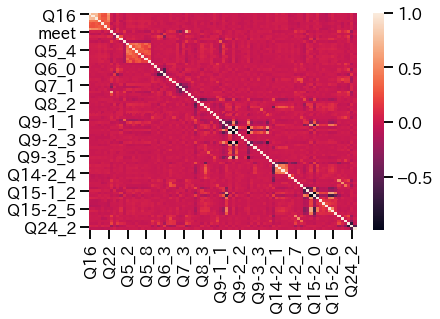

In [432]:
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
 
sns.heatmap(df_corr)

見やすいように図にして出力

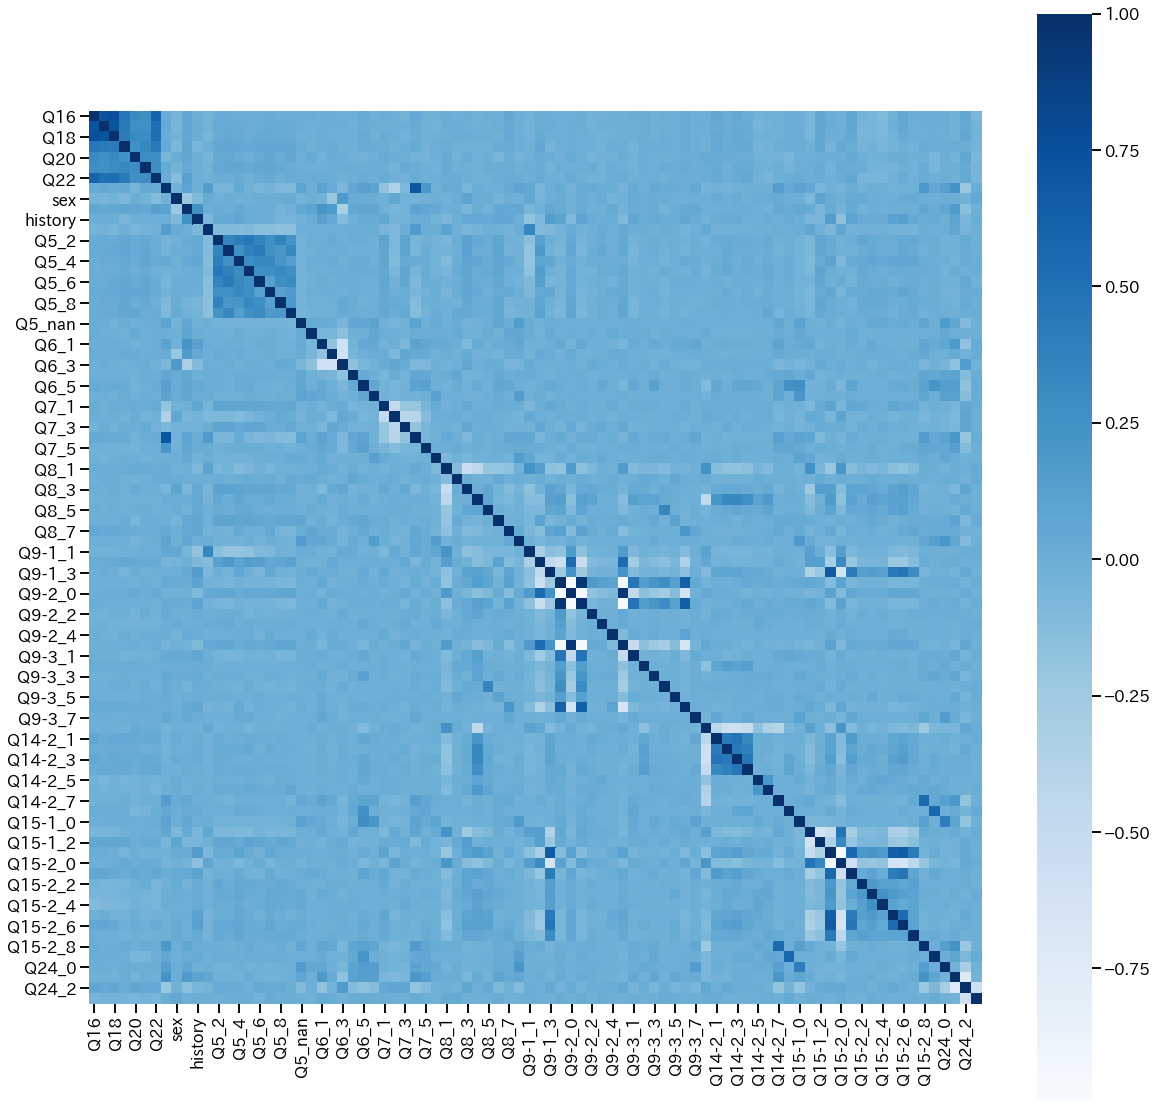

In [433]:
sns.set_context("talk")
fig = plt.subplots(figsize=(20,20))
 
sns.heatmap(df_corr,cmap='Blues',square=True)

In [434]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
df_scaled = scaler.fit_transform(nyuuin)
 
nyuuin_df =pd.DataFrame(df_scaled,columns=nyuuin.columns)
nyuuin_df.head()

,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,10A,10B,10C,10D,3-5,3-6,4B,5S,6-5,6A-1,6A-2,6C,7A,7B,7C,7D,8A,8B,8C,8D,9A,9B,9C,9D,bed,sex,age,time,Q6_0,Q6_1,Q6_2,...,Q11_1,Q11_2,Q11_3,Q11_4,Q11_5,Q11_6,Q11_7,Q12_0,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q12_7,Q13-1,Q13-2,Q14_0,Q14_1,Q14_2,Q14_3,Q15_0,Q15_1,Q15_2,Q15_3,Q15_4,Q15_5,Q15_6,Q15_7,Q16-1,Q16-2,Q16-3,Q16-4,Q17-1,Q17-2,Q17-3,Q28_0,Q28_1,Q28_2,Q28_3
0,0.647294,0.566941,0.652204,0.635816,0.600593,0.676996,0.265844,0.360319,0.666767,-0.275359,-0.304997,-0.127343,-0.127343,-0.200276,-0.230697,-0.036491,-0.189242,-0.036491,-0.203841,-0.081813,-0.255256,-0.243218,-0.189242,-0.237023,-0.203841,-0.227482,-0.233877,-0.227482,-0.280909,-0.189242,4.111540,-0.230697,-0.177623,-1.015568,0.985320,0.280330,-1.041194,-0.200276,-0.573256,1.915935,...,-0.452911,-0.243218,-0.227482,-0.272554,-0.36170,0.992053,-0.255256,-0.249293,-0.252288,-0.599879,-0.359345,3.917630,-0.622458,-0.785624,-0.332841,-0.387465,-0.550638,-0.19298,0.517811,-0.452911,-0.089682,-0.22094,-0.534294,-0.521938,-0.227482,-0.299758,1.667002,-1.501803,-0.233877,-0.720339,0.220221,2.738104,-0.466226,-0.355129,0.848292,0.129988,-0.405076,-0.901137,-0.776796,4.395944
1,0.647294,0.566941,0.652204,0.635816,0.600593,0.676996,0.265844,0.360319,0.666767,-0.275359,-0.304997,-0.127343,-0.127343,-0.200276,-0.230697,-0.036491,-0.189242,-0.036491,-0.203841,-0.081813,-0.255256,-0.243218,-0.189242,-0.237023,-0.203841,-0.227482,4.275752,-0.227482,-0.280909,-0.189242,-0.243218,-0.230697,-0.177623,0.655564,-0.694863,-1.714326,0.732970,-0.200276,-0.573256,-0.521938,...,-0.452911,4.111540,-0.227482,-0.272554,-0.36170,-1.008011,-0.255256,-0.249293,-0.252288,-0.599879,-0.359345,-0.255256,-0.622458,1.272874,-0.332841,-0.387465,-0.550638,-0.19298,0.517811,-0.452911,-0.089682,-0.22094,-0.534294,-0.521938,-0.227482,3.336020,-0.599879,-1.501803,-0.233877,0.675782,-0.862172,-0.367558,-0.466226,0.947589,-0.683318,NaN,-0.405076,-0.901137,1.287340,-0.227482
2,0.647294,0.566941,0.652204,0.635816,0.600593,0.676996,0.265844,0.360319,0.666767,-0.275359,-0.304997,-0.127343,-0.127343,-0.200276,-0.230697,-0.036491,-0.189242,-0.036491,-0.203841,-0.081813,-0.255256,-0.243218,-0.189242,-0.237023,-0.203841,-0.227482,4.275752,-0.227482,-0.280909,-0.189242,-0.243218,-0.230697,-0.177623,0.655564,-0.694863,-1.714326,0.732970,-0.200276,-0.573256,-0.521938,...,-0.452911,4.111540,-0.227482,-0.272554,-0.36170,-1.008011,-0.255256,-0.249293,-0.252288,-0.599879,-0.359345,-0.255256,-0.622458,1.272874,-0.332841,-0.387465,-0.550638,-0.19298,0.517811,-0.452911,-0.089682,-0.22094,-0.534294,-0.521938,-0.227482,3.336020,-0.599879,-1.501803,-0.233877,0.675782,-0.862172,-0.367558,-0.466226,0.947589,-0.683318,NaN,-0.405076,-0.901137,1.287340,-0.227482
3,0.647294,0.566941,0.652204,0.635816,0.600593,0.676996,0.265844,0.360319,-2.918123,-0.275359,-0.304997,-0.127343,-0.127343,-0.200276,-0.230697,-0.036491,-0.189242,-0.036491,-0.203841,-0.081813,3.917630,-0.243218,-0.189242,-0.237023,-0.203841,-0.227482,-0.233877,-0.227482,-0.280909,-0.189242,-0.243218,-0.230697,-0.177623,0.655564,0.985320,-0.716998,-0.154112,-0.200276,-0.573256,-0.521938,...,-0.452911,-0.243218,-0.227482,-0.272554,2.76472,-1.008011,-0.255256,-0.249293,-0.252288,-0.599879,-0.359345,-0.255256,-0.622458,1.272874,-0.332841,-0.387465,-0.550638,-0.19298,-1.931207,2.207940,-0.089682,-0.22094,1.871629,1.915935,-0.227482,-0.299758,-0.599879,-1.501803,-0.233877,0.675782,-0.862172,-0.367558,-0.466226,-0.355129,0.848292,-1.403428,-0.405076,-0.901137,1.287340,-0.227482
4,0.647294,0.566941,0.652204,0.635816,0.600593,0.676996,0.265844,0.360319,0.666767,-0.275359,-0.304997,-0.127343,-0.127343,-0.200276,-0.230697,-0.036491,-0.189242,-0.036491,-0.203841,-0.081813,3.917630,-0.243218,-0.189242,-0.237023,-0.203841,-0.227482,-0.233877,-0.227482,-0.280909,-0.189242,-0.243218,-0.230697,-0.177623,0.655564,0.985320,-1.215662,-1.041194,-0.200276,-0.573256,-0.521938,...,-0.452911,-0.243218,-0.227482,-0.272554,-0.36170,0.992053,-0.255256,-0.249293,-0.252288,-

In [435]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(gairai_num_data)
 
gairai_df =pd.DataFrame(df_scaled,columns=gairai_num_data.columns)
gairai_df.head()

,Q16,Q17,Q18,Q19,Q20,Q21,Q22,meet,sex,age,history,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q5_6,Q5_7,Q5_8,Q5_9,Q5_nan,Q6_0,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q7_0,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q8_0,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,...,Q9-3_5,Q9-3_6,Q9-3_7,Q10-1,Q10-2,Q10-3,Q11-1,Q11-2,Q11-3,Q11-4,Q12,Q13,Q14-1,Q14-2_0,Q14-2_1,Q14-2_2,Q14-2_3,Q14-2_4,Q14-2_5,Q14-2_6,Q14-2_7,Q14-2_8,Q15-1_0,Q15-1_1,Q15-1_2,Q15-1_3,Q15-2_0,Q15-2_1,Q15-2_2,Q15-2_3,Q15-2_4,Q15-2_5,Q15-2_6,Q15-2_7,Q15-2_8,Q15-2_9,Q24_0,Q24_1,Q24_2,Q24_3
0,0.182089,-1.440883,-0.018458,0.375382,-0.644593,-4.819019e-02,-0.274031,1.950769,-1.234577,-0.558123,-0.663934,-0.198563,-0.651451,-0.720976,-0.662359,1.615722,-0.772978,-0.931360,-0.866989,1.066409,-0.046082,-0.11818,-0.459949,-0.464339,0.775078,-0.130483,-0.06524,-0.048337,-0.493767,-0.968498,-0.427442,2.418482,-0.132153,-0.138645,-0.900070,-0.154487,1.330786,-0.475094,-0.225837,-0.253054,...,-0.066858,-0.347328,-0.025222,-0.714918,0.948052,-1.146255,-0.25488,1.388426,-0.552465,2.566722,-0.770934,-0.501518,-0.581620,0.375810,-0.156631,-0.215271,-0.216882,-0.189748,-0.068439,-0.132153,-0.146385,-0.025222,-0.083918,1.047092,-0.650132,-0.530042,0.546742,-0.306813,-0.102433,-0.115383,-0.097014,-0.338062,-0.353427,-0.238013,-0.111551,-0.029127,-0.104525,3.701477,-2.727977,-0.205942
1,0.818246,0.774553,0.625159,0.929258,0.301321,6.888023e-01,0.801585,1.950769,0.816047,-1.164643,-0.663934,-0.198563,-0.651451,-0.720976,-0.662359,1.615722,-0.772978,-0.931360,-0.866989,-0.937726,-0.046082,-0.11818,-0.459949,-0.464339,0.775078,-0.130483,-0.06524,-0.048337,-0.493767,-0.968498,2.339498,-0.413482,-0.132153,-0.138645,1.111024,-0.154487,1.330786,-0.475094,-0.225837,-0.253054,...,-0.066858,-0.347328,-0.025222,-0.714918,0.948052,1.279575,-0.25488,-0.246300,0.598565,0.058987,-0.770934,-0.501518,-0.581620,0.375810,-0.156631,-0.215271,-0.216882,-0.189748,-0.068439,-0.132153,-0.146385,-0.025222,-0.083918,1.047092,-0.650132,-0.530042,0.546742,-0.306813,-0.102433,-0.115383,-0.097014,-0.338062,-0.353427,-0.238013,-0.111551,-0.029127,-0.104525,-0.270162,0.366572,-0.205942
2,-0.454069,-0.333165,-0.662074,-0.732370,-1.590506,-4.819019e-02,-0.274031,1.950769,-1.234577,0.654919,-0.663934,-0.198563,1.535034,1.387008,1.509755,1.615722,1.293698,1.073698,1.153417,1.066409,-0.046082,-0.11818,-0.459949,-0.464339,0.775078,-0.130483,-0.06524,-0.048337,-0.493767,1.032527,-0.427442,-0.413482,-0.132153,-0.138645,-0.900070,-0.154487,-0.751435,-0.475094,-0.225837,3.951733,...,-0.066858,-0.347328,-0.025222,-0.714918,0.948052,-0.661089,-0.25488,-0.246300,-0.552465,0.058987,1.999848,3.255093,0.883764,0.375810,-0.156631,-0.215271,-0.216882,-0.189748,-0.068439,-0.132153,-0.146385,-0.025222,-0.083918,-0.955026,-0.650132,1.886643,-1.829017,-0.306813,-0.102433,-0.115383,-0.097014,-0.338062,2.829439,-0.238013,-0.111551,-0.029127,-0.104525,-0.270162,0.366572,-0.205942
3,0.818246,0.774553,0.625159,0.929258,0.301321,6.888023e-01,0.801585,1.950769,-1.234577,1.261439,0.250703,-0.198563,-0.651451,1.387008,-0.662359,-0.618918,1.293698,-0.931360,1.153417,1.066409,-0.046082,-0.11818,-0.459949,2.153600,-1.290192,-0.130483,-0.06524,-0.048337,-0.493767,-0.968498,-0.427442,2.418482,-0.132153,-0.138645,1.111024,-0.154487,-0.751435,-0.475094,-0.225837,-0.253054,...,-0.066858,-0.347328,-0.025222,-0.714918,0.948052,-1.146255,-0.25488,-0.246300,0.598565,0.058987,-0.770934,-0.501518,-0.581620,0.375810,-0.156631,-0.215271,-0.216882,-0.189748,-0.068439,-0.132153,-0.146385,-0.025222,-0.083918,1.047092,-0.650132,-0.530042,0.546742,-0.306813,-0.102433,-0.115383,-0.097014,-0.338062,-0.353427,-0.238013,-0.111551,-0.029127,-0.104525,-0.270162,0.366572,-0.205942
4,0.818246,0.774553,0.625159,0.375382,-1.590506,1.309162e-15,0.801585,1.950769,-1.234577,0.654919,-1.578570,-0.198563,-0.651451,-0.720976,-0.662359,-0.618918,-0.772978,-0.931360,1.153417,-0.937726,-0.046082,-0.11818,2.174153,-0.464339,-1.290192,-0.130483,-0.06524,-0.048337,-0.493767,-0.968498,-0.427442,2.418482,-0.132153,-0.138645,-0.900070,-0.154487,-0.751435,2.1048

In [436]:
# 目的変数のみ削除して変数Xに格納
X = bed_num_data.drop("Q26", axis=1)
# 目的変数のみ抽出して変数Yに格納
Y = bed_num_data["Q26"]
print(X)
print(Y)

           Q18        Q19        Q20        Q21  ...  Q28_0  Q28_1  Q28_2  Q28_3
0    10.000000  10.000000  10.000000  10.000000  ...      0      0      0      1
1    10.000000  10.000000  10.000000  10.000000  ...      0      0      1      0
2    10.000000  10.000000  10.000000  10.000000  ...      0      0      1      0
3    10.000000  10.000000  10.000000  10.000000  ...      0      0      1      0
4    10.000000  10.000000  10.000000  10.000000  ...      0      0      1      0
..         ...        ...        ...        ...  ...    ...    ...    ...    ...
747  10.000000  10.000000  10.000000   5.000000  ...      0      0      1      0
748   9.204703   9.367089   9.115491   9.015328  ...      1      0      0      0
749   8.000000   7.000000   8.000000   7.000000  ...      0      1      0      0
750   9.000000   9.000000   9.000000   9.000000  ...      0      1      0      0
751  10.000000  10.000000  10.000000  10.000000  ...      0      1      0      0

[752 rows x 116 columns]
0 

In [437]:
gairai_num_data = gairai_num_data.astype('float64')

In [438]:
gairai_num_data["Q10-3"] = gairai_num_data["Q10-3"].fillna(0)

In [439]:
null調べ(gairai_num_data)

■■■  Q16
NULL数:0　　　　NULL率:0.0    データの種類数:12
■■■  Q17
NULL数:0　　　　NULL率:0.0    データの種類数:14
■■■  Q18
NULL数:0　　　　NULL率:0.0    データの種類数:13
■■■  Q19
NULL数:0　　　　NULL率:0.0    データの種類数:14
■■■  Q20
NULL数:0　　　　NULL率:0.0    データの種類数:12
■■■  Q21
NULL数:0　　　　NULL率:0.0    データの種類数:12
■■■  Q22
NULL数:0　　　　NULL率:0.0    データの種類数:13
■■■  meet
NULL数:0　　　　NULL率:0.0    データの種類数:2
■■■  sex
NULL数:0　　　　NULL率:0.0    データの種類数:3
■■■  age
NULL数:0　　　　NULL率:0.0    データの種類数:11
■■■  history
NULL数:0　　　　NULL率:0.0    データの種類数:6
■■■  Q5_1
NULL数:0　　　　NULL率:0.0    データの種類数:2
■■■  Q5_2
NULL数:0　　　　NULL率:0.0    データの種類数:2
■■■  Q5_3
NULL数:0　　　　NULL率:0.0    データの種類数:2
■■■  Q5_4
NULL数:0　　　　NULL率:0.0    データの種類数:2
■■■  Q5_5
NULL数:0　　　　NULL率:0.0    データの種類数:2
■■■  Q5_6
NULL数:0　　　　NULL率:0.0    データの種類数:2
■■■  Q5_7
NULL数:0　　　　NULL率:0.0    データの種類数:2
■■■  Q5_8
NULL数:0　　　　NULL率:0.0    データの種類数:2
■■■  Q5_9
NULL数:0　　　　NULL率:0.0    データの種類数:2
■■■  Q5_nan
NULL数:0　　　　NULL率:0.0    データの種類数:2
■■■  Q6_0
NULL数:0　　　　NULL率:0.0    データの種類数:2
■■■  Q6_1
NULL数:0　　　　NULL率:0

In [440]:
corr_matrix = gairai_num_data.corr()
print(corr_matrix)

              Q16       Q17       Q18  ...     Q24_1     Q24_2     Q24_3
Q16      1.000000  0.732308  0.751097  ... -0.024848  0.058289 -0.063684
Q17      0.732308  1.000000  0.725134  ... -0.021154  0.041084 -0.041879
Q18      0.751097  0.725134  1.000000  ... -0.028936  0.051575 -0.039700
Q19      0.450810  0.443923  0.419051  ...  0.014285  0.010907 -0.045201
Q20      0.300406  0.262165  0.313871  ... -0.039243  0.071438 -0.068829
...           ...       ...       ...  ...       ...       ...       ...
Q15-2_9  0.005304 -0.001638  0.004149  ...  0.078891 -0.079457  0.030859
Q24_0    0.000581  0.000852 -0.011104  ... -0.028239 -0.285141 -0.021526
Q24_1   -0.024848 -0.021154 -0.028936  ...  1.000000 -0.731788 -0.042858
Q24_2    0.058289  0.041084  0.051575  ... -0.731788  1.000000 -0.558486
Q24_3   -0.063684 -0.041879 -0.039700  ... -0.042858 -0.558486  1.000000

[96 rows x 96 columns]


In [441]:

corr_y = pd.DataFrame({"features":corr_matrix.columns,"おすすめ度":corr_matrix["Q22"]},index=None)
corr_y = corr_y.reset_index(drop=True)
corr_y.style.background_gradient()


,features,おすすめ度
0,Q16,0.600723
1,Q17,0.510716
2,Q18,0.524635
3,Q19,0.433426
4,Q20,0.270008
5,Q21,0.282893
6,Q22,1.000000
7,meet,0.022484
8,sex,-0.115122
9,age,0.128090


In [442]:
corr_matrix =bed_num_data.corr()
print(corr_matrix)

            Q18       Q19       Q20  ...     Q28_1     Q28_2     Q28_3
Q18    1.000000  0.742212  0.718903  ...  0.049695 -0.026654  0.020670
Q19    0.742212  1.000000  0.699725  ...  0.082789 -0.100529 -0.006692
Q20    0.718903  0.699725  1.000000  ...  0.033829 -0.039839  0.016895
Q21    0.348166  0.361370  0.354903  ...  0.060808 -0.074958 -0.029859
Q22    0.445214  0.503475  0.552533  ...  0.079183 -0.062516 -0.064829
...         ...       ...       ...  ...       ...       ...       ...
Q15_7  0.040684  0.077993  0.044032  ...  0.102772 -0.107405  0.002249
Q28_0 -0.025771  0.046213  0.018400  ... -0.365029 -0.314661 -0.092148
Q28_1  0.049695  0.082789  0.033829  ...  1.000000 -0.650324 -0.180267
Q28_2 -0.026654 -0.100529 -0.039839  ... -0.650324  1.000000 -0.164017
Q28_3  0.020670 -0.006692  0.016895  ... -0.180267 -0.164017  1.000000

[108 rows x 108 columns]


In [443]:
corr_y = pd.DataFrame({"features":corr_matrix.columns,"おすすめ度":corr_matrix["Q26"]},index=None)
corr_y = corr_y.reset_index(drop=True)
corr_y.style.background_gradient()

,features,おすすめ度
0,Q18,0.493067
1,Q19,0.489006
2,Q20,0.422104
3,Q21,0.263914
4,Q22,0.412168
5,Q23,0.340585
6,Q24,0.175482
7,Q25,0.233753
8,Q26,1.000000
9,10A,0.000219


In [444]:
# 数値計算に必要なライブラリ
import numpy as np
import pandas as pd
# グラフを描画するパッケージ
import matplotlib.pyplot as plt
# 機械学習ライブラリscikit-learnの線形モデル
from sklearn import linear_model

In [445]:
# 目的変数のみ削除して変数Xに格納
X = gairai_num_data.drop("Q22", axis=1)
# 目的変数のみ抽出して変数Yに格納
Y = gairai_num_data["Q22"]
model = linear_model.LinearRegression()
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [446]:
model.coef_

array([ 4.22032996e-01,  5.59401584e-02,  1.12731549e-01,  1.46219033e-01,
        7.23220457e-02,  9.28077905e-02,  2.20202913e-02, -2.57020957e-01,
        7.42545754e-02, -1.42522214e-02,  7.85397553e-02, -3.14374365e-02,
       -1.10917432e-01,  8.61903136e-02, -6.48540831e-02,  1.10236092e-02,
        4.34412910e-02, -4.14179540e-02,  1.01248906e-01,  9.17377011e-02,
       -1.13615165e-01, -1.30978789e-01, -2.71440202e-01, -1.36146282e-01,
       -7.81589910e-02, -2.79001454e-01, -3.10258918e+12, -3.10258918e+12,
       -3.10258918e+12, -3.10258918e+12, -3.10258918e+12, -3.10258918e+12,
       -1.75393572e-01,  1.78833008e-02,  3.89770508e-01,  2.48718262e-02,
        2.19726562e-02, -8.45947266e-02,  6.90917969e-02, -1.40869141e-01,
        1.02734375e+00,  6.53747559e-01,  5.62866211e-01,  5.99243164e-01,
        1.26171875e+00,  1.06201172e+00,  6.01196289e-01,  1.44897461e-01,
        7.65686035e-02,  7.31567383e-01,  2.94677734e-01, -1.48925781e-02,
       -4.58007812e-01,  

In [447]:
coefficient = model.coef_
df_coefficient = pd.DataFrame(coefficient,
                              columns=["Q22"],
                              index=X.columns)
df_coefficient

,Q22
Q16,0.422033
Q17,0.055940
Q18,0.112732
Q19,0.146219
Q20,0.072322
...,...
Q15-2_9,0.786377
Q24_0,-0.109100
Q24_1,-0.286560
Q24_2,-0.250244
